In [9]:
from armored.models import *
from armored.preprocessing import *

In [10]:
import matplotlib.pyplot as plt
import time
from scipy.stats import linregress

import seaborn as sns

params = {'legend.fontsize': 18,
          'figure.figsize': (8, 6),
         'axes.labelsize': 24,
         'axes.titlesize':24,
         'axes.linewidth':5,
         'xtick.labelsize':20,
         'ytick.labelsize':20}
plt.rcParams.update(params)
plt.style.use('seaborn-colorblind')
plt.rcParams['pdf.fonttype'] = 42

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-nzrljhzb because the default path (/home/jaron/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [11]:
from numpy.random import default_rng
rng = default_rng(seed = 123)

# Define simulation parameters and import full dataset

In [12]:
# number of trials 
n_trials = 30

# number of dtl cycles 
n_dtl  = 5

# define number of initial samples to train on
n_init = 5

# number of samples for next experiment 
n_test = 5

# number of species in model
n_s = 5

# number of resources
n_r = 7

# define all system variables 
species = ['s'+str(i+1) for i in range(n_s)]
outputs = ['product']
sys_var = species + outputs

# define parameters in the objective function
obj_params = ['volume']

# define subset of controls
controls = ['rf'+str(i+1) for i in range(n_r)] + ['feed']
system_variables = species + outputs + controls

# define an objective function (product of endpoint volume * endpoint product concentration)
# where product concentration is the last column of the predicted output
objective = lambda pred, vol: pred[-1, -1]*vol[-1] 

# import data 
main_df = pd.read_csv("Data/reactor_ubiome.csv")
all_exp_names = main_df.Experiments.values

In [13]:
# determine random sets of initial experiments
initial_exps = [rng.choice(np.unique(all_exp_names), n_init, replace=False) for _ in range(n_trials)]

In [14]:
# function to compute sum of squares error 
def sse(a, b):
    return np.sum((a-b)**2)

# Loop over each trial

Running trial 1, cycle 1
Epoch: 0, Loss: 74.83854, Residuals: -0.74556, Convergence:   inf
Epoch: 10, Loss: 64.50973, Residuals: -0.69452, Convergence: 0.015387
Epoch: 20, Loss: 55.13628, Residuals: -0.64859, Convergence: 0.016068
Epoch: 30, Loss: 46.95000, Residuals: -0.60652, Convergence: 0.016266
Epoch: 40, Loss: 39.95150, Residuals: -0.56782, Convergence: 0.016288
Epoch: 50, Loss: 34.00510, Residuals: -0.53205, Convergence: 0.015867
Epoch: 60, Loss: 29.05434, Residuals: -0.49828, Convergence: 0.015807
Epoch: 70, Loss: 24.91191, Residuals: -0.46688, Convergence: 0.015427
Epoch: 80, Loss: 21.47401, Residuals: -0.43751, Convergence: 0.014765
Epoch: 90, Loss: 18.59015, Residuals: -0.41041, Convergence: 0.014538
Epoch: 100, Loss: 16.20554, Residuals: -0.38502, Convergence: 0.013537
Epoch: 110, Loss: 14.24301, Residuals: -0.36112, Convergence: 0.013146
Epoch: 120, Loss: 12.63479, Residuals: -0.33849, Convergence: 0.012197
Epoch: 130, Loss: 11.31810, Residuals: -0.31689, Convergence: 0.01


Epoch: 882, Evidence: 269.35760, Convergence: 0.012811
Epoch: 890, Loss: 43.41823, Residuals: -0.01165, Convergence: 0.001061

Epoch: 893, Evidence: 269.68997, Convergence: 0.001232
Epoch: 900, Loss: 44.27374, Residuals: -0.01160, Convergence: 0.001431

Epoch: 902, Evidence: 271.18973, Convergence: 0.005530

Epoch: 907, Evidence: 272.72421, Convergence: 0.005627
Epoch: 910, Loss: 46.21138, Residuals: -0.01157, Convergence: 0.001121

Epoch: 918, Evidence: 273.07587, Convergence: 0.001288
Epoch: 920, Loss: 46.73388, Residuals: -0.01154, Convergence: 0.001460
Epoch: 930, Loss: 46.17544, Residuals: -0.01153, Convergence: 0.000948

Epoch: 930, Evidence: 274.28171, Convergence: 0.004396
Epoch: 930, Loss: 47.23703, Residuals: -0.01153, Convergence:   inf

Epoch: 935, Evidence: 275.89233, Convergence: 0.005838
Epoch: 940, Loss: 47.63778, Residuals: -0.01150, Convergence: 0.001162

Epoch: 946, Evidence: 275.87399, Convergence: -0.000066
Epoch: 950, Loss: 47.57265, Residuals: -0.01161, Converge

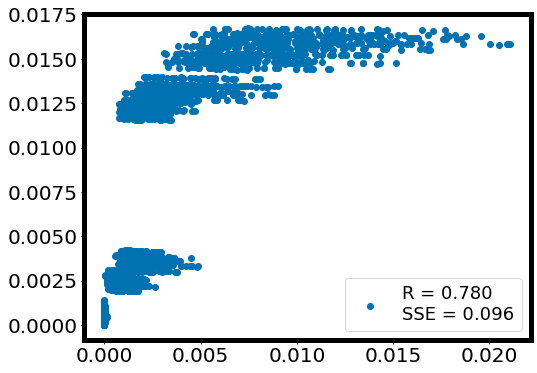

Running trial 1, cycle 2
Epoch: 0, Loss: 147.42635, Residuals: -0.08696, Convergence:   inf
Epoch: 10, Loss: 126.46459, Residuals: -0.08491, Convergence: 0.015574
Epoch: 20, Loss: 108.14037, Residuals: -0.08285, Convergence: 0.015877
Epoch: 30, Loss: 92.37601, Residuals: -0.08045, Convergence: 0.015869
Epoch: 40, Loss: 78.95110, Residuals: -0.07765, Convergence: 0.015784
Epoch: 50, Loss: 67.64983, Residuals: -0.07435, Convergence: 0.015398
Epoch: 60, Loss: 58.24816, Residuals: -0.07094, Convergence: 0.015139
Epoch: 70, Loss: 50.42198, Residuals: -0.06751, Convergence: 0.014990
Epoch: 80, Loss: 43.82706, Residuals: -0.06393, Convergence: 0.014343
Epoch: 90, Loss: 38.34435, Residuals: -0.05998, Convergence: 0.013918
Epoch: 100, Loss: 33.61829, Residuals: -0.05639, Convergence: 0.013043
Epoch: 110, Loss: 29.52061, Residuals: -0.05310, Convergence: 0.013109
Epoch: 120, Loss: 26.10801, Residuals: -0.04986, Convergence: 0.011718
Epoch: 130, Loss: 23.09366, Residuals: -0.04715, Convergence: 0

Epoch: 980, Loss: 90.90756, Residuals: -0.00469, Convergence: 0.001224

Epoch: 984, Evidence: 540.37939, Convergence: 0.000214
Epoch: 990, Loss: 91.99791, Residuals: -0.00514, Convergence: 0.002930
Epoch: 1000, Loss: 89.93945, Residuals: -0.00562, Convergence: 0.002347

Epoch: 1008, Evidence: 534.36212, Convergence: -0.011044
Epoch: 1010, Loss: 99.13055, Residuals: -0.00453, Convergence: 0.001978
Epoch: 1020, Loss: 97.48534, Residuals: -0.00466, Convergence: 0.001432
Epoch: 1030, Loss: 96.01463, Residuals: -0.00475, Convergence: 0.001611
Epoch: 1040, Loss: 94.74780, Residuals: -0.00481, Convergence: 0.000964

Epoch: 1040, Evidence: 546.08032, Convergence: 0.010652
Epoch: 1040, Loss: 98.30650, Residuals: -0.00481, Convergence:   inf
Epoch: 1050, Loss: 96.74644, Residuals: -0.00492, Convergence: 0.001573
Epoch: 1060, Loss: 95.36242, Residuals: -0.00499, Convergence: 0.001622

Epoch: 1068, Evidence: 545.03522, Convergence: -0.001917


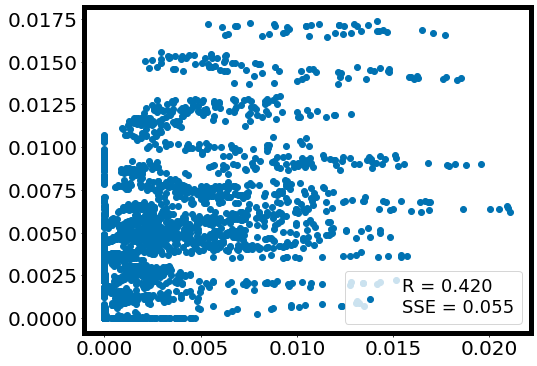

Running trial 1, cycle 3
Epoch: 0, Loss: 235.33322, Residuals: 0.08563, Convergence:   inf
Epoch: 10, Loss: 201.61223, Residuals: 0.07289, Convergence: 0.015550
Epoch: 20, Loss: 172.82059, Residuals: 0.06142, Convergence: 0.015497
Epoch: 30, Loss: 148.32767, Residuals: 0.05149, Convergence: 0.015316
Epoch: 40, Loss: 127.56616, Residuals: 0.04319, Convergence: 0.015078
Epoch: 50, Loss: 110.15707, Residuals: 0.03608, Convergence: 0.014615
Epoch: 60, Loss: 95.63914, Residuals: 0.03012, Convergence: 0.014171
Epoch: 70, Loss: 83.64238, Residuals: 0.02566, Convergence: 0.013366
Epoch: 80, Loss: 73.50793, Residuals: 0.02190, Convergence: 0.012944
Epoch: 90, Loss: 64.92687, Residuals: 0.01889, Convergence: 0.012186
Epoch: 100, Loss: 57.75700, Residuals: 0.01638, Convergence: 0.011508
Epoch: 110, Loss: 51.77633, Residuals: 0.01432, Convergence: 0.010652
Epoch: 120, Loss: 46.65490, Residuals: 0.01243, Convergence: 0.010026
Epoch: 130, Loss: 42.22003, Residuals: 0.01066, Convergence: 0.009911
Epo


Epoch: 941, Evidence: 894.38104, Convergence: -0.003635

Epoch: 948, Evidence: 903.67871, Convergence: 0.006691
Epoch: 950, Loss: 175.72055, Residuals: -0.00883, Convergence: 0.001408

Epoch: 955, Evidence: 904.51294, Convergence: 0.000922
Epoch: 960, Loss: 174.43834, Residuals: -0.00911, Convergence: 0.002223
Epoch: 970, Loss: 171.02090, Residuals: -0.00942, Convergence: 0.002065

Epoch: 979, Evidence: 893.59082, Convergence: -0.011289


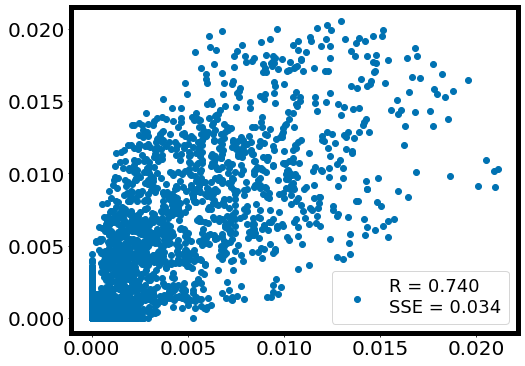

Running trial 1, cycle 4
Epoch: 0, Loss: 341.66866, Residuals: 0.12333, Convergence:   inf
Epoch: 10, Loss: 292.30469, Residuals: 0.10804, Convergence: 0.015664
Epoch: 20, Loss: 250.45079, Residuals: 0.09445, Convergence: 0.015489
Epoch: 30, Loss: 215.01669, Residuals: 0.08283, Convergence: 0.015266
Epoch: 40, Loss: 185.17674, Residuals: 0.07283, Convergence: 0.014889
Epoch: 50, Loss: 160.19298, Residuals: 0.06368, Convergence: 0.014423
Epoch: 60, Loss: 139.18739, Residuals: 0.05561, Convergence: 0.013901
Epoch: 70, Loss: 121.47927, Residuals: 0.04883, Convergence: 0.013463
Epoch: 80, Loss: 106.55020, Residuals: 0.04335, Convergence: 0.013097
Epoch: 90, Loss: 93.86115, Residuals: 0.03865, Convergence: 0.012661
Epoch: 100, Loss: 82.88484, Residuals: 0.03431, Convergence: 0.012135
Epoch: 110, Loss: 73.56774, Residuals: 0.03046, Convergence: 0.011833
Epoch: 120, Loss: 65.70898, Residuals: 0.02728, Convergence: 0.011609
Epoch: 130, Loss: 58.84563, Residuals: 0.02445, Convergence: 0.010436


Epoch: 980, Loss: 243.16948, Residuals: -0.00555, Convergence: 0.001506

Epoch: 985, Evidence: 1304.08960, Convergence: -0.000312
Epoch: 990, Loss: 241.81093, Residuals: -0.00738, Convergence: 0.002864
Epoch: 1000, Loss: 236.94006, Residuals: -0.00879, Convergence: 0.002508
Epoch: 1010, Loss: 233.46539, Residuals: -0.00855, Convergence: 0.001680

Epoch: 1011, Evidence: 1291.78735, Convergence: -0.009838
Epoch: 1020, Loss: 249.68381, Residuals: -0.00557, Convergence: 0.001606
Epoch: 1030, Loss: 246.01151, Residuals: -0.00590, Convergence: 0.001211

Epoch: 1032, Evidence: 1308.26111, Convergence: 0.002878
Epoch: 1040, Loss: 246.84079, Residuals: -0.00640, Convergence: 0.001481
Epoch: 1050, Loss: 243.49136, Residuals: -0.00662, Convergence: 0.001285

Epoch: 1053, Evidence: 1305.00989, Convergence: -0.002491


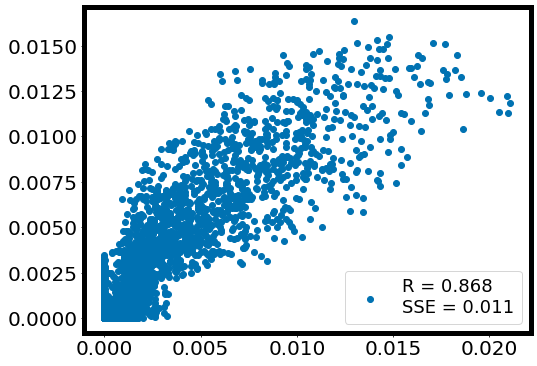

Running trial 1, cycle 5
Epoch: 0, Loss: 445.17613, Residuals: 0.17110, Convergence:   inf
Epoch: 10, Loss: 380.91678, Residuals: 0.15222, Convergence: 0.015676
Epoch: 20, Loss: 326.33640, Residuals: 0.13555, Convergence: 0.015498
Epoch: 30, Loss: 280.28677, Residuals: 0.12074, Convergence: 0.015159
Epoch: 40, Loss: 241.62578, Residuals: 0.10722, Convergence: 0.014801
Epoch: 50, Loss: 209.16866, Residuals: 0.09460, Convergence: 0.014287
Epoch: 60, Loss: 181.96414, Residuals: 0.08377, Convergence: 0.013637
Epoch: 70, Loss: 159.27364, Residuals: 0.07481, Convergence: 0.013154
Epoch: 80, Loss: 139.76178, Residuals: 0.06692, Convergence: 0.012426
Epoch: 90, Loss: 122.97614, Residuals: 0.05997, Convergence: 0.011864
Epoch: 100, Loss: 108.16363, Residuals: 0.05363, Convergence: 0.013279
Epoch: 110, Loss: 94.89901, Residuals: 0.04825, Convergence: 0.012738
Epoch: 120, Loss: 83.63073, Residuals: 0.04355, Convergence: 0.012389
Epoch: 130, Loss: 74.08045, Residuals: 0.03942, Convergence: 0.01189

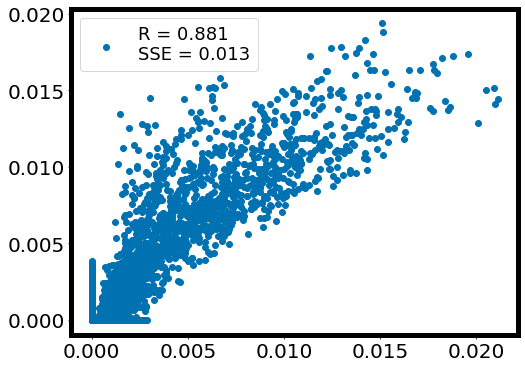

Epoch: 0, Loss: 553.68822, Residuals: 0.16049, Convergence:   inf
Epoch: 10, Loss: 472.20020, Residuals: 0.14305, Convergence: 0.016070
Epoch: 20, Loss: 402.77924, Residuals: 0.12774, Convergence: 0.015980
Epoch: 30, Loss: 344.36530, Residuals: 0.11388, Convergence: 0.015623
Epoch: 40, Loss: 295.45798, Residuals: 0.10080, Convergence: 0.015234
Epoch: 50, Loss: 254.29068, Residuals: 0.08898, Convergence: 0.014961
Epoch: 60, Loss: 219.71521, Residuals: 0.07901, Convergence: 0.014773
Epoch: 70, Loss: 190.60417, Residuals: 0.07025, Convergence: 0.014206
Epoch: 80, Loss: 166.05014, Residuals: 0.06271, Convergence: 0.013195
Epoch: 90, Loss: 145.71439, Residuals: 0.05636, Convergence: 0.012764
Epoch: 100, Loss: 128.67728, Residuals: 0.05051, Convergence: 0.012596
Epoch: 110, Loss: 114.42497, Residuals: 0.04517, Convergence: 0.011753
Epoch: 120, Loss: 102.49234, Residuals: 0.04033, Convergence: 0.010900
Epoch: 130, Loss: 92.56506, Residuals: 0.03609, Convergence: 0.009845
Epoch: 140, Loss: 84.

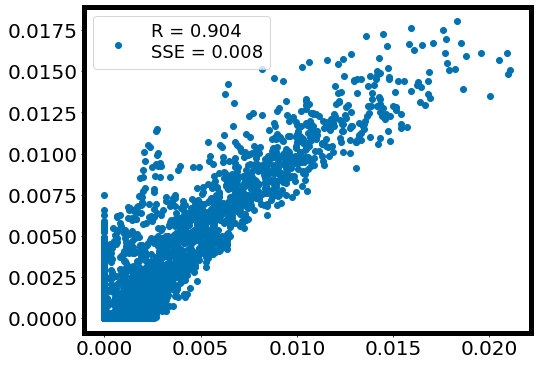

Running trial 2, cycle 1
Epoch: 0, Loss: 90.62764, Residuals: -0.73817, Convergence:   inf
Epoch: 10, Loss: 78.29220, Residuals: -0.68466, Convergence: 0.014950
Epoch: 20, Loss: 67.37560, Residuals: -0.63435, Convergence: 0.015253
Epoch: 30, Loss: 57.81275, Residuals: -0.58795, Convergence: 0.015592
Epoch: 40, Loss: 49.31512, Residuals: -0.54590, Convergence: 0.016028
Epoch: 50, Loss: 41.91759, Residuals: -0.50840, Convergence: 0.016416
Epoch: 60, Loss: 35.61731, Residuals: -0.47398, Convergence: 0.016618
Epoch: 70, Loss: 30.34292, Residuals: -0.44206, Convergence: 0.016025
Epoch: 80, Loss: 26.07581, Residuals: -0.41233, Convergence: 0.015797
Epoch: 90, Loss: 22.52654, Residuals: -0.38550, Convergence: 0.014709
Epoch: 100, Loss: 19.59246, Residuals: -0.36113, Convergence: 0.013609
Epoch: 110, Loss: 17.14217, Residuals: -0.33908, Convergence: 0.012937
Epoch: 120, Loss: 15.09755, Residuals: -0.31875, Convergence: 0.012980
Epoch: 130, Loss: 13.44301, Residuals: -0.29952, Convergence: 0.01

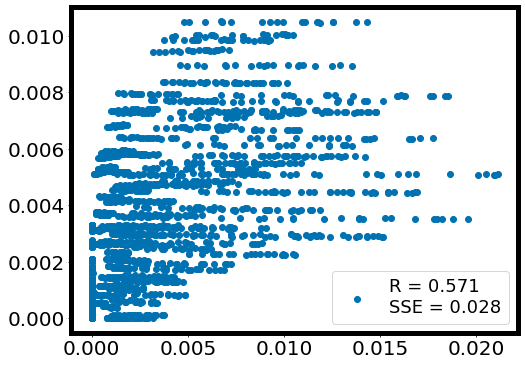

Running trial 2, cycle 2
Epoch: 0, Loss: 170.80977, Residuals: -0.50319, Convergence:   inf
Epoch: 10, Loss: 147.28932, Residuals: -0.46282, Convergence: 0.014947
Epoch: 20, Loss: 126.96995, Residuals: -0.42557, Convergence: 0.014972
Epoch: 30, Loss: 109.43660, Residuals: -0.39172, Convergence: 0.014941
Epoch: 40, Loss: 94.40467, Residuals: -0.36094, Convergence: 0.014865
Epoch: 50, Loss: 81.48331, Residuals: -0.33296, Convergence: 0.014824
Epoch: 60, Loss: 70.32492, Residuals: -0.30800, Convergence: 0.014879
Epoch: 70, Loss: 60.65005, Residuals: -0.28555, Convergence: 0.014757
Epoch: 80, Loss: 52.35683, Residuals: -0.26516, Convergence: 0.014794
Epoch: 90, Loss: 45.38451, Residuals: -0.24653, Convergence: 0.014242
Epoch: 100, Loss: 39.51660, Residuals: -0.22946, Convergence: 0.013741
Epoch: 110, Loss: 34.56456, Residuals: -0.21395, Convergence: 0.013369
Epoch: 120, Loss: 30.43489, Residuals: -0.19949, Convergence: 0.012778
Epoch: 130, Loss: 26.94837, Residuals: -0.18605, Convergence: 


Epoch: 915, Evidence: 554.99591, Convergence: 0.001126
Epoch: 920, Loss: 103.05634, Residuals: 0.00202, Convergence: 0.001064
Epoch: 930, Loss: 101.43826, Residuals: 0.00206, Convergence: 0.001389
Epoch: 940, Loss: 100.00603, Residuals: 0.00217, Convergence: 0.001291

Epoch: 944, Evidence: 556.00867, Convergence: 0.001821
Epoch: 950, Loss: 102.33373, Residuals: 0.00219, Convergence: 0.001618
Epoch: 960, Loss: 100.79053, Residuals: 0.00217, Convergence: 0.001693
Epoch: 970, Loss: 99.39825, Residuals: 0.00226, Convergence: 0.001481

Epoch: 972, Evidence: 557.84546, Convergence: 0.003293
Epoch: 980, Loss: 101.69368, Residuals: 0.00231, Convergence: 0.000745

Epoch: 980, Evidence: 560.50604, Convergence: 0.004747
Epoch: 980, Loss: 104.99292, Residuals: 0.00231, Convergence:   inf
Epoch: 990, Loss: 103.20026, Residuals: 0.00216, Convergence: 0.001608
Epoch: 1000, Loss: 101.67664, Residuals: 0.00205, Convergence: 0.001099

Epoch: 1008, Evidence: 562.08386, Convergence: 0.002807
Epoch: 1010,

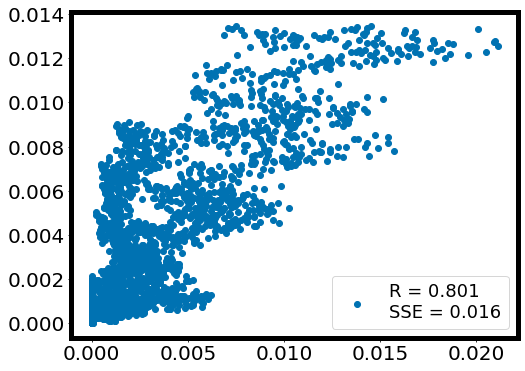

Running trial 2, cycle 3
Epoch: 0, Loss: 249.77342, Residuals: -0.38799, Convergence:   inf
Epoch: 10, Loss: 214.07111, Residuals: -0.35551, Convergence: 0.015516
Epoch: 20, Loss: 183.56462, Residuals: -0.32560, Convergence: 0.015479
Epoch: 30, Loss: 157.49432, Residuals: -0.29870, Convergence: 0.015370
Epoch: 40, Loss: 135.19054, Residuals: -0.27461, Convergence: 0.015296
Epoch: 50, Loss: 116.42971, Residuals: -0.25274, Convergence: 0.014869
Epoch: 60, Loss: 100.68019, Residuals: -0.23271, Convergence: 0.014456
Epoch: 70, Loss: 87.33835, Residuals: -0.21423, Convergence: 0.014142
Epoch: 80, Loss: 76.07335, Residuals: -0.19730, Convergence: 0.013709
Epoch: 90, Loss: 66.48125, Residuals: -0.18161, Convergence: 0.013493
Epoch: 100, Loss: 58.30752, Residuals: -0.16755, Convergence: 0.012865
Epoch: 110, Loss: 51.50545, Residuals: -0.15455, Convergence: 0.012223
Epoch: 120, Loss: 45.86837, Residuals: -0.14260, Convergence: 0.011208
Epoch: 130, Loss: 41.09620, Residuals: -0.13184, Convergenc

Epoch: 940, Loss: 170.54724, Residuals: -0.00511, Convergence: 0.000598

Epoch: 940, Evidence: 841.33997, Convergence: -0.004310
Epoch: 940, Loss: 186.11800, Residuals: -0.00115, Convergence:   inf
Epoch: 950, Loss: 182.01630, Residuals: -0.00171, Convergence: 0.001272
Epoch: 960, Loss: 178.78366, Residuals: -0.00211, Convergence: 0.000869

Epoch: 960, Evidence: 849.12744, Convergence: 0.004900
Epoch: 960, Loss: 182.20038, Residuals: -0.00211, Convergence:   inf

Epoch: 965, Evidence: 850.08496, Convergence: 0.001126
Epoch: 970, Loss: 181.78104, Residuals: -0.00284, Convergence: 0.001660

Epoch: 972, Evidence: 850.70490, Convergence: 0.000729
Epoch: 980, Loss: 177.75067, Residuals: -0.00578, Convergence: 0.004477
Epoch: 990, Loss: 173.51251, Residuals: -0.00724, Convergence: 0.002054

Epoch: 993, Evidence: 841.90326, Convergence: -0.009718
Epoch: 1000, Loss: 184.11670, Residuals: -0.00317, Convergence: 0.001225
Epoch: 1010, Loss: 180.58305, Residuals: -0.00368, Convergence: 0.001454

E

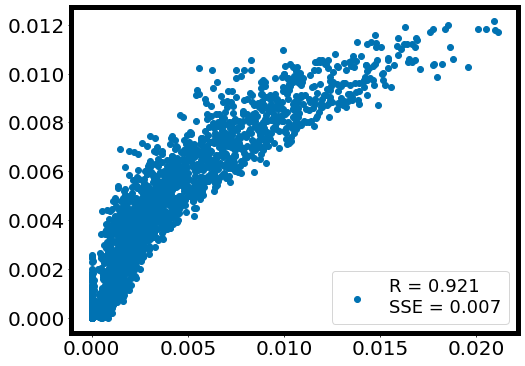

Running trial 2, cycle 4
Epoch: 0, Loss: 317.47844, Residuals: -0.37504, Convergence:   inf
Epoch: 10, Loss: 273.23297, Residuals: -0.34292, Convergence: 0.015101
Epoch: 20, Loss: 235.27055, Residuals: -0.31316, Convergence: 0.015056
Epoch: 30, Loss: 202.66820, Residuals: -0.28620, Convergence: 0.015021
Epoch: 40, Loss: 174.86328, Residuals: -0.26179, Convergence: 0.014728
Epoch: 50, Loss: 151.53947, Residuals: -0.23959, Convergence: 0.014163
Epoch: 60, Loss: 132.01964, Residuals: -0.21947, Convergence: 0.013651
Epoch: 70, Loss: 115.57202, Residuals: -0.20099, Convergence: 0.013185
Epoch: 80, Loss: 101.60270, Residuals: -0.18396, Convergence: 0.012715
Epoch: 90, Loss: 89.63976, Residuals: -0.16852, Convergence: 0.012408
Epoch: 100, Loss: 79.47300, Residuals: -0.15467, Convergence: 0.011793
Epoch: 110, Loss: 70.74081, Residuals: -0.14236, Convergence: 0.011417
Epoch: 120, Loss: 63.30583, Residuals: -0.13126, Convergence: 0.010999
Epoch: 130, Loss: 57.03207, Residuals: -0.12128, Converge


Epoch: 979, Evidence: 1145.32739, Convergence: -0.002454
Epoch: 980, Loss: 248.12698, Residuals: -0.00307, Convergence: 0.001376

Epoch: 984, Evidence: 1153.27295, Convergence: 0.004453

Epoch: 986, Evidence: 1155.55640, Convergence: 0.001976
Epoch: 990, Loss: 252.61972, Residuals: -0.00311, Convergence: 0.000981

Epoch: 990, Evidence: 1155.59021, Convergence: 0.000029
Epoch: 990, Loss: 253.59714, Residuals: -0.00311, Convergence:   inf
Epoch: 1000, Loss: 248.86737, Residuals: -0.00362, Convergence: 0.001875
Epoch: 1010, Loss: 245.06625, Residuals: -0.00380, Convergence: 0.001071

Epoch: 1018, Evidence: 1148.59167, Convergence: -0.006064


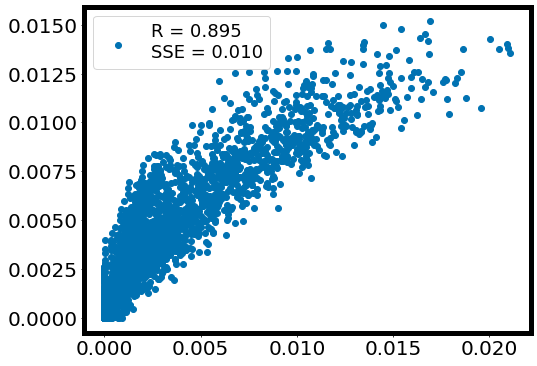

Running trial 2, cycle 5
Epoch: 0, Loss: 407.86290, Residuals: -0.08301, Convergence:   inf
Epoch: 10, Loss: 350.93112, Residuals: -0.07745, Convergence: 0.015226
Epoch: 20, Loss: 301.55753, Residuals: -0.07207, Convergence: 0.015256
Epoch: 30, Loss: 259.45862, Residuals: -0.06727, Convergence: 0.015013
Epoch: 40, Loss: 223.95822, Residuals: -0.06328, Convergence: 0.014614
Epoch: 50, Loss: 194.35590, Residuals: -0.05939, Convergence: 0.013948
Epoch: 60, Loss: 169.91805, Residuals: -0.05552, Convergence: 0.013240
Epoch: 70, Loss: 148.84525, Residuals: -0.05175, Convergence: 0.013230
Epoch: 80, Loss: 130.81854, Residuals: -0.04828, Convergence: 0.012929
Epoch: 90, Loss: 115.56574, Residuals: -0.04476, Convergence: 0.012336
Epoch: 100, Loss: 102.47624, Residuals: -0.04113, Convergence: 0.011922
Epoch: 110, Loss: 91.31664, Residuals: -0.03802, Convergence: 0.011395
Epoch: 120, Loss: 81.95138, Residuals: -0.03518, Convergence: 0.010633
Epoch: 130, Loss: 74.02596, Residuals: -0.03275, Conver


Epoch: 965, Evidence: 1472.69165, Convergence: 0.000744
Epoch: 970, Loss: 305.81110, Residuals: -0.00299, Convergence: 0.001821

Epoch: 973, Evidence: 1467.39148, Convergence: -0.002866
Epoch: 980, Loss: 313.00278, Residuals: -0.00372, Convergence: 0.001638
Epoch: 990, Loss: 308.69034, Residuals: -0.00336, Convergence: 0.001421
Epoch: 1000, Loss: 305.07288, Residuals: -0.00305, Convergence: 0.001143

Epoch: 1001, Evidence: 1472.80640, Convergence: 0.000822
Epoch: 1010, Loss: 301.57126, Residuals: -0.00187, Convergence: 0.001039

Epoch: 1013, Evidence: 1468.27393, Convergence: -0.002263
Epoch: 1020, Loss: 315.34796, Residuals: -0.00369, Convergence: 0.001781

Epoch: 1027, Evidence: 1479.80420, Convergence: 0.005547
Epoch: 1030, Loss: 315.47263, Residuals: -0.00329, Convergence: 0.001446
Epoch: 1040, Loss: 311.04715, Residuals: -0.00291, Convergence: 0.001512

Epoch: 1045, Evidence: 1474.56543, Convergence: -0.003553


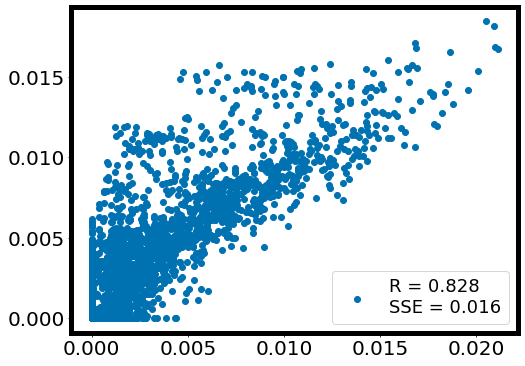

Epoch: 0, Loss: 467.53252, Residuals: -0.06936, Convergence:   inf
Epoch: 10, Loss: 401.83722, Residuals: -0.06464, Convergence: 0.015379
Epoch: 20, Loss: 344.65228, Residuals: -0.05992, Convergence: 0.015494
Epoch: 30, Loss: 295.85522, Residuals: -0.05585, Convergence: 0.015250
Epoch: 40, Loss: 254.88052, Residuals: -0.05231, Convergence: 0.014791
Epoch: 50, Loss: 220.74551, Residuals: -0.04902, Convergence: 0.014127
Epoch: 60, Loss: 192.20476, Residuals: -0.04588, Convergence: 0.013727
Epoch: 70, Loss: 168.15427, Residuals: -0.04267, Convergence: 0.013217
Epoch: 80, Loss: 147.98221, Residuals: -0.03966, Convergence: 0.012630
Epoch: 90, Loss: 131.08215, Residuals: -0.03682, Convergence: 0.011883
Epoch: 100, Loss: 116.89763, Residuals: -0.03423, Convergence: 0.011327
Epoch: 110, Loss: 104.84840, Residuals: -0.03179, Convergence: 0.010635
Epoch: 120, Loss: 94.51517, Residuals: -0.02961, Convergence: 0.010211
Epoch: 130, Loss: 85.87276, Residuals: -0.02765, Convergence: 0.009423
Epoch: 1

Epoch: 910, Loss: 383.77109, Residuals: -0.01643, Convergence: 0.001350

Epoch: 917, Evidence: 1880.27466, Convergence: -0.002966
Epoch: 920, Loss: 409.34229, Residuals: -0.01297, Convergence: 0.001678
Epoch: 930, Loss: 404.06723, Residuals: -0.01363, Convergence: 0.001075

Epoch: 935, Evidence: 1888.48291, Convergence: 0.001393
Epoch: 940, Loss: 403.33890, Residuals: -0.01416, Convergence: 0.001247

Epoch: 949, Evidence: 1888.77466, Convergence: 0.000154
Epoch: 950, Loss: 400.89240, Residuals: -0.01515, Convergence: 0.001485
Epoch: 960, Loss: 393.45599, Residuals: -0.01883, Convergence: 0.001765

Epoch: 968, Evidence: 1885.63062, Convergence: -0.001513


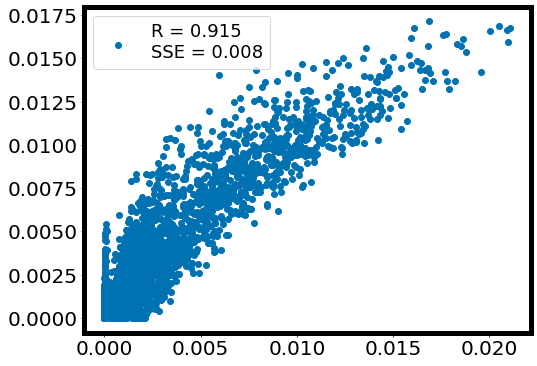

Running trial 3, cycle 1
Epoch: 0, Loss: 89.52533, Residuals: -0.89220, Convergence:   inf
Epoch: 10, Loss: 77.29452, Residuals: -0.82259, Convergence: 0.015004
Epoch: 20, Loss: 66.50900, Residuals: -0.75955, Convergence: 0.015193
Epoch: 30, Loss: 57.18848, Residuals: -0.70226, Convergence: 0.015236
Epoch: 40, Loss: 49.12720, Residuals: -0.65002, Convergence: 0.015393
Epoch: 50, Loss: 42.11619, Residuals: -0.60237, Convergence: 0.015610
Epoch: 60, Loss: 36.03568, Residuals: -0.55861, Convergence: 0.015661
Epoch: 70, Loss: 30.91749, Residuals: -0.51838, Convergence: 0.015704
Epoch: 80, Loss: 26.54283, Residuals: -0.48123, Convergence: 0.015238
Epoch: 90, Loss: 22.90424, Residuals: -0.44610, Convergence: 0.014494
Epoch: 100, Loss: 19.88439, Residuals: -0.41365, Convergence: 0.014486
Epoch: 110, Loss: 17.33696, Residuals: -0.38437, Convergence: 0.013160
Epoch: 120, Loss: 15.19922, Residuals: -0.35766, Convergence: 0.013644
Epoch: 130, Loss: 13.41200, Residuals: -0.33361, Convergence: 0.01

Epoch: 920, Loss: 36.51509, Residuals: -0.00481, Convergence: 0.001754
Epoch: 930, Loss: 35.89235, Residuals: -0.00487, Convergence: 0.001810

Epoch: 937, Evidence: 205.81601, Convergence: 0.013344
Epoch: 940, Loss: 37.08067, Residuals: -0.00501, Convergence: 0.001382

Epoch: 943, Evidence: 208.91087, Convergence: 0.014814
Epoch: 950, Loss: 38.11550, Residuals: -0.00519, Convergence: 0.002443
Epoch: 960, Loss: 37.40903, Residuals: -0.00538, Convergence: 0.001589

Epoch: 968, Evidence: 210.63361, Convergence: 0.008179
Epoch: 970, Loss: 38.37244, Residuals: -0.00541, Convergence: 0.002342
Epoch: 980, Loss: 37.64547, Residuals: -0.00556, Convergence: 0.001208
Epoch: 990, Loss: 36.94653, Residuals: -0.00567, Convergence: 0.001720

Epoch: 993, Evidence: 211.39804, Convergence: 0.003616
Epoch: 1000, Loss: 37.79434, Residuals: -0.00588, Convergence: 0.002398
Epoch: 1010, Loss: 37.09424, Residuals: -0.00601, Convergence: 0.001594
Epoch: 1020, Loss: 36.46600, Residuals: -0.00605, Convergence: 0

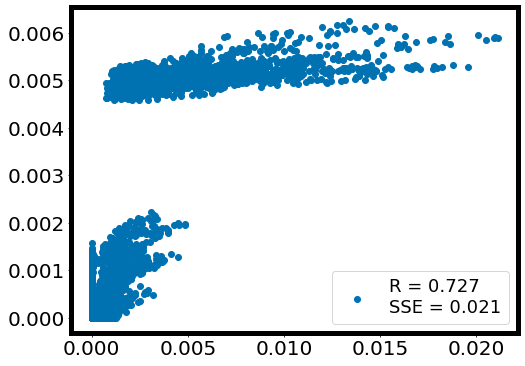

Running trial 3, cycle 2
Epoch: 0, Loss: 186.39159, Residuals: -0.58513, Convergence:   inf
Epoch: 10, Loss: 159.81511, Residuals: -0.53823, Convergence: 0.015617
Epoch: 20, Loss: 136.85051, Residuals: -0.49542, Convergence: 0.015630
Epoch: 30, Loss: 117.19717, Residuals: -0.45610, Convergence: 0.015618
Epoch: 40, Loss: 100.50795, Residuals: -0.41975, Convergence: 0.015350
Epoch: 50, Loss: 86.33576, Residuals: -0.38601, Convergence: 0.015365
Epoch: 60, Loss: 74.15856, Residuals: -0.35524, Convergence: 0.015115
Epoch: 70, Loss: 63.78466, Residuals: -0.32716, Convergence: 0.015350
Epoch: 80, Loss: 54.89191, Residuals: -0.30161, Convergence: 0.015334
Epoch: 90, Loss: 47.49203, Residuals: -0.27784, Convergence: 0.014710
Epoch: 100, Loss: 41.18999, Residuals: -0.25634, Convergence: 0.014379
Epoch: 110, Loss: 35.88112, Residuals: -0.23669, Convergence: 0.013982
Epoch: 120, Loss: 31.47716, Residuals: -0.21841, Convergence: 0.012983
Epoch: 130, Loss: 27.82270, Residuals: -0.20156, Convergence:


Epoch: 909, Evidence: 489.84534, Convergence: 0.003847
Epoch: 910, Loss: 120.12773, Residuals: 0.00881, Convergence: 0.002183
Epoch: 920, Loss: 118.08816, Residuals: 0.00855, Convergence: 0.000947

Epoch: 920, Evidence: 490.99924, Convergence: 0.002350
Epoch: 920, Loss: 121.05910, Residuals: 0.00855, Convergence:   inf
Epoch: 930, Loss: 118.97266, Residuals: 0.00825, Convergence: 0.000647

Epoch: 930, Evidence: 492.75586, Convergence: 0.003565
Epoch: 930, Loss: 121.65758, Residuals: 0.00825, Convergence:   inf

Epoch: 935, Evidence: 494.51913, Convergence: 0.003566
Epoch: 940, Loss: 121.95531, Residuals: 0.00801, Convergence: 0.000584

Epoch: 940, Evidence: 495.49121, Convergence: 0.001962
Epoch: 940, Loss: 123.99896, Residuals: 0.00801, Convergence:   inf
Epoch: 950, Loss: 121.70444, Residuals: 0.00762, Convergence: 0.001579
Epoch: 960, Loss: 119.71866, Residuals: 0.00736, Convergence: 0.001655

Epoch: 965, Evidence: 496.11978, Convergence: 0.001267
Epoch: 970, Loss: 119.94659, Resid

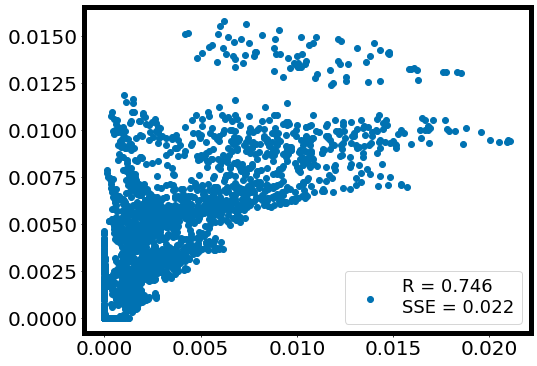

Running trial 3, cycle 3
Epoch: 0, Loss: 306.06615, Residuals: -0.39655, Convergence:   inf
Epoch: 10, Loss: 261.52948, Residuals: -0.36443, Convergence: 0.015832
Epoch: 20, Loss: 223.34207, Residuals: -0.33481, Convergence: 0.015986
Epoch: 30, Loss: 190.44919, Residuals: -0.30736, Convergence: 0.016060
Epoch: 40, Loss: 162.50998, Residuals: -0.28134, Convergence: 0.015921
Epoch: 50, Loss: 138.59143, Residuals: -0.25696, Convergence: 0.016108
Epoch: 60, Loss: 118.32674, Residuals: -0.23426, Convergence: 0.015967
Epoch: 70, Loss: 101.59786, Residuals: -0.21318, Convergence: 0.015607
Epoch: 80, Loss: 87.40509, Residuals: -0.19481, Convergence: 0.015132
Epoch: 90, Loss: 75.52151, Residuals: -0.17830, Convergence: 0.013931
Epoch: 100, Loss: 65.59718, Residuals: -0.16322, Convergence: 0.014179
Epoch: 110, Loss: 57.07913, Residuals: -0.14988, Convergence: 0.014030
Epoch: 120, Loss: 49.98177, Residuals: -0.13739, Convergence: 0.013436
Epoch: 130, Loss: 44.06584, Residuals: -0.12604, Convergen

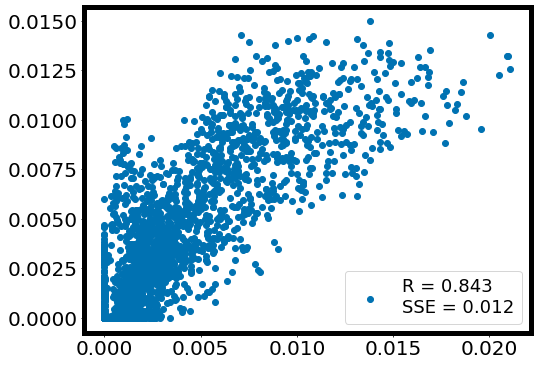

Running trial 3, cycle 4
Epoch: 0, Loss: 414.46455, Residuals: -0.31545, Convergence:   inf
Epoch: 10, Loss: 354.20096, Residuals: -0.28920, Convergence: 0.015822
Epoch: 20, Loss: 302.61148, Residuals: -0.26512, Convergence: 0.015906
Epoch: 30, Loss: 258.49265, Residuals: -0.24312, Convergence: 0.015899
Epoch: 40, Loss: 220.89848, Residuals: -0.22249, Convergence: 0.015971
Epoch: 50, Loss: 188.60818, Residuals: -0.20278, Convergence: 0.015757
Epoch: 60, Loss: 161.30391, Residuals: -0.18469, Convergence: 0.015854
Epoch: 70, Loss: 138.02521, Residuals: -0.16826, Convergence: 0.015620
Epoch: 80, Loss: 118.40804, Residuals: -0.15344, Convergence: 0.015273
Epoch: 90, Loss: 102.06564, Residuals: -0.13969, Convergence: 0.014570
Epoch: 100, Loss: 88.28503, Residuals: -0.12732, Convergence: 0.014432
Epoch: 110, Loss: 76.64306, Residuals: -0.11650, Convergence: 0.014154
Epoch: 120, Loss: 66.97230, Residuals: -0.10663, Convergence: 0.013365
Epoch: 130, Loss: 58.97871, Residuals: -0.09740, Converg


Epoch: 926, Evidence: 1124.00964, Convergence: 0.000436
Epoch: 930, Loss: 258.53296, Residuals: -0.00937, Convergence: 0.001953
Epoch: 940, Loss: 254.53149, Residuals: -0.00983, Convergence: 0.001307

Epoch: 948, Evidence: 1119.53833, Convergence: -0.003556


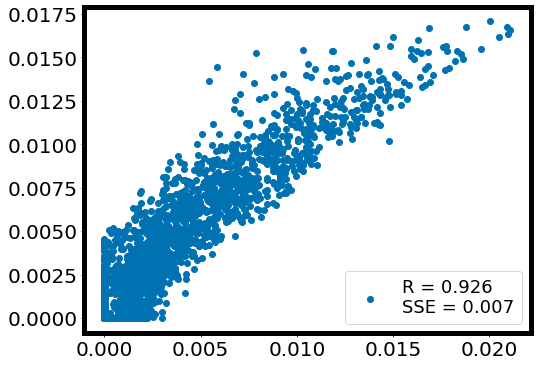

Running trial 3, cycle 5
Epoch: 0, Loss: 474.34786, Residuals: -0.21364, Convergence:   inf
Epoch: 10, Loss: 405.31717, Residuals: -0.19584, Convergence: 0.015930
Epoch: 20, Loss: 345.69376, Residuals: -0.17936, Convergence: 0.016105
Epoch: 30, Loss: 294.62253, Residuals: -0.16470, Convergence: 0.016118
Epoch: 40, Loss: 251.24078, Residuals: -0.15107, Convergence: 0.016022
Epoch: 50, Loss: 214.86696, Residuals: -0.13793, Convergence: 0.015593
Epoch: 60, Loss: 184.58798, Residuals: -0.12535, Convergence: 0.015168
Epoch: 70, Loss: 159.41254, Residuals: -0.11385, Convergence: 0.014553
Epoch: 80, Loss: 138.44957, Residuals: -0.10340, Convergence: 0.014110
Epoch: 90, Loss: 120.86440, Residuals: -0.09413, Convergence: 0.013748
Epoch: 100, Loss: 106.10461, Residuals: -0.08568, Convergence: 0.013221
Epoch: 110, Loss: 93.51147, Residuals: -0.07839, Convergence: 0.012879
Epoch: 120, Loss: 82.85161, Residuals: -0.07188, Convergence: 0.012046
Epoch: 130, Loss: 73.75390, Residuals: -0.06579, Conver

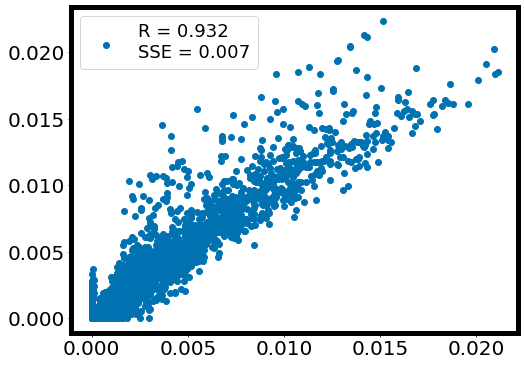

Epoch: 0, Loss: 546.19310, Residuals: 0.04577, Convergence:   inf
Epoch: 10, Loss: 468.50641, Residuals: 0.04007, Convergence: 0.015477
Epoch: 20, Loss: 401.71918, Residuals: 0.03534, Convergence: 0.015499
Epoch: 30, Loss: 344.57327, Residuals: 0.03079, Convergence: 0.015413
Epoch: 40, Loss: 296.07230, Residuals: 0.02655, Convergence: 0.015217
Epoch: 50, Loss: 254.66417, Residuals: 0.02284, Convergence: 0.015097
Epoch: 60, Loss: 219.76947, Residuals: 0.01950, Convergence: 0.014781
Epoch: 70, Loss: 190.28604, Residuals: 0.01630, Convergence: 0.014087
Epoch: 80, Loss: 165.55876, Residuals: 0.01357, Convergence: 0.013912
Epoch: 90, Loss: 144.83234, Residuals: 0.01110, Convergence: 0.013285
Epoch: 100, Loss: 127.48672, Residuals: 0.00916, Convergence: 0.012696
Epoch: 110, Loss: 112.98714, Residuals: 0.00773, Convergence: 0.011770
Epoch: 120, Loss: 100.86756, Residuals: 0.00668, Convergence: 0.011094
Epoch: 130, Loss: 90.65947, Residuals: 0.00574, Convergence: 0.010312
Epoch: 140, Loss: 81.

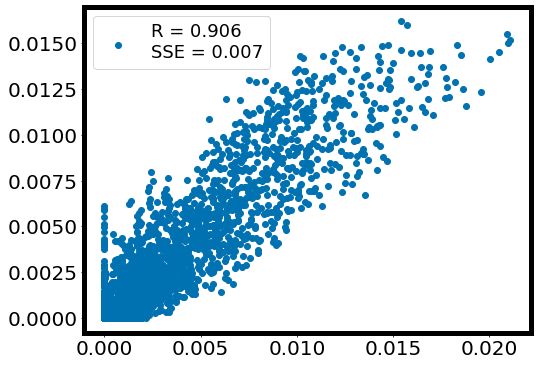

Running trial 4, cycle 1
Epoch: 0, Loss: 115.01462, Residuals: -0.64142, Convergence:   inf
Epoch: 10, Loss: 96.95341, Residuals: -0.59639, Convergence: 0.017213
Epoch: 20, Loss: 81.76286, Residuals: -0.55608, Convergence: 0.017161
Epoch: 30, Loss: 68.99727, Residuals: -0.51960, Convergence: 0.017086
Epoch: 40, Loss: 58.27271, Residuals: -0.48634, Convergence: 0.016991
Epoch: 50, Loss: 49.27321, Residuals: -0.45575, Convergence: 0.016848
Epoch: 60, Loss: 41.73660, Residuals: -0.42741, Convergence: 0.016639
Epoch: 70, Loss: 35.43906, Residuals: -0.40108, Convergence: 0.016358
Epoch: 80, Loss: 30.18897, Residuals: -0.37659, Convergence: 0.015943
Epoch: 90, Loss: 25.86278, Residuals: -0.35323, Convergence: 0.014760
Epoch: 100, Loss: 22.26549, Residuals: -0.33155, Convergence: 0.014263
Epoch: 110, Loss: 19.26531, Residuals: -0.31156, Convergence: 0.014408
Epoch: 120, Loss: 16.69859, Residuals: -0.29280, Convergence: 0.014139
Epoch: 130, Loss: 14.56421, Residuals: -0.27551, Convergence: 0.0


Epoch: 921, Evidence: 230.63539, Convergence: 0.004299

Epoch: 922, Evidence: 233.91267, Convergence: 0.014011

Epoch: 923, Evidence: 233.07651, Convergence: -0.003588


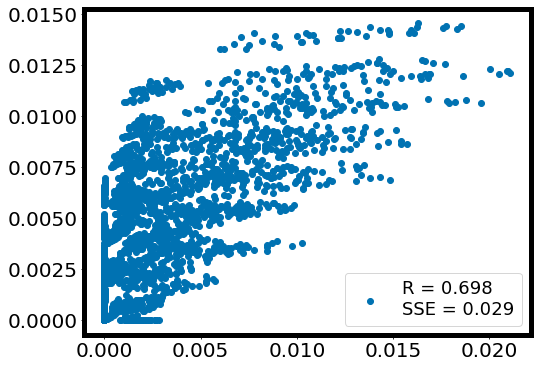

Running trial 4, cycle 2
Epoch: 0, Loss: 194.57324, Residuals: -0.74450, Convergence:   inf
Epoch: 10, Loss: 165.47079, Residuals: -0.68122, Convergence: 0.016289
Epoch: 20, Loss: 140.61325, Residuals: -0.62434, Convergence: 0.016536
Epoch: 30, Loss: 119.19697, Residuals: -0.57311, Convergence: 0.016736
Epoch: 40, Loss: 100.93141, Residuals: -0.52675, Convergence: 0.016779
Epoch: 50, Loss: 85.48715, Residuals: -0.48479, Convergence: 0.016703
Epoch: 60, Loss: 72.49459, Residuals: -0.44686, Convergence: 0.016543
Epoch: 70, Loss: 61.67289, Residuals: -0.41235, Convergence: 0.015819
Epoch: 80, Loss: 52.66208, Residuals: -0.38082, Convergence: 0.015330
Epoch: 90, Loss: 45.08420, Residuals: -0.35209, Convergence: 0.015499
Epoch: 100, Loss: 38.79333, Residuals: -0.32555, Convergence: 0.014980
Epoch: 110, Loss: 33.56721, Residuals: -0.30090, Convergence: 0.014348
Epoch: 120, Loss: 29.24495, Residuals: -0.27805, Convergence: 0.013675
Epoch: 130, Loss: 25.63557, Residuals: -0.25712, Convergence:


Epoch: 958, Evidence: 516.23120, Convergence: -0.002782
Epoch: 960, Loss: 110.73843, Residuals: -0.00802, Convergence: 0.001997
Epoch: 970, Loss: 109.02615, Residuals: -0.00797, Convergence: 0.001667

Epoch: 972, Evidence: 521.89722, Convergence: 0.008105
Epoch: 980, Loss: 110.60746, Residuals: -0.00795, Convergence: 0.001417
Epoch: 990, Loss: 109.00670, Residuals: -0.00789, Convergence: 0.001572

Epoch: 997, Evidence: 523.67371, Convergence: 0.003392
Epoch: 1000, Loss: 110.59973, Residuals: -0.00781, Convergence: 0.001303

Epoch: 1003, Evidence: 525.21405, Convergence: 0.002933

Epoch: 1006, Evidence: 526.96619, Convergence: 0.003325
Epoch: 1010, Loss: 114.18640, Residuals: -0.00777, Convergence: 0.001353

Epoch: 1017, Evidence: 528.24554, Convergence: 0.002422
Epoch: 1020, Loss: 114.52702, Residuals: -0.00774, Convergence: 0.001106
Epoch: 1030, Loss: 112.68495, Residuals: -0.00766, Convergence: 0.001043
Epoch: 1040, Loss: 111.04366, Residuals: -0.00753, Convergence: 0.001574

Epoch:

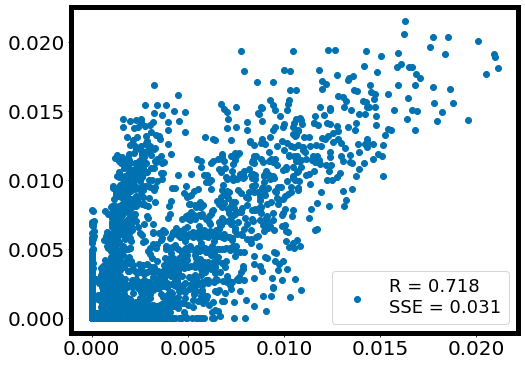

Running trial 4, cycle 3
Epoch: 0, Loss: 332.69814, Residuals: -0.44252, Convergence:   inf
Epoch: 10, Loss: 282.33246, Residuals: -0.40623, Convergence: 0.016498
Epoch: 20, Loss: 239.59052, Residuals: -0.37330, Convergence: 0.016620
Epoch: 30, Loss: 203.02347, Residuals: -0.34324, Convergence: 0.016722
Epoch: 40, Loss: 172.13026, Residuals: -0.31572, Convergence: 0.016537
Epoch: 50, Loss: 146.39732, Residuals: -0.29035, Convergence: 0.016125
Epoch: 60, Loss: 125.22350, Residuals: -0.26655, Convergence: 0.015507
Epoch: 70, Loss: 107.73476, Residuals: -0.24454, Convergence: 0.014926
Epoch: 80, Loss: 93.24306, Residuals: -0.22431, Convergence: 0.014295
Epoch: 90, Loss: 81.23573, Residuals: -0.20578, Convergence: 0.013705
Epoch: 100, Loss: 71.13811, Residuals: -0.18884, Convergence: 0.013173
Epoch: 110, Loss: 62.43254, Residuals: -0.17335, Convergence: 0.013355
Epoch: 120, Loss: 54.92511, Residuals: -0.15902, Convergence: 0.012453
Epoch: 130, Loss: 48.55688, Residuals: -0.14604, Convergen

Epoch: 950, Loss: 155.29761, Residuals: -0.00687, Convergence: 0.001772
Epoch: 960, Loss: 152.25204, Residuals: -0.00680, Convergence: 0.002293

Epoch: 961, Evidence: 893.97852, Convergence: -0.003522
Epoch: 970, Loss: 161.15562, Residuals: -0.00639, Convergence: 0.001503

Epoch: 975, Evidence: 906.82666, Convergence: 0.010696
Epoch: 980, Loss: 164.91762, Residuals: -0.00629, Convergence: 0.001295
Epoch: 990, Loss: 162.65219, Residuals: -0.00622, Convergence: 0.001243

Epoch: 994, Evidence: 907.04889, Convergence: 0.000245
Epoch: 1000, Loss: 161.45647, Residuals: -0.00655, Convergence: 0.002947
Epoch: 1010, Loss: 157.75031, Residuals: -0.00688, Convergence: 0.002454
Epoch: 1020, Loss: 154.84486, Residuals: -0.00681, Convergence: 0.002252
Epoch: 1030, Loss: 152.15054, Residuals: -0.00654, Convergence: 0.001684

Epoch: 1035, Evidence: 891.12952, Convergence: -0.017615


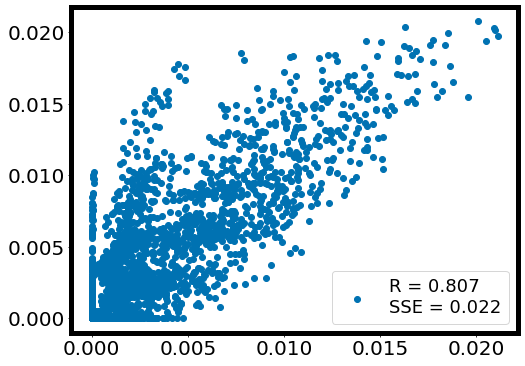

Running trial 4, cycle 4
Epoch: 0, Loss: 378.95906, Residuals: -0.35191, Convergence:   inf
Epoch: 10, Loss: 324.37497, Residuals: -0.32295, Convergence: 0.015695
Epoch: 20, Loss: 277.10959, Residuals: -0.29654, Convergence: 0.016028
Epoch: 30, Loss: 236.25027, Residuals: -0.27229, Convergence: 0.015940
Epoch: 40, Loss: 202.09660, Residuals: -0.24991, Convergence: 0.015599
Epoch: 50, Loss: 173.46014, Residuals: -0.22914, Convergence: 0.015229
Epoch: 60, Loss: 149.40074, Residuals: -0.20971, Convergence: 0.014804
Epoch: 70, Loss: 129.54968, Residuals: -0.19172, Convergence: 0.013932
Epoch: 80, Loss: 113.01920, Residuals: -0.17516, Convergence: 0.013568
Epoch: 90, Loss: 98.96743, Residuals: -0.16000, Convergence: 0.013307
Epoch: 100, Loss: 86.86575, Residuals: -0.14612, Convergence: 0.012890
Epoch: 110, Loss: 76.67255, Residuals: -0.13347, Convergence: 0.012128
Epoch: 120, Loss: 68.07233, Residuals: -0.12204, Convergence: 0.011759
Epoch: 130, Loss: 60.78167, Residuals: -0.11163, Converge

Epoch: 980, Loss: 235.26999, Residuals: -0.00993, Convergence: 0.002610

Epoch: 984, Evidence: 1220.96973, Convergence: -0.006162
Epoch: 990, Loss: 250.97005, Residuals: -0.00773, Convergence: 0.001868
Epoch: 1000, Loss: 246.63055, Residuals: -0.00803, Convergence: 0.001779

Epoch: 1001, Evidence: 1233.41882, Convergence: 0.003993
Epoch: 1010, Loss: 246.87720, Residuals: -0.00830, Convergence: 0.001460

Epoch: 1018, Evidence: 1230.24719, Convergence: -0.002578


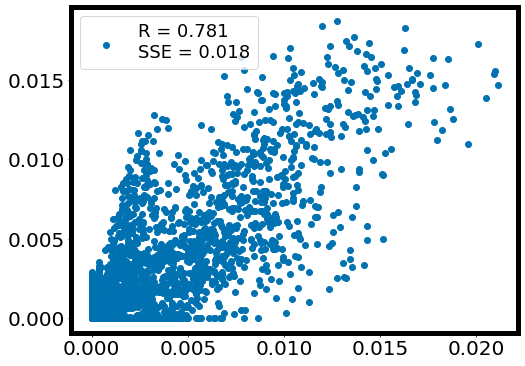

Running trial 4, cycle 5
Epoch: 0, Loss: 457.55364, Residuals: -0.24796, Convergence:   inf
Epoch: 10, Loss: 391.25134, Residuals: -0.22716, Convergence: 0.015872
Epoch: 20, Loss: 333.72409, Residuals: -0.20811, Convergence: 0.016140
Epoch: 30, Loss: 284.44528, Residuals: -0.19068, Convergence: 0.016042
Epoch: 40, Loss: 242.90222, Residuals: -0.17485, Convergence: 0.015861
Epoch: 50, Loss: 207.94110, Residuals: -0.16047, Convergence: 0.015396
Epoch: 60, Loss: 179.05276, Residuals: -0.14725, Convergence: 0.014735
Epoch: 70, Loss: 155.24069, Residuals: -0.13499, Convergence: 0.014022
Epoch: 80, Loss: 135.28699, Residuals: -0.12365, Convergence: 0.013618
Epoch: 90, Loss: 118.32890, Residuals: -0.11310, Convergence: 0.013399
Epoch: 100, Loss: 103.87080, Residuals: -0.10333, Convergence: 0.013001
Epoch: 110, Loss: 91.55199, Residuals: -0.09460, Convergence: 0.012448
Epoch: 120, Loss: 81.16256, Residuals: -0.08672, Convergence: 0.011413
Epoch: 130, Loss: 72.01060, Residuals: -0.07956, Conver

Epoch: 950, Loss: 312.95752, Residuals: -0.00792, Convergence: 0.001768
Epoch: 960, Loss: 307.93405, Residuals: -0.00747, Convergence: 0.001840

Epoch: 962, Evidence: 1612.90894, Convergence: -0.004745
Epoch: 970, Loss: 321.59604, Residuals: -0.00677, Convergence: 0.001505

Epoch: 976, Evidence: 1621.56787, Convergence: 0.000620
Epoch: 980, Loss: 316.83771, Residuals: -0.00751, Convergence: 0.002684
Epoch: 990, Loss: 310.67487, Residuals: -0.00799, Convergence: 0.001724

Epoch: 994, Evidence: 1613.52002, Convergence: -0.004365


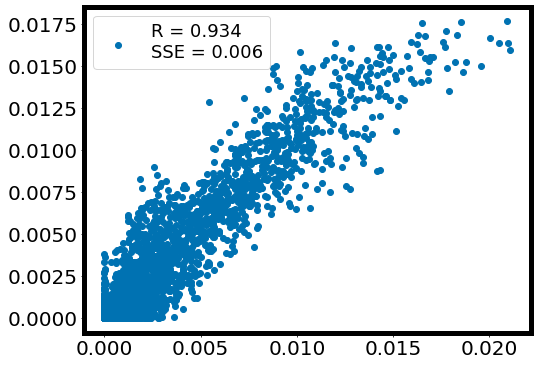

Epoch: 0, Loss: 554.12755, Residuals: 0.19304, Convergence:   inf
Epoch: 10, Loss: 473.87344, Residuals: 0.17349, Convergence: 0.015888
Epoch: 20, Loss: 404.64505, Residuals: 0.15639, Convergence: 0.015918
Epoch: 30, Loss: 345.92062, Residuals: 0.14081, Convergence: 0.015688
Epoch: 40, Loss: 297.00134, Residuals: 0.12661, Convergence: 0.015152
Epoch: 50, Loss: 256.25406, Residuals: 0.11353, Convergence: 0.014514
Epoch: 60, Loss: 222.59380, Residuals: 0.10130, Convergence: 0.013882
Epoch: 70, Loss: 194.44765, Residuals: 0.09050, Convergence: 0.013447
Epoch: 80, Loss: 170.46497, Residuals: 0.08119, Convergence: 0.013043
Epoch: 90, Loss: 150.25374, Residuals: 0.07299, Convergence: 0.012215
Epoch: 100, Loss: 133.08665, Residuals: 0.06540, Convergence: 0.011931
Epoch: 110, Loss: 118.49203, Residuals: 0.05846, Convergence: 0.011569
Epoch: 120, Loss: 105.94350, Residuals: 0.05228, Convergence: 0.010983
Epoch: 130, Loss: 95.20997, Residuals: 0.04686, Convergence: 0.010480
Epoch: 140, Loss: 86.

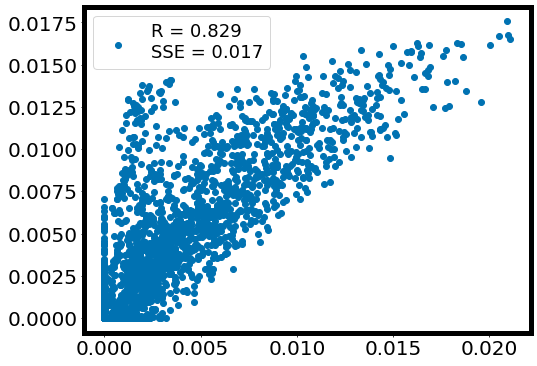

Running trial 5, cycle 1
Epoch: 0, Loss: 174.77905, Residuals: -0.44596, Convergence:   inf
Epoch: 10, Loss: 146.90796, Residuals: -0.41787, Convergence: 0.017655
Epoch: 20, Loss: 123.30395, Residuals: -0.39191, Convergence: 0.017681
Epoch: 30, Loss: 103.44575, Residuals: -0.36821, Convergence: 0.017753
Epoch: 40, Loss: 86.70850, Residuals: -0.34670, Convergence: 0.017848
Epoch: 50, Loss: 72.63854, Residuals: -0.32722, Convergence: 0.017860
Epoch: 60, Loss: 60.88160, Residuals: -0.30963, Convergence: 0.017761
Epoch: 70, Loss: 51.09956, Residuals: -0.29373, Convergence: 0.017588
Epoch: 80, Loss: 42.97826, Residuals: -0.27930, Convergence: 0.017343
Epoch: 90, Loss: 36.24832, Residuals: -0.26610, Convergence: 0.017025
Epoch: 100, Loss: 30.73132, Residuals: -0.25342, Convergence: 0.016280
Epoch: 110, Loss: 26.16513, Residuals: -0.24176, Convergence: 0.015811
Epoch: 120, Loss: 22.40529, Residuals: -0.23098, Convergence: 0.015535
Epoch: 130, Loss: 19.31902, Residuals: -0.22093, Convergence: 

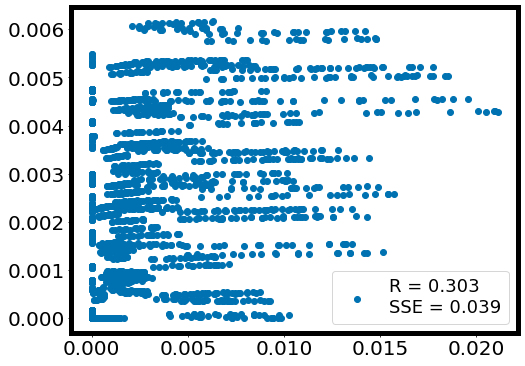

Running trial 5, cycle 2
Epoch: 0, Loss: 212.83035, Residuals: -0.16070, Convergence:   inf
Epoch: 10, Loss: 180.73532, Residuals: -0.15286, Convergence: 0.016507
Epoch: 20, Loss: 153.38986, Residuals: -0.14528, Convergence: 0.016572
Epoch: 30, Loss: 130.14499, Residuals: -0.13769, Convergence: 0.016540
Epoch: 40, Loss: 110.54555, Residuals: -0.13035, Convergence: 0.016374
Epoch: 50, Loss: 94.08806, Residuals: -0.12346, Convergence: 0.016139
Epoch: 60, Loss: 80.40408, Residuals: -0.11647, Convergence: 0.015219
Epoch: 70, Loss: 68.91331, Residuals: -0.10981, Convergence: 0.015343
Epoch: 80, Loss: 59.33718, Residuals: -0.10354, Convergence: 0.014522
Epoch: 90, Loss: 51.28907, Residuals: -0.09776, Convergence: 0.014068
Epoch: 100, Loss: 44.54795, Residuals: -0.09237, Convergence: 0.014019
Epoch: 110, Loss: 38.89169, Residuals: -0.08738, Convergence: 0.013560
Epoch: 120, Loss: 34.20063, Residuals: -0.08293, Convergence: 0.012935
Epoch: 130, Loss: 30.27739, Residuals: -0.07883, Convergence:

Epoch: 860, Loss: 113.31987, Residuals: 0.00351, Convergence: 0.003376
Epoch: 870, Loss: 110.68134, Residuals: 0.00361, Convergence: 0.001592

Epoch: 871, Evidence: 534.34253, Convergence: 0.004416
Epoch: 880, Loss: 110.34068, Residuals: 0.00333, Convergence: 0.002550
Epoch: 890, Loss: 107.42874, Residuals: 0.00321, Convergence: 0.001560
Epoch: 900, Loss: 104.95210, Residuals: 0.00317, Convergence: 0.002636
Epoch: 910, Loss: 102.89687, Residuals: 0.00367, Convergence: 0.000504

Epoch: 910, Evidence: 534.06726, Convergence: -0.000515
Epoch: 910, Loss: 104.38631, Residuals: 0.00367, Convergence:   inf

Epoch: 913, Evidence: 540.09424, Convergence: 0.010649
Epoch: 920, Loss: 102.72974, Residuals: 0.00052, Convergence: 0.006907
Epoch: 930, Loss: 97.66403, Residuals: -0.00039, Convergence: 0.005870

Epoch: 931, Evidence: 540.23499, Convergence: 0.000261
Epoch: 940, Loss: 91.01427, Residuals: -0.00904, Convergence: 0.006547

Epoch: 947, Evidence: 534.22150, Convergence: -0.010993
Epoch: 950,

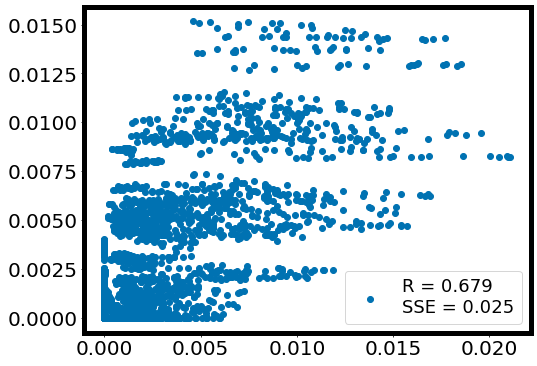

Running trial 5, cycle 3
Epoch: 0, Loss: 352.90645, Residuals: 0.01750, Convergence:   inf
Epoch: 10, Loss: 298.71295, Residuals: 0.01066, Convergence: 0.016850
Epoch: 20, Loss: 252.54747, Residuals: 0.00492, Convergence: 0.017027
Epoch: 30, Loss: 213.13266, Residuals: 0.00012, Convergence: 0.017147
Epoch: 40, Loss: 179.88945, Residuals: -0.00395, Convergence: 0.017031
Epoch: 50, Loss: 152.17831, Residuals: -0.00747, Convergence: 0.016679
Epoch: 60, Loss: 129.27097, Residuals: -0.01005, Convergence: 0.016111
Epoch: 70, Loss: 110.42444, Residuals: -0.01210, Convergence: 0.015442
Epoch: 80, Loss: 94.74847, Residuals: -0.01355, Convergence: 0.015425
Epoch: 90, Loss: 81.64898, Residuals: -0.01467, Convergence: 0.014789
Epoch: 100, Loss: 70.84196, Residuals: -0.01508, Convergence: 0.014347
Epoch: 110, Loss: 61.78907, Residuals: -0.01540, Convergence: 0.013605
Epoch: 120, Loss: 54.20297, Residuals: -0.01535, Convergence: 0.013467
Epoch: 130, Loss: 47.62567, Residuals: -0.01560, Convergence: 

Epoch: 1030, Loss: 137.50812, Residuals: -0.01173, Convergence: 0.001550

Epoch: 1032, Evidence: 919.19067, Convergence: 0.002569
Epoch: 1040, Loss: 144.06876, Residuals: -0.01234, Convergence: 0.001812
Epoch: 1050, Loss: 141.54225, Residuals: -0.01267, Convergence: 0.001529
Epoch: 1060, Loss: 139.47969, Residuals: -0.01253, Convergence: 0.001630

Epoch: 1065, Evidence: 921.63892, Convergence: 0.002656
Epoch: 1070, Loss: 145.46202, Residuals: -0.01280, Convergence: 0.002099
Epoch: 1080, Loss: 142.84668, Residuals: -0.01320, Convergence: 0.001816
Epoch: 1090, Loss: 140.78995, Residuals: -0.01310, Convergence: 0.001139

Epoch: 1097, Evidence: 921.08673, Convergence: -0.000599
Epoch: 1100, Loss: 142.70871, Residuals: -0.01469, Convergence: 0.003358
Epoch: 1110, Loss: 139.22719, Residuals: -0.01738, Convergence: 0.002181
Epoch: 1120, Loss: 136.65784, Residuals: -0.01688, Convergence: 0.001418

Epoch: 1126, Evidence: 906.91821, Convergence: -0.016232
Epoch: 1130, Loss: 154.20682, Residuals:

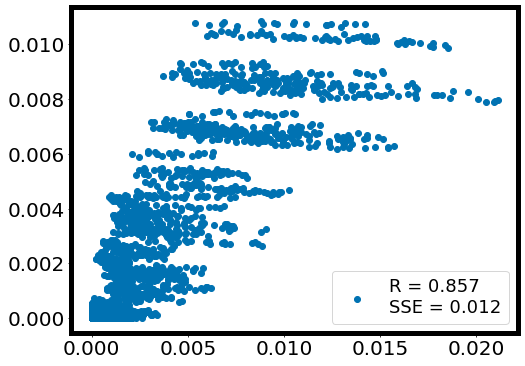

Running trial 5, cycle 4
Epoch: 0, Loss: 422.49986, Residuals: -0.04029, Convergence:   inf
Epoch: 10, Loss: 358.86084, Residuals: -0.03996, Convergence: 0.016588
Epoch: 20, Loss: 304.12695, Residuals: -0.03926, Convergence: 0.016758
Epoch: 30, Loss: 257.58121, Residuals: -0.03834, Convergence: 0.016700
Epoch: 40, Loss: 218.61424, Residuals: -0.03763, Convergence: 0.016381
Epoch: 50, Loss: 186.24419, Residuals: -0.03696, Convergence: 0.015892
Epoch: 60, Loss: 159.60223, Residuals: -0.03614, Convergence: 0.015310
Epoch: 70, Loss: 137.43701, Residuals: -0.03507, Convergence: 0.014891
Epoch: 80, Loss: 118.70161, Residuals: -0.03402, Convergence: 0.014774
Epoch: 90, Loss: 102.56641, Residuals: -0.03302, Convergence: 0.014740
Epoch: 100, Loss: 88.91095, Residuals: -0.03165, Convergence: 0.014091
Epoch: 110, Loss: 77.30518, Residuals: -0.03019, Convergence: 0.014012
Epoch: 120, Loss: 67.52246, Residuals: -0.02870, Convergence: 0.013282
Epoch: 130, Loss: 59.19141, Residuals: -0.02700, Converg


Epoch: 912, Evidence: 1173.55579, Convergence: -0.007286


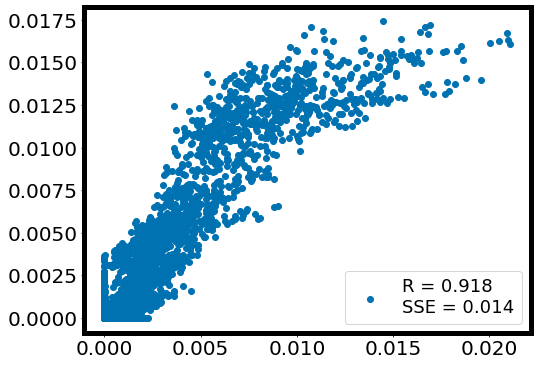

Running trial 5, cycle 5
Epoch: 0, Loss: 460.18794, Residuals: 0.00597, Convergence:   inf
Epoch: 10, Loss: 393.06564, Residuals: 0.00269, Convergence: 0.016088
Epoch: 20, Loss: 334.58673, Residuals: 0.00015, Convergence: 0.016316
Epoch: 30, Loss: 284.70212, Residuals: -0.00177, Convergence: 0.016170
Epoch: 40, Loss: 242.97044, Residuals: -0.00359, Convergence: 0.015791
Epoch: 50, Loss: 208.49248, Residuals: -0.00495, Convergence: 0.015183
Epoch: 60, Loss: 179.98845, Residuals: -0.00583, Convergence: 0.014525
Epoch: 70, Loss: 156.29440, Residuals: -0.00625, Convergence: 0.013922
Epoch: 80, Loss: 136.44839, Residuals: -0.00664, Convergence: 0.013482
Epoch: 90, Loss: 119.64660, Residuals: -0.00694, Convergence: 0.013201
Epoch: 100, Loss: 105.21928, Residuals: -0.00724, Convergence: 0.012816
Epoch: 110, Loss: 92.80767, Residuals: -0.00736, Convergence: 0.012621
Epoch: 120, Loss: 82.05664, Residuals: -0.00694, Convergence: 0.012117
Epoch: 130, Loss: 72.91022, Residuals: -0.00642, Convergen

Epoch: 950, Loss: 315.79694, Residuals: -0.01095, Convergence: 0.001739

Epoch: 958, Evidence: 1482.45239, Convergence: -0.008575
Epoch: 960, Loss: 329.08752, Residuals: -0.00821, Convergence: 0.001491
Epoch: 970, Loss: 324.74930, Residuals: -0.00853, Convergence: 0.001286

Epoch: 976, Evidence: 1495.32727, Convergence: 0.000109
Epoch: 980, Loss: 321.11078, Residuals: -0.00994, Convergence: 0.002061
Epoch: 990, Loss: 315.63058, Residuals: -0.01115, Convergence: 0.001526

Epoch: 991, Evidence: 1487.30151, Convergence: -0.005287


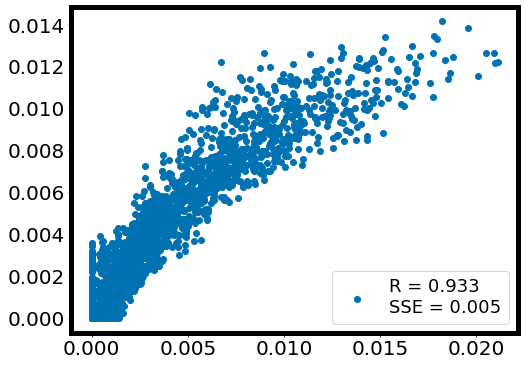

Epoch: 0, Loss: 722.34178, Residuals: 0.15578, Convergence:   inf
Epoch: 10, Loss: 610.48297, Residuals: 0.13880, Convergence: 0.017129
Epoch: 20, Loss: 514.43579, Residuals: 0.12352, Convergence: 0.017331
Epoch: 30, Loss: 433.71466, Residuals: 0.10938, Convergence: 0.017114
Epoch: 40, Loss: 367.19611, Residuals: 0.09714, Convergence: 0.016582
Epoch: 50, Loss: 312.55963, Residuals: 0.08638, Convergence: 0.015999
Epoch: 60, Loss: 267.64450, Residuals: 0.07736, Convergence: 0.015452
Epoch: 70, Loss: 230.23436, Residuals: 0.06910, Convergence: 0.014953
Epoch: 80, Loss: 198.92201, Residuals: 0.06140, Convergence: 0.014428
Epoch: 90, Loss: 172.66673, Residuals: 0.05478, Convergence: 0.014137
Epoch: 100, Loss: 150.61781, Residuals: 0.04891, Convergence: 0.013573
Epoch: 110, Loss: 132.30190, Residuals: 0.04393, Convergence: 0.012614
Epoch: 120, Loss: 116.80149, Residuals: 0.03964, Convergence: 0.012105
Epoch: 130, Loss: 103.55087, Residuals: 0.03627, Convergence: 0.011726
Epoch: 140, Loss: 92


Epoch: 875, Evidence: 1834.15613, Convergence: -0.002087


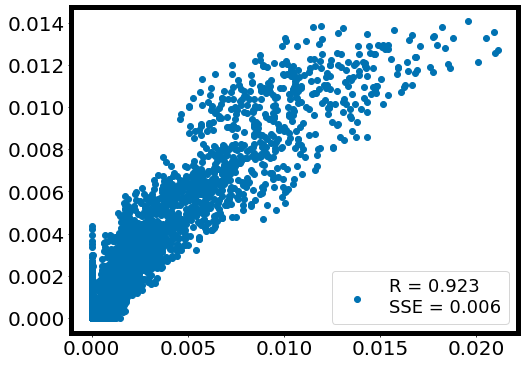

Running trial 6, cycle 1
Epoch: 0, Loss: 87.39661, Residuals: -0.66683, Convergence:   inf
Epoch: 10, Loss: 74.62479, Residuals: -0.61797, Convergence: 0.015844
Epoch: 20, Loss: 63.79314, Residuals: -0.57620, Convergence: 0.015775
Epoch: 30, Loss: 54.58788, Residuals: -0.53922, Convergence: 0.015643
Epoch: 40, Loss: 46.77396, Residuals: -0.50560, Convergence: 0.015510
Epoch: 50, Loss: 40.12893, Residuals: -0.47471, Convergence: 0.015383
Epoch: 60, Loss: 34.47588, Residuals: -0.44624, Convergence: 0.015223
Epoch: 70, Loss: 29.67602, Residuals: -0.42009, Convergence: 0.014996
Epoch: 80, Loss: 25.61325, Residuals: -0.39618, Convergence: 0.014684
Epoch: 90, Loss: 22.18503, Residuals: -0.37441, Convergence: 0.014287
Epoch: 100, Loss: 19.32318, Residuals: -0.35423, Convergence: 0.013742
Epoch: 110, Loss: 16.92472, Residuals: -0.33569, Convergence: 0.013234
Epoch: 120, Loss: 14.91516, Residuals: -0.31847, Convergence: 0.012532
Epoch: 130, Loss: 13.23553, Residuals: -0.30250, Convergence: 0.01

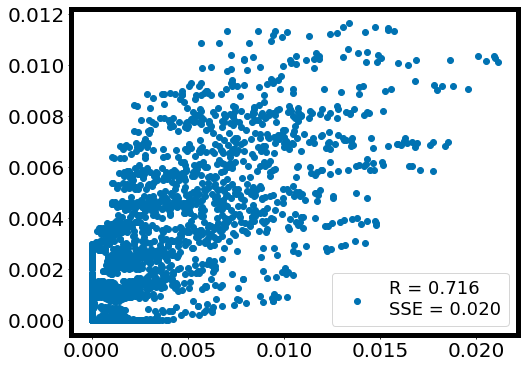

Running trial 6, cycle 2
Epoch: 0, Loss: 161.86041, Residuals: -0.56109, Convergence:   inf
Epoch: 10, Loss: 139.47766, Residuals: -0.51880, Convergence: 0.014993
Epoch: 20, Loss: 120.15391, Residuals: -0.47996, Convergence: 0.015057
Epoch: 30, Loss: 103.41356, Residuals: -0.44382, Convergence: 0.015177
Epoch: 40, Loss: 88.95882, Residuals: -0.41013, Convergence: 0.015125
Epoch: 50, Loss: 76.47138, Residuals: -0.37857, Convergence: 0.015344
Epoch: 60, Loss: 65.58781, Residuals: -0.34955, Convergence: 0.015555
Epoch: 70, Loss: 56.20466, Residuals: -0.32291, Convergence: 0.015549
Epoch: 80, Loss: 48.24125, Residuals: -0.29806, Convergence: 0.015044
Epoch: 90, Loss: 41.48392, Residuals: -0.27488, Convergence: 0.015058
Epoch: 100, Loss: 35.82111, Residuals: -0.25347, Convergence: 0.015022
Epoch: 110, Loss: 31.04115, Residuals: -0.23382, Convergence: 0.014397
Epoch: 120, Loss: 27.06860, Residuals: -0.21581, Convergence: 0.013929
Epoch: 130, Loss: 23.72718, Residuals: -0.19947, Convergence: 


Epoch: 954, Evidence: 511.76892, Convergence: -0.001736
Epoch: 960, Loss: 92.01557, Residuals: -0.00699, Convergence: 0.001203
Epoch: 970, Loss: 90.98907, Residuals: -0.00699, Convergence: 0.001086

Epoch: 972, Evidence: 526.90027, Convergence: 0.027031
Epoch: 980, Loss: 95.07368, Residuals: -0.00696, Convergence: 0.001029

Epoch: 983, Evidence: 531.03308, Convergence: 0.007783
Epoch: 990, Loss: 98.29207, Residuals: -0.00696, Convergence: 0.001109
Epoch: 1000, Loss: 97.19983, Residuals: -0.00693, Convergence: 0.000843

Epoch: 1000, Evidence: 532.37708, Convergence: 0.002525
Epoch: 1000, Loss: 100.84207, Residuals: -0.00693, Convergence:   inf
Epoch: 1010, Loss: 99.63777, Residuals: -0.00693, Convergence: 0.001149
Epoch: 1020, Loss: 98.51901, Residuals: -0.00693, Convergence: 0.001023

Epoch: 1026, Evidence: 534.99170, Convergence: 0.004887
Epoch: 1030, Loss: 100.87759, Residuals: -0.00691, Convergence: 0.001269
Epoch: 1040, Loss: 99.71338, Residuals: -0.00693, Convergence: 0.001194

E

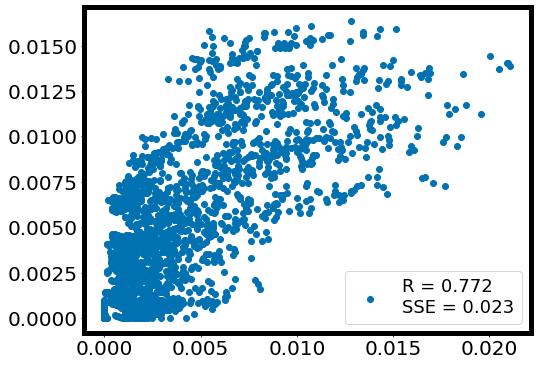

Running trial 6, cycle 3
Epoch: 0, Loss: 220.45961, Residuals: -0.34079, Convergence:   inf
Epoch: 10, Loss: 190.78510, Residuals: -0.31439, Convergence: 0.014564
Epoch: 20, Loss: 165.10258, Residuals: -0.28998, Convergence: 0.014636
Epoch: 30, Loss: 142.55244, Residuals: -0.26755, Convergence: 0.014893
Epoch: 40, Loss: 122.98602, Residuals: -0.24692, Convergence: 0.014788
Epoch: 50, Loss: 106.34708, Residuals: -0.22763, Convergence: 0.014519
Epoch: 60, Loss: 92.19915, Residuals: -0.20975, Convergence: 0.014209
Epoch: 70, Loss: 80.06601, Residuals: -0.19339, Convergence: 0.014143
Epoch: 80, Loss: 69.76801, Residuals: -0.17853, Convergence: 0.013623
Epoch: 90, Loss: 60.98357, Residuals: -0.16518, Convergence: 0.013448
Epoch: 100, Loss: 53.56669, Residuals: -0.15289, Convergence: 0.012864
Epoch: 110, Loss: 47.25515, Residuals: -0.14194, Convergence: 0.012348
Epoch: 120, Loss: 41.88514, Residuals: -0.13185, Convergence: 0.011770
Epoch: 130, Loss: 37.39294, Residuals: -0.12261, Convergence

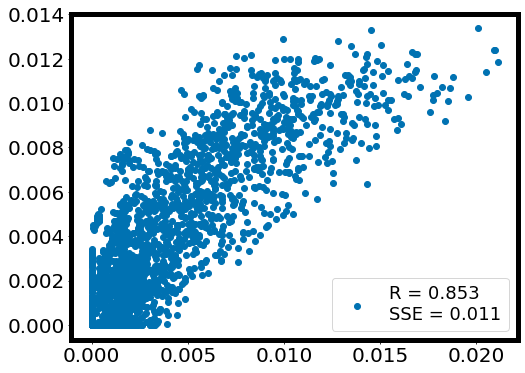

Running trial 6, cycle 4
Epoch: 0, Loss: 343.61382, Residuals: -0.26472, Convergence:   inf
Epoch: 10, Loss: 293.58157, Residuals: -0.24418, Convergence: 0.015955
Epoch: 20, Loss: 250.36783, Residuals: -0.22549, Convergence: 0.016140
Epoch: 30, Loss: 213.28697, Residuals: -0.20856, Convergence: 0.016028
Epoch: 40, Loss: 181.88541, Residuals: -0.19315, Convergence: 0.015937
Epoch: 50, Loss: 155.65416, Residuals: -0.17878, Convergence: 0.015461
Epoch: 60, Loss: 134.01018, Residuals: -0.16479, Convergence: 0.014802
Epoch: 70, Loss: 116.00781, Residuals: -0.15188, Convergence: 0.014314
Epoch: 80, Loss: 101.01648, Residuals: -0.13995, Convergence: 0.013519
Epoch: 90, Loss: 88.58543, Residuals: -0.12884, Convergence: 0.013054
Epoch: 100, Loss: 78.06786, Residuals: -0.11888, Convergence: 0.012305
Epoch: 110, Loss: 69.19754, Residuals: -0.10976, Convergence: 0.011892
Epoch: 120, Loss: 61.72201, Residuals: -0.10134, Convergence: 0.011279
Epoch: 130, Loss: 55.44530, Residuals: -0.09352, Converge

Epoch: 920, Loss: 250.70230, Residuals: -0.00813, Convergence: 0.001909
Epoch: 930, Loss: 246.97278, Residuals: -0.00823, Convergence: 0.000855

Epoch: 930, Evidence: 1183.43005, Convergence: -0.003270
Epoch: 930, Loss: 259.31030, Residuals: -0.00789, Convergence:   inf
Epoch: 940, Loss: 256.40009, Residuals: -0.00781, Convergence: 0.000953

Epoch: 940, Evidence: 1189.62744, Convergence: 0.001957
Epoch: 940, Loss: 258.25665, Residuals: -0.00781, Convergence:   inf

Epoch: 946, Evidence: 1188.60693, Convergence: -0.000859
Epoch: 950, Loss: 255.29926, Residuals: -0.00794, Convergence: 0.002014
Epoch: 960, Loss: 250.79121, Residuals: -0.00826, Convergence: 0.001237

Epoch: 966, Evidence: 1184.17651, Convergence: -0.004603


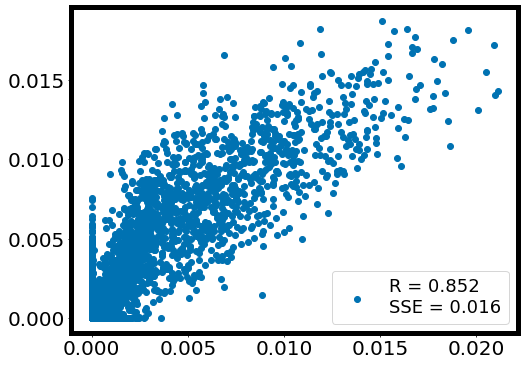

Running trial 6, cycle 5
Epoch: 0, Loss: 533.13518, Residuals: -0.05531, Convergence:   inf
Epoch: 10, Loss: 453.15097, Residuals: -0.05369, Convergence: 0.016413
Epoch: 20, Loss: 385.02100, Residuals: -0.05233, Convergence: 0.016423
Epoch: 30, Loss: 327.40268, Residuals: -0.05130, Convergence: 0.016286
Epoch: 40, Loss: 279.01352, Residuals: -0.05032, Convergence: 0.015993
Epoch: 50, Loss: 238.52219, Residuals: -0.04935, Convergence: 0.015490
Epoch: 60, Loss: 204.82893, Residuals: -0.04716, Convergence: 0.015431
Epoch: 70, Loss: 176.19345, Residuals: -0.04451, Convergence: 0.015015
Epoch: 80, Loss: 151.77341, Residuals: -0.04120, Convergence: 0.014604
Epoch: 90, Loss: 131.07660, Residuals: -0.03765, Convergence: 0.014701
Epoch: 100, Loss: 113.61146, Residuals: -0.03434, Convergence: 0.014084
Epoch: 110, Loss: 98.59865, Residuals: -0.03189, Convergence: 0.014429
Epoch: 120, Loss: 85.86826, Residuals: -0.02945, Convergence: 0.013610
Epoch: 130, Loss: 75.17242, Residuals: -0.02714, Conver

Epoch: 940, Loss: 320.18213, Residuals: -0.00495, Convergence: 0.002058

Epoch: 947, Evidence: 1588.12866, Convergence: -0.002386
Epoch: 950, Loss: 332.64276, Residuals: -0.00388, Convergence: 0.001465
Epoch: 960, Loss: 328.07132, Residuals: -0.00392, Convergence: 0.001257

Epoch: 962, Evidence: 1595.04614, Convergence: 0.001961
Epoch: 970, Loss: 327.70673, Residuals: -0.00398, Convergence: 0.001441

Epoch: 977, Evidence: 1594.50439, Convergence: -0.000340
Epoch: 980, Loss: 324.45355, Residuals: -0.00440, Convergence: 0.002491
Epoch: 990, Loss: 318.35663, Residuals: -0.00480, Convergence: 0.001738
Epoch: 1000, Loss: 313.84302, Residuals: -0.00414, Convergence: 0.001115

Epoch: 1002, Evidence: 1588.16833, Convergence: -0.004331


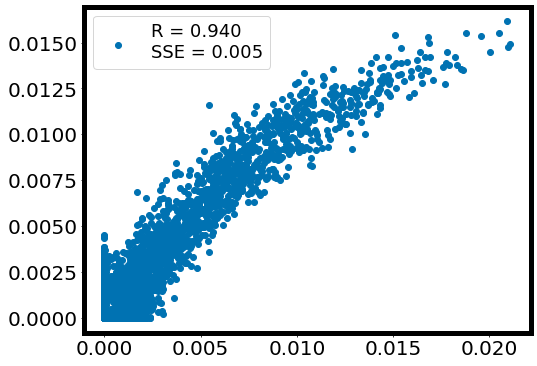

Epoch: 0, Loss: 640.23137, Residuals: -0.01083, Convergence:   inf
Epoch: 10, Loss: 544.20233, Residuals: -0.01296, Convergence: 0.016418
Epoch: 20, Loss: 462.24310, Residuals: -0.01504, Convergence: 0.016463
Epoch: 30, Loss: 392.88034, Residuals: -0.01749, Convergence: 0.016281
Epoch: 40, Loss: 334.77924, Residuals: -0.02006, Convergence: 0.016028
Epoch: 50, Loss: 286.18567, Residuals: -0.02158, Convergence: 0.015793
Epoch: 60, Loss: 244.97095, Residuals: -0.02231, Convergence: 0.015573
Epoch: 70, Loss: 210.27736, Residuals: -0.02250, Convergence: 0.015010
Epoch: 80, Loss: 181.48610, Residuals: -0.02128, Convergence: 0.014733
Epoch: 90, Loss: 157.28525, Residuals: -0.01981, Convergence: 0.014080
Epoch: 100, Loss: 136.52109, Residuals: -0.01876, Convergence: 0.014044
Epoch: 110, Loss: 119.07277, Residuals: -0.01757, Convergence: 0.013523
Epoch: 120, Loss: 104.25053, Residuals: -0.01663, Convergence: 0.013385
Epoch: 130, Loss: 91.67307, Residuals: -0.01583, Convergence: 0.012865
Epoch: 


Epoch: 985, Evidence: 2025.36035, Convergence: -0.006337

Epoch: 988, Evidence: 2039.77563, Convergence: 0.000775
Epoch: 990, Loss: 401.67099, Residuals: -0.01127, Convergence: 0.001809
Epoch: 1000, Loss: 395.58624, Residuals: -0.01239, Convergence: 0.001700
Epoch: 1010, Loss: 390.24506, Residuals: -0.01288, Convergence: 0.001312

Epoch: 1012, Evidence: 2032.63330, Convergence: -0.002736


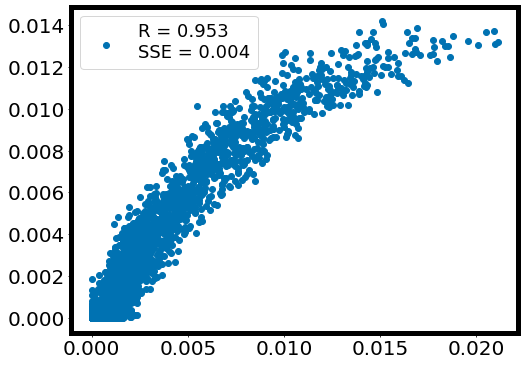

Running trial 7, cycle 1
Epoch: 0, Loss: 101.36518, Residuals: -1.05491, Convergence:   inf
Epoch: 10, Loss: 86.80273, Residuals: -0.96942, Convergence: 0.016021
Epoch: 20, Loss: 73.87830, Residuals: -0.89467, Convergence: 0.016375
Epoch: 30, Loss: 62.75284, Residuals: -0.82746, Convergence: 0.016518
Epoch: 40, Loss: 53.26248, Residuals: -0.76613, Convergence: 0.016531
Epoch: 50, Loss: 45.23844, Residuals: -0.71048, Convergence: 0.016370
Epoch: 60, Loss: 38.51084, Residuals: -0.65969, Convergence: 0.016131
Epoch: 70, Loss: 32.87876, Residuals: -0.61323, Convergence: 0.015720
Epoch: 80, Loss: 28.26174, Residuals: -0.56968, Convergence: 0.014701
Epoch: 90, Loss: 24.43586, Residuals: -0.52877, Convergence: 0.014396
Epoch: 100, Loss: 21.25376, Residuals: -0.49075, Convergence: 0.013977
Epoch: 110, Loss: 18.58090, Residuals: -0.45622, Convergence: 0.013579
Epoch: 120, Loss: 16.37173, Residuals: -0.42436, Convergence: 0.012162
Epoch: 130, Loss: 14.50798, Residuals: -0.39528, Convergence: 0.0


Epoch: 793, Evidence: 217.05527, Convergence: 0.000164

Epoch: 797, Evidence: 218.42688, Convergence: 0.006442
Epoch: 800, Loss: 50.44971, Residuals: 0.00003, Convergence: 0.001500

Epoch: 801, Evidence: 217.93460, Convergence: -0.002259

Epoch: 802, Evidence: 219.44376, Convergence: 0.004634

Epoch: 807, Evidence: 221.79761, Convergence: 0.010613

Epoch: 809, Evidence: 223.03867, Convergence: 0.005564
Epoch: 810, Loss: 53.41205, Residuals: 0.00013, Convergence: 0.001324

Epoch: 812, Evidence: 222.96362, Convergence: -0.000337

Epoch: 818, Evidence: 223.25456, Convergence: 0.000967
Epoch: 820, Loss: 53.18951, Residuals: -0.00105, Convergence: 0.003742

Epoch: 822, Evidence: 222.94542, Convergence: -0.000418


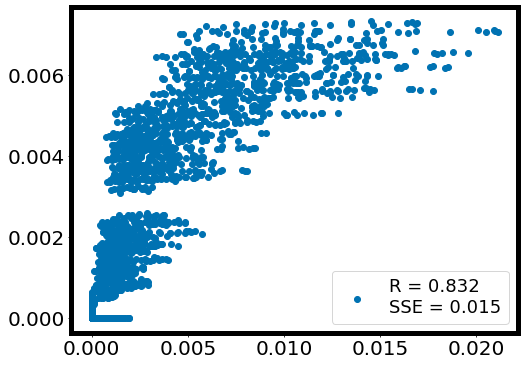

Running trial 7, cycle 2
Epoch: 0, Loss: 183.22080, Residuals: -0.54893, Convergence:   inf
Epoch: 10, Loss: 156.82936, Residuals: -0.50351, Convergence: 0.016052
Epoch: 20, Loss: 133.47949, Residuals: -0.46357, Convergence: 0.016385
Epoch: 30, Loss: 113.30965, Residuals: -0.42815, Convergence: 0.016615
Epoch: 40, Loss: 96.02372, Residuals: -0.39663, Convergence: 0.016700
Epoch: 50, Loss: 81.49672, Residuals: -0.36769, Convergence: 0.016735
Epoch: 60, Loss: 69.16496, Residuals: -0.34091, Convergence: 0.016582
Epoch: 70, Loss: 59.01334, Residuals: -0.31527, Convergence: 0.014409
Epoch: 80, Loss: 50.47513, Residuals: -0.29175, Convergence: 0.015728
Epoch: 90, Loss: 43.44874, Residuals: -0.26995, Convergence: 0.014624
Epoch: 100, Loss: 37.70465, Residuals: -0.24999, Convergence: 0.014690
Epoch: 110, Loss: 32.79022, Residuals: -0.23198, Convergence: 0.013710
Epoch: 120, Loss: 28.75122, Residuals: -0.21564, Convergence: 0.012306
Epoch: 130, Loss: 25.40269, Residuals: -0.20073, Convergence: 

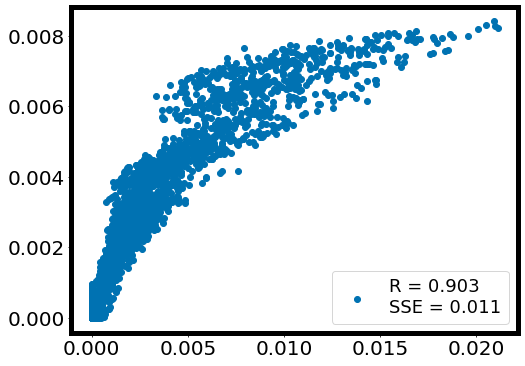

Running trial 7, cycle 3
Epoch: 0, Loss: 274.12727, Residuals: -0.22672, Convergence:   inf
Epoch: 10, Loss: 234.49635, Residuals: -0.20825, Convergence: 0.016144
Epoch: 20, Loss: 199.26360, Residuals: -0.19146, Convergence: 0.016548
Epoch: 30, Loss: 169.01903, Residuals: -0.17655, Convergence: 0.016637
Epoch: 40, Loss: 143.38109, Residuals: -0.16319, Convergence: 0.016649
Epoch: 50, Loss: 121.72126, Residuals: -0.15121, Convergence: 0.016382
Epoch: 60, Loss: 103.68620, Residuals: -0.14027, Convergence: 0.015999
Epoch: 70, Loss: 88.62927, Residuals: -0.13005, Convergence: 0.015456
Epoch: 80, Loss: 76.04359, Residuals: -0.12079, Convergence: 0.015033
Epoch: 90, Loss: 65.66714, Residuals: -0.11208, Convergence: 0.014495
Epoch: 100, Loss: 57.08152, Residuals: -0.10397, Convergence: 0.013811
Epoch: 110, Loss: 49.86565, Residuals: -0.09658, Convergence: 0.013595
Epoch: 120, Loss: 43.84259, Residuals: -0.08979, Convergence: 0.012695
Epoch: 130, Loss: 38.84579, Residuals: -0.08335, Convergenc

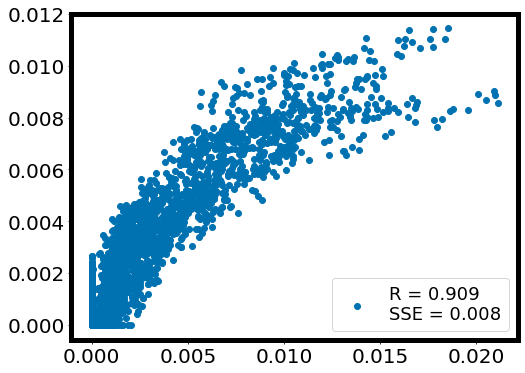

Running trial 7, cycle 4
Epoch: 0, Loss: 426.63582, Residuals: -0.09484, Convergence:   inf
Epoch: 10, Loss: 362.31195, Residuals: -0.08859, Convergence: 0.016891
Epoch: 20, Loss: 305.88690, Residuals: -0.08308, Convergence: 0.017165
Epoch: 30, Loss: 257.90399, Residuals: -0.07820, Convergence: 0.017361
Epoch: 40, Loss: 216.89232, Residuals: -0.07352, Convergence: 0.017371
Epoch: 50, Loss: 182.84523, Residuals: -0.06875, Convergence: 0.017102
Epoch: 60, Loss: 154.69403, Residuals: -0.06435, Convergence: 0.016656
Epoch: 70, Loss: 131.52394, Residuals: -0.06017, Convergence: 0.016192
Epoch: 80, Loss: 112.66760, Residuals: -0.05574, Convergence: 0.015344
Epoch: 90, Loss: 97.22119, Residuals: -0.05139, Convergence: 0.014039
Epoch: 100, Loss: 84.56843, Residuals: -0.04717, Convergence: 0.013500
Epoch: 110, Loss: 74.06868, Residuals: -0.04328, Convergence: 0.012823
Epoch: 120, Loss: 65.31107, Residuals: -0.03973, Convergence: 0.012027
Epoch: 130, Loss: 58.09888, Residuals: -0.03630, Converge

Epoch: 980, Loss: 237.51218, Residuals: -0.00537, Convergence: 0.001253

Epoch: 981, Evidence: 1164.78137, Convergence: -0.003277

Epoch: 986, Evidence: 1177.78369, Convergence: 0.007798
Epoch: 990, Loss: 251.55612, Residuals: -0.00479, Convergence: 0.001108

Epoch: 992, Evidence: 1178.12048, Convergence: 0.000286
Epoch: 1000, Loss: 249.12445, Residuals: -0.00523, Convergence: 0.001650
Epoch: 1010, Loss: 245.21823, Residuals: -0.00555, Convergence: 0.001527
Epoch: 1020, Loss: 242.18393, Residuals: -0.00561, Convergence: 0.001224

Epoch: 1023, Evidence: 1166.50476, Convergence: -0.009669


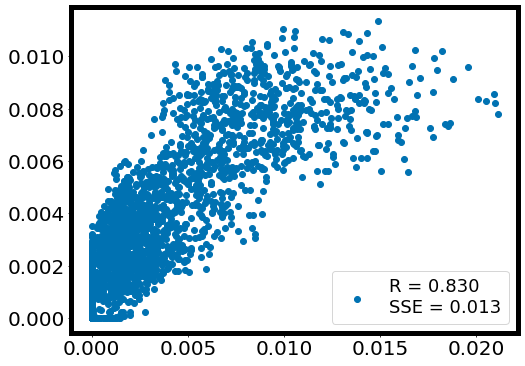

Running trial 7, cycle 5
Epoch: 0, Loss: 549.53398, Residuals: 0.00936, Convergence:   inf
Epoch: 10, Loss: 465.20068, Residuals: 0.00654, Convergence: 0.017137
Epoch: 20, Loss: 391.94974, Residuals: 0.00383, Convergence: 0.017333
Epoch: 30, Loss: 330.08081, Residuals: 0.00104, Convergence: 0.017340
Epoch: 40, Loss: 278.21783, Residuals: -0.00135, Convergence: 0.017105
Epoch: 50, Loss: 235.28551, Residuals: -0.00319, Convergence: 0.016722
Epoch: 60, Loss: 199.88504, Residuals: -0.00464, Convergence: 0.016217
Epoch: 70, Loss: 170.67822, Residuals: -0.00576, Convergence: 0.015666
Epoch: 80, Loss: 146.57277, Residuals: -0.00636, Convergence: 0.015098
Epoch: 90, Loss: 126.71583, Residuals: -0.00674, Convergence: 0.014363
Epoch: 100, Loss: 110.52351, Residuals: -0.00691, Convergence: 0.013075
Epoch: 110, Loss: 97.17284, Residuals: -0.00698, Convergence: 0.012243
Epoch: 120, Loss: 86.09576, Residuals: -0.00701, Convergence: 0.011731
Epoch: 130, Loss: 76.74299, Residuals: -0.00709, Convergenc

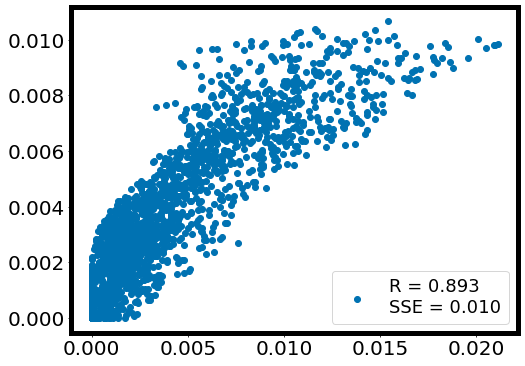

Epoch: 0, Loss: 689.18352, Residuals: 0.07738, Convergence:   inf
Epoch: 10, Loss: 583.06409, Residuals: 0.06853, Convergence: 0.017139
Epoch: 20, Loss: 491.87326, Residuals: 0.06053, Convergence: 0.017142
Epoch: 30, Loss: 415.14584, Residuals: 0.05324, Convergence: 0.017036
Epoch: 40, Loss: 351.82828, Residuals: 0.04691, Convergence: 0.016487
Epoch: 50, Loss: 299.22952, Residuals: 0.04125, Convergence: 0.016258
Epoch: 60, Loss: 255.72868, Residuals: 0.03636, Convergence: 0.015672
Epoch: 70, Loss: 219.68826, Residuals: 0.03220, Convergence: 0.014914
Epoch: 80, Loss: 189.87582, Residuals: 0.02875, Convergence: 0.014626
Epoch: 90, Loss: 164.75520, Residuals: 0.02575, Convergence: 0.014090
Epoch: 100, Loss: 143.48473, Residuals: 0.02295, Convergence: 0.013790
Epoch: 110, Loss: 125.47273, Residuals: 0.02046, Convergence: 0.013219
Epoch: 120, Loss: 110.39184, Residuals: 0.01820, Convergence: 0.012629
Epoch: 130, Loss: 97.39100, Residuals: 0.01613, Convergence: 0.012629
Epoch: 140, Loss: 86.

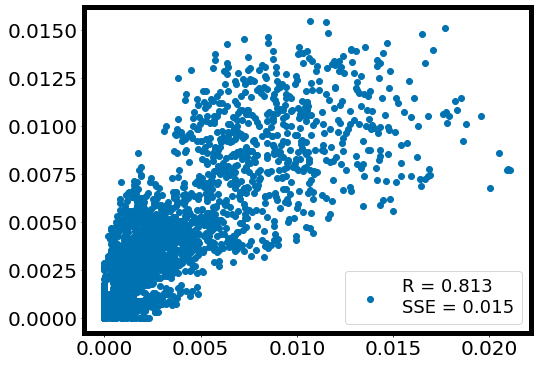

Running trial 8, cycle 1
Epoch: 0, Loss: 84.15370, Residuals: -0.90261, Convergence:   inf
Epoch: 10, Loss: 71.96246, Residuals: -0.83859, Convergence: 0.015684
Epoch: 20, Loss: 61.69618, Residuals: -0.78078, Convergence: 0.015347
Epoch: 30, Loss: 53.09866, Residuals: -0.72828, Convergence: 0.014930
Epoch: 40, Loss: 45.89173, Residuals: -0.68063, Convergence: 0.014500
Epoch: 50, Loss: 39.82946, Residuals: -0.63759, Convergence: 0.014081
Epoch: 60, Loss: 34.71717, Residuals: -0.59869, Convergence: 0.013646
Epoch: 70, Loss: 30.38954, Residuals: -0.56347, Convergence: 0.013351
Epoch: 80, Loss: 26.71304, Residuals: -0.53170, Convergence: 0.012804
Epoch: 90, Loss: 23.58356, Residuals: -0.50279, Convergence: 0.012103
Epoch: 100, Loss: 20.90838, Residuals: -0.47649, Convergence: 0.011654
Epoch: 110, Loss: 18.63062, Residuals: -0.45185, Convergence: 0.011400
Epoch: 120, Loss: 16.67587, Residuals: -0.42895, Convergence: 0.010942
Epoch: 130, Loss: 14.97965, Residuals: -0.40720, Convergence: 0.01

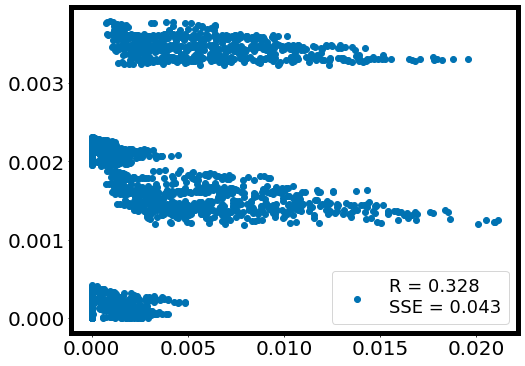

Running trial 8, cycle 2
Epoch: 0, Loss: 223.69171, Residuals: -0.52645, Convergence:   inf
Epoch: 10, Loss: 188.01859, Residuals: -0.48450, Convergence: 0.017692
Epoch: 20, Loss: 157.70685, Residuals: -0.44612, Convergence: 0.017774
Epoch: 30, Loss: 132.16455, Residuals: -0.41102, Convergence: 0.017864
Epoch: 40, Loss: 110.71415, Residuals: -0.37906, Convergence: 0.017848
Epoch: 50, Loss: 92.84022, Residuals: -0.34996, Convergence: 0.017675
Epoch: 60, Loss: 78.03242, Residuals: -0.32345, Convergence: 0.017392
Epoch: 70, Loss: 65.78642, Residuals: -0.29921, Convergence: 0.017028
Epoch: 80, Loss: 55.70384, Residuals: -0.27682, Convergence: 0.016453
Epoch: 90, Loss: 47.37174, Residuals: -0.25638, Convergence: 0.016155
Epoch: 100, Loss: 40.52062, Residuals: -0.23732, Convergence: 0.015319
Epoch: 110, Loss: 34.85711, Residuals: -0.21986, Convergence: 0.014929
Epoch: 120, Loss: 30.20125, Residuals: -0.20375, Convergence: 0.013954
Epoch: 130, Loss: 26.36021, Residuals: -0.18868, Convergence:

Epoch: 970, Loss: 96.39673, Residuals: -0.00239, Convergence: 0.001553
Epoch: 980, Loss: 94.90958, Residuals: -0.00257, Convergence: 0.001597

Epoch: 987, Evidence: 559.78357, Convergence: 0.003143
Epoch: 990, Loss: 98.10196, Residuals: -0.00271, Convergence: 0.001829
Epoch: 1000, Loss: 96.48345, Residuals: -0.00293, Convergence: 0.001649
Epoch: 1010, Loss: 95.03434, Residuals: -0.00306, Convergence: 0.001532

Epoch: 1012, Evidence: 564.05945, Convergence: 0.007581
Epoch: 1020, Loss: 97.94917, Residuals: -0.00330, Convergence: 0.001720

Epoch: 1029, Evidence: 567.24017, Convergence: 0.005607
Epoch: 1030, Loss: 100.77693, Residuals: -0.00347, Convergence: 0.001994
Epoch: 1040, Loss: 98.97392, Residuals: -0.00375, Convergence: 0.001857

Epoch: 1045, Evidence: 569.38098, Convergence: 0.003760
Epoch: 1050, Loss: 101.26355, Residuals: -0.00399, Convergence: 0.001972
Epoch: 1060, Loss: 99.49043, Residuals: -0.00422, Convergence: 0.001720
Epoch: 1070, Loss: 97.95865, Residuals: -0.00433, Conv

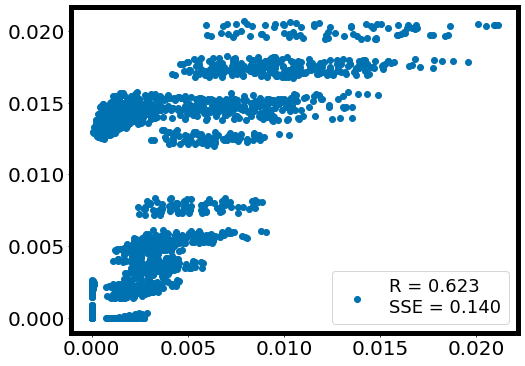

Running trial 8, cycle 3
Epoch: 0, Loss: 323.37187, Residuals: -0.30048, Convergence:   inf
Epoch: 10, Loss: 272.90863, Residuals: -0.27735, Convergence: 0.017161
Epoch: 20, Loss: 230.27457, Residuals: -0.25565, Convergence: 0.017138
Epoch: 30, Loss: 194.18861, Residuals: -0.23567, Convergence: 0.017223
Epoch: 40, Loss: 163.76373, Residuals: -0.21739, Convergence: 0.017120
Epoch: 50, Loss: 138.40710, Residuals: -0.20072, Convergence: 0.016812
Epoch: 60, Loss: 117.38203, Residuals: -0.18555, Convergence: 0.016418
Epoch: 70, Loss: 99.99867, Residuals: -0.17166, Convergence: 0.015958
Epoch: 80, Loss: 85.51213, Residuals: -0.15898, Convergence: 0.015772
Epoch: 90, Loss: 73.18313, Residuals: -0.14729, Convergence: 0.015624
Epoch: 100, Loss: 62.78337, Residuals: -0.13672, Convergence: 0.015053
Epoch: 110, Loss: 54.11449, Residuals: -0.12703, Convergence: 0.014712
Epoch: 120, Loss: 46.92954, Residuals: -0.11785, Convergence: 0.014196
Epoch: 130, Loss: 40.92378, Residuals: -0.10927, Convergenc

Epoch: 970, Loss: 166.22252, Residuals: -0.00417, Convergence: 0.002429

Epoch: 977, Evidence: 941.10645, Convergence: -0.005859
Epoch: 980, Loss: 177.66568, Residuals: -0.00304, Convergence: 0.002324
Epoch: 990, Loss: 174.34204, Residuals: -0.00325, Convergence: 0.001701

Epoch: 993, Evidence: 951.28467, Convergence: 0.004904
Epoch: 1000, Loss: 174.88863, Residuals: -0.00345, Convergence: 0.001883
Epoch: 1010, Loss: 172.10498, Residuals: -0.00351, Convergence: 0.001038

Epoch: 1016, Evidence: 950.55841, Convergence: -0.000764
Epoch: 1020, Loss: 170.52681, Residuals: -0.00399, Convergence: 0.003347
Epoch: 1030, Loss: 166.25317, Residuals: -0.00434, Convergence: 0.002054

Epoch: 1034, Evidence: 948.84143, Convergence: -0.002575
Epoch: 1040, Loss: 179.29028, Residuals: -0.00349, Convergence: 0.001805
Epoch: 1050, Loss: 175.89180, Residuals: -0.00363, Convergence: 0.001903
Epoch: 1060, Loss: 173.17004, Residuals: -0.00366, Convergence: 0.001464

Epoch: 1062, Evidence: 956.16589, Convergen

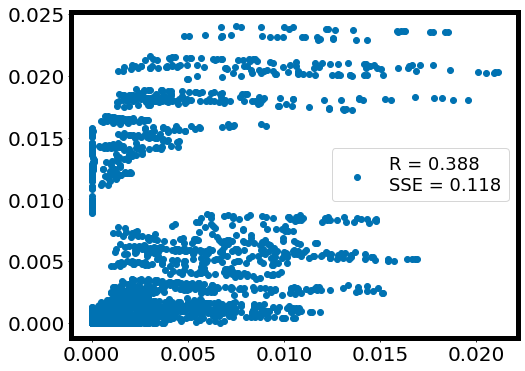

Running trial 8, cycle 4
Epoch: 0, Loss: 363.11858, Residuals: -0.21251, Convergence:   inf
Epoch: 10, Loss: 308.86938, Residuals: -0.19574, Convergence: 0.016349
Epoch: 20, Loss: 262.56168, Residuals: -0.18031, Convergence: 0.016411
Epoch: 30, Loss: 223.07585, Residuals: -0.16592, Convergence: 0.016427
Epoch: 40, Loss: 189.63612, Residuals: -0.15243, Convergence: 0.016274
Epoch: 50, Loss: 161.67339, Residuals: -0.13992, Convergence: 0.015910
Epoch: 60, Loss: 138.41010, Residuals: -0.12851, Convergence: 0.015333
Epoch: 70, Loss: 119.04482, Residuals: -0.11819, Convergence: 0.014828
Epoch: 80, Loss: 103.01863, Residuals: -0.10853, Convergence: 0.014375
Epoch: 90, Loss: 89.67731, Residuals: -0.09969, Convergence: 0.013486
Epoch: 100, Loss: 78.52721, Residuals: -0.09176, Convergence: 0.013355
Epoch: 110, Loss: 69.01740, Residuals: -0.08477, Convergence: 0.012970
Epoch: 120, Loss: 60.97197, Residuals: -0.07836, Convergence: 0.012006
Epoch: 130, Loss: 54.24906, Residuals: -0.07235, Converge


Epoch: 968, Evidence: 1220.66077, Convergence: 0.001245
Epoch: 970, Loss: 244.72272, Residuals: -0.00970, Convergence: 0.001149
Epoch: 980, Loss: 241.11212, Residuals: -0.00978, Convergence: 0.001584

Epoch: 981, Evidence: 1220.59570, Convergence: -0.000053
Epoch: 990, Loss: 238.52266, Residuals: -0.01139, Convergence: 0.002234

Epoch: 992, Evidence: 1211.82288, Convergence: -0.007293
Epoch: 1000, Loss: 245.64413, Residuals: -0.00982, Convergence: 0.001270

Epoch: 1005, Evidence: 1223.47534, Convergence: 0.002300
Epoch: 1010, Loss: 244.32013, Residuals: -0.00985, Convergence: 0.001762
Epoch: 1020, Loss: 240.77463, Residuals: -0.00986, Convergence: 0.001244

Epoch: 1021, Evidence: 1215.39038, Convergence: -0.006652


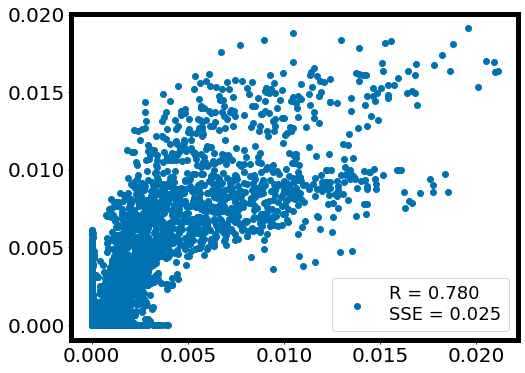

Running trial 8, cycle 5
Epoch: 0, Loss: 461.93987, Residuals: -0.16045, Convergence:   inf
Epoch: 10, Loss: 392.98868, Residuals: -0.14779, Convergence: 0.016296
Epoch: 20, Loss: 334.33411, Residuals: -0.13584, Convergence: 0.016316
Epoch: 30, Loss: 284.49594, Residuals: -0.12463, Convergence: 0.016171
Epoch: 40, Loss: 242.70987, Residuals: -0.11460, Convergence: 0.015895
Epoch: 50, Loss: 208.06964, Residuals: -0.10497, Convergence: 0.015225
Epoch: 60, Loss: 179.43663, Residuals: -0.09618, Convergence: 0.014726
Epoch: 70, Loss: 155.70793, Residuals: -0.08845, Convergence: 0.014061
Epoch: 80, Loss: 136.05893, Residuals: -0.08156, Convergence: 0.012938
Epoch: 90, Loss: 119.41051, Residuals: -0.07561, Convergence: 0.012802
Epoch: 100, Loss: 105.41891, Residuals: -0.07030, Convergence: 0.012321
Epoch: 110, Loss: 93.46940, Residuals: -0.06536, Convergence: 0.011903
Epoch: 120, Loss: 83.09277, Residuals: -0.06059, Convergence: 0.011840
Epoch: 130, Loss: 74.07007, Residuals: -0.05585, Conver


Epoch: 963, Evidence: 1641.21436, Convergence: -0.001473

Epoch: 968, Evidence: 1644.06250, Convergence: 0.000262
Epoch: 970, Loss: 329.17307, Residuals: -0.01364, Convergence: 0.000611

Epoch: 970, Evidence: 1640.72339, Convergence: -0.001773
Epoch: 970, Loss: 332.37082, Residuals: -0.01262, Convergence:   inf

Epoch: 975, Evidence: 1643.78796, Convergence: 0.000095

Epoch: 976, Evidence: 1644.03577, Convergence: 0.000245


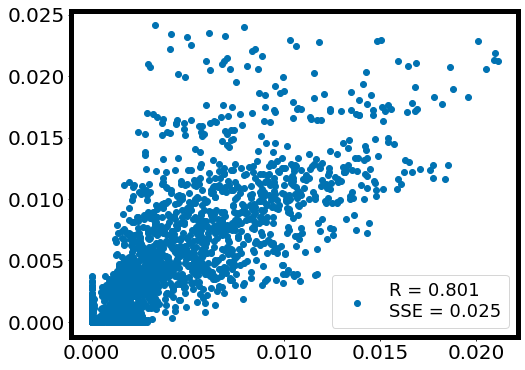

Epoch: 0, Loss: 575.00987, Residuals: -0.15495, Convergence:   inf
Epoch: 10, Loss: 488.52750, Residuals: -0.14204, Convergence: 0.016430
Epoch: 20, Loss: 414.95325, Residuals: -0.12975, Convergence: 0.016487
Epoch: 30, Loss: 352.69812, Residuals: -0.11861, Convergence: 0.016266
Epoch: 40, Loss: 300.78323, Residuals: -0.10863, Convergence: 0.015843
Epoch: 50, Loss: 257.83832, Residuals: -0.09937, Convergence: 0.015216
Epoch: 60, Loss: 222.38188, Residuals: -0.09070, Convergence: 0.014575
Epoch: 70, Loss: 193.13834, Residuals: -0.08281, Convergence: 0.013846
Epoch: 80, Loss: 168.80902, Residuals: -0.07586, Convergence: 0.013484
Epoch: 90, Loss: 148.47705, Residuals: -0.06956, Convergence: 0.012762
Epoch: 100, Loss: 131.58788, Residuals: -0.06384, Convergence: 0.012021
Epoch: 110, Loss: 117.30832, Residuals: -0.05869, Convergence: 0.011504
Epoch: 120, Loss: 104.82102, Residuals: -0.05423, Convergence: 0.011162
Epoch: 130, Loss: 94.05116, Residuals: -0.05001, Convergence: 0.010833
Epoch: 

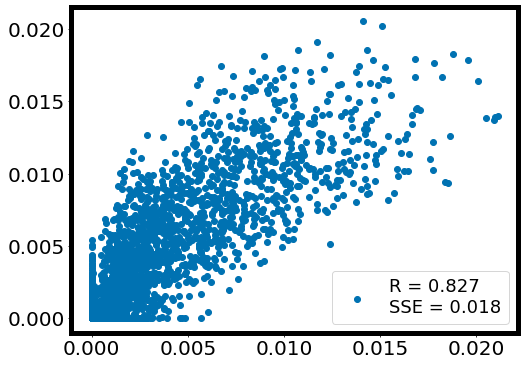

Running trial 9, cycle 1
Epoch: 0, Loss: 91.35610, Residuals: -0.70278, Convergence:   inf
Epoch: 10, Loss: 78.65704, Residuals: -0.65113, Convergence: 0.015232
Epoch: 20, Loss: 67.60863, Residuals: -0.60363, Convergence: 0.015231
Epoch: 30, Loss: 58.14410, Residuals: -0.55986, Convergence: 0.015172
Epoch: 40, Loss: 50.01513, Residuals: -0.51972, Convergence: 0.015196
Epoch: 50, Loss: 42.97615, Residuals: -0.48301, Convergence: 0.015379
Epoch: 60, Loss: 36.86125, Residuals: -0.44908, Convergence: 0.015540
Epoch: 70, Loss: 31.64364, Residuals: -0.41626, Convergence: 0.015564
Epoch: 80, Loss: 27.25436, Residuals: -0.38557, Convergence: 0.015280
Epoch: 90, Loss: 23.53598, Residuals: -0.35797, Convergence: 0.015014
Epoch: 100, Loss: 20.42834, Residuals: -0.33263, Convergence: 0.014491
Epoch: 110, Loss: 17.83297, Residuals: -0.30950, Convergence: 0.013920
Epoch: 120, Loss: 15.67109, Residuals: -0.28829, Convergence: 0.012694
Epoch: 130, Loss: 13.86928, Residuals: -0.26898, Convergence: 0.01

Epoch: 780, Loss: 48.87382, Residuals: -0.01177, Convergence: 0.001168
Epoch: 790, Loss: 48.14339, Residuals: -0.01106, Convergence: 0.001213
Epoch: 800, Loss: 47.47570, Residuals: -0.01039, Convergence: 0.001300
Epoch: 810, Loss: 46.87209, Residuals: -0.00974, Convergence: 0.000987

Epoch: 810, Evidence: 216.20189, Convergence: 0.005164
Epoch: 810, Loss: 48.20298, Residuals: -0.00974, Convergence:   inf
Epoch: 820, Loss: 47.44773, Residuals: -0.00922, Convergence: 0.001412
Epoch: 830, Loss: 46.77580, Residuals: -0.00872, Convergence: 0.001501

Epoch: 835, Evidence: 218.68393, Convergence: 0.011350
Epoch: 840, Loss: 47.58398, Residuals: -0.00820, Convergence: 0.001811
Epoch: 850, Loss: 46.87289, Residuals: -0.00775, Convergence: 0.001299

Epoch: 852, Evidence: 221.54085, Convergence: 0.012896
Epoch: 860, Loss: 47.79232, Residuals: -0.00734, Convergence: 0.000807

Epoch: 860, Evidence: 222.54056, Convergence: 0.004492
Epoch: 860, Loss: 49.40126, Residuals: -0.00734, Convergence:   inf
E

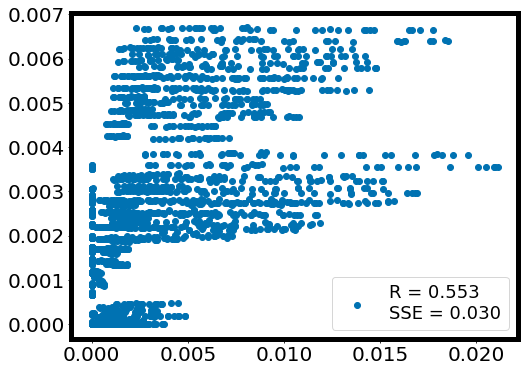

Running trial 9, cycle 2
Epoch: 0, Loss: 200.67441, Residuals: -0.06833, Convergence:   inf
Epoch: 10, Loss: 171.08434, Residuals: -0.06866, Convergence: 0.016535
Epoch: 20, Loss: 144.93498, Residuals: -0.06872, Convergence: 0.016794
Epoch: 30, Loss: 122.71281, Residuals: -0.06822, Convergence: 0.016738
Epoch: 40, Loss: 103.99905, Residuals: -0.06736, Convergence: 0.016633
Epoch: 50, Loss: 88.25560, Residuals: -0.06596, Convergence: 0.016469
Epoch: 60, Loss: 75.09778, Residuals: -0.06414, Convergence: 0.016029
Epoch: 70, Loss: 64.10207, Residuals: -0.06193, Convergence: 0.015988
Epoch: 80, Loss: 54.92741, Residuals: -0.05949, Convergence: 0.015290
Epoch: 90, Loss: 47.08209, Residuals: -0.05734, Convergence: 0.015456
Epoch: 100, Loss: 40.49183, Residuals: -0.05539, Convergence: 0.014913
Epoch: 110, Loss: 35.06215, Residuals: -0.05328, Convergence: 0.013992
Epoch: 120, Loss: 30.47231, Residuals: -0.05132, Convergence: 0.014152
Epoch: 130, Loss: 26.59309, Residuals: -0.04972, Convergence:

Epoch: 1000, Loss: 76.70497, Residuals: -0.01297, Convergence: 0.001059
Epoch: 1010, Loss: 75.82933, Residuals: -0.01285, Convergence: 0.000986

Epoch: 1010, Evidence: 510.07349, Convergence: 0.036453
Epoch: 1010, Loss: 81.97480, Residuals: -0.01285, Convergence:   inf
Epoch: 1020, Loss: 80.46799, Residuals: -0.01329, Convergence: 0.001649
Epoch: 1030, Loss: 79.11245, Residuals: -0.01362, Convergence: 0.001684
Epoch: 1040, Loss: 77.91214, Residuals: -0.01386, Convergence: 0.001426
Epoch: 1050, Loss: 76.79512, Residuals: -0.01397, Convergence: 0.001293

Epoch: 1052, Evidence: 513.18555, Convergence: 0.006064
Epoch: 1060, Loss: 81.53237, Residuals: -0.01438, Convergence: 0.002005
Epoch: 1070, Loss: 80.12580, Residuals: -0.01476, Convergence: 0.001813
Epoch: 1080, Loss: 78.86926, Residuals: -0.01501, Convergence: 0.001466
Epoch: 1090, Loss: 77.72414, Residuals: -0.01515, Convergence: 0.001406
Epoch: 1100, Loss: 76.67072, Residuals: -0.01525, Convergence: 0.001339
Epoch: 1110, Loss: 75.742

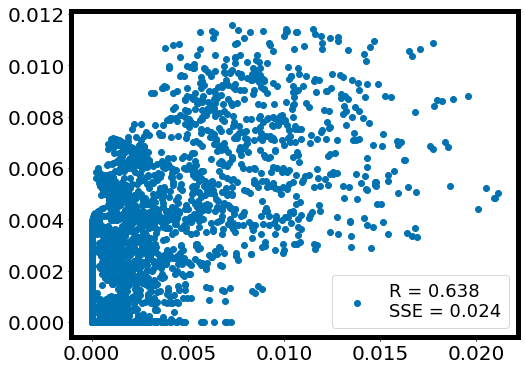

Running trial 9, cycle 3
Epoch: 0, Loss: 198.82829, Residuals: 0.05929, Convergence:   inf
Epoch: 10, Loss: 173.09630, Residuals: 0.04901, Convergence: 0.014013
Epoch: 20, Loss: 150.53545, Residuals: 0.03991, Convergence: 0.014102
Epoch: 30, Loss: 130.85284, Residuals: 0.03216, Convergence: 0.014094
Epoch: 40, Loss: 113.91918, Residuals: 0.02588, Convergence: 0.013832
Epoch: 50, Loss: 99.54436, Residuals: 0.02083, Convergence: 0.013390
Epoch: 60, Loss: 87.29659, Residuals: 0.01671, Convergence: 0.013100
Epoch: 70, Loss: 76.97872, Residuals: 0.01354, Convergence: 0.011818
Epoch: 80, Loss: 68.16308, Residuals: 0.01087, Convergence: 0.012024
Epoch: 90, Loss: 60.47607, Residuals: 0.00875, Convergence: 0.011945
Epoch: 100, Loss: 53.71221, Residuals: 0.00706, Convergence: 0.011847
Epoch: 110, Loss: 47.85780, Residuals: 0.00561, Convergence: 0.011353
Epoch: 120, Loss: 42.79969, Residuals: 0.00437, Convergence: 0.011212
Epoch: 130, Loss: 38.34317, Residuals: 0.00308, Convergence: 0.011015
Epoc

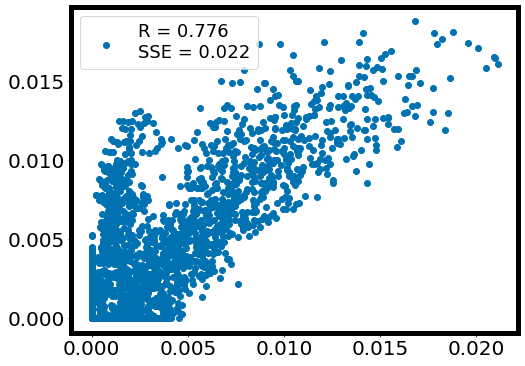

Running trial 9, cycle 4
Epoch: 0, Loss: 269.48396, Residuals: 0.01616, Convergence:   inf
Epoch: 10, Loss: 234.53180, Residuals: 0.01136, Convergence: 0.014112
Epoch: 20, Loss: 203.76868, Residuals: 0.00722, Convergence: 0.014188
Epoch: 30, Loss: 177.09447, Residuals: 0.00388, Convergence: 0.014032
Epoch: 40, Loss: 154.48325, Residuals: 0.00146, Convergence: 0.013531
Epoch: 50, Loss: 135.36391, Residuals: -0.00039, Convergence: 0.013160
Epoch: 60, Loss: 118.93851, Residuals: -0.00174, Convergence: 0.012939
Epoch: 70, Loss: 104.81650, Residuals: -0.00265, Convergence: 0.012524
Epoch: 80, Loss: 92.96651, Residuals: -0.00304, Convergence: 0.011583
Epoch: 90, Loss: 82.76430, Residuals: -0.00332, Convergence: 0.011425
Epoch: 100, Loss: 74.09106, Residuals: -0.00355, Convergence: 0.010939
Epoch: 110, Loss: 66.69121, Residuals: -0.00361, Convergence: 0.010521
Epoch: 120, Loss: 60.28194, Residuals: -0.00365, Convergence: 0.009978
Epoch: 130, Loss: 54.57474, Residuals: -0.00397, Convergence: 0

Epoch: 960, Loss: 257.44370, Residuals: -0.01989, Convergence: 0.001538
Epoch: 970, Loss: 253.63321, Residuals: -0.02070, Convergence: 0.001625

Epoch: 978, Evidence: 1145.54333, Convergence: -0.007702


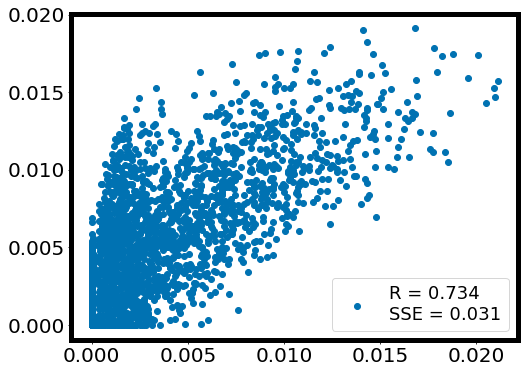

Running trial 9, cycle 5
Epoch: 0, Loss: 373.45326, Residuals: 0.16419, Convergence:   inf
Epoch: 10, Loss: 323.36594, Residuals: 0.14580, Convergence: 0.014573
Epoch: 20, Loss: 279.57993, Residuals: 0.12934, Convergence: 0.014686
Epoch: 30, Loss: 241.99872, Residuals: 0.11454, Convergence: 0.014379
Epoch: 40, Loss: 210.37698, Residuals: 0.10133, Convergence: 0.013871
Epoch: 50, Loss: 184.09425, Residuals: 0.09048, Convergence: 0.013045
Epoch: 60, Loss: 161.98369, Residuals: 0.08169, Convergence: 0.012367
Epoch: 70, Loss: 143.36295, Residuals: 0.07405, Convergence: 0.012156
Epoch: 80, Loss: 127.41238, Residuals: 0.06719, Convergence: 0.011973
Epoch: 90, Loss: 113.55990, Residuals: 0.06055, Convergence: 0.010817
Epoch: 100, Loss: 101.75602, Residuals: 0.05489, Convergence: 0.010824
Epoch: 110, Loss: 91.52486, Residuals: 0.04975, Convergence: 0.010288
Epoch: 120, Loss: 82.60593, Residuals: 0.04517, Convergence: 0.010192
Epoch: 130, Loss: 74.87167, Residuals: 0.04151, Convergence: 0.00973

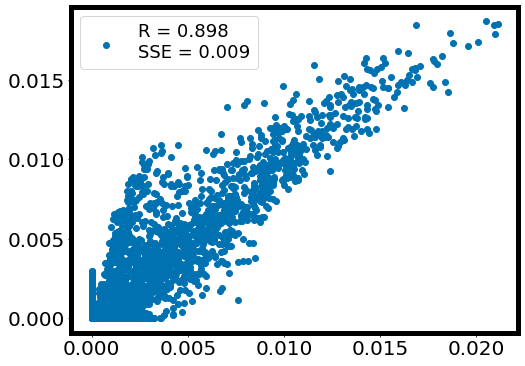

Epoch: 0, Loss: 464.61882, Residuals: 0.15454, Convergence:   inf
Epoch: 10, Loss: 401.03983, Residuals: 0.13748, Convergence: 0.014915
Epoch: 20, Loss: 345.68735, Residuals: 0.12214, Convergence: 0.014940
Epoch: 30, Loss: 298.46265, Residuals: 0.10823, Convergence: 0.014661
Epoch: 40, Loss: 259.12357, Residuals: 0.09635, Convergence: 0.013921
Epoch: 50, Loss: 226.60812, Residuals: 0.08679, Convergence: 0.013308
Epoch: 60, Loss: 199.39185, Residuals: 0.07850, Convergence: 0.012628
Epoch: 70, Loss: 176.44753, Residuals: 0.07105, Convergence: 0.012361
Epoch: 80, Loss: 156.58345, Residuals: 0.06395, Convergence: 0.011952
Epoch: 90, Loss: 139.53146, Residuals: 0.05758, Convergence: 0.011425
Epoch: 100, Loss: 124.65549, Residuals: 0.05199, Convergence: 0.011009
Epoch: 110, Loss: 112.09322, Residuals: 0.04719, Convergence: 0.010538
Epoch: 120, Loss: 101.10198, Residuals: 0.04275, Convergence: 0.010408
Epoch: 130, Loss: 91.54704, Residuals: 0.03874, Convergence: 0.009809
Epoch: 140, Loss: 83.


Epoch: 972, Evidence: 1883.77185, Convergence: 0.002840
Epoch: 980, Loss: 390.69342, Residuals: -0.00380, Convergence: 0.001559

Epoch: 984, Evidence: 1882.14026, Convergence: -0.000867
Epoch: 990, Loss: 384.96222, Residuals: -0.00550, Convergence: 0.002996
Epoch: 1000, Loss: 376.19159, Residuals: -0.00496, Convergence: 0.003151

Epoch: 1009, Evidence: 1875.89087, Convergence: -0.004201
Epoch: 1010, Loss: 400.18887, Residuals: -0.00342, Convergence: 0.002259
Epoch: 1020, Loss: 392.85687, Residuals: -0.00405, Convergence: 0.001107
Epoch: 1030, Loss: 387.51682, Residuals: -0.00379, Convergence: 0.001223

Epoch: 1034, Evidence: 1885.53101, Convergence: 0.000933
Epoch: 1040, Loss: 380.28113, Residuals: -0.00541, Convergence: 0.001232
Epoch: 1050, Loss: 370.67206, Residuals: -0.00493, Convergence: 0.001771
Epoch: 1060, Loss: 363.86282, Residuals: -0.00267, Convergence: 0.002105

Epoch: 1063, Evidence: 1876.69446, Convergence: -0.003771


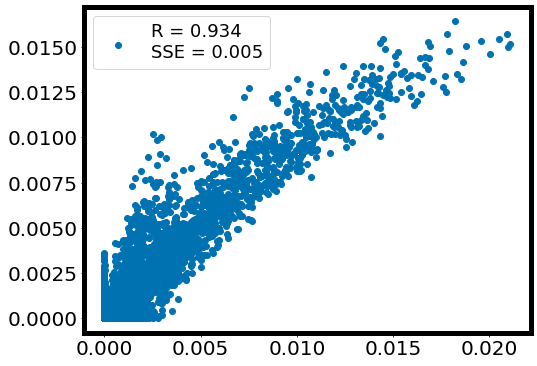

Running trial 10, cycle 1
Epoch: 0, Loss: 128.01547, Residuals: -0.38143, Convergence:   inf
Epoch: 10, Loss: 107.87662, Residuals: -0.36129, Convergence: 0.017214
Epoch: 20, Loss: 90.98529, Residuals: -0.34253, Convergence: 0.017140
Epoch: 30, Loss: 76.82539, Residuals: -0.32446, Convergence: 0.016978
Epoch: 40, Loss: 64.98627, Residuals: -0.30761, Convergence: 0.016796
Epoch: 50, Loss: 55.06518, Residuals: -0.29243, Convergence: 0.016623
Epoch: 60, Loss: 46.74895, Residuals: -0.27897, Convergence: 0.016398
Epoch: 70, Loss: 39.75639, Residuals: -0.26701, Convergence: 0.016186
Epoch: 80, Loss: 33.92777, Residuals: -0.25620, Convergence: 0.015813
Epoch: 90, Loss: 29.06980, Residuals: -0.24637, Convergence: 0.015393
Epoch: 100, Loss: 25.02254, Residuals: -0.23735, Convergence: 0.014886
Epoch: 110, Loss: 21.68965, Residuals: -0.22882, Convergence: 0.014554
Epoch: 120, Loss: 18.90504, Residuals: -0.22039, Convergence: 0.012777
Epoch: 130, Loss: 16.57820, Residuals: -0.21216, Convergence: 0


Epoch: 837, Evidence: 249.97409, Convergence: -0.001496


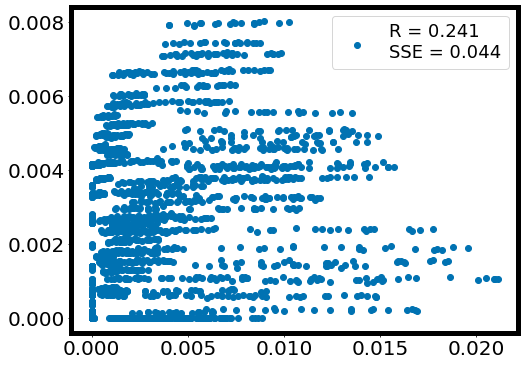

Running trial 10, cycle 2
Epoch: 0, Loss: 217.07143, Residuals: 0.21646, Convergence:   inf
Epoch: 10, Loss: 183.36273, Residuals: 0.19134, Convergence: 0.017033
Epoch: 20, Loss: 154.98203, Residuals: 0.16876, Convergence: 0.016881
Epoch: 30, Loss: 131.22305, Residuals: 0.14887, Convergence: 0.016706
Epoch: 40, Loss: 111.25103, Residuals: 0.13129, Convergence: 0.016620
Epoch: 50, Loss: 94.33686, Residuals: 0.11552, Convergence: 0.016688
Epoch: 60, Loss: 80.01262, Residuals: 0.10110, Convergence: 0.016624
Epoch: 70, Loss: 68.06205, Residuals: 0.08818, Convergence: 0.015932
Epoch: 80, Loss: 58.18705, Residuals: 0.07644, Convergence: 0.015791
Epoch: 90, Loss: 49.94724, Residuals: 0.06575, Convergence: 0.015540
Epoch: 100, Loss: 43.06850, Residuals: 0.05603, Convergence: 0.014734
Epoch: 110, Loss: 37.34885, Residuals: 0.04730, Convergence: 0.014136
Epoch: 120, Loss: 32.58346, Residuals: 0.03946, Convergence: 0.013697
Epoch: 130, Loss: 28.61567, Residuals: 0.03295, Convergence: 0.012858
Epo

Epoch: 980, Loss: 74.05074, Residuals: -0.00199, Convergence: 0.001505
Epoch: 990, Loss: 73.05807, Residuals: -0.00202, Convergence: 0.001383
Epoch: 1000, Loss: 72.16012, Residuals: -0.00200, Convergence: 0.001243

Epoch: 1004, Evidence: 502.81189, Convergence: 0.027976
Epoch: 1010, Loss: 77.56511, Residuals: -0.00225, Convergence: 0.002064
Epoch: 1020, Loss: 76.08656, Residuals: -0.00266, Convergence: 0.001822
Epoch: 1030, Loss: 74.75645, Residuals: -0.00294, Convergence: 0.001593
Epoch: 1040, Loss: 73.55650, Residuals: -0.00312, Convergence: 0.001512
Epoch: 1050, Loss: 72.44992, Residuals: -0.00326, Convergence: 0.001517
Epoch: 1060, Loss: 71.46809, Residuals: -0.00329, Convergence: 0.001332
Epoch: 1070, Loss: 70.56787, Residuals: -0.00330, Convergence: 0.001164

Epoch: 1077, Evidence: 502.59668, Convergence: -0.000428
Epoch: 1080, Loss: 72.88791, Residuals: -0.00409, Convergence: 0.003713
Epoch: 1090, Loss: 70.48370, Residuals: -0.00614, Convergence: 0.003153
Epoch: 1100, Loss: 68.5

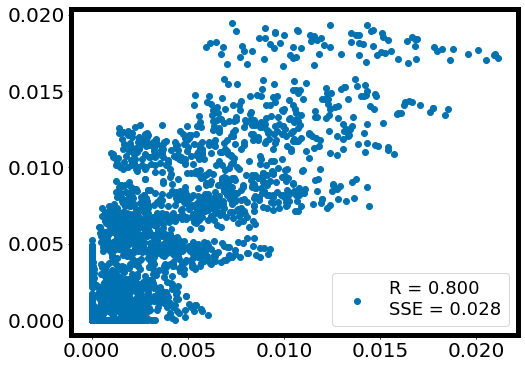

Running trial 10, cycle 3
Epoch: 0, Loss: 348.56380, Residuals: 0.25481, Convergence:   inf
Epoch: 10, Loss: 294.95804, Residuals: 0.22811, Convergence: 0.016750
Epoch: 20, Loss: 250.18083, Residuals: 0.20427, Convergence: 0.016472
Epoch: 30, Loss: 212.80894, Residuals: 0.18301, Convergence: 0.016181
Epoch: 40, Loss: 181.52357, Residuals: 0.16397, Convergence: 0.015929
Epoch: 50, Loss: 155.41901, Residuals: 0.14680, Convergence: 0.015479
Epoch: 60, Loss: 133.52437, Residuals: 0.13109, Convergence: 0.015494
Epoch: 70, Loss: 114.67841, Residuals: 0.11674, Convergence: 0.015100
Epoch: 80, Loss: 99.19559, Residuals: 0.10400, Convergence: 0.014561
Epoch: 90, Loss: 86.37179, Residuals: 0.09261, Convergence: 0.013962
Epoch: 100, Loss: 75.69794, Residuals: 0.08241, Convergence: 0.012779
Epoch: 110, Loss: 66.64880, Residuals: 0.07317, Convergence: 0.013093
Epoch: 120, Loss: 59.07892, Residuals: 0.06530, Convergence: 0.011145
Epoch: 130, Loss: 52.56867, Residuals: 0.05802, Convergence: 0.011362



Epoch: 875, Evidence: 857.95142, Convergence: -0.001910
Epoch: 880, Loss: 183.33690, Residuals: 0.00200, Convergence: 0.002312
Epoch: 890, Loss: 179.61853, Residuals: 0.00151, Convergence: 0.002015
Epoch: 900, Loss: 176.38672, Residuals: 0.00119, Convergence: 0.001722

Epoch: 907, Evidence: 866.30115, Convergence: 0.007747
Epoch: 910, Loss: 179.15466, Residuals: 0.00098, Convergence: 0.002076
Epoch: 920, Loss: 175.71994, Residuals: 0.00047, Convergence: 0.001893
Epoch: 930, Loss: 172.76353, Residuals: 0.00015, Convergence: 0.001662
Epoch: 940, Loss: 170.09758, Residuals: -0.00006, Convergence: 0.001471

Epoch: 948, Evidence: 864.98376, Convergence: -0.001523
Epoch: 950, Loss: 181.62158, Residuals: 0.00113, Convergence: 0.001088
Epoch: 960, Loss: 179.68579, Residuals: 0.00097, Convergence: 0.001061

Epoch: 964, Evidence: 869.18127, Convergence: 0.003314

Epoch: 966, Evidence: 870.42017, Convergence: 0.001423

Epoch: 969, Evidence: 872.51221, Convergence: 0.002398
Epoch: 970, Loss: 186.

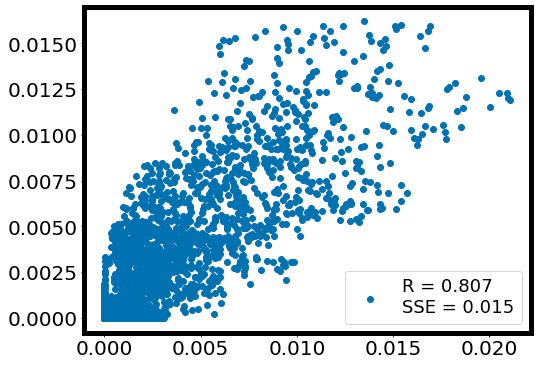

Running trial 10, cycle 4
Epoch: 0, Loss: 471.14793, Residuals: 0.31292, Convergence:   inf
Epoch: 10, Loss: 398.56845, Residuals: 0.28124, Convergence: 0.016745
Epoch: 20, Loss: 338.10617, Residuals: 0.25271, Convergence: 0.016458
Epoch: 30, Loss: 287.59802, Residuals: 0.22707, Convergence: 0.016171
Epoch: 40, Loss: 245.23352, Residuals: 0.20395, Convergence: 0.015938
Epoch: 50, Loss: 209.54684, Residuals: 0.18306, Convergence: 0.015704
Epoch: 60, Loss: 179.76099, Residuals: 0.16403, Convergence: 0.015337
Epoch: 70, Loss: 154.99379, Residuals: 0.14688, Convergence: 0.014835
Epoch: 80, Loss: 134.41498, Residuals: 0.13160, Convergence: 0.014122
Epoch: 90, Loss: 116.95188, Residuals: 0.11784, Convergence: 0.014085
Epoch: 100, Loss: 101.85429, Residuals: 0.10553, Convergence: 0.013821
Epoch: 110, Loss: 89.08581, Residuals: 0.09435, Convergence: 0.013231
Epoch: 120, Loss: 78.15456, Residuals: 0.08437, Convergence: 0.013041
Epoch: 130, Loss: 68.93784, Residuals: 0.07559, Convergence: 0.0123

Epoch: 1010, Loss: 220.27538, Residuals: -0.00830, Convergence: 0.001545
Epoch: 1020, Loss: 216.41603, Residuals: -0.00824, Convergence: 0.001694

Epoch: 1022, Evidence: 1272.96863, Convergence: -0.008516
Epoch: 1030, Loss: 231.67169, Residuals: -0.00615, Convergence: 0.001639
Epoch: 1040, Loss: 227.94724, Residuals: -0.00648, Convergence: 0.001444
Epoch: 1050, Loss: 225.02124, Residuals: -0.00656, Convergence: 0.001290

Epoch: 1053, Evidence: 1293.57715, Convergence: 0.007551
Epoch: 1060, Loss: 228.94113, Residuals: -0.00683, Convergence: 0.001795
Epoch: 1070, Loss: 225.79605, Residuals: -0.00704, Convergence: 0.001091

Epoch: 1079, Evidence: 1286.65076, Convergence: -0.005383
Epoch: 1080, Loss: 233.63025, Residuals: -0.00653, Convergence: 0.001349

Epoch: 1083, Evidence: 1301.91321, Convergence: 0.006403

Epoch: 1085, Evidence: 1303.14392, Convergence: 0.000944
Epoch: 1090, Loss: 235.98201, Residuals: -0.00681, Convergence: 0.001576
Epoch: 1100, Loss: 232.24974, Residuals: -0.00713, 

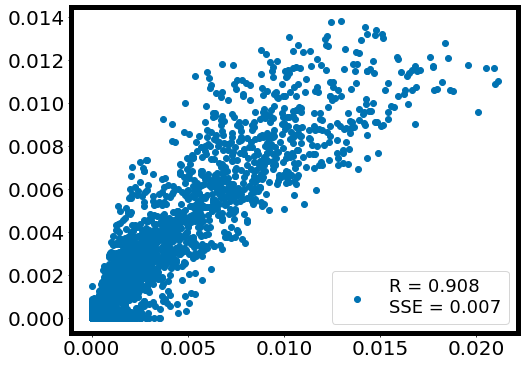

Running trial 10, cycle 5
Epoch: 0, Loss: 512.27428, Residuals: 0.34104, Convergence:   inf
Epoch: 10, Loss: 436.57846, Residuals: 0.30685, Convergence: 0.016062
Epoch: 20, Loss: 372.47641, Residuals: 0.27627, Convergence: 0.015964
Epoch: 30, Loss: 318.24368, Residuals: 0.24888, Convergence: 0.015707
Epoch: 40, Loss: 272.95435, Residuals: 0.22421, Convergence: 0.015284
Epoch: 50, Loss: 235.09309, Residuals: 0.20167, Convergence: 0.014865
Epoch: 60, Loss: 203.72618, Residuals: 0.18170, Convergence: 0.014006
Epoch: 70, Loss: 177.40974, Residuals: 0.16354, Convergence: 0.013497
Epoch: 80, Loss: 155.43747, Residuals: 0.14696, Convergence: 0.012970
Epoch: 90, Loss: 136.99072, Residuals: 0.13185, Convergence: 0.012478
Epoch: 100, Loss: 121.45712, Residuals: 0.11820, Convergence: 0.011849
Epoch: 110, Loss: 108.35073, Residuals: 0.10592, Convergence: 0.011174
Epoch: 120, Loss: 96.96049, Residuals: 0.09473, Convergence: 0.011020
Epoch: 130, Loss: 87.18765, Residuals: 0.08479, Convergence: 0.010

Epoch: 950, Loss: 308.51163, Residuals: -0.01478, Convergence: 0.001957
Epoch: 960, Loss: 304.03577, Residuals: -0.01469, Convergence: 0.001493

Epoch: 968, Evidence: 1584.37366, Convergence: -0.007395


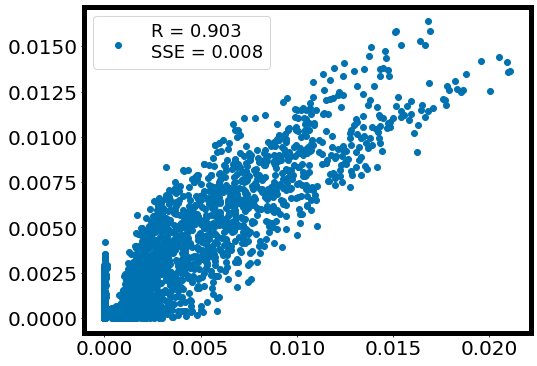

Epoch: 0, Loss: 577.40782, Residuals: 0.36623, Convergence:   inf
Epoch: 10, Loss: 492.83328, Residuals: 0.33019, Convergence: 0.015968
Epoch: 20, Loss: 420.73795, Residuals: 0.29795, Convergence: 0.015906
Epoch: 30, Loss: 359.73615, Residuals: 0.26896, Convergence: 0.015557
Epoch: 40, Loss: 308.56870, Residuals: 0.24251, Convergence: 0.015421
Epoch: 50, Loss: 265.82996, Residuals: 0.21858, Convergence: 0.014834
Epoch: 60, Loss: 230.75951, Residuals: 0.19713, Convergence: 0.014035
Epoch: 70, Loss: 201.51494, Residuals: 0.17765, Convergence: 0.013401
Epoch: 80, Loss: 177.12477, Residuals: 0.15983, Convergence: 0.012585
Epoch: 90, Loss: 156.67511, Residuals: 0.14412, Convergence: 0.012135
Epoch: 100, Loss: 139.46060, Residuals: 0.12992, Convergence: 0.010973
Epoch: 110, Loss: 124.63168, Residuals: 0.11705, Convergence: 0.011355
Epoch: 120, Loss: 111.68602, Residuals: 0.10522, Convergence: 0.011043
Epoch: 130, Loss: 100.34032, Residuals: 0.09449, Convergence: 0.010732
Epoch: 140, Loss: 90


Epoch: 950, Evidence: 1992.61731, Convergence: 0.001013
Epoch: 950, Loss: 398.48587, Residuals: -0.00943, Convergence:   inf

Epoch: 955, Evidence: 1995.02808, Convergence: 0.001208
Epoch: 960, Loss: 396.94666, Residuals: -0.00970, Convergence: 0.001361

Epoch: 964, Evidence: 1995.30396, Convergence: 0.000138
Epoch: 970, Loss: 392.08282, Residuals: -0.01128, Convergence: 0.002444

Epoch: 972, Evidence: 1993.16138, Convergence: -0.000937

Epoch: 977, Evidence: 1986.46790, Convergence: -0.004309
Epoch: 980, Loss: 401.12640, Residuals: -0.01082, Convergence: 0.002564
Epoch: 990, Loss: 392.85861, Residuals: -0.01204, Convergence: 0.001785

Epoch: 995, Evidence: 1993.92542, Convergence: -0.000553


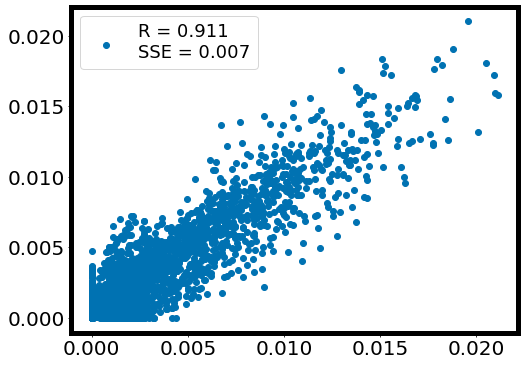

Running trial 11, cycle 1
Epoch: 0, Loss: 64.75874, Residuals: -0.40172, Convergence:   inf
Epoch: 10, Loss: 55.72920, Residuals: -0.37563, Convergence: 0.015151
Epoch: 20, Loss: 47.95163, Residuals: -0.35311, Convergence: 0.015116
Epoch: 30, Loss: 41.29254, Residuals: -0.33279, Convergence: 0.015026
Epoch: 40, Loss: 35.57778, Residuals: -0.31393, Convergence: 0.015008
Epoch: 50, Loss: 30.65109, Residuals: -0.29615, Convergence: 0.015026
Epoch: 60, Loss: 26.40777, Residuals: -0.27928, Convergence: 0.014989
Epoch: 70, Loss: 22.77103, Residuals: -0.26324, Convergence: 0.014875
Epoch: 80, Loss: 19.67662, Residuals: -0.24779, Convergence: 0.014592
Epoch: 90, Loss: 17.05750, Residuals: -0.23332, Convergence: 0.014269
Epoch: 100, Loss: 14.85956, Residuals: -0.21979, Convergence: 0.013723
Epoch: 110, Loss: 13.02053, Residuals: -0.20717, Convergence: 0.013090
Epoch: 120, Loss: 11.48309, Residuals: -0.19543, Convergence: 0.012311
Epoch: 130, Loss: 10.20116, Residuals: -0.18460, Convergence: 0.0

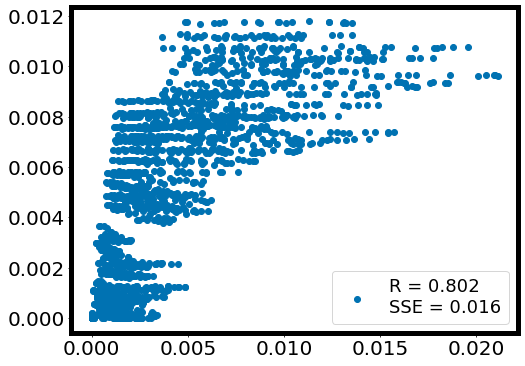

Running trial 11, cycle 2
Epoch: 0, Loss: 148.93355, Residuals: -0.20243, Convergence:   inf
Epoch: 10, Loss: 127.58407, Residuals: -0.19034, Convergence: 0.015677
Epoch: 20, Loss: 109.02225, Residuals: -0.17906, Convergence: 0.016009
Epoch: 30, Loss: 92.84216, Residuals: -0.16837, Convergence: 0.016313
Epoch: 40, Loss: 78.93565, Residuals: -0.15813, Convergence: 0.016358
Epoch: 50, Loss: 67.19654, Residuals: -0.14810, Convergence: 0.016123
Epoch: 60, Loss: 57.36117, Residuals: -0.13844, Convergence: 0.015769
Epoch: 70, Loss: 49.16058, Residuals: -0.12940, Convergence: 0.015429
Epoch: 80, Loss: 42.36139, Residuals: -0.12084, Convergence: 0.014716
Epoch: 90, Loss: 36.77027, Residuals: -0.11225, Convergence: 0.013923
Epoch: 100, Loss: 32.11267, Residuals: -0.10419, Convergence: 0.013529
Epoch: 110, Loss: 28.21742, Residuals: -0.09665, Convergence: 0.012979
Epoch: 120, Loss: 24.87413, Residuals: -0.08959, Convergence: 0.012548
Epoch: 130, Loss: 22.00750, Residuals: -0.08308, Convergence: 

Epoch: 950, Loss: 97.48428, Residuals: -0.00944, Convergence: 0.001759
Epoch: 960, Loss: 96.01074, Residuals: -0.00954, Convergence: 0.001502

Epoch: 962, Evidence: 593.32068, Convergence: 0.004444
Epoch: 970, Loss: 98.92909, Residuals: -0.00967, Convergence: 0.001376
Epoch: 980, Loss: 97.34284, Residuals: -0.00975, Convergence: 0.001880
Epoch: 990, Loss: 96.00402, Residuals: -0.00982, Convergence: 0.001588

Epoch: 992, Evidence: 592.46594, Convergence: -0.001443

Epoch: 995, Evidence: 603.20935, Convergence: 0.016393

Epoch: 996, Evidence: 604.84619, Convergence: 0.002706

Epoch: 998, Evidence: 608.19391, Convergence: 0.005504
Epoch: 1000, Loss: 111.50214, Residuals: -0.00952, Convergence: 0.001129

Epoch: 1001, Evidence: 609.01050, Convergence: 0.001341

Epoch: 1005, Evidence: 609.68774, Convergence: 0.001111

Epoch: 1009, Evidence: 610.75903, Convergence: 0.001754
Epoch: 1010, Loss: 115.57787, Residuals: -0.00951, Convergence: 0.001166

Epoch: 1012, Evidence: 613.18677, Convergence:

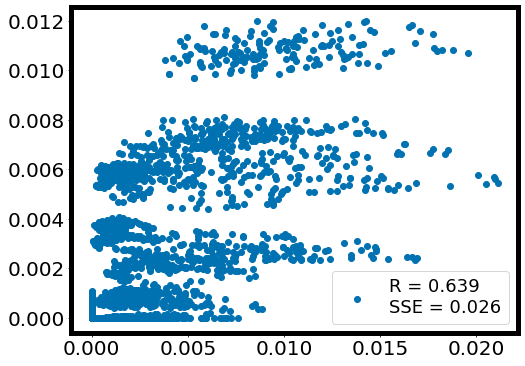

Running trial 11, cycle 3
Epoch: 0, Loss: 265.62611, Residuals: -0.06392, Convergence:   inf
Epoch: 10, Loss: 227.33286, Residuals: -0.06157, Convergence: 0.015655
Epoch: 20, Loss: 194.65791, Residuals: -0.05906, Convergence: 0.015633
Epoch: 30, Loss: 166.74236, Residuals: -0.05657, Convergence: 0.015547
Epoch: 40, Loss: 143.08653, Residuals: -0.05414, Convergence: 0.015278
Epoch: 50, Loss: 122.87340, Residuals: -0.05171, Convergence: 0.015346
Epoch: 60, Loss: 105.81557, Residuals: -0.04941, Convergence: 0.014884
Epoch: 70, Loss: 91.57701, Residuals: -0.04700, Convergence: 0.014259
Epoch: 80, Loss: 79.69325, Residuals: -0.04484, Convergence: 0.013785
Epoch: 90, Loss: 69.78891, Residuals: -0.04294, Convergence: 0.013113
Epoch: 100, Loss: 61.20632, Residuals: -0.04113, Convergence: 0.012963
Epoch: 110, Loss: 53.84469, Residuals: -0.03917, Convergence: 0.012565
Epoch: 120, Loss: 47.47903, Residuals: -0.03720, Convergence: 0.012799
Epoch: 130, Loss: 41.81310, Residuals: -0.03586, Convergen

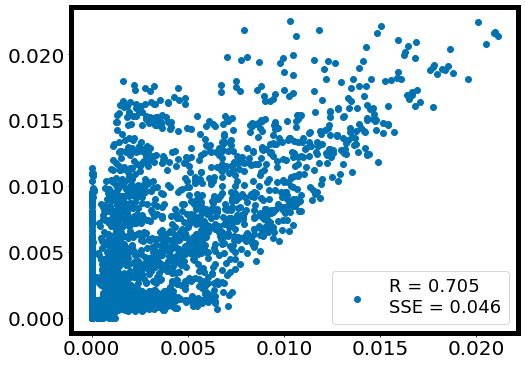

Running trial 11, cycle 4
Epoch: 0, Loss: 417.22719, Residuals: 0.02970, Convergence:   inf
Epoch: 10, Loss: 354.73358, Residuals: 0.02441, Convergence: 0.016347
Epoch: 20, Loss: 301.54562, Residuals: 0.01999, Convergence: 0.016420
Epoch: 30, Loss: 256.31369, Residuals: 0.01617, Convergence: 0.016312
Epoch: 40, Loss: 218.38199, Residuals: 0.01293, Convergence: 0.015973
Epoch: 50, Loss: 186.51157, Residuals: 0.00994, Convergence: 0.015739
Epoch: 60, Loss: 159.67386, Residuals: 0.00728, Convergence: 0.015502
Epoch: 70, Loss: 137.51781, Residuals: 0.00512, Convergence: 0.014796
Epoch: 80, Loss: 118.92650, Residuals: 0.00330, Convergence: 0.014646
Epoch: 90, Loss: 103.41941, Residuals: 0.00178, Convergence: 0.014176
Epoch: 100, Loss: 90.47127, Residuals: 0.00058, Convergence: 0.013617
Epoch: 110, Loss: 79.56556, Residuals: -0.00010, Convergence: 0.012675
Epoch: 120, Loss: 70.31748, Residuals: -0.00045, Convergence: 0.011534
Epoch: 130, Loss: 62.38648, Residuals: -0.00076, Convergence: 0.01


Epoch: 987, Evidence: 1243.79626, Convergence: 0.001140
Epoch: 990, Loss: 234.17856, Residuals: -0.00701, Convergence: 0.001412
Epoch: 1000, Loss: 231.11377, Residuals: -0.00749, Convergence: 0.001148

Epoch: 1007, Evidence: 1238.93311, Convergence: -0.003925

Epoch: 1009, Evidence: 1253.20386, Convergence: 0.007507
Epoch: 1010, Loss: 240.74707, Residuals: -0.00677, Convergence: 0.001040

Epoch: 1011, Evidence: 1254.28772, Convergence: 0.000864
Epoch: 1020, Loss: 238.39450, Residuals: -0.00744, Convergence: 0.001482
Epoch: 1030, Loss: 235.32922, Residuals: -0.00777, Convergence: 0.001149

Epoch: 1037, Evidence: 1242.93518, Convergence: -0.008262
Epoch: 1040, Loss: 242.02994, Residuals: -0.00677, Convergence: 0.000981

Epoch: 1040, Evidence: 1256.14246, Convergence: 0.002339
Epoch: 1040, Loss: 244.19504, Residuals: -0.00677, Convergence:   inf

Epoch: 1041, Evidence: 1256.38513, Convergence: 0.000193
Epoch: 1050, Loss: 240.99832, Residuals: -0.00747, Convergence: 0.001450
Epoch: 1060, 

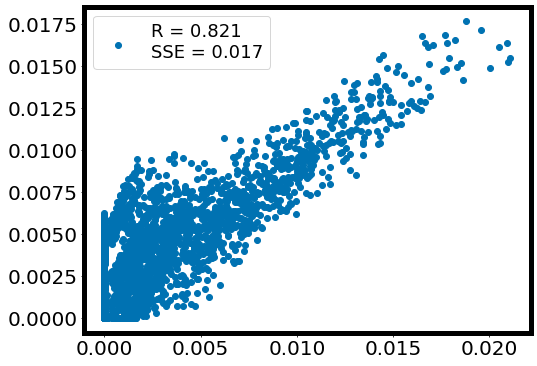

Running trial 11, cycle 5
Epoch: 0, Loss: 522.49382, Residuals: 0.08470, Convergence:   inf
Epoch: 10, Loss: 444.15219, Residuals: 0.07459, Convergence: 0.016429
Epoch: 20, Loss: 377.05368, Residuals: 0.06581, Convergence: 0.016548
Epoch: 30, Loss: 320.03357, Residuals: 0.05808, Convergence: 0.016483
Epoch: 40, Loss: 272.58047, Residuals: 0.05105, Convergence: 0.015975
Epoch: 50, Loss: 233.22472, Residuals: 0.04488, Convergence: 0.015480
Epoch: 60, Loss: 200.33276, Residuals: 0.03947, Convergence: 0.015093
Epoch: 70, Loss: 172.76871, Residuals: 0.03463, Convergence: 0.014541
Epoch: 80, Loss: 149.34309, Residuals: 0.03029, Convergence: 0.014491
Epoch: 90, Loss: 129.74715, Residuals: 0.02654, Convergence: 0.013975
Epoch: 100, Loss: 113.41853, Residuals: 0.02339, Convergence: 0.013622
Epoch: 110, Loss: 99.74500, Residuals: 0.02064, Convergence: 0.012563
Epoch: 120, Loss: 88.11208, Residuals: 0.01818, Convergence: 0.012400
Epoch: 130, Loss: 78.18091, Residuals: 0.01590, Convergence: 0.0120

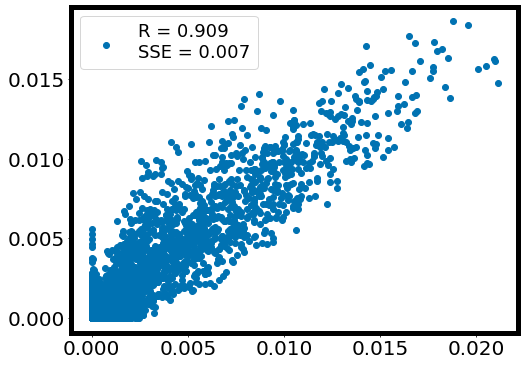

Epoch: 0, Loss: 653.07872, Residuals: 0.11871, Convergence:   inf
Epoch: 10, Loss: 553.98297, Residuals: 0.10557, Convergence: 0.016697
Epoch: 20, Loss: 469.01245, Residuals: 0.09401, Convergence: 0.016842
Epoch: 30, Loss: 396.91086, Residuals: 0.08339, Convergence: 0.016669
Epoch: 40, Loss: 337.16580, Residuals: 0.07362, Convergence: 0.016284
Epoch: 50, Loss: 287.83398, Residuals: 0.06540, Convergence: 0.015619
Epoch: 60, Loss: 247.07208, Residuals: 0.05845, Convergence: 0.015119
Epoch: 70, Loss: 213.14014, Residuals: 0.05240, Convergence: 0.014719
Epoch: 80, Loss: 184.69525, Residuals: 0.04697, Convergence: 0.014390
Epoch: 90, Loss: 160.46077, Residuals: 0.04210, Convergence: 0.014072
Epoch: 100, Loss: 140.23035, Residuals: 0.03780, Convergence: 0.013448
Epoch: 110, Loss: 122.86645, Residuals: 0.03403, Convergence: 0.013130
Epoch: 120, Loss: 108.06080, Residuals: 0.03055, Convergence: 0.012947
Epoch: 130, Loss: 95.51624, Residuals: 0.02733, Convergence: 0.012682
Epoch: 140, Loss: 84.

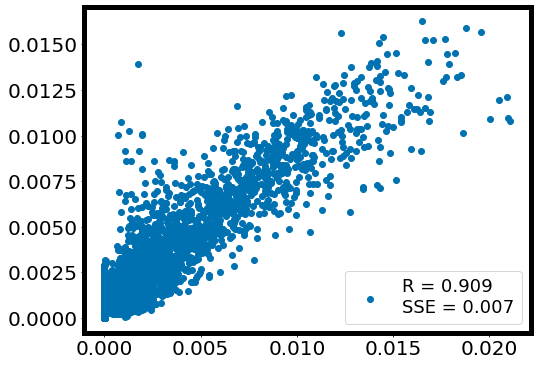

Running trial 12, cycle 1
Epoch: 0, Loss: 118.55967, Residuals: -1.49970, Convergence:   inf
Epoch: 10, Loss: 101.17002, Residuals: -1.37432, Convergence: 0.016150
Epoch: 20, Loss: 86.18693, Residuals: -1.26078, Convergence: 0.016120
Epoch: 30, Loss: 73.48855, Residuals: -1.15720, Convergence: 0.016030
Epoch: 40, Loss: 62.71165, Residuals: -1.06260, Convergence: 0.015938
Epoch: 50, Loss: 53.67179, Residuals: -0.97584, Convergence: 0.015666
Epoch: 60, Loss: 46.04599, Residuals: -0.89715, Convergence: 0.015271
Epoch: 70, Loss: 39.57830, Residuals: -0.82621, Convergence: 0.014927
Epoch: 80, Loss: 34.13210, Residuals: -0.76161, Convergence: 0.014648
Epoch: 90, Loss: 29.54883, Residuals: -0.70335, Convergence: 0.014273
Epoch: 100, Loss: 25.69722, Residuals: -0.65056, Convergence: 0.013733
Epoch: 110, Loss: 22.45947, Residuals: -0.60258, Convergence: 0.013428
Epoch: 120, Loss: 19.73311, Residuals: -0.55889, Convergence: 0.012850
Epoch: 130, Loss: 17.45090, Residuals: -0.51905, Convergence: 0


Epoch: 779, Evidence: 208.00343, Convergence: 0.015247
Epoch: 780, Loss: 53.39914, Residuals: 0.02533, Convergence: 0.002414

Epoch: 783, Evidence: 208.19035, Convergence: 0.000898
Epoch: 790, Loss: 52.73381, Residuals: 0.02387, Convergence: 0.004238
Epoch: 800, Loss: 51.39614, Residuals: 0.02312, Convergence: 0.001527

Epoch: 809, Evidence: 208.03592, Convergence: 0.000156
Epoch: 810, Loss: 50.63235, Residuals: 0.02202, Convergence: 0.006729
Epoch: 820, Loss: 47.98537, Residuals: 0.01680, Convergence: 0.006908

Epoch: 821, Evidence: 206.86278, Convergence: -0.005514


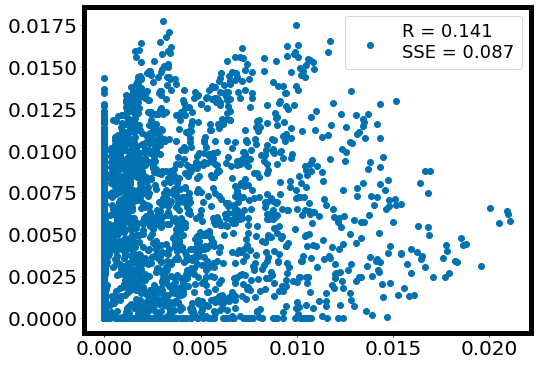

Running trial 12, cycle 2
Epoch: 0, Loss: 200.64435, Residuals: -1.10809, Convergence:   inf
Epoch: 10, Loss: 171.12459, Residuals: -1.01006, Convergence: 0.016220
Epoch: 20, Loss: 145.59894, Residuals: -0.92157, Convergence: 0.016312
Epoch: 30, Loss: 123.82772, Residuals: -0.84163, Convergence: 0.016338
Epoch: 40, Loss: 105.30819, Residuals: -0.76945, Convergence: 0.016336
Epoch: 50, Loss: 89.63513, Residuals: -0.70390, Convergence: 0.016085
Epoch: 60, Loss: 76.47914, Residuals: -0.64411, Convergence: 0.016064
Epoch: 70, Loss: 65.39857, Residuals: -0.58941, Convergence: 0.015753
Epoch: 80, Loss: 56.08442, Residuals: -0.53978, Convergence: 0.014675
Epoch: 90, Loss: 48.41739, Residuals: -0.49381, Convergence: 0.014426
Epoch: 100, Loss: 42.05178, Residuals: -0.45120, Convergence: 0.013523
Epoch: 110, Loss: 36.76574, Residuals: -0.41211, Convergence: 0.013792
Epoch: 120, Loss: 32.36544, Residuals: -0.37618, Convergence: 0.012074
Epoch: 130, Loss: 28.69408, Residuals: -0.34308, Convergence

Epoch: 880, Loss: 112.33533, Residuals: 0.00648, Convergence: 0.001817
Epoch: 890, Loss: 110.33295, Residuals: 0.00619, Convergence: 0.001934
Epoch: 900, Loss: 108.56366, Residuals: 0.00600, Convergence: 0.001825
Epoch: 910, Loss: 107.00705, Residuals: 0.00592, Convergence: 0.001524
Epoch: 920, Loss: 105.60803, Residuals: 0.00586, Convergence: 0.001301

Epoch: 928, Evidence: 508.04587, Convergence: -0.008788


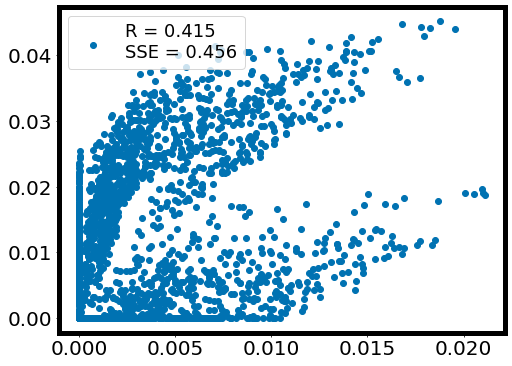

Running trial 12, cycle 3
Epoch: 0, Loss: 347.43416, Residuals: -0.68688, Convergence:   inf
Epoch: 10, Loss: 295.28326, Residuals: -0.62725, Convergence: 0.016420
Epoch: 20, Loss: 250.95847, Residuals: -0.57328, Convergence: 0.016372
Epoch: 30, Loss: 213.53847, Residuals: -0.52389, Convergence: 0.015937
Epoch: 40, Loss: 181.75117, Residuals: -0.47835, Convergence: 0.016398
Epoch: 50, Loss: 154.73494, Residuals: -0.43795, Convergence: 0.016124
Epoch: 60, Loss: 132.56912, Residuals: -0.40018, Convergence: 0.015514
Epoch: 70, Loss: 114.00214, Residuals: -0.36568, Convergence: 0.015013
Epoch: 80, Loss: 98.59818, Residuals: -0.33388, Convergence: 0.014574
Epoch: 90, Loss: 85.73174, Residuals: -0.30407, Convergence: 0.012393
Epoch: 100, Loss: 74.96980, Residuals: -0.27653, Convergence: 0.013093
Epoch: 110, Loss: 65.91933, Residuals: -0.25177, Convergence: 0.012692
Epoch: 120, Loss: 58.40985, Residuals: -0.22929, Convergence: 0.012332
Epoch: 130, Loss: 52.09169, Residuals: -0.20910, Converge


Epoch: 941, Evidence: 823.05615, Convergence: 0.011215

Epoch: 944, Evidence: 824.47266, Convergence: 0.001718
Epoch: 950, Loss: 178.33386, Residuals: -0.01808, Convergence: 0.001093

Epoch: 954, Evidence: 823.49188, Convergence: -0.001191


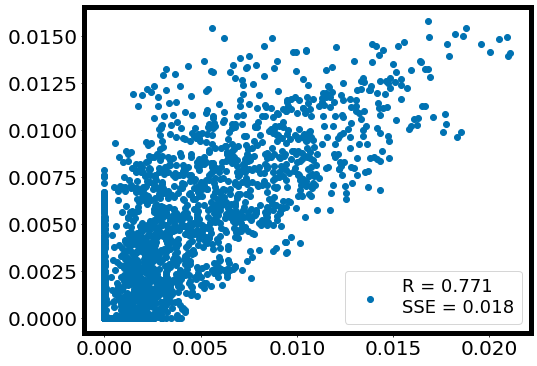

Running trial 12, cycle 4
Epoch: 0, Loss: 310.13844, Residuals: -0.54555, Convergence:   inf
Epoch: 10, Loss: 268.42169, Residuals: -0.49672, Convergence: 0.014843
Epoch: 20, Loss: 231.27361, Residuals: -0.45271, Convergence: 0.015056
Epoch: 30, Loss: 199.29898, Residuals: -0.41284, Convergence: 0.014930
Epoch: 40, Loss: 172.08156, Residuals: -0.37647, Convergence: 0.014403
Epoch: 50, Loss: 148.85310, Residuals: -0.34356, Convergence: 0.014586
Epoch: 60, Loss: 129.35196, Residuals: -0.31388, Convergence: 0.013983
Epoch: 70, Loss: 113.04463, Residuals: -0.28674, Convergence: 0.013557
Epoch: 80, Loss: 99.39207, Residuals: -0.26188, Convergence: 0.012988
Epoch: 90, Loss: 87.92203, Residuals: -0.23914, Convergence: 0.012232
Epoch: 100, Loss: 78.31807, Residuals: -0.21800, Convergence: 0.011547
Epoch: 110, Loss: 70.26064, Residuals: -0.19850, Convergence: 0.011030
Epoch: 120, Loss: 63.40567, Residuals: -0.18055, Convergence: 0.009997
Epoch: 130, Loss: 57.51855, Residuals: -0.16435, Converge


Epoch: 890, Evidence: 1188.74988, Convergence: 0.003470
Epoch: 890, Loss: 258.48572, Residuals: -0.00897, Convergence:   inf

Epoch: 891, Evidence: 1185.36902, Convergence: -0.002852


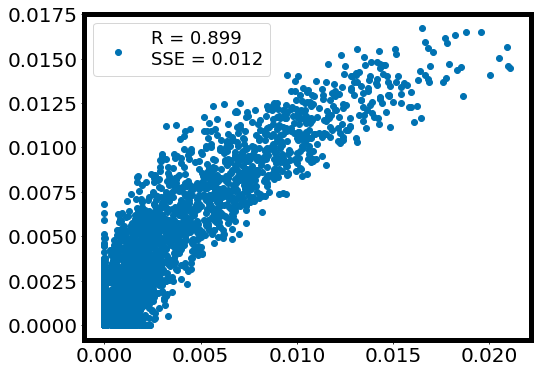

Running trial 12, cycle 5
Epoch: 0, Loss: 343.99410, Residuals: -0.18321, Convergence:   inf
Epoch: 10, Loss: 299.05533, Residuals: -0.16789, Convergence: 0.014373
Epoch: 20, Loss: 258.89319, Residuals: -0.15386, Convergence: 0.014563
Epoch: 30, Loss: 224.43971, Residuals: -0.14117, Convergence: 0.014177
Epoch: 40, Loss: 195.30325, Residuals: -0.12943, Convergence: 0.013896
Epoch: 50, Loss: 170.44540, Residuals: -0.11852, Convergence: 0.013506
Epoch: 60, Loss: 149.52791, Residuals: -0.10846, Convergence: 0.012912
Epoch: 70, Loss: 131.97812, Residuals: -0.09920, Convergence: 0.012239
Epoch: 80, Loss: 117.26059, Residuals: -0.09064, Convergence: 0.011734
Epoch: 90, Loss: 104.76218, Residuals: -0.08267, Convergence: 0.011038
Epoch: 100, Loss: 93.93572, Residuals: -0.07546, Convergence: 0.010783
Epoch: 110, Loss: 84.62445, Residuals: -0.06896, Convergence: 0.010435
Epoch: 120, Loss: 76.49757, Residuals: -0.06318, Convergence: 0.009821
Epoch: 130, Loss: 69.37593, Residuals: -0.05801, Conver


Epoch: 951, Evidence: 1610.13318, Convergence: 0.001923

Epoch: 952, Evidence: 1609.07153, Convergence: -0.000660
Epoch: 960, Loss: 331.51486, Residuals: -0.00441, Convergence: 0.001332
Epoch: 970, Loss: 327.60150, Residuals: -0.00451, Convergence: 0.001080

Epoch: 973, Evidence: 1604.11230, Convergence: -0.003753


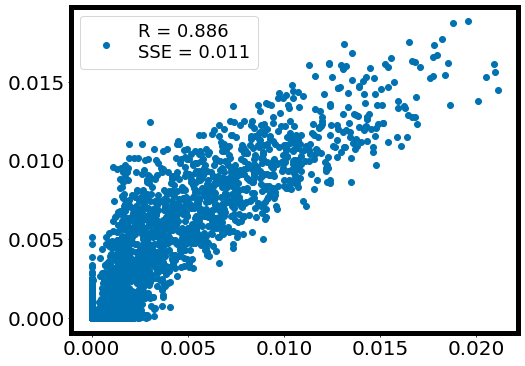

Epoch: 0, Loss: 431.59636, Residuals: -0.13674, Convergence:   inf
Epoch: 10, Loss: 373.63361, Residuals: -0.12545, Convergence: 0.014819
Epoch: 20, Loss: 322.05777, Residuals: -0.11517, Convergence: 0.014976
Epoch: 30, Loss: 278.11276, Residuals: -0.10577, Convergence: 0.014539
Epoch: 40, Loss: 241.52780, Residuals: -0.09719, Convergence: 0.013927
Epoch: 50, Loss: 211.18277, Residuals: -0.08911, Convergence: 0.013234
Epoch: 60, Loss: 185.86536, Residuals: -0.08169, Convergence: 0.012561
Epoch: 70, Loss: 164.81519, Residuals: -0.07489, Convergence: 0.011775
Epoch: 80, Loss: 147.17378, Residuals: -0.06863, Convergence: 0.011081
Epoch: 90, Loss: 132.13847, Residuals: -0.06276, Convergence: 0.010613
Epoch: 100, Loss: 119.19921, Residuals: -0.05702, Convergence: 0.010053
Epoch: 110, Loss: 108.24516, Residuals: -0.05176, Convergence: 0.009187
Epoch: 120, Loss: 99.00713, Residuals: -0.04690, Convergence: 0.008660
Epoch: 130, Loss: 91.22019, Residuals: -0.04234, Convergence: 0.007961
Epoch: 1


Epoch: 928, Evidence: 1793.67139, Convergence: -0.004586


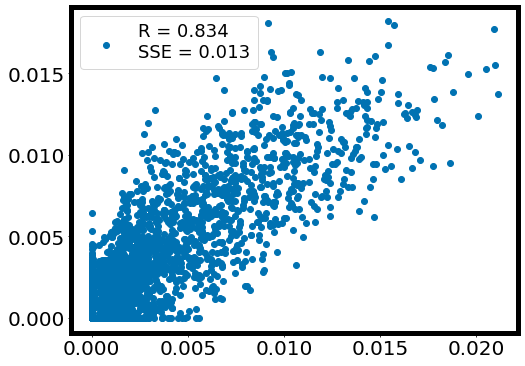

Running trial 13, cycle 1
Epoch: 0, Loss: 93.01849, Residuals: -0.88807, Convergence:   inf
Epoch: 10, Loss: 79.96106, Residuals: -0.82622, Convergence: 0.015203
Epoch: 20, Loss: 68.76545, Residuals: -0.76727, Convergence: 0.015199
Epoch: 30, Loss: 59.11032, Residuals: -0.71168, Convergence: 0.015308
Epoch: 40, Loss: 50.68372, Residuals: -0.65999, Convergence: 0.015740
Epoch: 50, Loss: 43.28667, Residuals: -0.61151, Convergence: 0.015982
Epoch: 60, Loss: 36.99629, Residuals: -0.56759, Convergence: 0.015832
Epoch: 70, Loss: 31.75357, Residuals: -0.52736, Convergence: 0.015306
Epoch: 80, Loss: 27.39338, Residuals: -0.49006, Convergence: 0.014731
Epoch: 90, Loss: 23.75326, Residuals: -0.45559, Convergence: 0.013895
Epoch: 100, Loss: 20.75684, Residuals: -0.42381, Convergence: 0.011914
Epoch: 110, Loss: 18.23936, Residuals: -0.39496, Convergence: 0.011073
Epoch: 120, Loss: 16.14301, Residuals: -0.36852, Convergence: 0.010742
Epoch: 130, Loss: 14.40182, Residuals: -0.34409, Convergence: 0.0


Epoch: 776, Evidence: 221.95088, Convergence: 0.006328
Epoch: 780, Loss: 51.37490, Residuals: 0.00520, Convergence: 0.001179

Epoch: 789, Evidence: 222.35345, Convergence: 0.001811
Epoch: 790, Loss: 51.24538, Residuals: 0.00527, Convergence: 0.004054

Epoch: 793, Evidence: 222.79543, Convergence: 0.001984
Epoch: 800, Loss: 51.04160, Residuals: 0.00520, Convergence: 0.003295
Epoch: 810, Loss: 49.81341, Residuals: 0.00564, Convergence: 0.002469

Epoch: 812, Evidence: 222.33092, Convergence: -0.002089
Epoch: 820, Loss: 52.15051, Residuals: 0.00487, Convergence: 0.001469

Epoch: 821, Evidence: 225.91771, Convergence: 0.013820
Epoch: 830, Loss: 52.38160, Residuals: 0.00504, Convergence: 0.000930

Epoch: 830, Evidence: 226.69531, Convergence: 0.003430
Epoch: 830, Loss: 53.43597, Residuals: 0.00504, Convergence:   inf

Epoch: 834, Evidence: 226.76521, Convergence: 0.000308
Epoch: 840, Loss: 52.78017, Residuals: 0.00556, Convergence: 0.003694

Epoch: 846, Evidence: 225.96397, Convergence: -0.

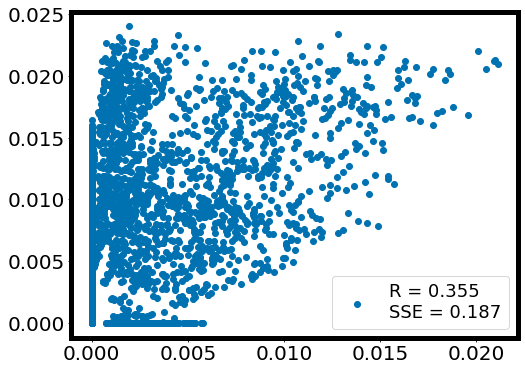

Running trial 13, cycle 2
Epoch: 0, Loss: 210.26169, Residuals: -0.27655, Convergence:   inf
Epoch: 10, Loss: 178.31113, Residuals: -0.25951, Convergence: 0.016643
Epoch: 20, Loss: 151.10657, Residuals: -0.24278, Convergence: 0.016732
Epoch: 30, Loss: 127.94697, Residuals: -0.22641, Convergence: 0.016797
Epoch: 40, Loss: 108.30431, Residuals: -0.21138, Convergence: 0.016798
Epoch: 50, Loss: 91.79520, Residuals: -0.19799, Convergence: 0.016561
Epoch: 60, Loss: 77.97107, Residuals: -0.18598, Convergence: 0.016351
Epoch: 70, Loss: 66.40986, Residuals: -0.17516, Convergence: 0.015885
Epoch: 80, Loss: 56.78931, Residuals: -0.16496, Convergence: 0.015444
Epoch: 90, Loss: 48.72053, Residuals: -0.15524, Convergence: 0.015350
Epoch: 100, Loss: 41.96106, Residuals: -0.14598, Convergence: 0.014955
Epoch: 110, Loss: 36.29202, Residuals: -0.13728, Convergence: 0.014346
Epoch: 120, Loss: 31.56021, Residuals: -0.12904, Convergence: 0.013801
Epoch: 130, Loss: 27.56938, Residuals: -0.12162, Convergence


Epoch: 959, Evidence: 537.24414, Convergence: -0.003812
Epoch: 960, Loss: 97.15101, Residuals: -0.00667, Convergence: 0.002106
Epoch: 970, Loss: 95.44450, Residuals: -0.00663, Convergence: 0.001826

Epoch: 972, Evidence: 548.15558, Convergence: 0.016170

Epoch: 977, Evidence: 553.40558, Convergence: 0.009487
Epoch: 980, Loss: 100.91443, Residuals: -0.00653, Convergence: 0.001988
Epoch: 990, Loss: 99.28949, Residuals: -0.00643, Convergence: 0.001538

Epoch: 995, Evidence: 550.85980, Convergence: -0.004621

Epoch: 998, Evidence: 556.93762, Convergence: 0.006342
Epoch: 1000, Loss: 105.10463, Residuals: -0.00647, Convergence: 0.001038

Epoch: 1002, Evidence: 557.68469, Convergence: 0.001340

Epoch: 1004, Evidence: 561.11914, Convergence: 0.006121

Epoch: 1006, Evidence: 560.94373, Convergence: -0.000313
Epoch: 1010, Loss: 108.02703, Residuals: -0.00636, Convergence: 0.001100
Epoch: 1020, Loss: 106.09126, Residuals: -0.00633, Convergence: 0.001747

Epoch: 1022, Evidence: 559.62366, Converg

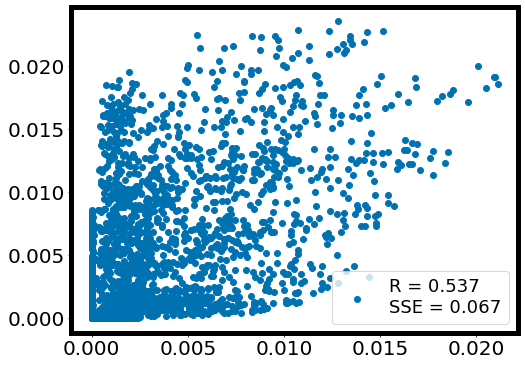

Running trial 13, cycle 3
Epoch: 0, Loss: 334.84795, Residuals: -0.08193, Convergence:   inf
Epoch: 10, Loss: 284.22000, Residuals: -0.07937, Convergence: 0.016455
Epoch: 20, Loss: 241.53378, Residuals: -0.07626, Convergence: 0.016375
Epoch: 30, Loss: 205.37498, Residuals: -0.07306, Convergence: 0.016326
Epoch: 40, Loss: 174.40903, Residuals: -0.07040, Convergence: 0.016495
Epoch: 50, Loss: 148.33385, Residuals: -0.06816, Convergence: 0.016223
Epoch: 60, Loss: 126.40892, Residuals: -0.06602, Convergence: 0.015940
Epoch: 70, Loss: 108.19878, Residuals: -0.06376, Convergence: 0.015484
Epoch: 80, Loss: 93.12038, Residuals: -0.06128, Convergence: 0.014837
Epoch: 90, Loss: 80.59253, Residuals: -0.05853, Convergence: 0.014429
Epoch: 100, Loss: 70.13447, Residuals: -0.05592, Convergence: 0.013698
Epoch: 110, Loss: 61.43042, Residuals: -0.05334, Convergence: 0.012967
Epoch: 120, Loss: 54.10451, Residuals: -0.05091, Convergence: 0.012630
Epoch: 130, Loss: 47.92797, Residuals: -0.04862, Converge

Epoch: 980, Loss: 169.39099, Residuals: -0.01215, Convergence: 0.001663
Epoch: 990, Loss: 166.88025, Residuals: -0.01256, Convergence: 0.001359
Epoch: 1000, Loss: 164.62878, Residuals: -0.01284, Convergence: 0.001302
Epoch: 1010, Loss: 162.64099, Residuals: -0.01302, Convergence: 0.001135

Epoch: 1019, Evidence: 826.35138, Convergence: 0.012867
Epoch: 1020, Loss: 167.66241, Residuals: -0.01313, Convergence: 0.001626
Epoch: 1030, Loss: 165.24149, Residuals: -0.01357, Convergence: 0.001336
Epoch: 1040, Loss: 163.03488, Residuals: -0.01387, Convergence: 0.001442
Epoch: 1050, Loss: 160.98398, Residuals: -0.01406, Convergence: 0.001161
Epoch: 1060, Loss: 159.13715, Residuals: -0.01412, Convergence: 0.001087

Epoch: 1065, Evidence: 819.46106, Convergence: -0.008408


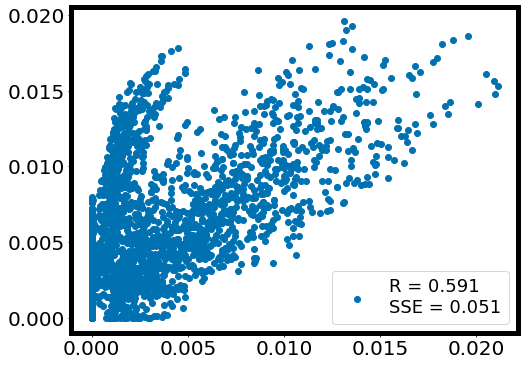

Running trial 13, cycle 4
Epoch: 0, Loss: 453.89253, Residuals: -0.11452, Convergence:   inf
Epoch: 10, Loss: 384.38867, Residuals: -0.10698, Convergence: 0.016799
Epoch: 20, Loss: 325.34515, Residuals: -0.09970, Convergence: 0.016835
Epoch: 30, Loss: 275.18674, Residuals: -0.09315, Convergence: 0.016994
Epoch: 40, Loss: 232.66901, Residuals: -0.08754, Convergence: 0.016804
Epoch: 50, Loss: 197.54172, Residuals: -0.08216, Convergence: 0.016263
Epoch: 60, Loss: 168.37842, Residuals: -0.07692, Convergence: 0.015875
Epoch: 70, Loss: 144.22791, Residuals: -0.07172, Convergence: 0.015455
Epoch: 80, Loss: 124.39632, Residuals: -0.06655, Convergence: 0.014555
Epoch: 90, Loss: 107.88638, Residuals: -0.06180, Convergence: 0.014121
Epoch: 100, Loss: 94.14923, Residuals: -0.05743, Convergence: 0.013409
Epoch: 110, Loss: 82.88316, Residuals: -0.05286, Convergence: 0.012469
Epoch: 120, Loss: 73.53637, Residuals: -0.04853, Convergence: 0.011713
Epoch: 130, Loss: 65.59799, Residuals: -0.04454, Conver


Epoch: 1011, Evidence: 1133.45215, Convergence: -0.002081

Epoch: 1013, Evidence: 1148.99402, Convergence: 0.011474

Epoch: 1014, Evidence: 1151.73291, Convergence: 0.002378

Epoch: 1016, Evidence: 1152.95959, Convergence: 0.001064

Epoch: 1019, Evidence: 1152.97961, Convergence: 0.000017
Epoch: 1020, Loss: 251.75667, Residuals: -0.00992, Convergence: 0.001843
Epoch: 1030, Loss: 247.48260, Residuals: -0.00996, Convergence: 0.001552
Epoch: 1040, Loss: 244.11197, Residuals: -0.00957, Convergence: 0.001304

Epoch: 1049, Evidence: 1143.34045, Convergence: -0.008413
Epoch: 1050, Loss: 253.24472, Residuals: -0.00997, Convergence: 0.001043

Epoch: 1052, Evidence: 1154.15417, Convergence: 0.001035

Epoch: 1057, Evidence: 1154.70227, Convergence: 0.000475
Epoch: 1060, Loss: 252.53151, Residuals: -0.00993, Convergence: 0.001708
Epoch: 1070, Loss: 248.42960, Residuals: -0.00978, Convergence: 0.001613
Epoch: 1080, Loss: 245.18436, Residuals: -0.00937, Convergence: 0.001158

Epoch: 1087, Evidence:

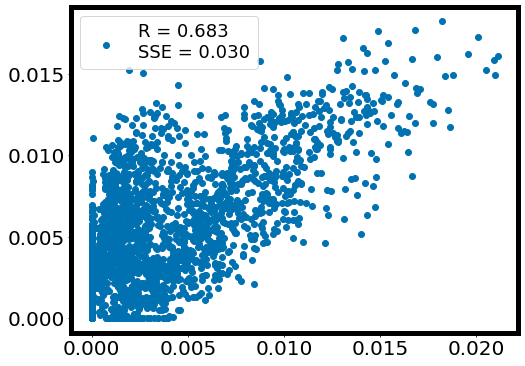

Running trial 13, cycle 5
Epoch: 0, Loss: 489.80196, Residuals: -0.06518, Convergence:   inf
Epoch: 10, Loss: 417.28973, Residuals: -0.06143, Convergence: 0.016218
Epoch: 20, Loss: 354.96573, Residuals: -0.05781, Convergence: 0.016407
Epoch: 30, Loss: 301.66269, Residuals: -0.05440, Convergence: 0.016320
Epoch: 40, Loss: 256.97324, Residuals: -0.05068, Convergence: 0.016139
Epoch: 50, Loss: 219.53566, Residuals: -0.04730, Convergence: 0.015701
Epoch: 60, Loss: 188.51517, Residuals: -0.04419, Convergence: 0.015108
Epoch: 70, Loss: 162.92632, Residuals: -0.04138, Convergence: 0.014532
Epoch: 80, Loss: 141.37572, Residuals: -0.03883, Convergence: 0.013796
Epoch: 90, Loss: 123.07785, Residuals: -0.03629, Convergence: 0.013948
Epoch: 100, Loss: 107.48187, Residuals: -0.03374, Convergence: 0.013726
Epoch: 110, Loss: 94.12663, Residuals: -0.03103, Convergence: 0.012930
Epoch: 120, Loss: 82.75375, Residuals: -0.02870, Convergence: 0.012808
Epoch: 130, Loss: 73.22754, Residuals: -0.02642, Conve


Epoch: 919, Evidence: 1526.84338, Convergence: 0.000716


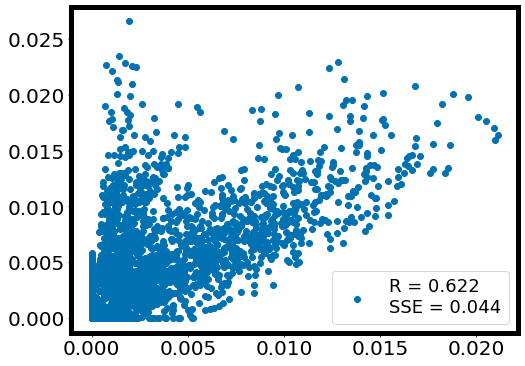

Epoch: 0, Loss: 616.74126, Residuals: -0.03873, Convergence:   inf
Epoch: 10, Loss: 524.07251, Residuals: -0.03673, Convergence: 0.016519
Epoch: 20, Loss: 444.14197, Residuals: -0.03476, Convergence: 0.016823
Epoch: 30, Loss: 375.94467, Residuals: -0.03290, Convergence: 0.016699
Epoch: 40, Loss: 319.27789, Residuals: -0.03064, Convergence: 0.016343
Epoch: 50, Loss: 272.30515, Residuals: -0.02855, Convergence: 0.015810
Epoch: 60, Loss: 233.42326, Residuals: -0.02669, Convergence: 0.015322
Epoch: 70, Loss: 201.06120, Residuals: -0.02525, Convergence: 0.014889
Epoch: 80, Loss: 174.02126, Residuals: -0.02402, Convergence: 0.014354
Epoch: 90, Loss: 151.20798, Residuals: -0.02283, Convergence: 0.013970
Epoch: 100, Loss: 132.07216, Residuals: -0.02165, Convergence: 0.013357
Epoch: 110, Loss: 116.08853, Residuals: -0.02023, Convergence: 0.012656
Epoch: 120, Loss: 102.56529, Residuals: -0.01877, Convergence: 0.012230
Epoch: 130, Loss: 91.20218, Residuals: -0.01734, Convergence: 0.011517
Epoch: 

Epoch: 930, Loss: 393.75830, Residuals: -0.01387, Convergence: 0.001497

Epoch: 936, Evidence: 1892.02185, Convergence: -0.005298


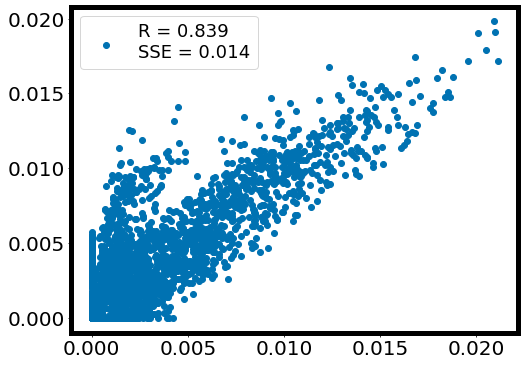

Running trial 14, cycle 1
Epoch: 0, Loss: 74.47945, Residuals: -1.00910, Convergence:   inf
Epoch: 10, Loss: 65.96696, Residuals: -0.92806, Convergence: 0.012395
Epoch: 20, Loss: 58.18237, Residuals: -0.85566, Convergence: 0.012780
Epoch: 30, Loss: 51.19308, Residuals: -0.79054, Convergence: 0.012951
Epoch: 40, Loss: 44.97912, Residuals: -0.73167, Convergence: 0.013072
Epoch: 50, Loss: 39.50170, Residuals: -0.67844, Convergence: 0.013046
Epoch: 60, Loss: 34.72417, Residuals: -0.63026, Convergence: 0.012905
Epoch: 70, Loss: 30.57608, Residuals: -0.58661, Convergence: 0.012714
Epoch: 80, Loss: 26.99219, Residuals: -0.54685, Convergence: 0.012403
Epoch: 90, Loss: 23.91121, Residuals: -0.51053, Convergence: 0.011904
Epoch: 100, Loss: 21.24115, Residuals: -0.47769, Convergence: 0.011942
Epoch: 110, Loss: 18.94705, Residuals: -0.44761, Convergence: 0.011130
Epoch: 120, Loss: 16.99952, Residuals: -0.41991, Convergence: 0.010494
Epoch: 130, Loss: 15.31979, Residuals: -0.39473, Convergence: 0.0


Epoch: 806, Evidence: 202.34662, Convergence: -0.001495
Epoch: 810, Loss: 49.27020, Residuals: 0.00060, Convergence: 0.001149

Epoch: 814, Evidence: 205.64120, Convergence: 0.014550

Epoch: 815, Evidence: 205.30356, Convergence: -0.001645

Epoch: 816, Evidence: 206.24255, Convergence: 0.002916

Epoch: 817, Evidence: 207.08307, Convergence: 0.004059

Epoch: 818, Evidence: 208.39252, Convergence: 0.006284

Epoch: 819, Evidence: 209.74124, Convergence: 0.006430
Epoch: 820, Loss: 53.85756, Residuals: 0.00060, Convergence: 0.000644

Epoch: 820, Evidence: 210.75365, Convergence: 0.004804
Epoch: 820, Loss: 54.45326, Residuals: 0.00060, Convergence:   inf

Epoch: 821, Evidence: 209.56752, Convergence: -0.005660


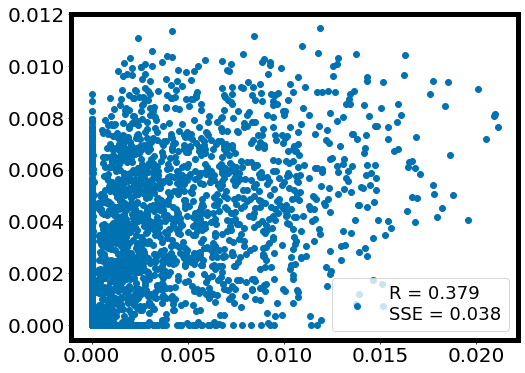

Running trial 14, cycle 2
Epoch: 0, Loss: 161.70036, Residuals: -0.77213, Convergence:   inf
Epoch: 10, Loss: 140.93704, Residuals: -0.70652, Convergence: 0.014211
Epoch: 20, Loss: 122.02126, Residuals: -0.64726, Convergence: 0.014689
Epoch: 30, Loss: 105.37956, Residuals: -0.59303, Convergence: 0.014820
Epoch: 40, Loss: 90.96934, Residuals: -0.54354, Convergence: 0.014787
Epoch: 50, Loss: 78.69441, Residuals: -0.49799, Convergence: 0.014556
Epoch: 60, Loss: 68.28490, Residuals: -0.45691, Convergence: 0.014196
Epoch: 70, Loss: 59.47995, Residuals: -0.41984, Convergence: 0.013696
Epoch: 80, Loss: 52.12448, Residuals: -0.38628, Convergence: 0.013012
Epoch: 90, Loss: 45.94998, Residuals: -0.35581, Convergence: 0.012267
Epoch: 100, Loss: 40.71962, Residuals: -0.32832, Convergence: 0.011722
Epoch: 110, Loss: 36.25615, Residuals: -0.30341, Convergence: 0.011176
Epoch: 120, Loss: 32.46588, Residuals: -0.28089, Convergence: 0.010919
Epoch: 130, Loss: 29.12625, Residuals: -0.26043, Convergence:

Epoch: 960, Loss: 101.84253, Residuals: -0.01319, Convergence: 0.000882

Epoch: 960, Evidence: 491.11304, Convergence: 0.016412
Epoch: 960, Loss: 105.99683, Residuals: -0.01319, Convergence:   inf
Epoch: 970, Loss: 104.26131, Residuals: -0.01344, Convergence: 0.001175

Epoch: 974, Evidence: 492.89215, Convergence: 0.003610
Epoch: 980, Loss: 106.16693, Residuals: -0.01360, Convergence: 0.001664

Epoch: 988, Evidence: 495.71234, Convergence: 0.005689
Epoch: 990, Loss: 107.84001, Residuals: -0.01379, Convergence: 0.001638
Epoch: 1000, Loss: 106.18412, Residuals: -0.01397, Convergence: 0.001566
Epoch: 1010, Loss: 104.71454, Residuals: -0.01415, Convergence: 0.001043

Epoch: 1013, Evidence: 494.88043, Convergence: -0.001681


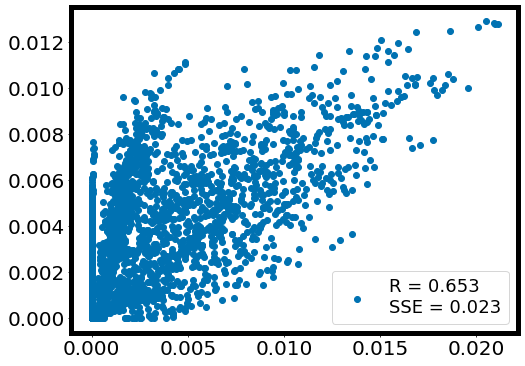

Running trial 14, cycle 3
Epoch: 0, Loss: 223.76227, Residuals: -0.62405, Convergence:   inf
Epoch: 10, Loss: 194.05267, Residuals: -0.56976, Convergence: 0.014538
Epoch: 20, Loss: 167.73892, Residuals: -0.52070, Convergence: 0.014785
Epoch: 30, Loss: 144.75908, Residuals: -0.47633, Convergence: 0.014846
Epoch: 40, Loss: 124.95361, Residuals: -0.43659, Convergence: 0.014780
Epoch: 50, Loss: 108.05067, Residuals: -0.40061, Convergence: 0.014500
Epoch: 60, Loss: 93.80530, Residuals: -0.36783, Convergence: 0.013996
Epoch: 70, Loss: 81.70058, Residuals: -0.33742, Convergence: 0.013741
Epoch: 80, Loss: 71.32862, Residuals: -0.30943, Convergence: 0.013676
Epoch: 90, Loss: 62.40712, Residuals: -0.28386, Convergence: 0.013392
Epoch: 100, Loss: 54.73958, Residuals: -0.26037, Convergence: 0.013038
Epoch: 110, Loss: 48.19814, Residuals: -0.23852, Convergence: 0.012659
Epoch: 120, Loss: 42.62168, Residuals: -0.21813, Convergence: 0.012167
Epoch: 130, Loss: 37.79337, Residuals: -0.19940, Convergenc

Epoch: 1010, Loss: 158.32173, Residuals: -0.00494, Convergence:   inf
Epoch: 1020, Loss: 153.72571, Residuals: -0.00570, Convergence: 0.002448
Epoch: 1030, Loss: 150.16296, Residuals: -0.00603, Convergence: 0.002135
Epoch: 1040, Loss: 147.26016, Residuals: -0.00603, Convergence: 0.001920
Epoch: 1050, Loss: 144.91440, Residuals: -0.00580, Convergence: 0.001558

Epoch: 1054, Evidence: 818.64111, Convergence: 0.023975
Epoch: 1060, Loss: 150.37930, Residuals: -0.00599, Convergence: 0.002513
Epoch: 1070, Loss: 147.29550, Residuals: -0.00623, Convergence: 0.001764
Epoch: 1080, Loss: 144.73891, Residuals: -0.00614, Convergence: 0.001778
Epoch: 1090, Loss: 142.71941, Residuals: -0.00584, Convergence: 0.001244

Epoch: 1094, Evidence: 812.04993, Convergence: -0.008117
Epoch: 1100, Loss: 155.26471, Residuals: -0.00568, Convergence: 0.001405
Epoch: 1110, Loss: 153.15759, Residuals: -0.00565, Convergence: 0.001334
Epoch: 1120, Loss: 151.29276, Residuals: -0.00557, Convergence: 0.001224

Epoch: 1121

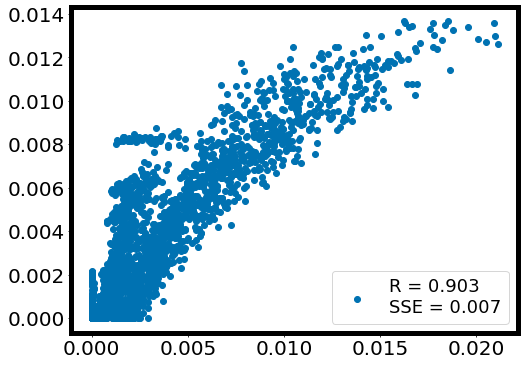

Running trial 14, cycle 4
Epoch: 0, Loss: 335.40608, Residuals: -0.46183, Convergence:   inf
Epoch: 10, Loss: 287.82648, Residuals: -0.42120, Convergence: 0.015586
Epoch: 20, Loss: 246.29599, Residuals: -0.38457, Convergence: 0.015794
Epoch: 30, Loss: 210.57312, Residuals: -0.35191, Convergence: 0.015647
Epoch: 40, Loss: 180.40123, Residuals: -0.32250, Convergence: 0.015476
Epoch: 50, Loss: 154.88210, Residuals: -0.29576, Convergence: 0.015260
Epoch: 60, Loss: 133.48752, Residuals: -0.27067, Convergence: 0.014729
Epoch: 70, Loss: 115.12886, Residuals: -0.24740, Convergence: 0.014883
Epoch: 80, Loss: 99.51671, Residuals: -0.22617, Convergence: 0.014560
Epoch: 90, Loss: 86.29543, Residuals: -0.20665, Convergence: 0.014155
Epoch: 100, Loss: 75.12424, Residuals: -0.18885, Convergence: 0.013828
Epoch: 110, Loss: 65.64800, Residuals: -0.17266, Convergence: 0.013577
Epoch: 120, Loss: 57.55618, Residuals: -0.15773, Convergence: 0.013189
Epoch: 130, Loss: 50.74100, Residuals: -0.14393, Converge


Epoch: 920, Evidence: 1278.23340, Convergence: -0.002381
Epoch: 920, Loss: 259.70370, Residuals: -0.00750, Convergence:   inf

Epoch: 921, Evidence: 1279.60535, Convergence: -0.001306


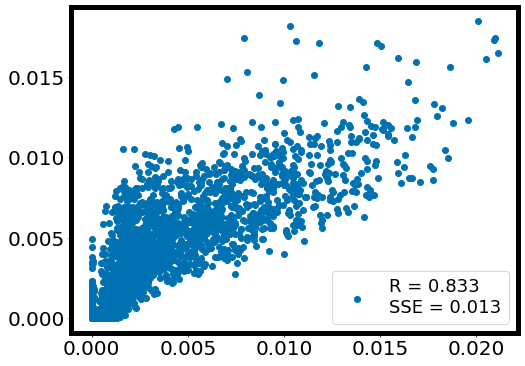

Running trial 14, cycle 5
Epoch: 0, Loss: 544.47612, Residuals: 0.27657, Convergence:   inf
Epoch: 10, Loss: 460.80060, Residuals: 0.24852, Convergence: 0.016978
Epoch: 20, Loss: 389.30505, Residuals: 0.22336, Convergence: 0.017048
Epoch: 30, Loss: 329.55652, Residuals: 0.20060, Convergence: 0.016718
Epoch: 40, Loss: 280.10870, Residuals: 0.18008, Convergence: 0.016214
Epoch: 50, Loss: 238.69310, Residuals: 0.16130, Convergence: 0.016078
Epoch: 60, Loss: 204.22581, Residuals: 0.14449, Convergence: 0.015392
Epoch: 70, Loss: 175.54793, Residuals: 0.12954, Convergence: 0.014901
Epoch: 80, Loss: 151.53406, Residuals: 0.11610, Convergence: 0.014754
Epoch: 90, Loss: 131.33533, Residuals: 0.10409, Convergence: 0.014294
Epoch: 100, Loss: 114.38665, Residuals: 0.09355, Convergence: 0.013514
Epoch: 110, Loss: 100.04925, Residuals: 0.08382, Convergence: 0.013226
Epoch: 120, Loss: 88.13187, Residuals: 0.07529, Convergence: 0.012179
Epoch: 130, Loss: 78.07400, Residuals: 0.06767, Convergence: 0.012

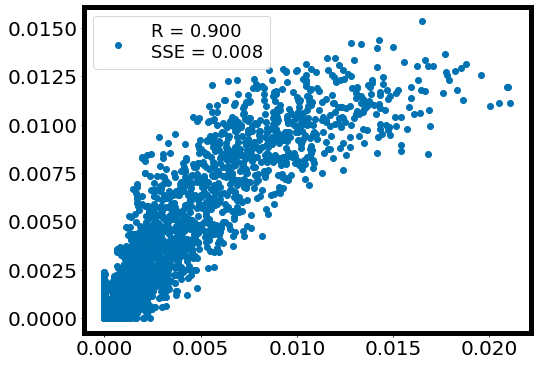

Epoch: 0, Loss: 693.68663, Residuals: 0.34355, Convergence:   inf
Epoch: 10, Loss: 586.88409, Residuals: 0.30932, Convergence: 0.017015
Epoch: 20, Loss: 495.73706, Residuals: 0.27828, Convergence: 0.016940
Epoch: 30, Loss: 419.70822, Residuals: 0.25024, Convergence: 0.016607
Epoch: 40, Loss: 356.89774, Residuals: 0.22509, Convergence: 0.016067
Epoch: 50, Loss: 305.04712, Residuals: 0.20242, Convergence: 0.015597
Epoch: 60, Loss: 262.26981, Residuals: 0.18197, Convergence: 0.014960
Epoch: 70, Loss: 226.35725, Residuals: 0.16359, Convergence: 0.014710
Epoch: 80, Loss: 196.19562, Residuals: 0.14732, Convergence: 0.014394
Epoch: 90, Loss: 170.51323, Residuals: 0.13270, Convergence: 0.014127
Epoch: 100, Loss: 148.78433, Residuals: 0.11975, Convergence: 0.013492
Epoch: 110, Loss: 130.47533, Residuals: 0.10817, Convergence: 0.012979
Epoch: 120, Loss: 115.00946, Residuals: 0.09795, Convergence: 0.012496
Epoch: 130, Loss: 101.74019, Residuals: 0.08853, Convergence: 0.012226
Epoch: 140, Loss: 90

Epoch: 950, Loss: 373.60571, Residuals: -0.00496, Convergence: 0.001139

Epoch: 951, Evidence: 2038.33386, Convergence: -0.008319
Epoch: 960, Loss: 392.70386, Residuals: -0.00498, Convergence: 0.001183

Epoch: 966, Evidence: 2058.98535, Convergence: 0.001794
Epoch: 970, Loss: 392.53870, Residuals: -0.00503, Convergence: 0.001266

Epoch: 977, Evidence: 2056.22388, Convergence: -0.001343


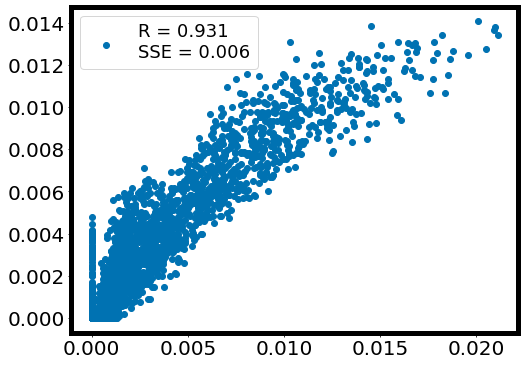

Running trial 15, cycle 1
Epoch: 0, Loss: 98.23380, Residuals: -1.33313, Convergence:   inf
Epoch: 10, Loss: 85.16357, Residuals: -1.22021, Convergence: 0.014764
Epoch: 20, Loss: 73.24098, Residuals: -1.11884, Convergence: 0.015470
Epoch: 30, Loss: 62.69029, Residuals: -1.02721, Convergence: 0.015821
Epoch: 40, Loss: 53.52921, Residuals: -0.94432, Convergence: 0.015963
Epoch: 50, Loss: 45.72100, Residuals: -0.86911, Convergence: 0.015815
Epoch: 60, Loss: 39.16479, Residuals: -0.80084, Convergence: 0.015389
Epoch: 70, Loss: 33.71484, Residuals: -0.73855, Convergence: 0.014975
Epoch: 80, Loss: 29.22442, Residuals: -0.68157, Convergence: 0.014174
Epoch: 90, Loss: 25.50781, Residuals: -0.62997, Convergence: 0.013378
Epoch: 100, Loss: 22.43970, Residuals: -0.58322, Convergence: 0.012303
Epoch: 110, Loss: 19.89032, Residuals: -0.54091, Convergence: 0.011159
Epoch: 120, Loss: 17.76833, Residuals: -0.50258, Convergence: 0.011400
Epoch: 130, Loss: 16.01355, Residuals: -0.46780, Convergence: 0.0

Epoch: 870, Loss: 40.53708, Residuals: -0.01603, Convergence: 0.001532
Epoch: 880, Loss: 39.74701, Residuals: -0.01629, Convergence: 0.002396

Epoch: 886, Evidence: 243.20959, Convergence: -0.007383
Epoch: 890, Loss: 42.52722, Residuals: -0.01436, Convergence: 0.001820
Epoch: 900, Loss: 41.87148, Residuals: -0.01432, Convergence: 0.001527
Epoch: 910, Loss: 41.27129, Residuals: -0.01419, Convergence: 0.001752
Epoch: 920, Loss: 40.76566, Residuals: -0.01388, Convergence: 0.000744

Epoch: 920, Evidence: 249.00656, Convergence: 0.016069
Epoch: 920, Loss: 42.15079, Residuals: -0.01388, Convergence:   inf
Epoch: 930, Loss: 41.50510, Residuals: -0.01396, Convergence: 0.001610
Epoch: 940, Loss: 40.91883, Residuals: -0.01390, Convergence: 0.001509

Epoch: 942, Evidence: 251.14088, Convergence: 0.008499
Epoch: 950, Loss: 41.69217, Residuals: -0.01393, Convergence: 0.001468

Epoch: 959, Evidence: 250.96469, Convergence: -0.000702
Epoch: 960, Loss: 42.06413, Residuals: -0.01411, Convergence: 0.002

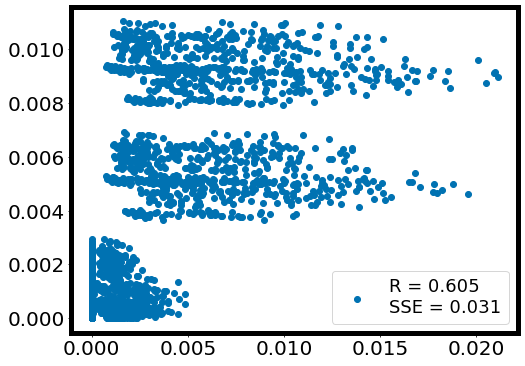

Running trial 15, cycle 2
Epoch: 0, Loss: 183.93532, Residuals: -0.15660, Convergence:   inf
Epoch: 10, Loss: 156.40607, Residuals: -0.14679, Convergence: 0.016504
Epoch: 20, Loss: 132.72449, Residuals: -0.13747, Convergence: 0.016592
Epoch: 30, Loss: 112.49824, Residuals: -0.12863, Convergence: 0.016744
Epoch: 40, Loss: 95.21400, Residuals: -0.12050, Convergence: 0.016861
Epoch: 50, Loss: 80.58755, Residuals: -0.11304, Convergence: 0.016703
Epoch: 60, Loss: 68.37375, Residuals: -0.10603, Convergence: 0.016438
Epoch: 70, Loss: 58.22755, Residuals: -0.09944, Convergence: 0.015761
Epoch: 80, Loss: 49.88692, Residuals: -0.09317, Convergence: 0.015083
Epoch: 90, Loss: 42.83696, Residuals: -0.08749, Convergence: 0.015181
Epoch: 100, Loss: 36.96596, Residuals: -0.08238, Convergence: 0.014769
Epoch: 110, Loss: 32.03206, Residuals: -0.07804, Convergence: 0.014267
Epoch: 120, Loss: 27.91334, Residuals: -0.07412, Convergence: 0.013603
Epoch: 130, Loss: 24.49965, Residuals: -0.07036, Convergence:

Epoch: 840, Loss: 116.48570, Residuals: -0.00013, Convergence: 0.002309
Epoch: 850, Loss: 114.22714, Residuals: -0.00056, Convergence: 0.001867

Epoch: 856, Evidence: 600.30371, Convergence: -0.000065


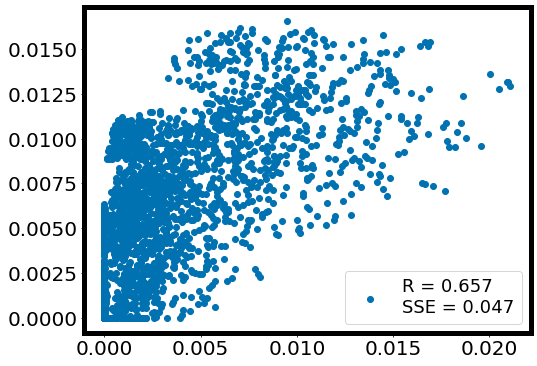

Running trial 15, cycle 3
Epoch: 0, Loss: 236.25438, Residuals: -0.09365, Convergence:   inf
Epoch: 10, Loss: 204.05928, Residuals: -0.08842, Convergence: 0.014790
Epoch: 20, Loss: 176.17809, Residuals: -0.08354, Convergence: 0.014825
Epoch: 30, Loss: 152.02740, Residuals: -0.07891, Convergence: 0.014864
Epoch: 40, Loss: 131.28772, Residuals: -0.07462, Convergence: 0.014609
Epoch: 50, Loss: 113.91965, Residuals: -0.07050, Convergence: 0.014181
Epoch: 60, Loss: 99.43199, Residuals: -0.06661, Convergence: 0.013440
Epoch: 70, Loss: 87.31385, Residuals: -0.06299, Convergence: 0.012922
Epoch: 80, Loss: 77.00375, Residuals: -0.05918, Convergence: 0.011893
Epoch: 90, Loss: 67.54374, Residuals: -0.05609, Convergence: 0.013411
Epoch: 100, Loss: 59.55280, Residuals: -0.05315, Convergence: 0.011087
Epoch: 110, Loss: 52.69392, Residuals: -0.05050, Convergence: 0.011908
Epoch: 120, Loss: 47.00113, Residuals: -0.04812, Convergence: 0.010703
Epoch: 130, Loss: 42.21896, Residuals: -0.04587, Convergenc

Epoch: 1020, Loss: 153.72990, Residuals: -0.00698, Convergence: 0.001224

Epoch: 1024, Evidence: 912.84961, Convergence: 0.004940
Epoch: 1030, Loss: 158.88823, Residuals: -0.00726, Convergence: 0.002345

Epoch: 1032, Evidence: 922.64447, Convergence: 0.010616
Epoch: 1040, Loss: 162.49551, Residuals: -0.00762, Convergence: 0.002329

Epoch: 1045, Evidence: 921.99487, Convergence: -0.000705
Epoch: 1050, Loss: 162.19589, Residuals: -0.00890, Convergence: 0.003847

Epoch: 1058, Evidence: 917.98151, Convergence: -0.005080
Epoch: 1060, Loss: 171.49875, Residuals: -0.00742, Convergence: 0.003042
Epoch: 1070, Loss: 167.24313, Residuals: -0.00781, Convergence: 0.002587
Epoch: 1080, Loss: 164.17645, Residuals: -0.00795, Convergence: 0.001529
Epoch: 1090, Loss: 161.54361, Residuals: -0.00790, Convergence: 0.001345

Epoch: 1098, Evidence: 919.05042, Convergence: -0.003911
Epoch: 1100, Loss: 173.34360, Residuals: -0.00733, Convergence: 0.001723
Epoch: 1110, Loss: 170.91280, Residuals: -0.00734, Conv

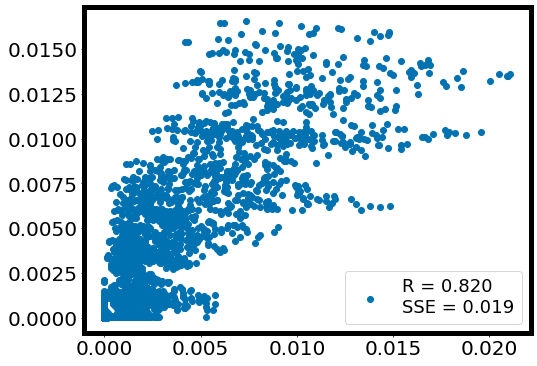

Running trial 15, cycle 4
Epoch: 0, Loss: 294.40389, Residuals: -0.12183, Convergence:   inf
Epoch: 10, Loss: 254.94519, Residuals: -0.11307, Convergence: 0.014518
Epoch: 20, Loss: 220.78499, Residuals: -0.10500, Convergence: 0.014468
Epoch: 30, Loss: 191.37631, Residuals: -0.09764, Convergence: 0.014306
Epoch: 40, Loss: 166.44287, Residuals: -0.09083, Convergence: 0.013785
Epoch: 50, Loss: 144.92802, Residuals: -0.08448, Convergence: 0.014267
Epoch: 60, Loss: 125.70222, Residuals: -0.07856, Convergence: 0.014088
Epoch: 70, Loss: 109.57118, Residuals: -0.07356, Convergence: 0.013400
Epoch: 80, Loss: 95.93426, Residuals: -0.06911, Convergence: 0.013252
Epoch: 90, Loss: 84.59421, Residuals: -0.06489, Convergence: 0.012456
Epoch: 100, Loss: 75.05491, Residuals: -0.06075, Convergence: 0.011721
Epoch: 110, Loss: 67.09498, Residuals: -0.05680, Convergence: 0.010928
Epoch: 120, Loss: 60.41619, Residuals: -0.05296, Convergence: 0.010187
Epoch: 130, Loss: 54.80320, Residuals: -0.04946, Converge


Epoch: 978, Evidence: 1207.38208, Convergence: -0.006246
Epoch: 980, Loss: 247.44925, Residuals: -0.01269, Convergence: 0.001258
Epoch: 990, Loss: 244.32907, Residuals: -0.01293, Convergence: 0.001214
Epoch: 1000, Loss: 241.48404, Residuals: -0.01301, Convergence: 0.001119

Epoch: 1002, Evidence: 1218.14575, Convergence: 0.002646
Epoch: 1010, Loss: 243.57623, Residuals: -0.01323, Convergence: 0.001297

Epoch: 1014, Evidence: 1220.45166, Convergence: 0.001889
Epoch: 1020, Loss: 244.92351, Residuals: -0.01343, Convergence: 0.001123
Epoch: 1030, Loss: 242.03934, Residuals: -0.01362, Convergence: 0.001104

Epoch: 1035, Evidence: 1218.48706, Convergence: -0.001612


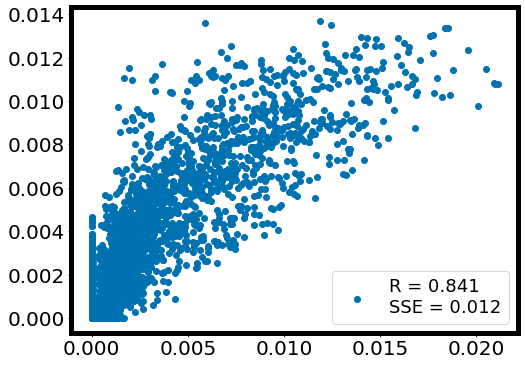

Running trial 15, cycle 5
Epoch: 0, Loss: 360.06233, Residuals: -0.15180, Convergence:   inf
Epoch: 10, Loss: 312.60132, Residuals: -0.13963, Convergence: 0.014317
Epoch: 20, Loss: 270.95404, Residuals: -0.12844, Convergence: 0.014463
Epoch: 30, Loss: 234.83984, Residuals: -0.11839, Convergence: 0.014298
Epoch: 40, Loss: 204.26704, Residuals: -0.10939, Convergence: 0.013882
Epoch: 50, Loss: 177.32053, Residuals: -0.10112, Convergence: 0.014341
Epoch: 60, Loss: 154.42799, Residuals: -0.09360, Convergence: 0.013778
Epoch: 70, Loss: 135.30525, Residuals: -0.08665, Convergence: 0.013014
Epoch: 80, Loss: 119.55698, Residuals: -0.07995, Convergence: 0.012375
Epoch: 90, Loss: 106.40525, Residuals: -0.07372, Convergence: 0.011431
Epoch: 100, Loss: 95.40826, Residuals: -0.06796, Convergence: 0.010747
Epoch: 110, Loss: 85.98633, Residuals: -0.06263, Convergence: 0.010141
Epoch: 120, Loss: 77.89101, Residuals: -0.05765, Convergence: 0.009923
Epoch: 130, Loss: 70.97311, Residuals: -0.05305, Conver

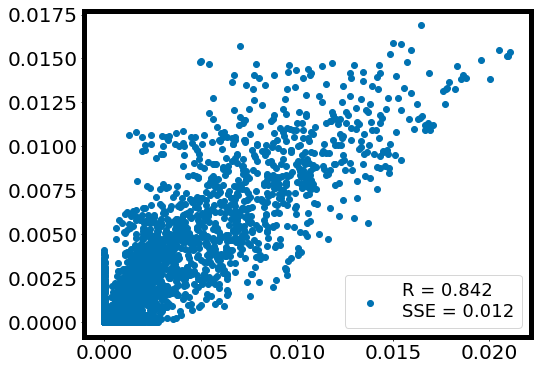

Epoch: 0, Loss: 456.40395, Residuals: -0.13005, Convergence:   inf
Epoch: 10, Loss: 394.77399, Residuals: -0.11940, Convergence: 0.014698
Epoch: 20, Loss: 340.89490, Residuals: -0.10969, Convergence: 0.014823
Epoch: 30, Loss: 294.72400, Residuals: -0.10103, Convergence: 0.014478
Epoch: 40, Loss: 256.01978, Residuals: -0.09323, Convergence: 0.013909
Epoch: 50, Loss: 222.38405, Residuals: -0.08590, Convergence: 0.013965
Epoch: 60, Loss: 193.72314, Residuals: -0.07911, Convergence: 0.013631
Epoch: 70, Loss: 169.64291, Residuals: -0.07298, Convergence: 0.013302
Epoch: 80, Loss: 149.33159, Residuals: -0.06747, Convergence: 0.012674
Epoch: 90, Loss: 132.45444, Residuals: -0.06216, Convergence: 0.011787
Epoch: 100, Loss: 118.28599, Residuals: -0.05733, Convergence: 0.011184
Epoch: 110, Loss: 106.49771, Residuals: -0.05284, Convergence: 0.009955
Epoch: 120, Loss: 96.67486, Residuals: -0.04868, Convergence: 0.009178
Epoch: 130, Loss: 88.36588, Residuals: -0.04483, Convergence: 0.009145
Epoch: 1

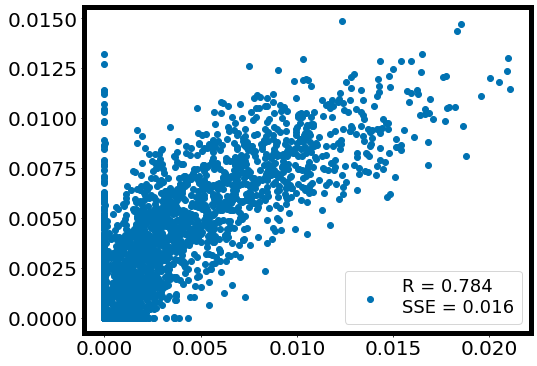

Running trial 16, cycle 1
Epoch: 0, Loss: 71.03148, Residuals: -1.11434, Convergence:   inf
Epoch: 10, Loss: 62.03058, Residuals: -1.02619, Convergence: 0.013501
Epoch: 20, Loss: 54.33714, Residuals: -0.94738, Convergence: 0.013207
Epoch: 30, Loss: 47.68730, Residuals: -0.87648, Convergence: 0.013132
Epoch: 40, Loss: 41.80115, Residuals: -0.81289, Convergence: 0.013419
Epoch: 50, Loss: 36.49271, Residuals: -0.75618, Convergence: 0.013873
Epoch: 60, Loss: 31.74794, Residuals: -0.70554, Convergence: 0.014102
Epoch: 70, Loss: 27.60602, Residuals: -0.65986, Convergence: 0.014032
Epoch: 80, Loss: 24.05933, Residuals: -0.61816, Convergence: 0.013732
Epoch: 90, Loss: 21.05565, Residuals: -0.57981, Convergence: 0.013111
Epoch: 100, Loss: 18.53238, Residuals: -0.54345, Convergence: 0.012386
Epoch: 110, Loss: 16.40777, Residuals: -0.50998, Convergence: 0.011575
Epoch: 120, Loss: 14.64623, Residuals: -0.47931, Convergence: 0.011193
Epoch: 130, Loss: 13.15227, Residuals: -0.45159, Convergence: 0.0

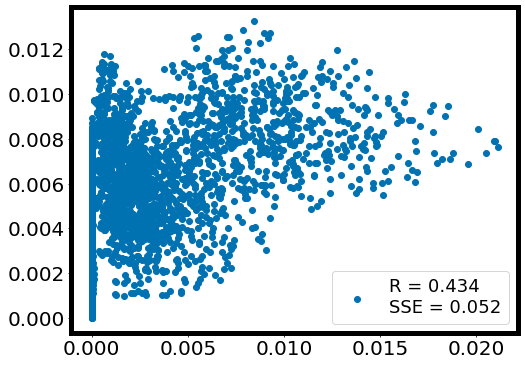

Running trial 16, cycle 2
Epoch: 0, Loss: 218.94930, Residuals: -0.13030, Convergence:   inf
Epoch: 10, Loss: 184.49309, Residuals: -0.12271, Convergence: 0.017462
Epoch: 20, Loss: 155.15918, Residuals: -0.11585, Convergence: 0.017439
Epoch: 30, Loss: 130.59488, Residuals: -0.10931, Convergence: 0.017331
Epoch: 40, Loss: 110.08430, Residuals: -0.10308, Convergence: 0.017145
Epoch: 50, Loss: 93.03596, Residuals: -0.09701, Convergence: 0.016719
Epoch: 60, Loss: 78.83948, Residuals: -0.09130, Convergence: 0.016386
Epoch: 70, Loss: 67.05256, Residuals: -0.08582, Convergence: 0.016145
Epoch: 80, Loss: 57.31356, Residuals: -0.08050, Convergence: 0.015547
Epoch: 90, Loss: 49.18700, Residuals: -0.07539, Convergence: 0.015284
Epoch: 100, Loss: 42.35576, Residuals: -0.07067, Convergence: 0.014676
Epoch: 110, Loss: 36.73006, Residuals: -0.06625, Convergence: 0.013880
Epoch: 120, Loss: 31.99033, Residuals: -0.06233, Convergence: 0.014234
Epoch: 130, Loss: 28.04946, Residuals: -0.05893, Convergence

Epoch: 990, Loss: 72.26402, Residuals: -0.00711, Convergence: 0.001652
Epoch: 1000, Loss: 71.35606, Residuals: -0.00703, Convergence: 0.001353

Epoch: 1001, Evidence: 534.52258, Convergence: 0.027287
Epoch: 1010, Loss: 75.71362, Residuals: -0.00719, Convergence: 0.001946
Epoch: 1020, Loss: 74.48837, Residuals: -0.00727, Convergence: 0.001526
Epoch: 1030, Loss: 73.43452, Residuals: -0.00731, Convergence: 0.001516
Epoch: 1040, Loss: 72.51477, Residuals: -0.00727, Convergence: 0.001242

Epoch: 1042, Evidence: 538.39465, Convergence: 0.007192
Epoch: 1050, Loss: 76.67181, Residuals: -0.00744, Convergence: 0.001858
Epoch: 1060, Loss: 75.45378, Residuals: -0.00758, Convergence: 0.001588
Epoch: 1070, Loss: 74.43643, Residuals: -0.00763, Convergence: 0.000912

Epoch: 1070, Evidence: 541.76233, Convergence: 0.006216
Epoch: 1070, Loss: 79.43155, Residuals: -0.00763, Convergence:   inf
Epoch: 1080, Loss: 78.00855, Residuals: -0.00786, Convergence: 0.001731
Epoch: 1090, Loss: 76.80864, Residuals: -

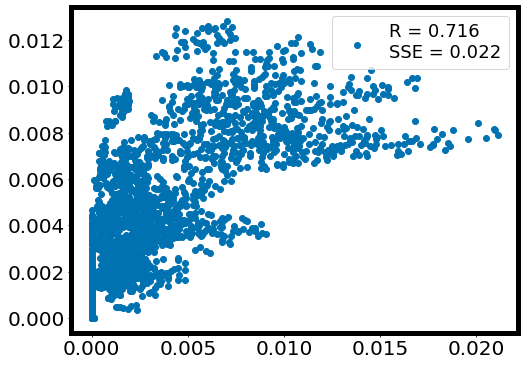

Running trial 16, cycle 3
Epoch: 0, Loss: 333.72072, Residuals: -0.14287, Convergence:   inf
Epoch: 10, Loss: 282.24954, Residuals: -0.13288, Convergence: 0.016989
Epoch: 20, Loss: 238.37599, Residuals: -0.12350, Convergence: 0.017034
Epoch: 30, Loss: 201.51494, Residuals: -0.11438, Convergence: 0.016843
Epoch: 40, Loss: 170.91309, Residuals: -0.10565, Convergence: 0.016454
Epoch: 50, Loss: 145.42581, Residuals: -0.09723, Convergence: 0.016113
Epoch: 60, Loss: 124.45911, Residuals: -0.08911, Convergence: 0.015049
Epoch: 70, Loss: 106.94035, Residuals: -0.08157, Convergence: 0.015149
Epoch: 80, Loss: 92.30540, Residuals: -0.07480, Convergence: 0.014644
Epoch: 90, Loss: 79.98947, Residuals: -0.06835, Convergence: 0.014414
Epoch: 100, Loss: 69.62527, Residuals: -0.06259, Convergence: 0.013521
Epoch: 110, Loss: 60.88652, Residuals: -0.05723, Convergence: 0.013134
Epoch: 120, Loss: 53.49850, Residuals: -0.05234, Convergence: 0.012246
Epoch: 130, Loss: 47.29352, Residuals: -0.04793, Converge

Epoch: 940, Loss: 167.81636, Residuals: -0.01471, Convergence: 0.001736

Epoch: 944, Evidence: 829.10138, Convergence: 0.000559
Epoch: 950, Loss: 166.10225, Residuals: -0.01843, Convergence: 0.003419
Epoch: 960, Loss: 161.69208, Residuals: -0.02023, Convergence: 0.002759

Epoch: 969, Evidence: 813.10840, Convergence: -0.019099
Epoch: 970, Loss: 175.50932, Residuals: -0.01399, Convergence: 0.002810
Epoch: 980, Loss: 171.66403, Residuals: -0.01497, Convergence: 0.001208
Epoch: 990, Loss: 168.56860, Residuals: -0.01528, Convergence: 0.001718
Epoch: 1000, Loss: 165.97646, Residuals: -0.01506, Convergence: 0.001305

Epoch: 1001, Evidence: 826.60541, Convergence: -0.002459


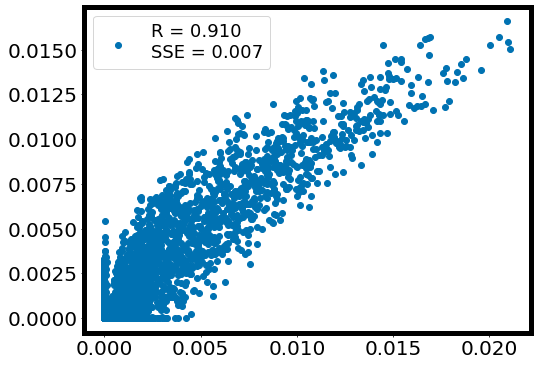

Running trial 16, cycle 4
Epoch: 0, Loss: 386.69969, Residuals: -0.09787, Convergence:   inf
Epoch: 10, Loss: 328.21741, Residuals: -0.09147, Convergence: 0.016661
Epoch: 20, Loss: 278.25748, Residuals: -0.08525, Convergence: 0.016582
Epoch: 30, Loss: 236.49397, Residuals: -0.07935, Convergence: 0.016226
Epoch: 40, Loss: 201.79907, Residuals: -0.07371, Convergence: 0.015803
Epoch: 50, Loss: 172.93329, Residuals: -0.06827, Convergence: 0.015418
Epoch: 60, Loss: 148.90956, Residuals: -0.06305, Convergence: 0.014789
Epoch: 70, Loss: 128.94225, Residuals: -0.05821, Convergence: 0.014337
Epoch: 80, Loss: 112.09063, Residuals: -0.05366, Convergence: 0.013990
Epoch: 90, Loss: 97.89677, Residuals: -0.04953, Convergence: 0.013479
Epoch: 100, Loss: 86.04579, Residuals: -0.04567, Convergence: 0.012676
Epoch: 110, Loss: 76.06258, Residuals: -0.04212, Convergence: 0.012312
Epoch: 120, Loss: 67.51491, Residuals: -0.03904, Convergence: 0.011818
Epoch: 130, Loss: 60.20329, Residuals: -0.03644, Converg

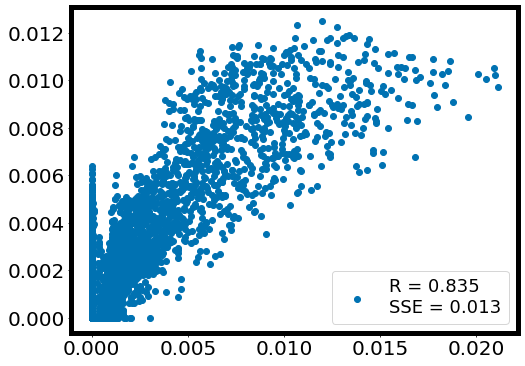

Running trial 16, cycle 5
Epoch: 0, Loss: 516.03136, Residuals: -0.07315, Convergence:   inf
Epoch: 10, Loss: 437.42969, Residuals: -0.06857, Convergence: 0.016757
Epoch: 20, Loss: 370.59247, Residuals: -0.06399, Convergence: 0.016640
Epoch: 30, Loss: 314.68195, Residuals: -0.05979, Convergence: 0.016346
Epoch: 40, Loss: 268.15384, Residuals: -0.05589, Convergence: 0.015894
Epoch: 50, Loss: 229.83730, Residuals: -0.05185, Convergence: 0.015330
Epoch: 60, Loss: 198.04042, Residuals: -0.04796, Convergence: 0.014696
Epoch: 70, Loss: 171.73779, Residuals: -0.04440, Convergence: 0.014068
Epoch: 80, Loss: 150.10204, Residuals: -0.04109, Convergence: 0.013291
Epoch: 90, Loss: 132.19614, Residuals: -0.03808, Convergence: 0.012384
Epoch: 100, Loss: 117.23050, Residuals: -0.03533, Convergence: 0.011712
Epoch: 110, Loss: 104.51738, Residuals: -0.03277, Convergence: 0.011504
Epoch: 120, Loss: 93.67247, Residuals: -0.03033, Convergence: 0.010662
Epoch: 130, Loss: 84.51500, Residuals: -0.02803, Conv

Epoch: 950, Loss: 322.49933, Residuals: -0.00383, Convergence: 0.001644
Epoch: 960, Loss: 317.94952, Residuals: -0.00383, Convergence: 0.001090

Epoch: 964, Evidence: 1543.22339, Convergence: 0.000748
Epoch: 970, Loss: 313.51160, Residuals: -0.00460, Convergence: 0.001902
Epoch: 980, Loss: 307.49396, Residuals: -0.00493, Convergence: 0.001624

Epoch: 983, Evidence: 1535.93921, Convergence: -0.003991


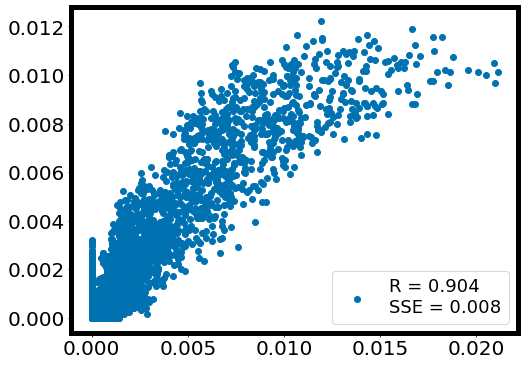

Epoch: 0, Loss: 666.09203, Residuals: 0.08584, Convergence:   inf
Epoch: 10, Loss: 563.51831, Residuals: 0.07590, Convergence: 0.017033
Epoch: 20, Loss: 476.35730, Residuals: 0.06744, Convergence: 0.016830
Epoch: 30, Loss: 404.03864, Residuals: 0.05998, Convergence: 0.016400
Epoch: 40, Loss: 344.52982, Residuals: 0.05347, Convergence: 0.015786
Epoch: 50, Loss: 295.60419, Residuals: 0.04766, Convergence: 0.015173
Epoch: 60, Loss: 255.28947, Residuals: 0.04239, Convergence: 0.014407
Epoch: 70, Loss: 221.58630, Residuals: 0.03741, Convergence: 0.014044
Epoch: 80, Loss: 193.33955, Residuals: 0.03281, Convergence: 0.013473
Epoch: 90, Loss: 169.61174, Residuals: 0.02863, Convergence: 0.013044
Epoch: 100, Loss: 149.51752, Residuals: 0.02495, Convergence: 0.012341
Epoch: 110, Loss: 132.81728, Residuals: 0.02195, Convergence: 0.011687
Epoch: 120, Loss: 118.77054, Residuals: 0.01932, Convergence: 0.011074
Epoch: 130, Loss: 106.83871, Residuals: 0.01702, Convergence: 0.010521
Epoch: 140, Loss: 96

Epoch: 950, Loss: 397.77615, Residuals: 0.00456, Convergence: 0.001954

Epoch: 956, Evidence: 1928.53394, Convergence: -0.002247


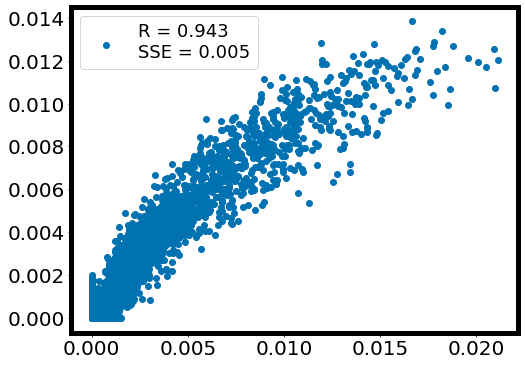

Running trial 17, cycle 1
Epoch: 0, Loss: 181.12935, Residuals: -0.46471, Convergence:   inf
Epoch: 10, Loss: 152.12517, Residuals: -0.43319, Convergence: 0.017663
Epoch: 20, Loss: 127.70774, Residuals: -0.40408, Convergence: 0.017604
Epoch: 30, Loss: 107.34731, Residuals: -0.37748, Convergence: 0.017449
Epoch: 40, Loss: 90.36206, Residuals: -0.35331, Convergence: 0.017301
Epoch: 50, Loss: 76.12265, Residuals: -0.33113, Convergence: 0.017269
Epoch: 60, Loss: 64.14981, Residuals: -0.31104, Convergence: 0.017275
Epoch: 70, Loss: 54.04264, Residuals: -0.29299, Convergence: 0.017359
Epoch: 80, Loss: 45.57194, Residuals: -0.27719, Convergence: 0.017141
Epoch: 90, Loss: 38.51611, Residuals: -0.26311, Convergence: 0.016743
Epoch: 100, Loss: 32.65284, Residuals: -0.25035, Convergence: 0.016522
Epoch: 110, Loss: 27.81762, Residuals: -0.23875, Convergence: 0.015858
Epoch: 120, Loss: 23.83215, Residuals: -0.22834, Convergence: 0.015179
Epoch: 130, Loss: 20.53776, Residuals: -0.21885, Convergence:

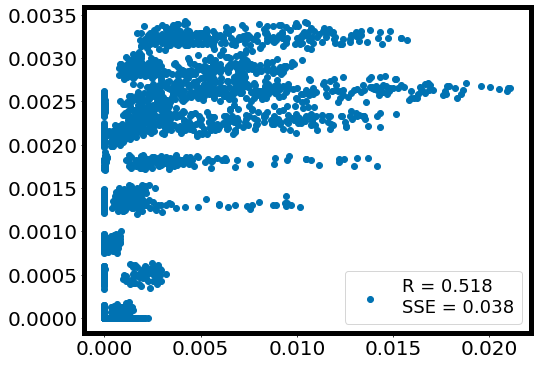

Running trial 17, cycle 2
Epoch: 0, Loss: 247.65323, Residuals: -0.25617, Convergence:   inf
Epoch: 10, Loss: 209.54193, Residuals: -0.24135, Convergence: 0.016973
Epoch: 20, Loss: 176.90575, Residuals: -0.22837, Convergence: 0.017139
Epoch: 30, Loss: 149.23538, Residuals: -0.21693, Convergence: 0.017151
Epoch: 40, Loss: 125.93076, Residuals: -0.20643, Convergence: 0.017094
Epoch: 50, Loss: 106.35990, Residuals: -0.19626, Convergence: 0.016969
Epoch: 60, Loss: 90.01215, Residuals: -0.18599, Convergence: 0.016670
Epoch: 70, Loss: 76.50143, Residuals: -0.17509, Convergence: 0.016279
Epoch: 80, Loss: 65.13231, Residuals: -0.16438, Convergence: 0.015930
Epoch: 90, Loss: 55.64260, Residuals: -0.15393, Convergence: 0.016019
Epoch: 100, Loss: 47.66319, Residuals: -0.14370, Convergence: 0.015472
Epoch: 110, Loss: 41.12269, Residuals: -0.13298, Convergence: 0.014815
Epoch: 120, Loss: 35.73004, Residuals: -0.12263, Convergence: 0.013820
Epoch: 130, Loss: 31.26958, Residuals: -0.11278, Convergenc


Epoch: 918, Evidence: 541.07159, Convergence: 0.003367
Epoch: 920, Loss: 107.88809, Residuals: 0.00172, Convergence: 0.001212

Epoch: 923, Evidence: 543.41321, Convergence: 0.004309
Epoch: 930, Loss: 108.70422, Residuals: 0.00169, Convergence: 0.001101

Epoch: 932, Evidence: 544.01691, Convergence: 0.001110

Epoch: 937, Evidence: 543.90161, Convergence: -0.000212
Epoch: 940, Loss: 109.88835, Residuals: 0.00158, Convergence: 0.002561
Epoch: 950, Loss: 107.62580, Residuals: 0.00124, Convergence: 0.001944
Epoch: 960, Loss: 105.58278, Residuals: 0.00098, Convergence: 0.001478
Epoch: 970, Loss: 103.72864, Residuals: 0.00072, Convergence: 0.001904

Epoch: 978, Evidence: 538.79346, Convergence: -0.009695


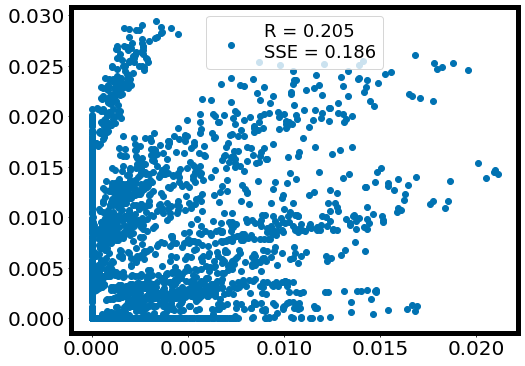

Running trial 17, cycle 3
Epoch: 0, Loss: 425.58809, Residuals: 0.07731, Convergence:   inf
Epoch: 10, Loss: 358.18463, Residuals: 0.06557, Convergence: 0.017510
Epoch: 20, Loss: 300.67868, Residuals: 0.05448, Convergence: 0.017794
Epoch: 30, Loss: 251.75961, Residuals: 0.04465, Convergence: 0.017980
Epoch: 40, Loss: 210.82982, Residuals: 0.03678, Convergence: 0.017982
Epoch: 50, Loss: 176.76534, Residuals: 0.03006, Convergence: 0.017566
Epoch: 60, Loss: 148.67178, Residuals: 0.02464, Convergence: 0.016957
Epoch: 70, Loss: 126.09525, Residuals: 0.02108, Convergence: 0.015535
Epoch: 80, Loss: 107.69553, Residuals: 0.01850, Convergence: 0.015668
Epoch: 90, Loss: 92.33999, Residuals: 0.01632, Convergence: 0.016102
Epoch: 100, Loss: 79.77236, Residuals: 0.01460, Convergence: 0.015223
Epoch: 110, Loss: 69.12433, Residuals: 0.01273, Convergence: 0.012000
Epoch: 120, Loss: 60.14345, Residuals: 0.01085, Convergence: 0.014489
Epoch: 130, Loss: 52.81384, Residuals: 0.00927, Convergence: 0.013781

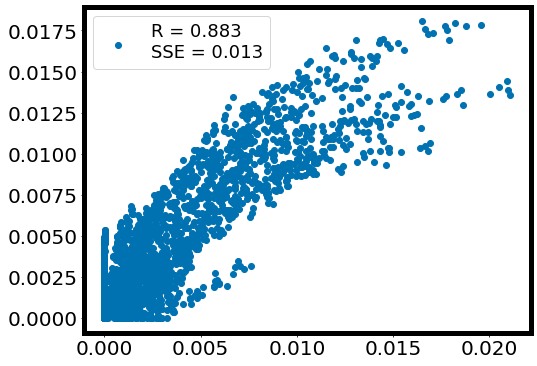

Running trial 17, cycle 4
Epoch: 0, Loss: 537.16716, Residuals: 0.14609, Convergence:   inf
Epoch: 10, Loss: 452.73770, Residuals: 0.12881, Convergence: 0.017322
Epoch: 20, Loss: 381.06879, Residuals: 0.11288, Convergence: 0.017461
Epoch: 30, Loss: 320.23129, Residuals: 0.09888, Convergence: 0.017639
Epoch: 40, Loss: 269.05582, Residuals: 0.08617, Convergence: 0.017492
Epoch: 50, Loss: 226.90727, Residuals: 0.07532, Convergence: 0.016988
Epoch: 60, Loss: 192.55310, Residuals: 0.06646, Convergence: 0.016117
Epoch: 70, Loss: 164.30376, Residuals: 0.05916, Convergence: 0.015844
Epoch: 80, Loss: 140.78395, Residuals: 0.05272, Convergence: 0.015515
Epoch: 90, Loss: 121.14549, Residuals: 0.04735, Convergence: 0.014934
Epoch: 100, Loss: 104.56214, Residuals: 0.04235, Convergence: 0.014622
Epoch: 110, Loss: 90.70861, Residuals: 0.03797, Convergence: 0.014043
Epoch: 120, Loss: 79.10384, Residuals: 0.03410, Convergence: 0.013566
Epoch: 130, Loss: 69.37100, Residuals: 0.03055, Convergence: 0.0129

Epoch: 930, Loss: 258.96616, Residuals: -0.00276, Convergence: 0.001331

Epoch: 935, Evidence: 1169.46118, Convergence: 0.001321
Epoch: 940, Loss: 259.96109, Residuals: -0.00285, Convergence: 0.001507

Epoch: 946, Evidence: 1170.02844, Convergence: 0.000485
Epoch: 950, Loss: 257.39160, Residuals: -0.00405, Convergence: 0.003173
Epoch: 960, Loss: 252.25671, Residuals: -0.00487, Convergence: 0.001270
Epoch: 970, Loss: 248.48740, Residuals: -0.00434, Convergence: 0.001510

Epoch: 971, Evidence: 1166.29358, Convergence: -0.002716
Epoch: 980, Loss: 262.29608, Residuals: -0.00306, Convergence: 0.001515
Epoch: 990, Loss: 258.91580, Residuals: -0.00316, Convergence: 0.001028

Epoch: 993, Evidence: 1173.27148, Convergence: 0.003248
Epoch: 1000, Loss: 258.98984, Residuals: -0.00333, Convergence: 0.001372

Epoch: 1004, Evidence: 1173.72827, Convergence: 0.000389
Epoch: 1010, Loss: 255.68797, Residuals: -0.00471, Convergence: 0.002321
Epoch: 1020, Loss: 250.70032, Residuals: -0.00509, Convergence:

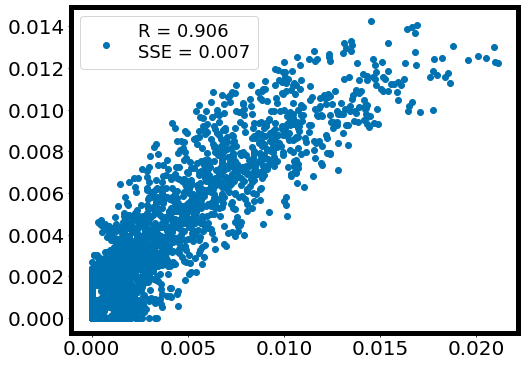

Running trial 17, cycle 5
Epoch: 0, Loss: 619.83373, Residuals: 0.09392, Convergence:   inf
Epoch: 10, Loss: 522.93695, Residuals: 0.08269, Convergence: 0.017243
Epoch: 20, Loss: 440.51517, Residuals: 0.07250, Convergence: 0.017389
Epoch: 30, Loss: 370.51801, Residuals: 0.06291, Convergence: 0.017458
Epoch: 40, Loss: 311.62335, Residuals: 0.05369, Convergence: 0.017390
Epoch: 50, Loss: 263.21790, Residuals: 0.04595, Convergence: 0.016719
Epoch: 60, Loss: 224.05875, Residuals: 0.04031, Convergence: 0.015949
Epoch: 70, Loss: 191.98442, Residuals: 0.03590, Convergence: 0.015296
Epoch: 80, Loss: 165.25882, Residuals: 0.03246, Convergence: 0.014939
Epoch: 90, Loss: 142.96709, Residuals: 0.02935, Convergence: 0.014409
Epoch: 100, Loss: 124.31734, Residuals: 0.02674, Convergence: 0.014065
Epoch: 110, Loss: 108.48483, Residuals: 0.02435, Convergence: 0.013394
Epoch: 120, Loss: 95.08514, Residuals: 0.02198, Convergence: 0.012734
Epoch: 130, Loss: 83.69838, Residuals: 0.01970, Convergence: 0.012

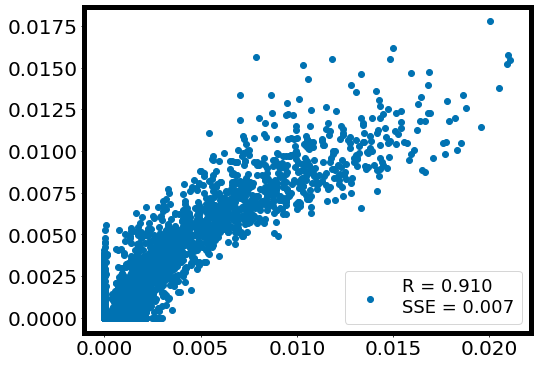

Epoch: 0, Loss: 743.48576, Residuals: 0.11778, Convergence:   inf
Epoch: 10, Loss: 626.94086, Residuals: 0.10476, Convergence: 0.017315
Epoch: 20, Loss: 527.90485, Residuals: 0.09271, Convergence: 0.017395
Epoch: 30, Loss: 444.10455, Residuals: 0.08108, Convergence: 0.017449
Epoch: 40, Loss: 373.87708, Residuals: 0.06991, Convergence: 0.017207
Epoch: 50, Loss: 316.49902, Residuals: 0.06131, Convergence: 0.016411
Epoch: 60, Loss: 269.51263, Residuals: 0.05456, Convergence: 0.015903
Epoch: 70, Loss: 230.76324, Residuals: 0.04952, Convergence: 0.015297
Epoch: 80, Loss: 198.30371, Residuals: 0.04477, Convergence: 0.015123
Epoch: 90, Loss: 171.25679, Residuals: 0.04057, Convergence: 0.014628
Epoch: 100, Loss: 148.68283, Residuals: 0.03674, Convergence: 0.014040
Epoch: 110, Loss: 129.76401, Residuals: 0.03323, Convergence: 0.013548
Epoch: 120, Loss: 113.87350, Residuals: 0.03008, Convergence: 0.013085
Epoch: 130, Loss: 100.30146, Residuals: 0.02734, Convergence: 0.012425
Epoch: 140, Loss: 88

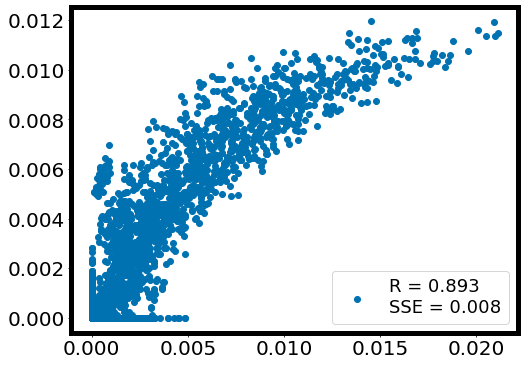

Running trial 18, cycle 1
Epoch: 0, Loss: 106.41031, Residuals: -0.60989, Convergence:   inf
Epoch: 10, Loss: 90.57183, Residuals: -0.56197, Convergence: 0.016449
Epoch: 20, Loss: 76.86115, Residuals: -0.51938, Convergence: 0.016583
Epoch: 30, Loss: 65.21251, Residuals: -0.48126, Convergence: 0.016551
Epoch: 40, Loss: 55.36113, Residuals: -0.44674, Convergence: 0.016476
Epoch: 50, Loss: 47.03918, Residuals: -0.41535, Convergence: 0.016367
Epoch: 60, Loss: 40.06770, Residuals: -0.38626, Convergence: 0.016119
Epoch: 70, Loss: 34.19198, Residuals: -0.35964, Convergence: 0.015758
Epoch: 80, Loss: 29.28347, Residuals: -0.33530, Convergence: 0.015471
Epoch: 90, Loss: 25.17641, Residuals: -0.31300, Convergence: 0.015150
Epoch: 100, Loss: 21.72262, Residuals: -0.29295, Convergence: 0.014931
Epoch: 110, Loss: 18.84141, Residuals: -0.27475, Convergence: 0.014233
Epoch: 120, Loss: 16.47964, Residuals: -0.25808, Convergence: 0.013689
Epoch: 130, Loss: 14.51859, Residuals: -0.24305, Convergence: 0.

Epoch: 850, Loss: 45.65701, Residuals: 0.00203, Convergence: 0.002876

Epoch: 859, Evidence: 226.71552, Convergence: 0.008029
Epoch: 860, Loss: 46.37153, Residuals: 0.00265, Convergence: 0.002748
Epoch: 870, Loss: 45.21502, Residuals: 0.00280, Convergence: 0.003059

Epoch: 877, Evidence: 227.08733, Convergence: 0.001637
Epoch: 880, Loss: 45.82997, Residuals: 0.00306, Convergence: 0.002244

Epoch: 881, Evidence: 230.25729, Convergence: 0.013767
Epoch: 890, Loss: 46.33488, Residuals: 0.00318, Convergence: 0.003045

Epoch: 896, Evidence: 230.51115, Convergence: 0.001101
Epoch: 900, Loss: 46.76138, Residuals: 0.00314, Convergence: 0.002339

Epoch: 902, Evidence: 231.72501, Convergence: 0.005238
Epoch: 910, Loss: 47.07015, Residuals: 0.00323, Convergence: 0.002857

Epoch: 915, Evidence: 232.63904, Convergence: 0.003929
Epoch: 920, Loss: 47.36772, Residuals: 0.00312, Convergence: 0.002796
Epoch: 930, Loss: 46.22536, Residuals: 0.00315, Convergence: 0.002676

Epoch: 934, Evidence: 232.02774, 

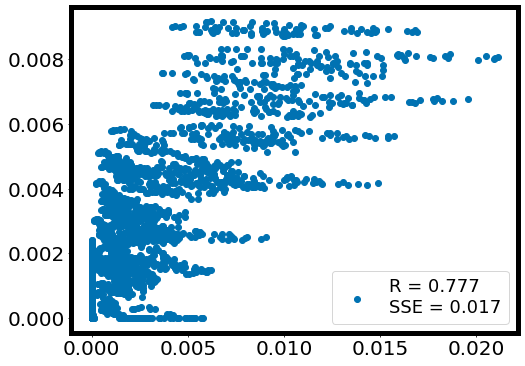

Running trial 18, cycle 2
Epoch: 0, Loss: 220.47624, Residuals: -0.15442, Convergence:   inf
Epoch: 10, Loss: 187.20955, Residuals: -0.14447, Convergence: 0.016580
Epoch: 20, Loss: 158.67694, Residuals: -0.13539, Convergence: 0.016760
Epoch: 30, Loss: 134.23357, Residuals: -0.12690, Convergence: 0.016950
Epoch: 40, Loss: 113.43303, Residuals: -0.11868, Convergence: 0.016841
Epoch: 50, Loss: 95.89816, Residuals: -0.11087, Convergence: 0.016933
Epoch: 60, Loss: 81.13018, Residuals: -0.10353, Convergence: 0.016791
Epoch: 70, Loss: 68.79314, Residuals: -0.09674, Convergence: 0.016514
Epoch: 80, Loss: 58.50427, Residuals: -0.09052, Convergence: 0.016175
Epoch: 90, Loss: 49.89766, Residuals: -0.08480, Convergence: 0.015892
Epoch: 100, Loss: 42.75852, Residuals: -0.07933, Convergence: 0.015337
Epoch: 110, Loss: 36.82599, Residuals: -0.07410, Convergence: 0.014720
Epoch: 120, Loss: 31.89291, Residuals: -0.06936, Convergence: 0.013813
Epoch: 130, Loss: 27.85670, Residuals: -0.06506, Convergence


Epoch: 872, Evidence: 537.27545, Convergence: -0.001752

Epoch: 873, Evidence: 539.56000, Convergence: 0.002490

Epoch: 874, Evidence: 540.51697, Convergence: 0.001770

Epoch: 875, Evidence: 541.08472, Convergence: 0.001049

Epoch: 876, Evidence: 541.93237, Convergence: 0.001564

Epoch: 877, Evidence: 542.66626, Convergence: 0.001352

Epoch: 878, Evidence: 542.00305, Convergence: -0.001224


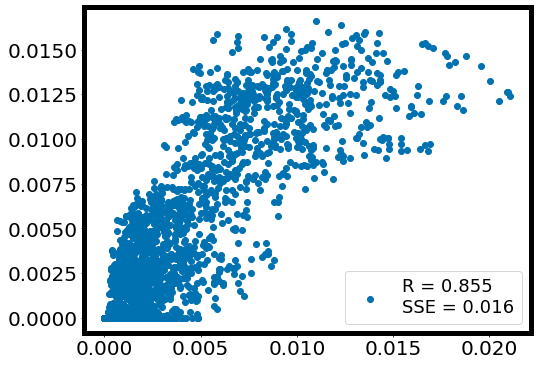

Running trial 18, cycle 3
Epoch: 0, Loss: 306.45274, Residuals: -0.06087, Convergence:   inf
Epoch: 10, Loss: 260.93997, Residuals: -0.05872, Convergence: 0.016315
Epoch: 20, Loss: 221.68651, Residuals: -0.05679, Convergence: 0.016500
Epoch: 30, Loss: 188.16762, Residuals: -0.05499, Convergence: 0.016537
Epoch: 40, Loss: 159.84993, Residuals: -0.05314, Convergence: 0.016352
Epoch: 50, Loss: 136.13495, Residuals: -0.05131, Convergence: 0.016026
Epoch: 60, Loss: 116.40595, Residuals: -0.04925, Convergence: 0.015560
Epoch: 70, Loss: 100.17406, Residuals: -0.04682, Convergence: 0.014627
Epoch: 80, Loss: 86.73132, Residuals: -0.04439, Convergence: 0.014423
Epoch: 90, Loss: 75.47466, Residuals: -0.04160, Convergence: 0.013860
Epoch: 100, Loss: 66.05885, Residuals: -0.03891, Convergence: 0.013223
Epoch: 110, Loss: 58.07799, Residuals: -0.03631, Convergence: 0.012444
Epoch: 120, Loss: 51.39466, Residuals: -0.03390, Convergence: 0.012095
Epoch: 130, Loss: 45.81712, Residuals: -0.03150, Converge

Epoch: 970, Loss: 161.79076, Residuals: -0.00750, Convergence: 0.001994

Epoch: 973, Evidence: 862.72754, Convergence: 0.002438
Epoch: 980, Loss: 164.59309, Residuals: -0.00817, Convergence: 0.002109
Epoch: 990, Loss: 161.73138, Residuals: -0.00847, Convergence: 0.001727
Epoch: 1000, Loss: 159.28012, Residuals: -0.00838, Convergence: 0.001331

Epoch: 1008, Evidence: 860.05426, Convergence: -0.003108
Epoch: 1010, Loss: 169.68340, Residuals: -0.00757, Convergence: 0.001239
Epoch: 1020, Loss: 167.56653, Residuals: -0.00757, Convergence: 0.001137

Epoch: 1023, Evidence: 872.90057, Convergence: 0.011654
Epoch: 1030, Loss: 170.13266, Residuals: -0.00752, Convergence: 0.001052
Epoch: 1040, Loss: 168.17769, Residuals: -0.00745, Convergence: 0.001102

Epoch: 1041, Evidence: 871.41785, Convergence: -0.001702

Epoch: 1042, Evidence: 878.00989, Convergence: 0.005819

Epoch: 1043, Evidence: 880.35144, Convergence: 0.002660

Epoch: 1044, Evidence: 876.96826, Convergence: -0.003858


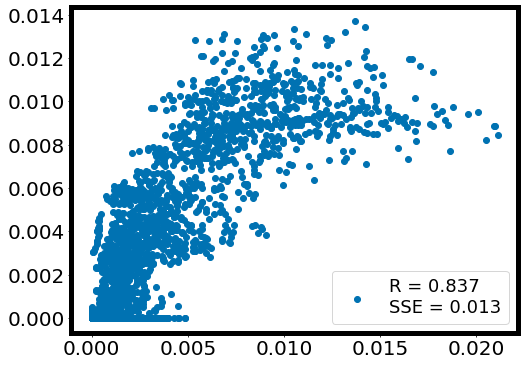

Running trial 18, cycle 4
Epoch: 0, Loss: 423.16405, Residuals: 0.03802, Convergence:   inf
Epoch: 10, Loss: 358.91058, Residuals: 0.03084, Convergence: 0.016672
Epoch: 20, Loss: 303.98340, Residuals: 0.02441, Convergence: 0.016778
Epoch: 30, Loss: 257.52124, Residuals: 0.01905, Convergence: 0.016575
Epoch: 40, Loss: 218.78711, Residuals: 0.01460, Convergence: 0.016284
Epoch: 50, Loss: 186.56499, Residuals: 0.01108, Convergence: 0.015865
Epoch: 60, Loss: 159.85794, Residuals: 0.00835, Convergence: 0.015329
Epoch: 70, Loss: 137.75772, Residuals: 0.00619, Convergence: 0.014818
Epoch: 80, Loss: 119.30238, Residuals: 0.00440, Convergence: 0.014337
Epoch: 90, Loss: 103.76421, Residuals: 0.00315, Convergence: 0.013591
Epoch: 100, Loss: 90.71725, Residuals: 0.00239, Convergence: 0.012963
Epoch: 110, Loss: 79.70380, Residuals: 0.00161, Convergence: 0.013087
Epoch: 120, Loss: 70.31697, Residuals: 0.00130, Convergence: 0.012808
Epoch: 130, Loss: 62.27227, Residuals: 0.00104, Convergence: 0.01280

Epoch: 1000, Loss: 241.24515, Residuals: -0.00355, Convergence: 0.002155
Epoch: 1010, Loss: 236.39027, Residuals: -0.00377, Convergence: 0.001715
Epoch: 1020, Loss: 232.35065, Residuals: -0.00378, Convergence: 0.001537

Epoch: 1023, Evidence: 1266.09302, Convergence: 0.005690
Epoch: 1030, Loss: 236.66888, Residuals: -0.00424, Convergence: 0.002081
Epoch: 1040, Loss: 231.93842, Residuals: -0.00466, Convergence: 0.001965
Epoch: 1050, Loss: 228.04852, Residuals: -0.00477, Convergence: 0.001653
Epoch: 1060, Loss: 224.75162, Residuals: -0.00461, Convergence: 0.001320
Epoch: 1070, Loss: 221.91869, Residuals: -0.00437, Convergence: 0.001182

Epoch: 1074, Evidence: 1258.99731, Convergence: -0.005636


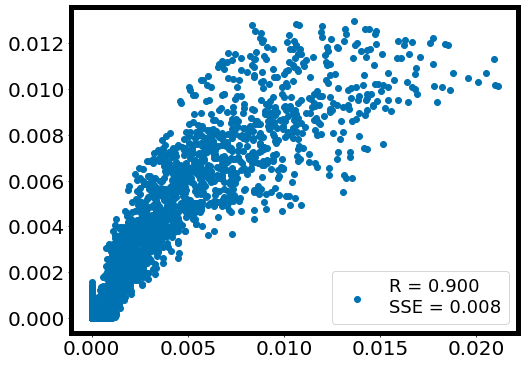

Running trial 18, cycle 5
Epoch: 0, Loss: 468.96394, Residuals: -0.01643, Convergence:   inf
Epoch: 10, Loss: 399.90726, Residuals: -0.01737, Convergence: 0.016180
Epoch: 20, Loss: 340.44754, Residuals: -0.01828, Convergence: 0.016225
Epoch: 30, Loss: 290.18985, Residuals: -0.01871, Convergence: 0.015908
Epoch: 40, Loss: 248.30016, Residuals: -0.01874, Convergence: 0.015493
Epoch: 50, Loss: 213.53400, Residuals: -0.01831, Convergence: 0.015018
Epoch: 60, Loss: 184.61824, Residuals: -0.01775, Convergence: 0.014372
Epoch: 70, Loss: 160.79590, Residuals: -0.01678, Convergence: 0.013674
Epoch: 80, Loss: 140.95720, Residuals: -0.01587, Convergence: 0.013017
Epoch: 90, Loss: 124.40402, Residuals: -0.01510, Convergence: 0.012459
Epoch: 100, Loss: 110.19759, Residuals: -0.01443, Convergence: 0.012113
Epoch: 110, Loss: 97.86711, Residuals: -0.01324, Convergence: 0.012033
Epoch: 120, Loss: 87.13298, Residuals: -0.01198, Convergence: 0.011678
Epoch: 130, Loss: 77.87930, Residuals: -0.01077, Conve

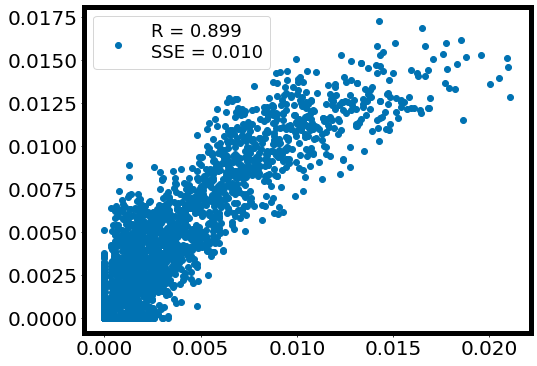

Epoch: 0, Loss: 577.06835, Residuals: 0.00669, Convergence:   inf
Epoch: 10, Loss: 491.74738, Residuals: 0.00373, Convergence: 0.016244
Epoch: 20, Loss: 418.45380, Residuals: 0.00130, Convergence: 0.016247
Epoch: 30, Loss: 356.73431, Residuals: -0.00068, Convergence: 0.015900
Epoch: 40, Loss: 305.28030, Residuals: -0.00233, Convergence: 0.015468
Epoch: 50, Loss: 262.57147, Residuals: -0.00361, Convergence: 0.014927
Epoch: 60, Loss: 227.26512, Residuals: -0.00445, Convergence: 0.014119
Epoch: 70, Loss: 197.93024, Residuals: -0.00518, Convergence: 0.013740
Epoch: 80, Loss: 173.21979, Residuals: -0.00563, Convergence: 0.013340
Epoch: 90, Loss: 152.04744, Residuals: -0.00575, Convergence: 0.013070
Epoch: 100, Loss: 133.72833, Residuals: -0.00594, Convergence: 0.012840
Epoch: 110, Loss: 118.07995, Residuals: -0.00605, Convergence: 0.012454
Epoch: 120, Loss: 104.31215, Residuals: -0.00615, Convergence: 0.012572
Epoch: 130, Loss: 92.46859, Residuals: -0.00629, Convergence: 0.012183
Epoch: 140

Epoch: 950, Loss: 389.93570, Residuals: -0.00952, Convergence: 0.001211

Epoch: 955, Evidence: 2041.30847, Convergence: -0.005351


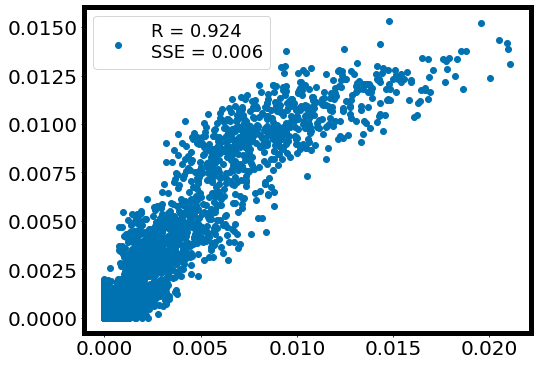

Running trial 19, cycle 1
Epoch: 0, Loss: 155.34532, Residuals: -0.83798, Convergence:   inf
Epoch: 10, Loss: 130.90843, Residuals: -0.77697, Convergence: 0.017323
Epoch: 20, Loss: 110.26941, Residuals: -0.72154, Convergence: 0.017258
Epoch: 30, Loss: 93.01219, Residuals: -0.67099, Convergence: 0.017083
Epoch: 40, Loss: 78.60098, Residuals: -0.62470, Convergence: 0.016945
Epoch: 50, Loss: 66.56039, Residuals: -0.58218, Convergence: 0.016607
Epoch: 60, Loss: 56.58175, Residuals: -0.54316, Convergence: 0.016175
Epoch: 70, Loss: 48.31459, Residuals: -0.50737, Convergence: 0.015680
Epoch: 80, Loss: 41.53054, Residuals: -0.47434, Convergence: 0.014856
Epoch: 90, Loss: 35.93842, Residuals: -0.44308, Convergence: 0.014443
Epoch: 100, Loss: 31.24431, Residuals: -0.41427, Convergence: 0.013855
Epoch: 110, Loss: 27.22092, Residuals: -0.38823, Convergence: 0.013646
Epoch: 120, Loss: 23.77197, Residuals: -0.36453, Convergence: 0.013587
Epoch: 130, Loss: 20.86367, Residuals: -0.34276, Convergence: 


Epoch: 834, Evidence: 221.47223, Convergence: -0.004696


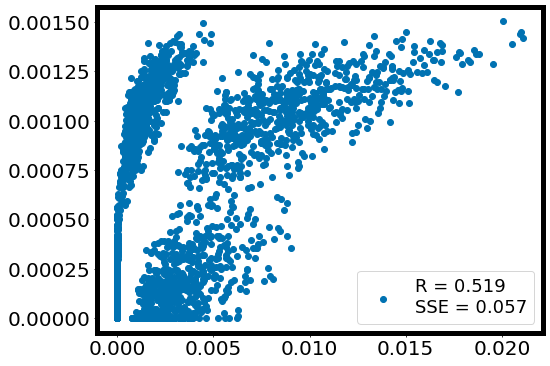

Running trial 19, cycle 2
Epoch: 0, Loss: 273.12352, Residuals: -0.12079, Convergence:   inf
Epoch: 10, Loss: 229.71939, Residuals: -0.11456, Convergence: 0.017566
Epoch: 20, Loss: 192.92093, Residuals: -0.10867, Convergence: 0.017646
Epoch: 30, Loss: 161.94362, Residuals: -0.10334, Convergence: 0.017647
Epoch: 40, Loss: 136.04059, Residuals: -0.09851, Convergence: 0.017514
Epoch: 50, Loss: 114.49263, Residuals: -0.09402, Convergence: 0.017284
Epoch: 60, Loss: 96.63745, Residuals: -0.08979, Convergence: 0.016956
Epoch: 70, Loss: 81.82204, Residuals: -0.08586, Convergence: 0.016679
Epoch: 80, Loss: 69.51532, Residuals: -0.08189, Convergence: 0.016271
Epoch: 90, Loss: 59.50813, Residuals: -0.07725, Convergence: 0.015921
Epoch: 100, Loss: 51.17344, Residuals: -0.07280, Convergence: 0.014690
Epoch: 110, Loss: 44.52121, Residuals: -0.06744, Convergence: 0.013859
Epoch: 120, Loss: 38.99970, Residuals: -0.06179, Convergence: 0.013839
Epoch: 130, Loss: 34.27457, Residuals: -0.05667, Convergenc

Epoch: 980, Loss: 77.28632, Residuals: -0.00667, Convergence: 0.001377
Epoch: 990, Loss: 75.95538, Residuals: -0.00683, Convergence: 0.001354
Epoch: 1000, Loss: 74.71229, Residuals: -0.00690, Convergence: 0.001650

Epoch: 1005, Evidence: 515.34393, Convergence: -0.003457
Epoch: 1010, Loss: 82.14084, Residuals: -0.00646, Convergence: 0.001141

Epoch: 1017, Evidence: 533.00012, Convergence: 0.029783
Epoch: 1020, Loss: 86.33350, Residuals: -0.00642, Convergence: 0.001180

Epoch: 1026, Evidence: 540.19934, Convergence: 0.013327
Epoch: 1030, Loss: 89.67115, Residuals: -0.00641, Convergence: 0.001329

Epoch: 1038, Evidence: 541.78027, Convergence: 0.002918
Epoch: 1040, Loss: 92.41860, Residuals: -0.00639, Convergence: 0.001390
Epoch: 1050, Loss: 91.29085, Residuals: -0.00638, Convergence: 0.001235
Epoch: 1060, Loss: 90.23029, Residuals: -0.00635, Convergence: 0.001141

Epoch: 1066, Evidence: 541.47717, Convergence: -0.000560
Epoch: 1070, Loss: 91.17377, Residuals: -0.00648, Convergence: 0.00

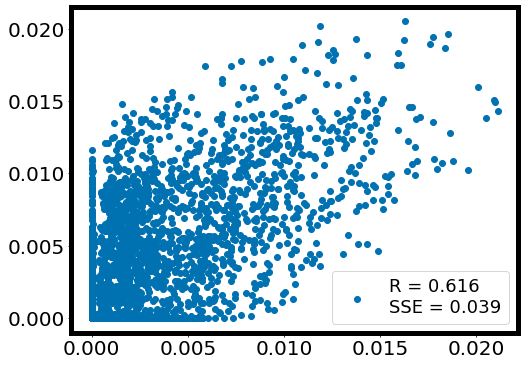

Running trial 19, cycle 3
Epoch: 0, Loss: 352.79628, Residuals: -0.03103, Convergence:   inf
Epoch: 10, Loss: 298.37326, Residuals: -0.03170, Convergence: 0.016902
Epoch: 20, Loss: 252.48769, Residuals: -0.03187, Convergence: 0.016783
Epoch: 30, Loss: 213.98254, Residuals: -0.03165, Convergence: 0.016596
Epoch: 40, Loss: 181.75032, Residuals: -0.03134, Convergence: 0.016394
Epoch: 50, Loss: 154.56839, Residuals: -0.03096, Convergence: 0.016164
Epoch: 60, Loss: 131.98312, Residuals: -0.03099, Convergence: 0.015561
Epoch: 70, Loss: 113.27922, Residuals: -0.03062, Convergence: 0.015480
Epoch: 80, Loss: 97.42924, Residuals: -0.02929, Convergence: 0.015105
Epoch: 90, Loss: 83.81307, Residuals: -0.02789, Convergence: 0.015155
Epoch: 100, Loss: 71.95699, Residuals: -0.02689, Convergence: 0.015425
Epoch: 110, Loss: 61.95561, Residuals: -0.02591, Convergence: 0.014664
Epoch: 120, Loss: 53.57185, Residuals: -0.02465, Convergence: 0.014338
Epoch: 130, Loss: 46.55965, Residuals: -0.02348, Converge

Epoch: 970, Loss: 165.11810, Residuals: -0.00530, Convergence: 0.001775

Epoch: 975, Evidence: 863.10284, Convergence: 0.001134
Epoch: 980, Loss: 167.08197, Residuals: -0.00534, Convergence: 0.001785

Epoch: 986, Evidence: 863.56982, Convergence: 0.000541
Epoch: 990, Loss: 166.09676, Residuals: -0.00601, Convergence: 0.003298
Epoch: 1000, Loss: 162.07309, Residuals: -0.00695, Convergence: 0.001267

Epoch: 1003, Evidence: 856.68799, Convergence: -0.007488
Epoch: 1010, Loss: 169.95297, Residuals: -0.00533, Convergence: 0.001051
Epoch: 1020, Loss: 167.31783, Residuals: -0.00545, Convergence: 0.001538
Epoch: 1030, Loss: 165.02455, Residuals: -0.00544, Convergence: 0.001316

Epoch: 1033, Evidence: 862.71472, Convergence: -0.000450
Epoch: 1040, Loss: 163.24510, Residuals: -0.00642, Convergence: 0.003065
Epoch: 1050, Loss: 159.59830, Residuals: -0.00711, Convergence: 0.001136
Epoch: 1060, Loss: 156.49872, Residuals: -0.00738, Convergence: 0.000830

Epoch: 1060, Evidence: 851.93170, Convergenc

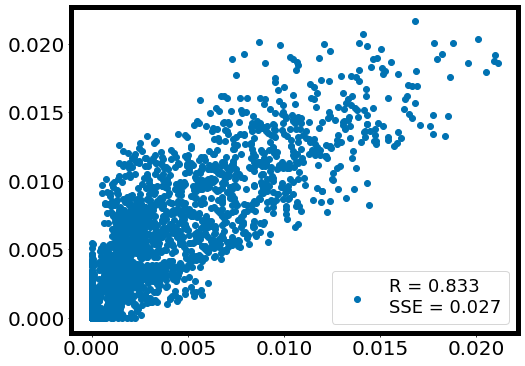

Running trial 19, cycle 4
Epoch: 0, Loss: 373.37337, Residuals: -0.08589, Convergence:   inf
Epoch: 10, Loss: 319.02301, Residuals: -0.08046, Convergence: 0.015821
Epoch: 20, Loss: 273.05466, Residuals: -0.07505, Convergence: 0.015562
Epoch: 30, Loss: 234.30421, Residuals: -0.06983, Convergence: 0.015296
Epoch: 40, Loss: 201.67026, Residuals: -0.06499, Convergence: 0.014982
Epoch: 50, Loss: 173.79903, Residuals: -0.06052, Convergence: 0.014872
Epoch: 60, Loss: 150.04924, Residuals: -0.05656, Convergence: 0.014806
Epoch: 70, Loss: 129.82465, Residuals: -0.05310, Convergence: 0.014583
Epoch: 80, Loss: 112.59870, Residuals: -0.04973, Convergence: 0.014132
Epoch: 90, Loss: 98.00535, Residuals: -0.04621, Convergence: 0.013907
Epoch: 100, Loss: 85.51582, Residuals: -0.04296, Convergence: 0.013657
Epoch: 110, Loss: 74.77592, Residuals: -0.03989, Convergence: 0.013408
Epoch: 120, Loss: 65.58302, Residuals: -0.03712, Convergence: 0.013218
Epoch: 130, Loss: 57.76067, Residuals: -0.03426, Converg


Epoch: 953, Evidence: 1243.97754, Convergence: -0.002688

Epoch: 958, Evidence: 1248.73193, Convergence: 0.001130
Epoch: 960, Loss: 254.43793, Residuals: -0.00443, Convergence: 0.001834

Epoch: 963, Evidence: 1248.66565, Convergence: -0.000053
Epoch: 970, Loss: 249.06064, Residuals: -0.00495, Convergence: 0.003151
Epoch: 980, Loss: 242.51749, Residuals: -0.00535, Convergence: 0.002240

Epoch: 981, Evidence: 1244.17749, Convergence: -0.003661


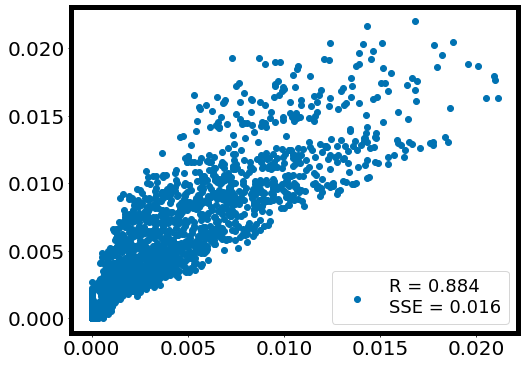

Running trial 19, cycle 5
Epoch: 0, Loss: 477.69344, Residuals: 0.08937, Convergence:   inf
Epoch: 10, Loss: 407.72406, Residuals: 0.07903, Convergence: 0.015917
Epoch: 20, Loss: 348.54242, Residuals: 0.07009, Convergence: 0.015728
Epoch: 30, Loss: 298.53290, Residuals: 0.06187, Convergence: 0.015476
Epoch: 40, Loss: 256.61023, Residuals: 0.05420, Convergence: 0.015088
Epoch: 50, Loss: 221.39098, Residuals: 0.04741, Convergence: 0.014766
Epoch: 60, Loss: 191.27991, Residuals: 0.04117, Convergence: 0.014635
Epoch: 70, Loss: 165.74939, Residuals: 0.03579, Convergence: 0.014286
Epoch: 80, Loss: 144.27306, Residuals: 0.03116, Convergence: 0.013749
Epoch: 90, Loss: 126.08601, Residuals: 0.02731, Convergence: 0.013510
Epoch: 100, Loss: 110.51492, Residuals: 0.02383, Convergence: 0.013090
Epoch: 110, Loss: 97.18245, Residuals: 0.02048, Convergence: 0.012999
Epoch: 120, Loss: 85.40431, Residuals: 0.01739, Convergence: 0.012978
Epoch: 130, Loss: 75.43501, Residuals: 0.01448, Convergence: 0.0120

Epoch: 960, Loss: 329.61246, Residuals: -0.00570, Convergence: 0.002038
Epoch: 970, Loss: 323.84738, Residuals: -0.00593, Convergence: 0.001419

Epoch: 976, Evidence: 1692.35425, Convergence: 0.001046
Epoch: 980, Loss: 323.14496, Residuals: -0.00592, Convergence: 0.000856

Epoch: 980, Evidence: 1693.77588, Convergence: 0.000839
Epoch: 980, Loss: 324.83594, Residuals: -0.00592, Convergence:   inf
Epoch: 990, Loss: 315.99048, Residuals: -0.00747, Convergence: 0.002836

Epoch: 991, Evidence: 1690.11548, Convergence: -0.001325

Epoch: 995, Evidence: 1695.50488, Convergence: 0.001858
Epoch: 1000, Loss: 325.39825, Residuals: -0.00609, Convergence: 0.001384
Epoch: 1010, Loss: 320.38702, Residuals: -0.00612, Convergence: 0.001707

Epoch: 1013, Evidence: 1694.12183, Convergence: -0.000816
Epoch: 1020, Loss: 315.14264, Residuals: -0.00711, Convergence: 0.001279

Epoch: 1024, Evidence: 1691.41748, Convergence: -0.002417


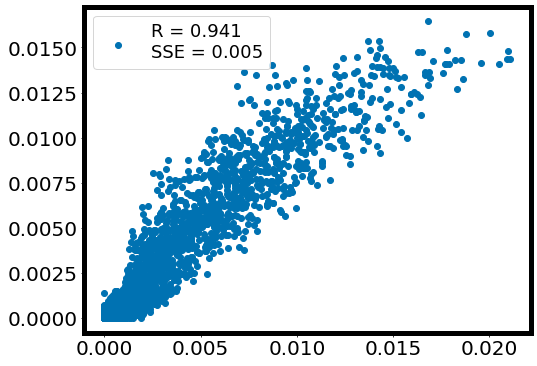

Epoch: 0, Loss: 546.60106, Residuals: 0.10822, Convergence:   inf
Epoch: 10, Loss: 466.80270, Residuals: 0.09656, Convergence: 0.015967
Epoch: 20, Loss: 398.41068, Residuals: 0.08635, Convergence: 0.015967
Epoch: 30, Loss: 340.18246, Residuals: 0.07685, Convergence: 0.015848
Epoch: 40, Loss: 291.55179, Residuals: 0.06801, Convergence: 0.015417
Epoch: 50, Loss: 250.85004, Residuals: 0.06034, Convergence: 0.014850
Epoch: 60, Loss: 216.94987, Residuals: 0.05364, Convergence: 0.014450
Epoch: 70, Loss: 188.28891, Residuals: 0.04772, Convergence: 0.014108
Epoch: 80, Loss: 164.06642, Residuals: 0.04269, Convergence: 0.013594
Epoch: 90, Loss: 143.46509, Residuals: 0.03808, Convergence: 0.013467
Epoch: 100, Loss: 125.69261, Residuals: 0.03378, Convergence: 0.013192
Epoch: 110, Loss: 110.56081, Residuals: 0.02964, Convergence: 0.012773
Epoch: 120, Loss: 97.58887, Residuals: 0.02561, Convergence: 0.012418
Epoch: 130, Loss: 86.46809, Residuals: 0.02191, Convergence: 0.011787
Epoch: 140, Loss: 77.0

Epoch: 950, Loss: 395.99756, Residuals: -0.00440, Convergence: 0.001330
Epoch: 960, Loss: 390.06067, Residuals: -0.00457, Convergence: 0.001579

Epoch: 963, Evidence: 1949.33740, Convergence: -0.000232
Epoch: 970, Loss: 383.38071, Residuals: -0.00561, Convergence: 0.002657
Epoch: 980, Loss: 375.31451, Residuals: -0.00599, Convergence: 0.001761
Epoch: 990, Loss: 369.75729, Residuals: -0.00545, Convergence: 0.001774

Epoch: 994, Evidence: 1935.93213, Convergence: -0.007159
Epoch: 1000, Loss: 399.58521, Residuals: -0.00446, Convergence: 0.001372
Epoch: 1010, Loss: 393.62000, Residuals: -0.00460, Convergence: 0.001448
Epoch: 1020, Loss: 388.11603, Residuals: -0.00465, Convergence: 0.001314

Epoch: 1024, Evidence: 1948.18701, Convergence: -0.000823
Epoch: 1030, Loss: 381.73410, Residuals: -0.00548, Convergence: 0.002759
Epoch: 1040, Loss: 373.80414, Residuals: -0.00590, Convergence: 0.001770

Epoch: 1041, Evidence: 1944.63733, Convergence: -0.002650


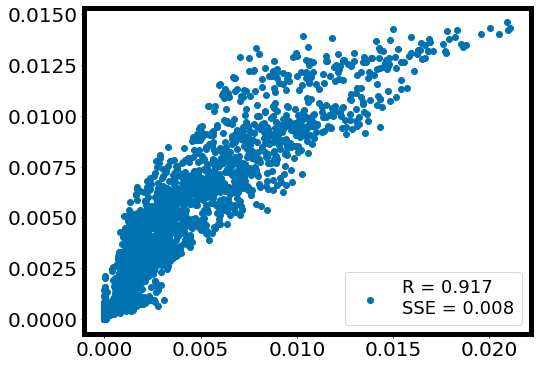

Running trial 20, cycle 1
Epoch: 0, Loss: 116.05398, Residuals: -0.67305, Convergence:   inf
Epoch: 10, Loss: 98.34035, Residuals: -0.62085, Convergence: 0.016816
Epoch: 20, Loss: 83.20352, Residuals: -0.57362, Convergence: 0.016864
Epoch: 30, Loss: 70.39860, Residuals: -0.53060, Convergence: 0.016840
Epoch: 40, Loss: 59.58295, Residuals: -0.49113, Convergence: 0.016802
Epoch: 50, Loss: 50.45650, Residuals: -0.45480, Convergence: 0.016729
Epoch: 60, Loss: 42.78146, Residuals: -0.42099, Convergence: 0.016608
Epoch: 70, Loss: 36.32861, Residuals: -0.39016, Convergence: 0.016421
Epoch: 80, Loss: 30.91852, Residuals: -0.36213, Convergence: 0.016122
Epoch: 90, Loss: 26.39070, Residuals: -0.33663, Convergence: 0.015839
Epoch: 100, Loss: 22.59439, Residuals: -0.31356, Convergence: 0.015492
Epoch: 110, Loss: 19.41636, Residuals: -0.29250, Convergence: 0.015087
Epoch: 120, Loss: 16.75734, Residuals: -0.27305, Convergence: 0.014583
Epoch: 130, Loss: 14.52983, Residuals: -0.25512, Convergence: 0.

Epoch: 860, Loss: 38.52448, Residuals: -0.00066, Convergence: 0.002013

Epoch: 868, Evidence: 250.83340, Convergence: 0.009827
Epoch: 870, Loss: 39.21967, Residuals: -0.00075, Convergence: 0.002604
Epoch: 880, Loss: 38.31545, Residuals: -0.00091, Convergence: 0.002393

Epoch: 889, Evidence: 252.73373, Convergence: 0.007519
Epoch: 890, Loss: 39.13255, Residuals: -0.00097, Convergence: 0.003049
Epoch: 900, Loss: 38.24840, Residuals: -0.00109, Convergence: 0.002618

Epoch: 909, Evidence: 253.35931, Convergence: 0.002469
Epoch: 910, Loss: 39.02238, Residuals: -0.00113, Convergence: 0.003090
Epoch: 920, Loss: 38.13629, Residuals: -0.00120, Convergence: 0.002675
Epoch: 930, Loss: 37.29571, Residuals: -0.00128, Convergence: 0.002387
Epoch: 940, Loss: 36.50165, Residuals: -0.00135, Convergence: 0.002037

Epoch: 944, Evidence: 251.65742, Convergence: -0.006763


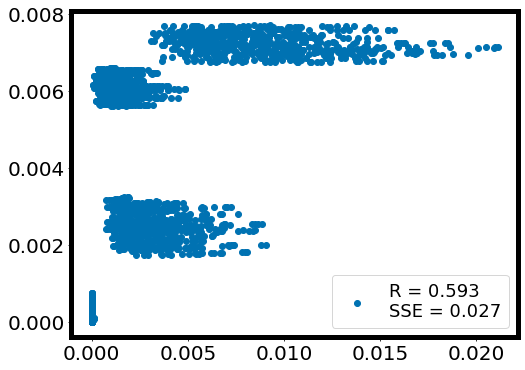

Running trial 20, cycle 2
Epoch: 0, Loss: 191.02576, Residuals: -0.57680, Convergence:   inf
Epoch: 10, Loss: 163.33618, Residuals: -0.52879, Convergence: 0.015809
Epoch: 20, Loss: 139.66396, Residuals: -0.48502, Convergence: 0.015751
Epoch: 30, Loss: 119.52946, Residuals: -0.44486, Convergence: 0.015628
Epoch: 40, Loss: 102.48155, Residuals: -0.40808, Convergence: 0.015389
Epoch: 50, Loss: 88.14505, Residuals: -0.37457, Convergence: 0.014994
Epoch: 60, Loss: 76.16176, Residuals: -0.34411, Convergence: 0.014464
Epoch: 70, Loss: 66.18199, Residuals: -0.31648, Convergence: 0.013850
Epoch: 80, Loss: 57.83255, Residuals: -0.29125, Convergence: 0.013276
Epoch: 90, Loss: 50.74858, Residuals: -0.26825, Convergence: 0.013067
Epoch: 100, Loss: 44.57771, Residuals: -0.24725, Convergence: 0.013157
Epoch: 110, Loss: 39.08723, Residuals: -0.22765, Convergence: 0.013120
Epoch: 120, Loss: 34.26322, Residuals: -0.20999, Convergence: 0.013345
Epoch: 130, Loss: 30.17791, Residuals: -0.19376, Convergence


Epoch: 939, Evidence: 514.94019, Convergence: -0.015017
Epoch: 940, Loss: 106.02872, Residuals: -0.00182, Convergence: 0.001889
Epoch: 950, Loss: 104.09673, Residuals: -0.00186, Convergence: 0.002054
Epoch: 960, Loss: 102.35480, Residuals: -0.00187, Convergence: 0.001812
Epoch: 970, Loss: 100.85302, Residuals: -0.00185, Convergence: 0.001427

Epoch: 971, Evidence: 528.96954, Convergence: 0.011903
Epoch: 980, Loss: 103.01762, Residuals: -0.00188, Convergence: 0.001915
Epoch: 990, Loss: 101.40487, Residuals: -0.00188, Convergence: 0.001479

Epoch: 997, Evidence: 528.23438, Convergence: -0.001392


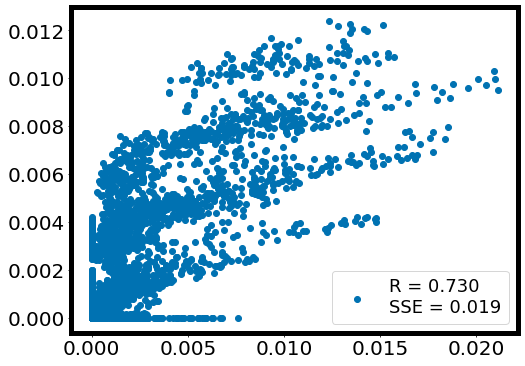

Running trial 20, cycle 3
Epoch: 0, Loss: 276.40529, Residuals: -0.52867, Convergence:   inf
Epoch: 10, Loss: 236.30389, Residuals: -0.48310, Convergence: 0.015847
Epoch: 20, Loss: 201.87416, Residuals: -0.44149, Convergence: 0.015881
Epoch: 30, Loss: 172.53450, Residuals: -0.40345, Convergence: 0.015754
Epoch: 40, Loss: 147.81705, Residuals: -0.36864, Convergence: 0.015408
Epoch: 50, Loss: 127.21072, Residuals: -0.33691, Convergence: 0.014875
Epoch: 60, Loss: 110.12675, Residuals: -0.30805, Convergence: 0.014226
Epoch: 70, Loss: 95.98506, Residuals: -0.28176, Convergence: 0.013503
Epoch: 80, Loss: 84.23589, Residuals: -0.25760, Convergence: 0.012892
Epoch: 90, Loss: 74.41744, Residuals: -0.23545, Convergence: 0.012275
Epoch: 100, Loss: 66.17215, Residuals: -0.21475, Convergence: 0.011834
Epoch: 110, Loss: 58.91985, Residuals: -0.19567, Convergence: 0.011181
Epoch: 120, Loss: 52.41511, Residuals: -0.17836, Convergence: 0.012108
Epoch: 130, Loss: 46.66913, Residuals: -0.16292, Convergen

Epoch: 1010, Loss: 169.03185, Residuals: -0.00545, Convergence: 0.002929
Epoch: 1020, Loss: 164.77527, Residuals: -0.00622, Convergence: 0.002456
Epoch: 1030, Loss: 161.52090, Residuals: -0.00650, Convergence: 0.001756
Epoch: 1040, Loss: 158.93320, Residuals: -0.00659, Convergence: 0.001448

Epoch: 1047, Evidence: 805.53680, Convergence: 0.017540
Epoch: 1050, Loss: 163.70010, Residuals: -0.00670, Convergence: 0.002217
Epoch: 1060, Loss: 160.39319, Residuals: -0.00715, Convergence: 0.001814
Epoch: 1070, Loss: 157.75548, Residuals: -0.00730, Convergence: 0.001488
Epoch: 1080, Loss: 155.65799, Residuals: -0.00718, Convergence: 0.001231

Epoch: 1081, Evidence: 801.88245, Convergence: -0.004557
Epoch: 1090, Loss: 166.76021, Residuals: -0.00642, Convergence: 0.001191
Epoch: 1100, Loss: 164.76346, Residuals: -0.00639, Convergence: 0.001098

Epoch: 1103, Evidence: 816.36865, Convergence: 0.013268
Epoch: 1110, Loss: 169.54181, Residuals: -0.00638, Convergence: 0.001480
Epoch: 1120, Loss: 167.52

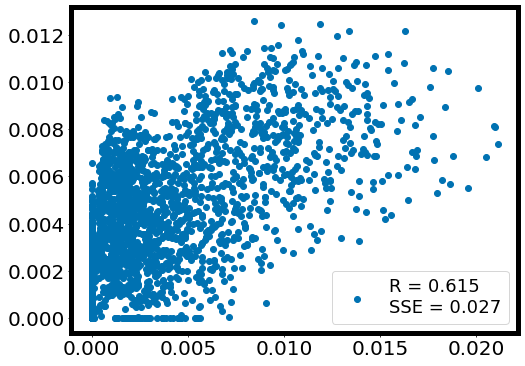

Running trial 20, cycle 4
Epoch: 0, Loss: 483.71550, Residuals: -0.32898, Convergence:   inf
Epoch: 10, Loss: 409.28497, Residuals: -0.30126, Convergence: 0.016900
Epoch: 20, Loss: 345.91360, Residuals: -0.27578, Convergence: 0.016993
Epoch: 30, Loss: 292.59424, Residuals: -0.25264, Convergence: 0.016743
Epoch: 40, Loss: 248.40717, Residuals: -0.23155, Convergence: 0.016311
Epoch: 50, Loss: 211.89728, Residuals: -0.21252, Convergence: 0.015754
Epoch: 60, Loss: 181.81877, Residuals: -0.19534, Convergence: 0.015078
Epoch: 70, Loss: 157.06152, Residuals: -0.17925, Convergence: 0.014463
Epoch: 80, Loss: 136.56580, Residuals: -0.16436, Convergence: 0.013769
Epoch: 90, Loss: 119.42412, Residuals: -0.15067, Convergence: 0.013466
Epoch: 100, Loss: 104.68434, Residuals: -0.13795, Convergence: 0.013053
Epoch: 110, Loss: 92.02710, Residuals: -0.12630, Convergence: 0.012843
Epoch: 120, Loss: 81.14252, Residuals: -0.11590, Convergence: 0.012670
Epoch: 130, Loss: 71.87906, Residuals: -0.10646, Conve


Epoch: 902, Evidence: 1234.01453, Convergence: 0.001123

Epoch: 908, Evidence: 1232.97498, Convergence: -0.000843
Epoch: 910, Loss: 261.53247, Residuals: -0.00370, Convergence: 0.002632
Epoch: 920, Loss: 256.69995, Residuals: -0.00470, Convergence: 0.001614

Epoch: 929, Evidence: 1228.09570, Convergence: -0.004820


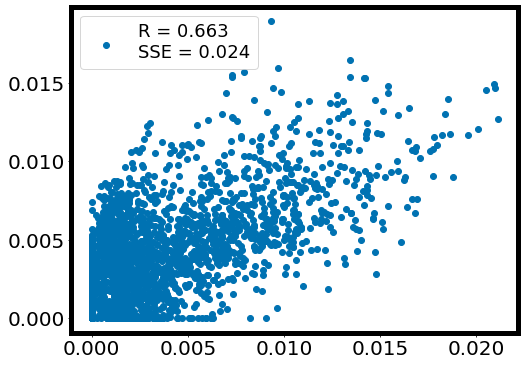

Running trial 20, cycle 5
Epoch: 0, Loss: 647.31889, Residuals: -0.24295, Convergence:   inf
Epoch: 10, Loss: 545.95789, Residuals: -0.22213, Convergence: 0.017279
Epoch: 20, Loss: 459.83615, Residuals: -0.20315, Convergence: 0.017283
Epoch: 30, Loss: 387.93597, Residuals: -0.18634, Convergence: 0.017015
Epoch: 40, Loss: 328.49527, Residuals: -0.17154, Convergence: 0.016523
Epoch: 50, Loss: 279.51077, Residuals: -0.15803, Convergence: 0.016039
Epoch: 60, Loss: 239.11311, Residuals: -0.14497, Convergence: 0.015454
Epoch: 70, Loss: 205.22115, Residuals: -0.13194, Convergence: 0.015437
Epoch: 80, Loss: 176.27744, Residuals: -0.12025, Convergence: 0.015130
Epoch: 90, Loss: 151.78534, Residuals: -0.10979, Convergence: 0.015019
Epoch: 100, Loss: 131.32085, Residuals: -0.10036, Convergence: 0.014479
Epoch: 110, Loss: 114.25951, Residuals: -0.09172, Convergence: 0.013731
Epoch: 120, Loss: 99.64617, Residuals: -0.08392, Convergence: 0.013588
Epoch: 130, Loss: 87.33115, Residuals: -0.07695, Conv

Epoch: 920, Loss: 327.12927, Residuals: -0.00997, Convergence: 0.001327
Epoch: 930, Loss: 323.06805, Residuals: -0.01015, Convergence: 0.001087
Epoch: 940, Loss: 319.63049, Residuals: -0.00999, Convergence: 0.000930

Epoch: 940, Evidence: 1581.23694, Convergence: -0.004721


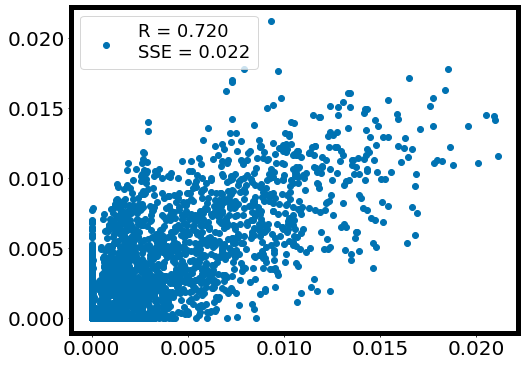

Epoch: 0, Loss: 805.85307, Residuals: -0.24354, Convergence:   inf
Epoch: 10, Loss: 679.09741, Residuals: -0.22217, Convergence: 0.017388
Epoch: 20, Loss: 571.33575, Residuals: -0.20289, Convergence: 0.017411
Epoch: 30, Loss: 481.22607, Residuals: -0.18625, Convergence: 0.017221
Epoch: 40, Loss: 406.30917, Residuals: -0.17162, Convergence: 0.016905
Epoch: 50, Loss: 344.29709, Residuals: -0.15750, Convergence: 0.016501
Epoch: 60, Loss: 293.10181, Residuals: -0.14305, Convergence: 0.016095
Epoch: 70, Loss: 250.54918, Residuals: -0.12933, Convergence: 0.015557
Epoch: 80, Loss: 214.87965, Residuals: -0.11714, Convergence: 0.015455
Epoch: 90, Loss: 185.12953, Residuals: -0.10623, Convergence: 0.014777
Epoch: 100, Loss: 160.37265, Residuals: -0.09640, Convergence: 0.014164
Epoch: 110, Loss: 139.84918, Residuals: -0.08739, Convergence: 0.013764
Epoch: 120, Loss: 122.79266, Residuals: -0.07914, Convergence: 0.012981
Epoch: 130, Loss: 108.57229, Residuals: -0.07126, Convergence: 0.012034
Epoch:

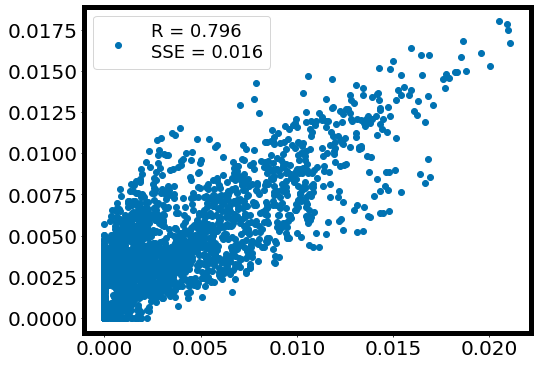

Running trial 21, cycle 1
Epoch: 0, Loss: 96.35804, Residuals: -0.75185, Convergence:   inf
Epoch: 10, Loss: 83.65881, Residuals: -0.69633, Convergence: 0.014493
Epoch: 20, Loss: 72.29457, Residuals: -0.64616, Convergence: 0.014827
Epoch: 30, Loss: 62.36559, Residuals: -0.60073, Convergence: 0.014899
Epoch: 40, Loss: 53.82411, Residuals: -0.55945, Convergence: 0.014756
Epoch: 50, Loss: 46.56256, Residuals: -0.52176, Convergence: 0.014448
Epoch: 60, Loss: 40.42408, Residuals: -0.48718, Convergence: 0.014057
Epoch: 70, Loss: 35.24009, Residuals: -0.45534, Convergence: 0.013620
Epoch: 80, Loss: 30.85762, Residuals: -0.42596, Convergence: 0.013158
Epoch: 90, Loss: 27.15438, Residuals: -0.39887, Convergence: 0.012467
Epoch: 100, Loss: 24.04182, Residuals: -0.37381, Convergence: 0.012200
Epoch: 110, Loss: 21.41905, Residuals: -0.35079, Convergence: 0.011406
Epoch: 120, Loss: 19.22223, Residuals: -0.32946, Convergence: 0.010392
Epoch: 130, Loss: 17.37482, Residuals: -0.30964, Convergence: 0.0

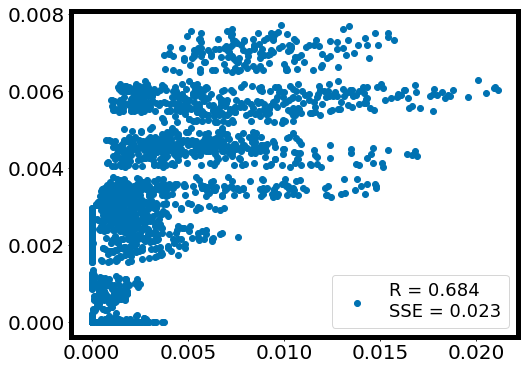

Running trial 21, cycle 2
Epoch: 0, Loss: 142.65378, Residuals: -0.22062, Convergence:   inf
Epoch: 10, Loss: 123.55300, Residuals: -0.20649, Convergence: 0.014717
Epoch: 20, Loss: 106.47429, Residuals: -0.19358, Convergence: 0.015160
Epoch: 30, Loss: 91.42966, Residuals: -0.18202, Convergence: 0.015507
Epoch: 40, Loss: 78.28569, Residuals: -0.17157, Convergence: 0.015781
Epoch: 50, Loss: 66.96022, Residuals: -0.16235, Convergence: 0.015715
Epoch: 60, Loss: 57.44329, Residuals: -0.15368, Convergence: 0.015381
Epoch: 70, Loss: 49.53510, Residuals: -0.14542, Convergence: 0.014438
Epoch: 80, Loss: 42.88282, Residuals: -0.13774, Convergence: 0.014287
Epoch: 90, Loss: 37.40606, Residuals: -0.13048, Convergence: 0.013617
Epoch: 100, Loss: 32.94125, Residuals: -0.12369, Convergence: 0.011219
Epoch: 110, Loss: 29.25312, Residuals: -0.11726, Convergence: 0.011467
Epoch: 120, Loss: 26.18341, Residuals: -0.11137, Convergence: 0.010987
Epoch: 130, Loss: 23.64898, Residuals: -0.10589, Convergence: 

Epoch: 950, Loss: 104.46439, Residuals: 0.00407, Convergence: 0.001198
Epoch: 960, Loss: 103.17029, Residuals: 0.00393, Convergence: 0.001110

Epoch: 962, Evidence: 478.50092, Convergence: 0.004942
Epoch: 970, Loss: 106.03008, Residuals: 0.00379, Convergence: 0.001178
Epoch: 980, Loss: 104.60120, Residuals: 0.00362, Convergence: 0.001303

Epoch: 985, Evidence: 481.85785, Convergence: 0.006967
Epoch: 990, Loss: 107.36234, Residuals: 0.00347, Convergence: 0.001751
Epoch: 1000, Loss: 105.90297, Residuals: 0.00330, Convergence: 0.001463
Epoch: 1010, Loss: 104.61857, Residuals: 0.00322, Convergence: 0.001119

Epoch: 1014, Evidence: 481.02014, Convergence: -0.001742

Epoch: 1015, Evidence: 489.96533, Convergence: 0.016547

Epoch: 1016, Evidence: 491.44000, Convergence: 0.003001

Epoch: 1017, Evidence: 493.54364, Convergence: 0.004262

Epoch: 1018, Evidence: 495.14191, Convergence: 0.003228

Epoch: 1019, Evidence: 496.45166, Convergence: 0.002638
Epoch: 1020, Loss: 121.68940, Residuals: 0.003

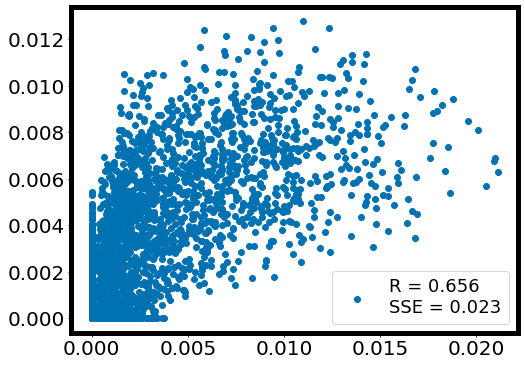

Running trial 21, cycle 3
Epoch: 0, Loss: 229.32787, Residuals: -0.08569, Convergence:   inf
Epoch: 10, Loss: 197.58147, Residuals: -0.08184, Convergence: 0.015263
Epoch: 20, Loss: 169.47081, Residuals: -0.07814, Convergence: 0.015611
Epoch: 30, Loss: 144.96556, Residuals: -0.07479, Convergence: 0.015802
Epoch: 40, Loss: 124.00017, Residuals: -0.07195, Convergence: 0.015655
Epoch: 50, Loss: 106.34673, Residuals: -0.06945, Convergence: 0.015443
Epoch: 60, Loss: 91.62438, Residuals: -0.06665, Convergence: 0.015039
Epoch: 70, Loss: 79.32359, Residuals: -0.06383, Convergence: 0.013758
Epoch: 80, Loss: 68.98056, Residuals: -0.06106, Convergence: 0.013878
Epoch: 90, Loss: 60.38436, Residuals: -0.05814, Convergence: 0.013361
Epoch: 100, Loss: 53.23759, Residuals: -0.05506, Convergence: 0.012378
Epoch: 110, Loss: 47.29101, Residuals: -0.05228, Convergence: 0.011618
Epoch: 120, Loss: 42.34300, Residuals: -0.04948, Convergence: 0.011120
Epoch: 130, Loss: 38.16014, Residuals: -0.04690, Convergenc


Epoch: 917, Evidence: 815.11572, Convergence: -0.008042
Epoch: 920, Loss: 185.08281, Residuals: 0.00148, Convergence: 0.002800
Epoch: 930, Loss: 181.00389, Residuals: 0.00150, Convergence: 0.002043

Epoch: 931, Evidence: 823.58093, Convergence: 0.002319

Epoch: 935, Evidence: 823.81482, Convergence: 0.000284
Epoch: 940, Loss: 180.07056, Residuals: 0.00083, Convergence: 0.004801
Epoch: 950, Loss: 174.43123, Residuals: 0.00045, Convergence: 0.003196

Epoch: 952, Evidence: 816.66760, Convergence: -0.008465


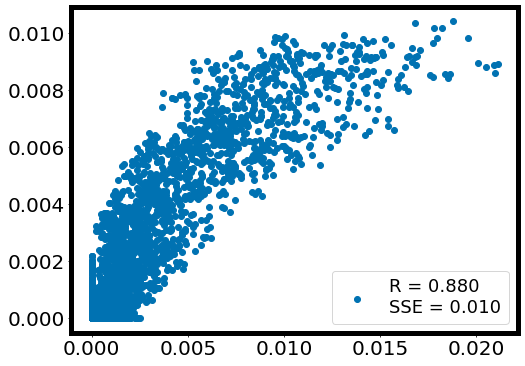

Running trial 21, cycle 4
Epoch: 0, Loss: 317.27855, Residuals: -0.09339, Convergence:   inf
Epoch: 10, Loss: 273.03799, Residuals: -0.08711, Convergence: 0.015349
Epoch: 20, Loss: 234.03905, Residuals: -0.08115, Convergence: 0.015651
Epoch: 30, Loss: 200.34219, Residuals: -0.07581, Convergence: 0.015640
Epoch: 40, Loss: 171.86000, Residuals: -0.07119, Convergence: 0.015286
Epoch: 50, Loss: 147.83511, Residuals: -0.06684, Convergence: 0.015184
Epoch: 60, Loss: 127.25847, Residuals: -0.06258, Convergence: 0.015012
Epoch: 70, Loss: 109.95143, Residuals: -0.05872, Convergence: 0.014367
Epoch: 80, Loss: 95.52025, Residuals: -0.05504, Convergence: 0.013893
Epoch: 90, Loss: 83.37517, Residuals: -0.05188, Convergence: 0.013570
Epoch: 100, Loss: 73.30439, Residuals: -0.04830, Convergence: 0.012776
Epoch: 110, Loss: 64.92113, Residuals: -0.04481, Convergence: 0.011673
Epoch: 120, Loss: 57.84426, Residuals: -0.04166, Convergence: 0.011462
Epoch: 130, Loss: 51.71754, Residuals: -0.03881, Converge


Epoch: 947, Evidence: 1165.70728, Convergence: -0.007460


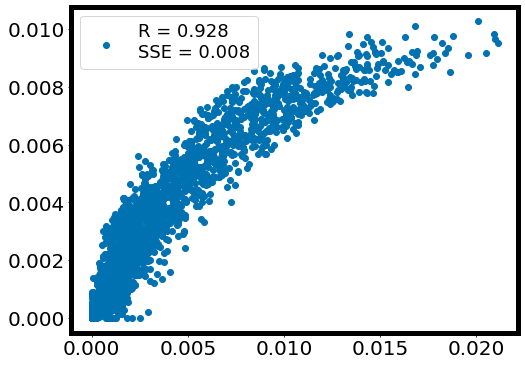

Running trial 21, cycle 5
Epoch: 0, Loss: 407.36693, Residuals: -0.04505, Convergence:   inf
Epoch: 10, Loss: 349.78915, Residuals: -0.04288, Convergence: 0.015589
Epoch: 20, Loss: 299.17065, Residuals: -0.04081, Convergence: 0.015824
Epoch: 30, Loss: 255.95604, Residuals: -0.03901, Convergence: 0.015608
Epoch: 40, Loss: 219.70761, Residuals: -0.03751, Convergence: 0.015195
Epoch: 50, Loss: 189.36154, Residuals: -0.03587, Convergence: 0.014884
Epoch: 60, Loss: 163.64720, Residuals: -0.03425, Convergence: 0.014479
Epoch: 70, Loss: 142.19240, Residuals: -0.03270, Convergence: 0.013885
Epoch: 80, Loss: 124.39138, Residuals: -0.03124, Convergence: 0.013194
Epoch: 90, Loss: 109.37356, Residuals: -0.02992, Convergence: 0.012677
Epoch: 100, Loss: 96.81104, Residuals: -0.02842, Convergence: 0.012055
Epoch: 110, Loss: 85.99178, Residuals: -0.02681, Convergence: 0.011772
Epoch: 120, Loss: 76.75212, Residuals: -0.02508, Convergence: 0.011031
Epoch: 130, Loss: 68.99004, Residuals: -0.02327, Conver

Epoch: 1020, Loss: 287.16382, Residuals: -0.00648, Convergence: 0.001627
Epoch: 1030, Loss: 283.10767, Residuals: -0.00686, Convergence: 0.001384
Epoch: 1040, Loss: 279.81021, Residuals: -0.00703, Convergence: 0.001099

Epoch: 1044, Evidence: 1514.69751, Convergence: 0.005199
Epoch: 1050, Loss: 288.61292, Residuals: -0.00722, Convergence: 0.001444
Epoch: 1060, Loss: 284.73929, Residuals: -0.00743, Convergence: 0.001220
Epoch: 1070, Loss: 281.56332, Residuals: -0.00641, Convergence: 0.001044

Epoch: 1072, Evidence: 1515.31323, Convergence: 0.000406
Epoch: 1080, Loss: 280.95636, Residuals: -0.00783, Convergence: 0.001502
Epoch: 1090, Loss: 276.67627, Residuals: -0.00983, Convergence: 0.001244

Epoch: 1091, Evidence: 1506.43457, Convergence: -0.005485

Epoch: 1092, Evidence: 1541.54150, Convergence: 0.017414

Epoch: 1094, Evidence: 1545.25037, Convergence: 0.002400

Epoch: 1095, Evidence: 1545.16345, Convergence: -0.000056
Epoch: 1100, Loss: 308.82806, Residuals: -0.00752, Convergence: 0.

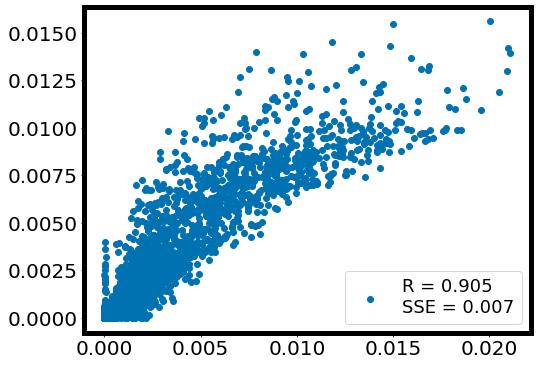

Epoch: 0, Loss: 526.09966, Residuals: 0.15585, Convergence:   inf
Epoch: 10, Loss: 451.51068, Residuals: 0.13915, Convergence: 0.015558
Epoch: 20, Loss: 386.54202, Residuals: 0.12412, Convergence: 0.015696
Epoch: 30, Loss: 331.09943, Residuals: 0.11085, Convergence: 0.015477
Epoch: 40, Loss: 284.72882, Residuals: 0.09912, Convergence: 0.014942
Epoch: 50, Loss: 246.30630, Residuals: 0.08859, Convergence: 0.014230
Epoch: 60, Loss: 214.72359, Residuals: 0.07908, Convergence: 0.013493
Epoch: 70, Loss: 188.57249, Residuals: 0.07057, Convergence: 0.012887
Epoch: 80, Loss: 166.62492, Residuals: 0.06282, Convergence: 0.012123
Epoch: 90, Loss: 148.05592, Residuals: 0.05600, Convergence: 0.011572
Epoch: 100, Loss: 132.16621, Residuals: 0.04987, Convergence: 0.011196
Epoch: 110, Loss: 118.76446, Residuals: 0.04417, Convergence: 0.010544
Epoch: 120, Loss: 107.09241, Residuals: 0.03916, Convergence: 0.010514
Epoch: 130, Loss: 96.47482, Residuals: 0.03475, Convergence: 0.010292
Epoch: 140, Loss: 87.

Epoch: 960, Loss: 387.86270, Residuals: -0.00819, Convergence: 0.001869

Epoch: 961, Evidence: 1936.36890, Convergence: 0.004109
Epoch: 970, Loss: 387.63730, Residuals: -0.00776, Convergence: 0.002098

Epoch: 979, Evidence: 1932.41211, Convergence: -0.002048
Epoch: 980, Loss: 394.67194, Residuals: -0.00813, Convergence: 0.001307

Epoch: 986, Evidence: 1938.25928, Convergence: 0.000975
Epoch: 990, Loss: 390.30225, Residuals: -0.00801, Convergence: 0.002068

Epoch: 992, Evidence: 1940.28711, Convergence: 0.002019
Epoch: 1000, Loss: 388.76108, Residuals: -0.00777, Convergence: 0.001492

Epoch: 1009, Evidence: 1938.77881, Convergence: -0.000778
Epoch: 1010, Loss: 384.07440, Residuals: -0.00720, Convergence: 0.003044

Epoch: 1012, Evidence: 1936.09998, Convergence: -0.002163


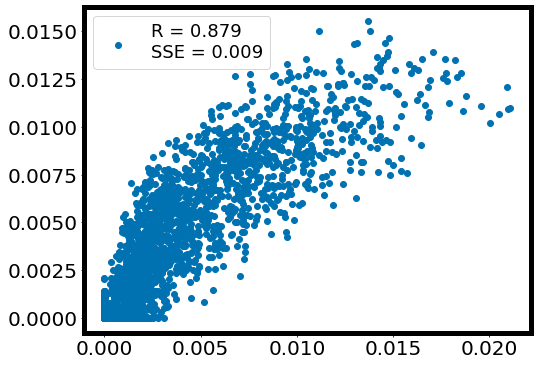

Running trial 22, cycle 1
Epoch: 0, Loss: 69.39502, Residuals: -1.14876, Convergence:   inf
Epoch: 10, Loss: 60.01883, Residuals: -1.05351, Convergence: 0.014840
Epoch: 20, Loss: 51.70764, Residuals: -0.96847, Convergence: 0.015141
Epoch: 30, Loss: 44.43735, Residuals: -0.89151, Convergence: 0.015355
Epoch: 40, Loss: 38.14014, Residuals: -0.82137, Convergence: 0.015406
Epoch: 50, Loss: 32.74710, Residuals: -0.75740, Convergence: 0.015308
Epoch: 60, Loss: 28.16004, Residuals: -0.69903, Convergence: 0.015139
Epoch: 70, Loss: 24.26653, Residuals: -0.64595, Convergence: 0.014861
Epoch: 80, Loss: 20.97621, Residuals: -0.59764, Convergence: 0.014520
Epoch: 90, Loss: 18.20039, Residuals: -0.55364, Convergence: 0.014043
Epoch: 100, Loss: 15.86519, Residuals: -0.51335, Convergence: 0.013667
Epoch: 110, Loss: 13.90696, Residuals: -0.47674, Convergence: 0.013141
Epoch: 120, Loss: 12.26122, Residuals: -0.44346, Convergence: 0.012548
Epoch: 130, Loss: 10.90262, Residuals: -0.41287, Convergence: 0.0

Epoch: 860, Loss: 41.99603, Residuals: -0.01052, Convergence: 0.001011
Epoch: 870, Loss: 41.22211, Residuals: -0.01061, Convergence: 0.001217

Epoch: 875, Evidence: 254.17702, Convergence: 0.012852
Epoch: 880, Loss: 41.68950, Residuals: -0.01080, Convergence: 0.001502
Epoch: 890, Loss: 40.88966, Residuals: -0.01103, Convergence: 0.001269

Epoch: 893, Evidence: 255.01849, Convergence: 0.003300
Epoch: 900, Loss: 41.49736, Residuals: -0.01132, Convergence: 0.001988
Epoch: 910, Loss: 40.70221, Residuals: -0.01156, Convergence: 0.001502
Epoch: 920, Loss: 40.00170, Residuals: -0.01169, Convergence: 0.001479
Epoch: 930, Loss: 39.36388, Residuals: -0.01164, Convergence: 0.001282

Epoch: 931, Evidence: 255.38583, Convergence: 0.001438
Epoch: 940, Loss: 39.88509, Residuals: -0.01196, Convergence: 0.001997
Epoch: 950, Loss: 39.10511, Residuals: -0.01216, Convergence: 0.002230

Epoch: 951, Evidence: 254.87820, Convergence: -0.001992


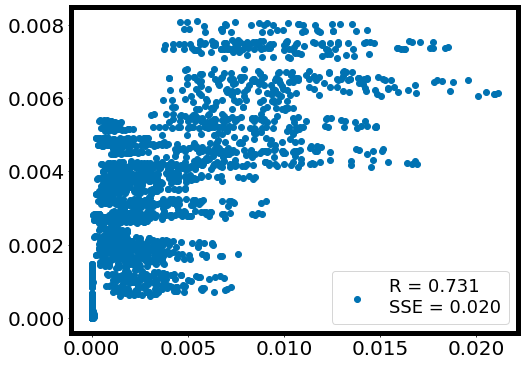

Running trial 22, cycle 2
Epoch: 0, Loss: 160.58234, Residuals: -0.85654, Convergence:   inf
Epoch: 10, Loss: 137.63927, Residuals: -0.78133, Convergence: 0.015861
Epoch: 20, Loss: 117.38764, Residuals: -0.71314, Convergence: 0.016127
Epoch: 30, Loss: 100.02803, Residuals: -0.65107, Convergence: 0.016104
Epoch: 40, Loss: 85.34155, Residuals: -0.59457, Convergence: 0.015908
Epoch: 50, Loss: 72.99605, Residuals: -0.54311, Convergence: 0.015602
Epoch: 60, Loss: 62.67688, Residuals: -0.49605, Convergence: 0.014968
Epoch: 70, Loss: 53.93123, Residuals: -0.45323, Convergence: 0.015090
Epoch: 80, Loss: 46.45937, Residuals: -0.41427, Convergence: 0.014935
Epoch: 90, Loss: 40.13569, Residuals: -0.37885, Convergence: 0.014562
Epoch: 100, Loss: 34.82573, Residuals: -0.34665, Convergence: 0.014186
Epoch: 110, Loss: 30.40229, Residuals: -0.31745, Convergence: 0.013453
Epoch: 120, Loss: 26.72100, Residuals: -0.29073, Convergence: 0.012481
Epoch: 130, Loss: 23.61537, Residuals: -0.26656, Convergence:

Epoch: 980, Loss: 75.57523, Residuals: -0.00822, Convergence: 0.002110

Epoch: 988, Evidence: 515.83502, Convergence: 0.010013
Epoch: 990, Loss: 80.04309, Residuals: -0.00884, Convergence: 0.003589
Epoch: 1000, Loss: 77.58865, Residuals: -0.01034, Convergence: 0.002341
Epoch: 1010, Loss: 75.62115, Residuals: -0.01109, Convergence: 0.002707
Epoch: 1020, Loss: 73.92809, Residuals: -0.01112, Convergence: 0.002039

Epoch: 1022, Evidence: 514.57983, Convergence: -0.002439
Epoch: 1030, Loss: 83.40943, Residuals: -0.00864, Convergence: 0.002107
Epoch: 1040, Loss: 81.84579, Residuals: -0.00876, Convergence: 0.001791
Epoch: 1050, Loss: 80.42805, Residuals: -0.00883, Convergence: 0.001711
Epoch: 1060, Loss: 79.21455, Residuals: -0.00876, Convergence: 0.001076
Epoch: 1070, Loss: 78.07981, Residuals: -0.00859, Convergence: 0.001248
Epoch: 1080, Loss: 77.06436, Residuals: -0.00838, Convergence: 0.001134

Epoch: 1082, Evidence: 526.19800, Convergence: 0.019694
Epoch: 1090, Loss: 81.19734, Residuals:

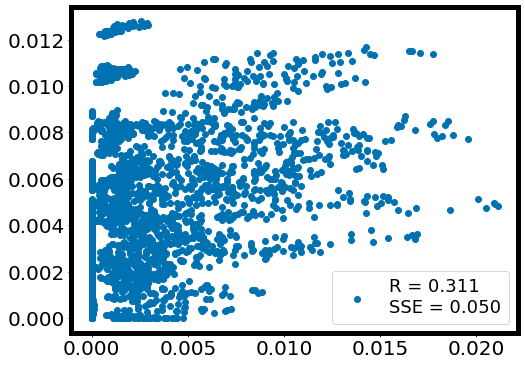

Running trial 22, cycle 3
Epoch: 0, Loss: 257.43691, Residuals: -0.51802, Convergence:   inf
Epoch: 10, Loss: 221.06190, Residuals: -0.47292, Convergence: 0.015510
Epoch: 20, Loss: 189.45749, Residuals: -0.43195, Convergence: 0.015516
Epoch: 30, Loss: 162.63535, Residuals: -0.39471, Convergence: 0.015248
Epoch: 40, Loss: 140.16270, Residuals: -0.36074, Convergence: 0.014736
Epoch: 50, Loss: 121.37569, Residuals: -0.32964, Convergence: 0.014323
Epoch: 60, Loss: 105.44984, Residuals: -0.30114, Convergence: 0.013987
Epoch: 70, Loss: 92.05478, Residuals: -0.27502, Convergence: 0.013443
Epoch: 80, Loss: 80.72495, Residuals: -0.25093, Convergence: 0.013062
Epoch: 90, Loss: 71.00923, Residuals: -0.22930, Convergence: 0.012798
Epoch: 100, Loss: 62.77684, Residuals: -0.20980, Convergence: 0.012150
Epoch: 110, Loss: 55.86971, Residuals: -0.19203, Convergence: 0.011541
Epoch: 120, Loss: 50.08307, Residuals: -0.17581, Convergence: 0.010769
Epoch: 130, Loss: 45.15828, Residuals: -0.16099, Convergen

Epoch: 960, Loss: 172.37569, Residuals: -0.01358, Convergence: 0.001082

Epoch: 965, Evidence: 809.63171, Convergence: 0.000235
Epoch: 970, Loss: 171.84892, Residuals: -0.01429, Convergence: 0.001932
Epoch: 980, Loss: 168.54382, Residuals: -0.01523, Convergence: 0.001217

Epoch: 988, Evidence: 800.41522, Convergence: -0.011277
Epoch: 990, Loss: 177.71780, Residuals: -0.01360, Convergence: 0.001673
Epoch: 1000, Loss: 175.34811, Residuals: -0.01363, Convergence: 0.001200
Epoch: 1010, Loss: 173.18045, Residuals: -0.01354, Convergence: 0.001391

Epoch: 1013, Evidence: 812.16101, Convergence: 0.003349
Epoch: 1020, Loss: 174.28310, Residuals: -0.01356, Convergence: 0.001120
Epoch: 1030, Loss: 172.20262, Residuals: -0.01357, Convergence: 0.001168

Epoch: 1031, Evidence: 810.22144, Convergence: -0.002394


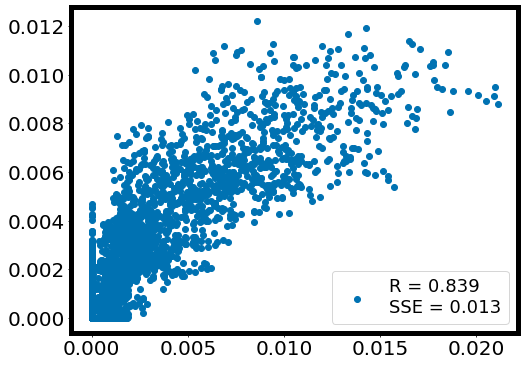

Running trial 22, cycle 4
Epoch: 0, Loss: 413.18959, Residuals: -0.04262, Convergence:   inf
Epoch: 10, Loss: 352.14438, Residuals: -0.04061, Convergence: 0.016051
Epoch: 20, Loss: 300.75604, Residuals: -0.03844, Convergence: 0.015773
Epoch: 30, Loss: 257.61435, Residuals: -0.03621, Convergence: 0.015448
Epoch: 40, Loss: 221.43027, Residuals: -0.03392, Convergence: 0.015098
Epoch: 50, Loss: 191.38445, Residuals: -0.03122, Convergence: 0.014308
Epoch: 60, Loss: 166.02544, Residuals: -0.02927, Convergence: 0.014151
Epoch: 70, Loss: 144.49910, Residuals: -0.02747, Convergence: 0.013654
Epoch: 80, Loss: 126.55389, Residuals: -0.02574, Convergence: 0.013354
Epoch: 90, Loss: 111.26079, Residuals: -0.02420, Convergence: 0.012725
Epoch: 100, Loss: 98.16595, Residuals: -0.02269, Convergence: 0.012794
Epoch: 110, Loss: 86.83639, Residuals: -0.02119, Convergence: 0.011536
Epoch: 120, Loss: 76.99643, Residuals: -0.01987, Convergence: 0.011936
Epoch: 130, Loss: 68.54694, Residuals: -0.01859, Conver

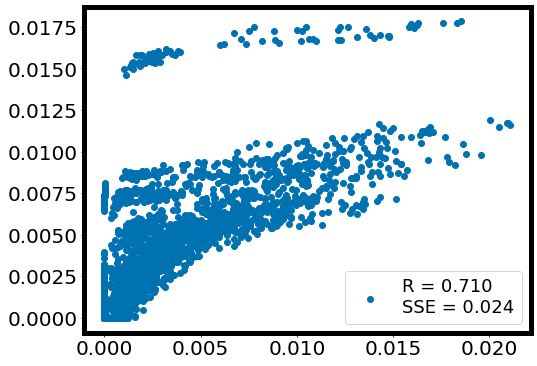

Running trial 22, cycle 5
Epoch: 0, Loss: 535.80589, Residuals: 0.15624, Convergence:   inf
Epoch: 10, Loss: 457.11575, Residuals: 0.13982, Convergence: 0.015960
Epoch: 20, Loss: 390.85495, Residuals: 0.12553, Convergence: 0.015628
Epoch: 30, Loss: 335.31708, Residuals: 0.11324, Convergence: 0.015369
Epoch: 40, Loss: 288.68106, Residuals: 0.10224, Convergence: 0.014851
Epoch: 50, Loss: 250.09523, Residuals: 0.09198, Convergence: 0.014122
Epoch: 60, Loss: 218.29700, Residuals: 0.08256, Convergence: 0.013416
Epoch: 70, Loss: 191.74890, Residuals: 0.07376, Convergence: 0.012901
Epoch: 80, Loss: 169.34076, Residuals: 0.06581, Convergence: 0.012399
Epoch: 90, Loss: 150.52446, Residuals: 0.05861, Convergence: 0.011591
Epoch: 100, Loss: 134.49246, Residuals: 0.05204, Convergence: 0.011160
Epoch: 110, Loss: 120.76144, Residuals: 0.04634, Convergence: 0.010346
Epoch: 120, Loss: 108.84720, Residuals: 0.04141, Convergence: 0.010649
Epoch: 130, Loss: 98.30021, Residuals: 0.03689, Convergence: 0.01

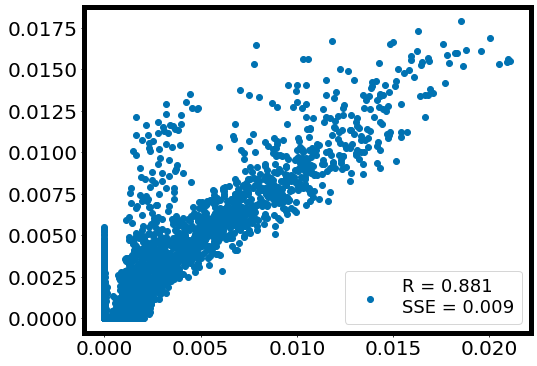

Epoch: 0, Loss: 726.43858, Residuals: 0.21075, Convergence:   inf
Epoch: 10, Loss: 616.99695, Residuals: 0.18967, Convergence: 0.016443
Epoch: 20, Loss: 525.03375, Residuals: 0.17117, Convergence: 0.016130
Epoch: 30, Loss: 448.11920, Residuals: 0.15487, Convergence: 0.015855
Epoch: 40, Loss: 384.20749, Residuals: 0.14019, Convergence: 0.015307
Epoch: 50, Loss: 330.45312, Residuals: 0.12660, Convergence: 0.015079
Epoch: 60, Loss: 285.07336, Residuals: 0.11358, Convergence: 0.014711
Epoch: 70, Loss: 247.23236, Residuals: 0.10146, Convergence: 0.014320
Epoch: 80, Loss: 215.67453, Residuals: 0.09038, Convergence: 0.013521
Epoch: 90, Loss: 189.40059, Residuals: 0.08079, Convergence: 0.012086
Epoch: 100, Loss: 167.11943, Residuals: 0.07239, Convergence: 0.012588
Epoch: 110, Loss: 148.42035, Residuals: 0.06504, Convergence: 0.011197
Epoch: 120, Loss: 132.64549, Residuals: 0.05859, Convergence: 0.010974
Epoch: 130, Loss: 119.10162, Residuals: 0.05312, Convergence: 0.010023
Epoch: 140, Loss: 10

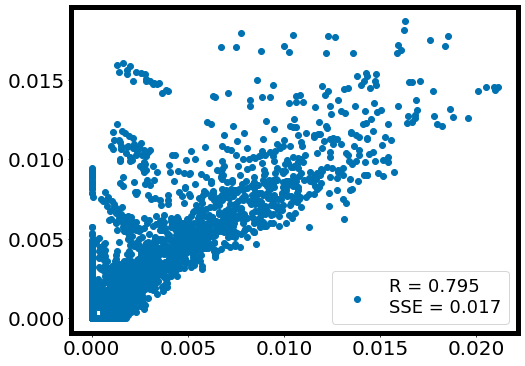

Running trial 23, cycle 1
Epoch: 0, Loss: 100.94686, Residuals: -1.08104, Convergence:   inf
Epoch: 10, Loss: 86.89248, Residuals: -0.99959, Convergence: 0.015134
Epoch: 20, Loss: 74.76853, Residuals: -0.92538, Convergence: 0.015148
Epoch: 30, Loss: 64.31150, Residuals: -0.85670, Convergence: 0.015221
Epoch: 40, Loss: 55.25947, Residuals: -0.79291, Convergence: 0.015326
Epoch: 50, Loss: 47.44833, Residuals: -0.73356, Convergence: 0.015370
Epoch: 60, Loss: 40.78278, Residuals: -0.67901, Convergence: 0.015118
Epoch: 70, Loss: 35.13351, Residuals: -0.62923, Convergence: 0.014882
Epoch: 80, Loss: 30.36864, Residuals: -0.58401, Convergence: 0.014530
Epoch: 90, Loss: 26.36872, Residuals: -0.54295, Convergence: 0.013980
Epoch: 100, Loss: 23.02310, Residuals: -0.50534, Convergence: 0.013324
Epoch: 110, Loss: 20.24204, Residuals: -0.47045, Convergence: 0.012408
Epoch: 120, Loss: 17.96432, Residuals: -0.43770, Convergence: 0.011702
Epoch: 130, Loss: 16.06662, Residuals: -0.40778, Convergence: 0.

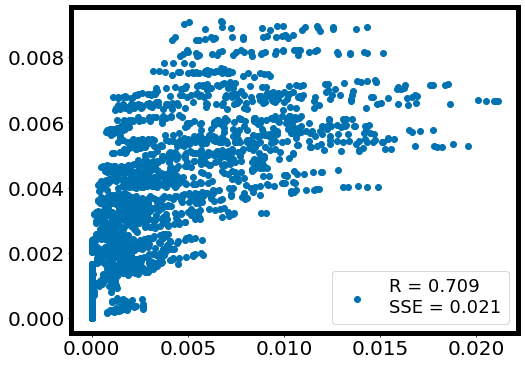

Running trial 23, cycle 2
Epoch: 0, Loss: 202.52852, Residuals: -0.92266, Convergence:   inf
Epoch: 10, Loss: 172.69577, Residuals: -0.84510, Convergence: 0.016089
Epoch: 20, Loss: 147.17157, Residuals: -0.77462, Convergence: 0.016176
Epoch: 30, Loss: 125.26946, Residuals: -0.70994, Convergence: 0.016283
Epoch: 40, Loss: 106.56663, Residuals: -0.65047, Convergence: 0.016300
Epoch: 50, Loss: 90.74126, Residuals: -0.59586, Convergence: 0.016103
Epoch: 60, Loss: 77.48266, Residuals: -0.54565, Convergence: 0.015758
Epoch: 70, Loss: 66.41943, Residuals: -0.49960, Convergence: 0.015326
Epoch: 80, Loss: 57.18209, Residuals: -0.45720, Convergence: 0.014739
Epoch: 90, Loss: 49.47412, Residuals: -0.41845, Convergence: 0.014182
Epoch: 100, Loss: 43.04979, Residuals: -0.38313, Convergence: 0.013794
Epoch: 110, Loss: 37.57617, Residuals: -0.35108, Convergence: 0.013608
Epoch: 120, Loss: 32.96525, Residuals: -0.32187, Convergence: 0.012759
Epoch: 130, Loss: 29.13693, Residuals: -0.29523, Convergence

Epoch: 940, Loss: 104.76492, Residuals: -0.00756, Convergence: 0.002635
Epoch: 950, Loss: 102.37783, Residuals: -0.00813, Convergence: 0.002140

Epoch: 954, Evidence: 499.77777, Convergence: -0.011372
Epoch: 960, Loss: 111.79410, Residuals: -0.00619, Convergence: 0.001687
Epoch: 970, Loss: 109.92032, Residuals: -0.00629, Convergence: 0.001457
Epoch: 980, Loss: 108.19502, Residuals: -0.00639, Convergence: 0.001730

Epoch: 987, Evidence: 507.44247, Convergence: 0.003905
Epoch: 990, Loss: 109.37190, Residuals: -0.00642, Convergence: 0.001596
Epoch: 1000, Loss: 107.59138, Residuals: -0.00657, Convergence: 0.001311

Epoch: 1007, Evidence: 508.52036, Convergence: 0.002120
Epoch: 1010, Loss: 109.02012, Residuals: -0.00659, Convergence: 0.001745
Epoch: 1020, Loss: 107.33046, Residuals: -0.00673, Convergence: 0.001644

Epoch: 1028, Evidence: 509.05286, Convergence: 0.001046
Epoch: 1030, Loss: 108.58414, Residuals: -0.00677, Convergence: 0.001436
Epoch: 1040, Loss: 106.85326, Residuals: -0.00690

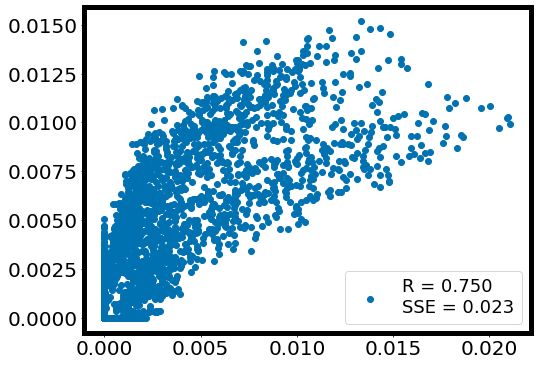

Running trial 23, cycle 3
Epoch: 0, Loss: 319.71831, Residuals: -0.70233, Convergence:   inf
Epoch: 10, Loss: 271.79675, Residuals: -0.64147, Convergence: 0.016409
Epoch: 20, Loss: 230.89612, Residuals: -0.58672, Convergence: 0.016474
Epoch: 30, Loss: 195.89215, Residuals: -0.53727, Convergence: 0.016662
Epoch: 40, Loss: 166.15384, Residuals: -0.49230, Convergence: 0.016510
Epoch: 50, Loss: 141.12572, Residuals: -0.45101, Convergence: 0.016560
Epoch: 60, Loss: 120.06144, Residuals: -0.41257, Convergence: 0.015900
Epoch: 70, Loss: 102.59459, Residuals: -0.37692, Convergence: 0.015799
Epoch: 80, Loss: 88.02545, Residuals: -0.34447, Convergence: 0.015363
Epoch: 90, Loss: 75.92934, Residuals: -0.31487, Convergence: 0.014746
Epoch: 100, Loss: 65.78093, Residuals: -0.28793, Convergence: 0.013891
Epoch: 110, Loss: 57.30247, Residuals: -0.26312, Convergence: 0.013593
Epoch: 120, Loss: 50.19836, Residuals: -0.24027, Convergence: 0.013323
Epoch: 130, Loss: 44.28481, Residuals: -0.21924, Converge

Epoch: 950, Loss: 171.03728, Residuals: -0.00533, Convergence: 0.001272
Epoch: 960, Loss: 169.04517, Residuals: -0.00534, Convergence: 0.000861

Epoch: 960, Evidence: 812.36768, Convergence: 0.000484
Epoch: 960, Loss: 172.24413, Residuals: -0.00534, Convergence:   inf
Epoch: 970, Loss: 168.16119, Residuals: -0.00621, Convergence: 0.001885

Epoch: 974, Evidence: 812.69562, Convergence: 0.000887
Epoch: 980, Loss: 165.42102, Residuals: -0.00944, Convergence: 0.004547
Epoch: 990, Loss: 160.56274, Residuals: -0.01116, Convergence: 0.003121

Epoch: 997, Evidence: 802.02936, Convergence: -0.012400
Epoch: 1000, Loss: 180.69617, Residuals: -0.00529, Convergence: 0.001484
Epoch: 1010, Loss: 177.93912, Residuals: -0.00541, Convergence: 0.001716
Epoch: 1020, Loss: 175.56818, Residuals: -0.00543, Convergence: 0.001168

Epoch: 1023, Evidence: 822.03473, Convergence: 0.012238
Epoch: 1030, Loss: 176.86450, Residuals: -0.00549, Convergence: 0.001232

Epoch: 1038, Evidence: 819.88739, Convergence: -0.00

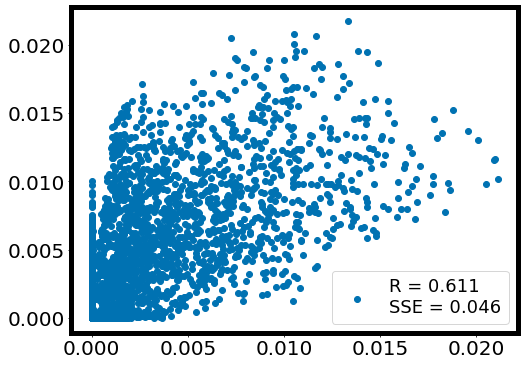

Running trial 23, cycle 4
Epoch: 0, Loss: 317.57979, Residuals: -0.21268, Convergence:   inf
Epoch: 10, Loss: 275.50018, Residuals: -0.19626, Convergence: 0.014469
Epoch: 20, Loss: 238.66750, Residuals: -0.18126, Convergence: 0.014416
Epoch: 30, Loss: 207.01422, Residuals: -0.16767, Convergence: 0.014222
Epoch: 40, Loss: 180.10799, Residuals: -0.15521, Convergence: 0.014074
Epoch: 50, Loss: 156.72351, Residuals: -0.14330, Convergence: 0.013934
Epoch: 60, Loss: 136.71431, Residuals: -0.13247, Convergence: 0.013550
Epoch: 70, Loss: 119.94904, Residuals: -0.12235, Convergence: 0.012858
Epoch: 80, Loss: 106.09155, Residuals: -0.11281, Convergence: 0.012137
Epoch: 90, Loss: 94.58174, Residuals: -0.10371, Convergence: 0.011382
Epoch: 100, Loss: 84.97997, Residuals: -0.09547, Convergence: 0.010796
Epoch: 110, Loss: 76.94312, Residuals: -0.08780, Convergence: 0.009308
Epoch: 120, Loss: 70.11474, Residuals: -0.08100, Convergence: 0.009035
Epoch: 130, Loss: 64.40884, Residuals: -0.07483, Converg

Epoch: 940, Loss: 257.75742, Residuals: -0.00922, Convergence: 0.001100

Epoch: 941, Evidence: 1113.39478, Convergence: 0.003524

Epoch: 942, Evidence: 1113.87976, Convergence: 0.000435
Epoch: 950, Loss: 257.44028, Residuals: -0.00939, Convergence: 0.001599

Epoch: 955, Evidence: 1110.75317, Convergence: -0.002378

Epoch: 956, Evidence: 1114.95996, Convergence: 0.001404

Epoch: 957, Evidence: 1114.50879, Convergence: -0.000405
Epoch: 960, Loss: 261.45923, Residuals: -0.00930, Convergence: 0.001551

Epoch: 965, Evidence: 1112.80249, Convergence: -0.001939


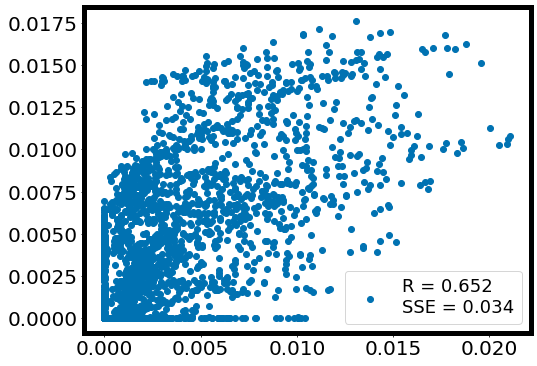

Running trial 23, cycle 5
Epoch: 0, Loss: 417.27422, Residuals: -0.04111, Convergence:   inf
Epoch: 10, Loss: 358.93842, Residuals: -0.03951, Convergence: 0.015252
Epoch: 20, Loss: 308.57788, Residuals: -0.03761, Convergence: 0.015161
Epoch: 30, Loss: 265.94360, Residuals: -0.03552, Convergence: 0.014771
Epoch: 40, Loss: 230.29936, Residuals: -0.03355, Convergence: 0.014270
Epoch: 50, Loss: 200.68843, Residuals: -0.03155, Convergence: 0.013520
Epoch: 60, Loss: 175.93108, Residuals: -0.02978, Convergence: 0.013053
Epoch: 70, Loss: 155.15875, Residuals: -0.02800, Convergence: 0.012495
Epoch: 80, Loss: 137.73579, Residuals: -0.02620, Convergence: 0.011259
Epoch: 90, Loss: 123.21459, Residuals: -0.02439, Convergence: 0.011112
Epoch: 100, Loss: 111.02827, Residuals: -0.02258, Convergence: 0.010174
Epoch: 110, Loss: 100.55064, Residuals: -0.02090, Convergence: 0.009673
Epoch: 120, Loss: 91.26418, Residuals: -0.01954, Convergence: 0.009439
Epoch: 130, Loss: 83.05423, Residuals: -0.01828, Conv

Epoch: 960, Loss: 325.42966, Residuals: -0.00823, Convergence: 0.001425

Epoch: 963, Evidence: 1547.27856, Convergence: 0.000892
Epoch: 970, Loss: 319.97098, Residuals: -0.01083, Convergence: 0.002163

Epoch: 977, Evidence: 1537.54004, Convergence: -0.005436


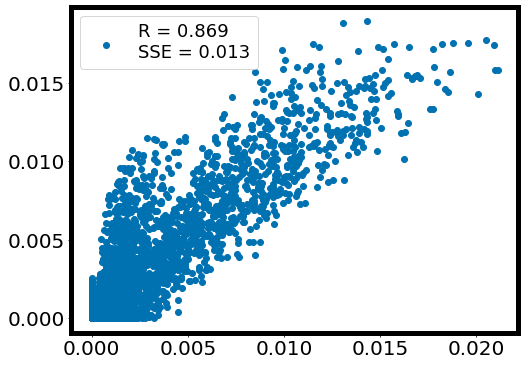

Epoch: 0, Loss: 626.57396, Residuals: 0.07211, Convergence:   inf
Epoch: 10, Loss: 534.00122, Residuals: 0.06390, Convergence: 0.016317
Epoch: 20, Loss: 454.33084, Residuals: 0.05672, Convergence: 0.016217
Epoch: 30, Loss: 388.12143, Residuals: 0.05009, Convergence: 0.015647
Epoch: 40, Loss: 333.17853, Residuals: 0.04405, Convergence: 0.015159
Epoch: 50, Loss: 287.01788, Residuals: 0.03862, Convergence: 0.014811
Epoch: 60, Loss: 248.77782, Residuals: 0.03394, Convergence: 0.014056
Epoch: 70, Loss: 216.90030, Residuals: 0.02978, Convergence: 0.013465
Epoch: 80, Loss: 190.43155, Residuals: 0.02603, Convergence: 0.012868
Epoch: 90, Loss: 168.13748, Residuals: 0.02260, Convergence: 0.012199
Epoch: 100, Loss: 149.21855, Residuals: 0.01946, Convergence: 0.011866
Epoch: 110, Loss: 133.10869, Residuals: 0.01681, Convergence: 0.011448
Epoch: 120, Loss: 119.00107, Residuals: 0.01426, Convergence: 0.010947
Epoch: 130, Loss: 106.87387, Residuals: 0.01193, Convergence: 0.010377
Epoch: 140, Loss: 96

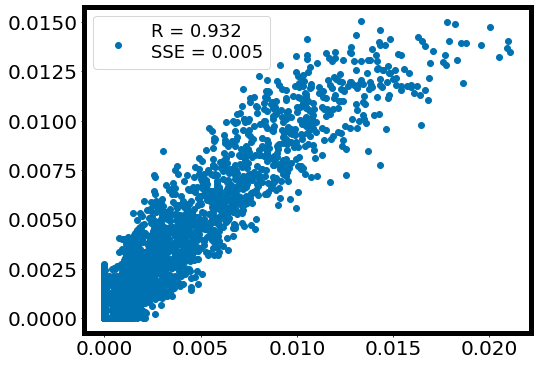

Running trial 24, cycle 1
Epoch: 0, Loss: 132.47054, Residuals: -0.51178, Convergence:   inf
Epoch: 10, Loss: 112.05141, Residuals: -0.47880, Convergence: 0.016937
Epoch: 20, Loss: 94.71442, Residuals: -0.44857, Convergence: 0.016944
Epoch: 30, Loss: 80.08839, Residuals: -0.42115, Convergence: 0.016888
Epoch: 40, Loss: 67.77098, Residuals: -0.39654, Convergence: 0.016795
Epoch: 50, Loss: 57.41084, Residuals: -0.37446, Convergence: 0.016673
Epoch: 60, Loss: 48.70057, Residuals: -0.35442, Convergence: 0.016518
Epoch: 70, Loss: 41.39127, Residuals: -0.33591, Convergence: 0.016289
Epoch: 80, Loss: 35.26570, Residuals: -0.31870, Convergence: 0.016017
Epoch: 90, Loss: 30.13868, Residuals: -0.30262, Convergence: 0.015673
Epoch: 100, Loss: 25.87672, Residuals: -0.28714, Convergence: 0.014919
Epoch: 110, Loss: 22.33205, Residuals: -0.27241, Convergence: 0.014829
Epoch: 120, Loss: 19.41208, Residuals: -0.25815, Convergence: 0.012863
Epoch: 130, Loss: 16.99492, Residuals: -0.24475, Convergence: 0

Epoch: 930, Loss: 30.08319, Residuals: -0.00606, Convergence: 0.002537
Epoch: 940, Loss: 29.50751, Residuals: -0.00628, Convergence: 0.001629
Epoch: 950, Loss: 28.98273, Residuals: -0.00646, Convergence: 0.001922

Epoch: 951, Evidence: 208.79083, Convergence: 0.036883

Epoch: 954, Evidence: 213.84010, Convergence: 0.023612
Epoch: 960, Loss: 31.98061, Residuals: -0.00684, Convergence: 0.002005
Epoch: 970, Loss: 31.33538, Residuals: -0.00711, Convergence: 0.002037
Epoch: 980, Loss: 30.76436, Residuals: -0.00730, Convergence: 0.001871

Epoch: 985, Evidence: 213.76045, Convergence: -0.000373
Epoch: 990, Loss: 31.36530, Residuals: -0.00857, Convergence: 0.003776
Epoch: 1000, Loss: 30.39622, Residuals: -0.01026, Convergence: 0.000741

Epoch: 1000, Evidence: 213.30836, Convergence: -0.002493
Epoch: 1000, Loss: 35.24797, Residuals: -0.00662, Convergence:   inf
Epoch: 1010, Loss: 34.33039, Residuals: -0.00704, Convergence: 0.002488
Epoch: 1020, Loss: 33.58680, Residuals: -0.00736, Convergence: 

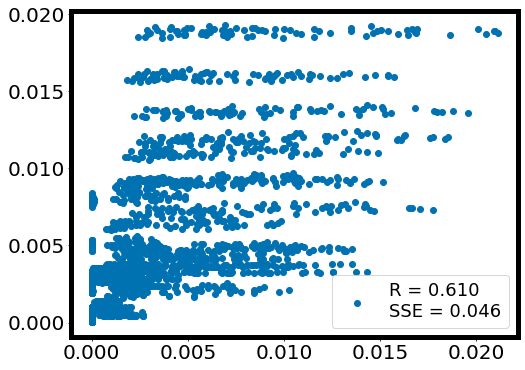

Running trial 24, cycle 2
Epoch: 0, Loss: 325.92525, Residuals: -0.24350, Convergence:   inf
Epoch: 10, Loss: 272.62231, Residuals: -0.22968, Convergence: 0.018008
Epoch: 20, Loss: 228.04202, Residuals: -0.21712, Convergence: 0.018031
Epoch: 30, Loss: 190.69186, Residuals: -0.20545, Convergence: 0.018058
Epoch: 40, Loss: 159.46037, Residuals: -0.19436, Convergence: 0.018031
Epoch: 50, Loss: 133.46838, Residuals: -0.18354, Convergence: 0.017910
Epoch: 60, Loss: 111.95505, Residuals: -0.17286, Convergence: 0.017689
Epoch: 70, Loss: 94.16956, Residuals: -0.16275, Convergence: 0.017284
Epoch: 80, Loss: 79.52438, Residuals: -0.15320, Convergence: 0.016793
Epoch: 90, Loss: 67.44872, Residuals: -0.14431, Convergence: 0.016437
Epoch: 100, Loss: 57.57676, Residuals: -0.13566, Convergence: 0.015634
Epoch: 110, Loss: 49.42036, Residuals: -0.12791, Convergence: 0.015324
Epoch: 120, Loss: 42.67112, Residuals: -0.12088, Convergence: 0.013856
Epoch: 130, Loss: 37.11502, Residuals: -0.11418, Convergen

Epoch: 1010, Loss: 87.51099, Residuals: -0.00873, Convergence: 0.001495
Epoch: 1020, Loss: 86.37186, Residuals: -0.00881, Convergence: 0.001230

Epoch: 1028, Evidence: 520.87866, Convergence: 0.009130
Epoch: 1030, Loss: 91.51104, Residuals: -0.00883, Convergence: 0.001515
Epoch: 1040, Loss: 90.19865, Residuals: -0.00904, Convergence: 0.001353
Epoch: 1050, Loss: 88.99300, Residuals: -0.00911, Convergence: 0.001343
Epoch: 1060, Loss: 87.92485, Residuals: -0.00908, Convergence: 0.001263

Epoch: 1063, Evidence: 524.62592, Convergence: 0.007143
Epoch: 1070, Loss: 92.47197, Residuals: -0.00921, Convergence: 0.001411
Epoch: 1080, Loss: 91.19255, Residuals: -0.00931, Convergence: 0.001246
Epoch: 1090, Loss: 90.06338, Residuals: -0.00935, Convergence: 0.000973

Epoch: 1090, Evidence: 531.51965, Convergence: 0.012970
Epoch: 1090, Loss: 95.68136, Residuals: -0.00935, Convergence:   inf
Epoch: 1100, Loss: 94.22081, Residuals: -0.00953, Convergence: 0.001582
Epoch: 1110, Loss: 92.90865, Residuals: 

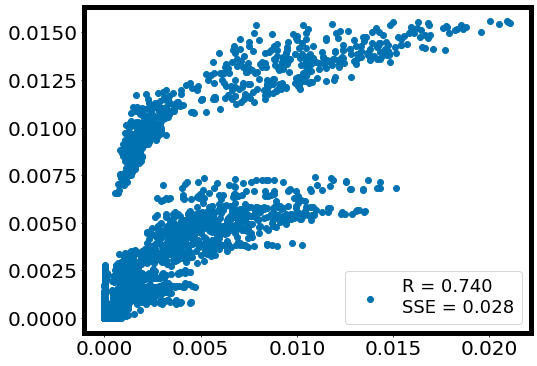

Running trial 24, cycle 3
Epoch: 0, Loss: 421.21227, Residuals: -0.10119, Convergence:   inf
Epoch: 10, Loss: 354.61856, Residuals: -0.09783, Convergence: 0.017386
Epoch: 20, Loss: 298.19101, Residuals: -0.09516, Convergence: 0.017566
Epoch: 30, Loss: 250.41585, Residuals: -0.09317, Convergence: 0.017632
Epoch: 40, Loss: 210.36934, Residuals: -0.09158, Convergence: 0.017505
Epoch: 50, Loss: 177.02979, Residuals: -0.08949, Convergence: 0.017332
Epoch: 60, Loss: 149.44199, Residuals: -0.08661, Convergence: 0.016750
Epoch: 70, Loss: 126.52557, Residuals: -0.08350, Convergence: 0.016684
Epoch: 80, Loss: 107.62815, Residuals: -0.08037, Convergence: 0.016132
Epoch: 90, Loss: 92.03669, Residuals: -0.07738, Convergence: 0.015471
Epoch: 100, Loss: 79.09419, Residuals: -0.07428, Convergence: 0.015008
Epoch: 110, Loss: 68.32221, Residuals: -0.07119, Convergence: 0.014480
Epoch: 120, Loss: 59.28881, Residuals: -0.06812, Convergence: 0.014049
Epoch: 130, Loss: 51.62024, Residuals: -0.06511, Converg

Epoch: 1010, Loss: 138.32426, Residuals: -0.00983, Convergence: 0.001266

Epoch: 1017, Evidence: 809.48071, Convergence: 0.006308
Epoch: 1020, Loss: 145.81064, Residuals: -0.00986, Convergence: 0.001865
Epoch: 1030, Loss: 143.30554, Residuals: -0.01043, Convergence: 0.001520
Epoch: 1040, Loss: 141.24695, Residuals: -0.01049, Convergence: 0.001393
Epoch: 1050, Loss: 139.45287, Residuals: -0.01020, Convergence: 0.001035

Epoch: 1055, Evidence: 813.31671, Convergence: 0.004716
Epoch: 1060, Loss: 145.89346, Residuals: -0.01040, Convergence: 0.001485
Epoch: 1070, Loss: 143.77185, Residuals: -0.01068, Convergence: 0.001272
Epoch: 1080, Loss: 141.95552, Residuals: -0.01054, Convergence: 0.001063

Epoch: 1084, Evidence: 812.99133, Convergence: -0.000400
Epoch: 1090, Loss: 143.99936, Residuals: -0.01293, Convergence: 0.001759
Epoch: 1100, Loss: 141.48090, Residuals: -0.01395, Convergence: 0.001846

Epoch: 1103, Evidence: 805.22351, Convergence: -0.010051
Epoch: 1110, Loss: 152.98074, Residuals:

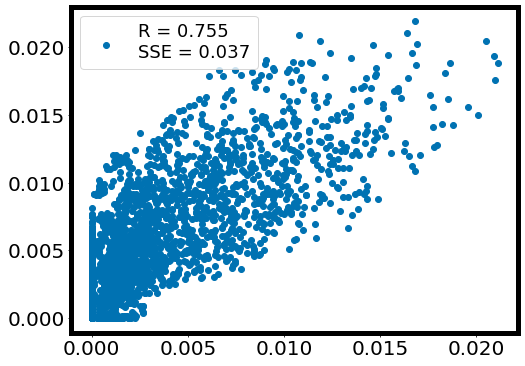

Running trial 24, cycle 4
Epoch: 0, Loss: 437.40324, Residuals: 0.14408, Convergence:   inf
Epoch: 10, Loss: 372.10754, Residuals: 0.12594, Convergence: 0.016291
Epoch: 20, Loss: 316.61938, Residuals: 0.10943, Convergence: 0.016279
Epoch: 30, Loss: 269.50076, Residuals: 0.09474, Convergence: 0.016178
Epoch: 40, Loss: 229.82681, Residuals: 0.08193, Convergence: 0.015919
Epoch: 50, Loss: 196.52640, Residuals: 0.07075, Convergence: 0.015720
Epoch: 60, Loss: 168.91866, Residuals: 0.06131, Convergence: 0.014962
Epoch: 70, Loss: 145.87451, Residuals: 0.05329, Convergence: 0.014355
Epoch: 80, Loss: 126.50214, Residuals: 0.04642, Convergence: 0.014084
Epoch: 90, Loss: 110.09574, Residuals: 0.03992, Convergence: 0.013862
Epoch: 100, Loss: 96.23669, Residuals: 0.03416, Convergence: 0.013199
Epoch: 110, Loss: 84.72618, Residuals: 0.02923, Convergence: 0.012438
Epoch: 120, Loss: 75.05387, Residuals: 0.02487, Convergence: 0.012057
Epoch: 130, Loss: 66.91787, Residuals: 0.02125, Convergence: 0.01136

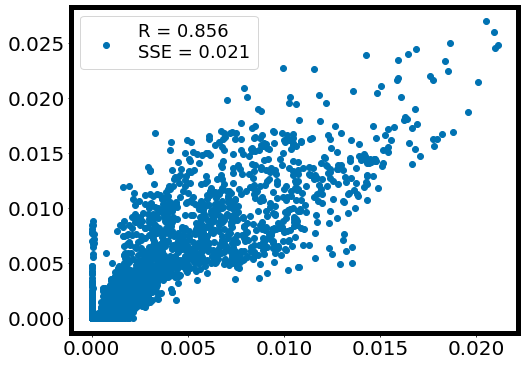

Running trial 24, cycle 5
Epoch: 0, Loss: 529.57835, Residuals: 0.15807, Convergence:   inf
Epoch: 10, Loss: 450.31409, Residuals: 0.13990, Convergence: 0.016390
Epoch: 20, Loss: 382.60794, Residuals: 0.12366, Convergence: 0.016448
Epoch: 30, Loss: 325.31580, Residuals: 0.10907, Convergence: 0.016183
Epoch: 40, Loss: 277.69223, Residuals: 0.09628, Convergence: 0.015761
Epoch: 50, Loss: 237.85526, Residuals: 0.08507, Convergence: 0.015341
Epoch: 60, Loss: 204.48795, Residuals: 0.07522, Convergence: 0.015086
Epoch: 70, Loss: 176.74162, Residuals: 0.06641, Convergence: 0.014706
Epoch: 80, Loss: 153.49849, Residuals: 0.05866, Convergence: 0.013808
Epoch: 90, Loss: 134.06303, Residuals: 0.05227, Convergence: 0.013655
Epoch: 100, Loss: 117.54074, Residuals: 0.04619, Convergence: 0.013105
Epoch: 110, Loss: 103.56318, Residuals: 0.04094, Convergence: 0.012913
Epoch: 120, Loss: 91.92715, Residuals: 0.03692, Convergence: 0.012244
Epoch: 130, Loss: 82.04603, Residuals: 0.03359, Convergence: 0.011

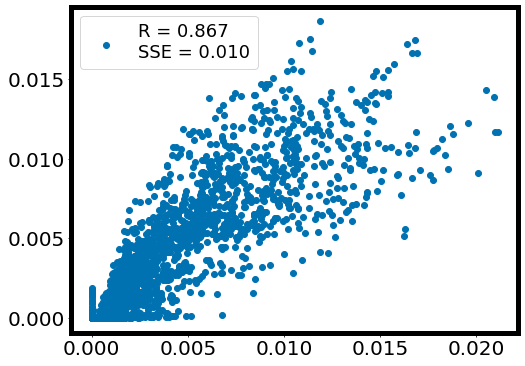

Epoch: 0, Loss: 649.94554, Residuals: 0.17542, Convergence:   inf
Epoch: 10, Loss: 551.49341, Residuals: 0.15594, Convergence: 0.016623
Epoch: 20, Loss: 467.38416, Residuals: 0.13850, Convergence: 0.016719
Epoch: 30, Loss: 396.53537, Residuals: 0.12266, Convergence: 0.016371
Epoch: 40, Loss: 337.64716, Residuals: 0.10885, Convergence: 0.016177
Epoch: 50, Loss: 289.03754, Residuals: 0.09674, Convergence: 0.015383
Epoch: 60, Loss: 248.45198, Residuals: 0.08612, Convergence: 0.015214
Epoch: 70, Loss: 214.37749, Residuals: 0.07645, Convergence: 0.014900
Epoch: 80, Loss: 186.00320, Residuals: 0.06805, Convergence: 0.014182
Epoch: 90, Loss: 161.77133, Residuals: 0.06025, Convergence: 0.013141
Epoch: 100, Loss: 141.80376, Residuals: 0.05374, Convergence: 0.012538
Epoch: 110, Loss: 124.74741, Residuals: 0.04791, Convergence: 0.012836
Epoch: 120, Loss: 110.38036, Residuals: 0.04287, Convergence: 0.011998
Epoch: 130, Loss: 98.15905, Residuals: 0.03846, Convergence: 0.011149
Epoch: 140, Loss: 87.

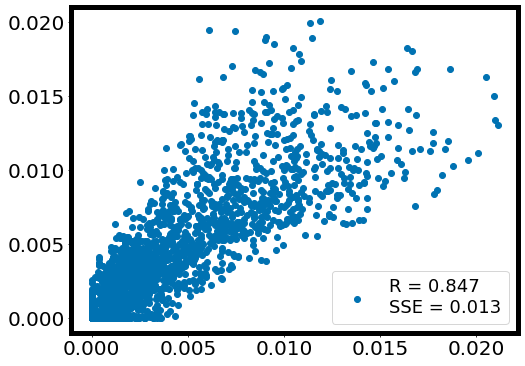

Running trial 25, cycle 1
Epoch: 0, Loss: 118.78776, Residuals: -0.76495, Convergence:   inf
Epoch: 10, Loss: 100.71182, Residuals: -0.70666, Convergence: 0.016833
Epoch: 20, Loss: 85.14014, Residuals: -0.65449, Convergence: 0.016983
Epoch: 30, Loss: 71.92089, Residuals: -0.60686, Convergence: 0.017040
Epoch: 40, Loss: 60.74170, Residuals: -0.56295, Convergence: 0.017019
Epoch: 50, Loss: 51.34113, Residuals: -0.52248, Convergence: 0.016890
Epoch: 60, Loss: 43.46904, Residuals: -0.48527, Convergence: 0.016752
Epoch: 70, Loss: 36.86768, Residuals: -0.45115, Convergence: 0.016552
Epoch: 80, Loss: 31.36370, Residuals: -0.41984, Convergence: 0.016190
Epoch: 90, Loss: 26.79709, Residuals: -0.39125, Convergence: 0.015742
Epoch: 100, Loss: 22.99691, Residuals: -0.36519, Convergence: 0.015253
Epoch: 110, Loss: 19.85452, Residuals: -0.34133, Convergence: 0.014727
Epoch: 120, Loss: 17.22600, Residuals: -0.31948, Convergence: 0.014123
Epoch: 130, Loss: 15.04055, Residuals: -0.29961, Convergence: 0


Epoch: 907, Evidence: 227.85931, Convergence: 0.006983
Epoch: 910, Loss: 40.46517, Residuals: -0.00206, Convergence: 0.003522
Epoch: 920, Loss: 39.52332, Residuals: -0.00266, Convergence: 0.002869

Epoch: 923, Evidence: 227.24048, Convergence: -0.002723
Epoch: 930, Loss: 41.78651, Residuals: -0.00186, Convergence: 0.001576

Epoch: 933, Evidence: 233.54846, Convergence: 0.024360
Epoch: 940, Loss: 42.66401, Residuals: -0.00207, Convergence: 0.001218

Epoch: 942, Evidence: 234.48732, Convergence: 0.004004
Epoch: 950, Loss: 43.39940, Residuals: -0.00228, Convergence: 0.002430

Epoch: 958, Evidence: 236.65720, Convergence: 0.009169
Epoch: 960, Loss: 44.11248, Residuals: -0.00244, Convergence: 0.001676
Epoch: 970, Loss: 43.39863, Residuals: -0.00261, Convergence: 0.001531
Epoch: 980, Loss: 42.76555, Residuals: -0.00274, Convergence: 0.001261

Epoch: 987, Evidence: 234.92931, Convergence: -0.007355
Epoch: 990, Loss: 45.22090, Residuals: -0.00241, Convergence: 0.000910

Epoch: 990, Evidence: 

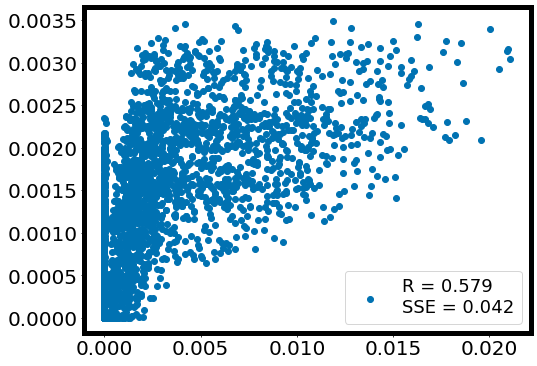

Running trial 25, cycle 2
Epoch: 0, Loss: 188.51657, Residuals: -0.57796, Convergence:   inf
Epoch: 10, Loss: 161.63173, Residuals: -0.53087, Convergence: 0.015642
Epoch: 20, Loss: 138.35233, Residuals: -0.48749, Convergence: 0.015664
Epoch: 30, Loss: 118.47831, Residuals: -0.44742, Convergence: 0.015616
Epoch: 40, Loss: 101.58929, Residuals: -0.41092, Convergence: 0.015430
Epoch: 50, Loss: 87.27675, Residuals: -0.37804, Convergence: 0.015226
Epoch: 60, Loss: 75.11309, Residuals: -0.34865, Convergence: 0.015027
Epoch: 70, Loss: 64.77555, Residuals: -0.32212, Convergence: 0.014810
Epoch: 80, Loss: 56.07987, Residuals: -0.29819, Convergence: 0.014187
Epoch: 90, Loss: 48.79941, Residuals: -0.27620, Convergence: 0.014129
Epoch: 100, Loss: 42.63180, Residuals: -0.25627, Convergence: 0.013269
Epoch: 110, Loss: 37.36958, Residuals: -0.23804, Convergence: 0.013253
Epoch: 120, Loss: 32.87777, Residuals: -0.22134, Convergence: 0.012585
Epoch: 130, Loss: 28.98317, Residuals: -0.20627, Convergence

Epoch: 990, Loss: 74.17682, Residuals: -0.01165, Convergence: 0.003705
Epoch: 1000, Loss: 72.37553, Residuals: -0.01142, Convergence: 0.002559

Epoch: 1001, Evidence: 507.49796, Convergence: -0.001504
Epoch: 1010, Loss: 79.95329, Residuals: -0.01113, Convergence: 0.001867
Epoch: 1020, Loss: 78.48451, Residuals: -0.01099, Convergence: 0.001855
Epoch: 1030, Loss: 77.22449, Residuals: -0.01079, Convergence: 0.001603

Epoch: 1034, Evidence: 529.54565, Convergence: 0.040194
Epoch: 1040, Loss: 80.99428, Residuals: -0.01063, Convergence: 0.001969
Epoch: 1050, Loss: 79.52925, Residuals: -0.01051, Convergence: 0.001992

Epoch: 1055, Evidence: 528.57776, Convergence: -0.001831

Epoch: 1057, Evidence: 544.28442, Convergence: 0.027079
Epoch: 1060, Loss: 88.81383, Residuals: -0.01064, Convergence: 0.001386
Epoch: 1070, Loss: 87.75971, Residuals: -0.01048, Convergence: 0.001157

Epoch: 1072, Evidence: 545.25262, Convergence: 0.001776
Epoch: 1080, Loss: 90.30898, Residuals: -0.01031, Convergence: 0.0

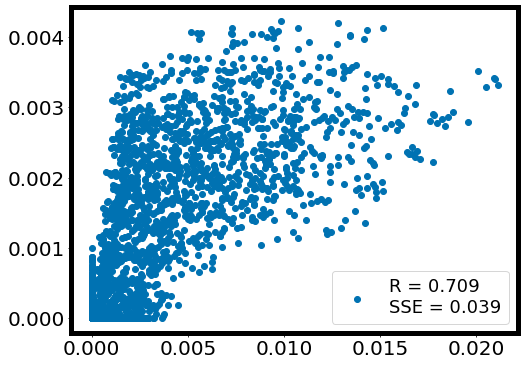

Running trial 25, cycle 3
Epoch: 0, Loss: 353.57579, Residuals: 0.07923, Convergence:   inf
Epoch: 10, Loss: 300.68799, Residuals: 0.06721, Convergence: 0.016344
Epoch: 20, Loss: 255.71944, Residuals: 0.05715, Convergence: 0.016317
Epoch: 30, Loss: 217.61751, Residuals: 0.04883, Convergence: 0.016209
Epoch: 40, Loss: 185.52084, Residuals: 0.04152, Convergence: 0.015954
Epoch: 50, Loss: 158.73355, Residuals: 0.03508, Convergence: 0.015460
Epoch: 60, Loss: 136.44569, Residuals: 0.02968, Convergence: 0.014837
Epoch: 70, Loss: 117.87845, Residuals: 0.02541, Convergence: 0.014633
Epoch: 80, Loss: 102.15344, Residuals: 0.02160, Convergence: 0.014432
Epoch: 90, Loss: 88.68462, Residuals: 0.01812, Convergence: 0.014467
Epoch: 100, Loss: 77.07526, Residuals: 0.01584, Convergence: 0.014351
Epoch: 110, Loss: 66.99207, Residuals: 0.01352, Convergence: 0.014053
Epoch: 120, Loss: 58.42587, Residuals: 0.01169, Convergence: 0.014044
Epoch: 130, Loss: 51.09251, Residuals: 0.01010, Convergence: 0.013583

Epoch: 840, Loss: 189.25851, Residuals: 0.00339, Convergence: 0.001612

Epoch: 845, Evidence: 842.63232, Convergence: 0.002531

Epoch: 849, Evidence: 845.58752, Convergence: 0.003495
Epoch: 850, Loss: 193.69197, Residuals: 0.00316, Convergence: 0.002219
Epoch: 860, Loss: 190.59331, Residuals: 0.00294, Convergence: 0.001727
Epoch: 870, Loss: 187.76038, Residuals: 0.00275, Convergence: 0.001563

Epoch: 872, Evidence: 846.60193, Convergence: 0.001198
Epoch: 880, Loss: 188.63025, Residuals: 0.00257, Convergence: 0.001286

Epoch: 886, Evidence: 851.40045, Convergence: 0.005636
Epoch: 890, Loss: 189.81407, Residuals: 0.00237, Convergence: 0.000774

Epoch: 890, Evidence: 851.15564, Convergence: -0.000288
Epoch: 890, Loss: 191.55624, Residuals: 0.00237, Convergence:   inf
Epoch: 900, Loss: 185.96465, Residuals: 0.00140, Convergence: 0.003353

Epoch: 906, Evidence: 854.15784, Convergence: 0.003228
Epoch: 910, Loss: 186.61761, Residuals: 0.00088, Convergence: 0.001755

Epoch: 913, Evidence: 855.

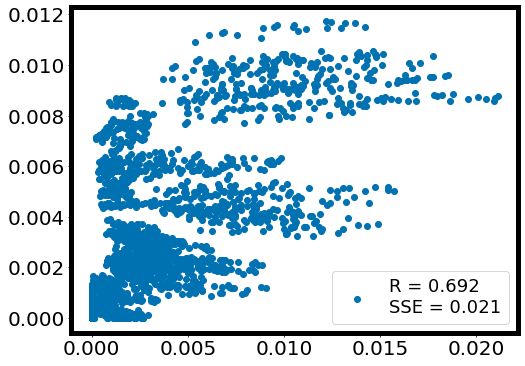

Running trial 25, cycle 4
Epoch: 0, Loss: 489.28441, Residuals: 0.07152, Convergence:   inf
Epoch: 10, Loss: 415.49411, Residuals: 0.06193, Convergence: 0.016516
Epoch: 20, Loss: 352.73441, Residuals: 0.05395, Convergence: 0.016502
Epoch: 30, Loss: 299.57910, Residuals: 0.04708, Convergence: 0.016411
Epoch: 40, Loss: 254.98688, Residuals: 0.04076, Convergence: 0.016088
Epoch: 50, Loss: 217.95094, Residuals: 0.03528, Convergence: 0.015567
Epoch: 60, Loss: 187.33069, Residuals: 0.03101, Convergence: 0.014951
Epoch: 70, Loss: 161.77048, Residuals: 0.02736, Convergence: 0.014869
Epoch: 80, Loss: 139.69228, Residuals: 0.02415, Convergence: 0.015016
Epoch: 90, Loss: 120.60959, Residuals: 0.02094, Convergence: 0.015176
Epoch: 100, Loss: 104.27213, Residuals: 0.01798, Convergence: 0.015073
Epoch: 110, Loss: 90.19969, Residuals: 0.01497, Convergence: 0.014735
Epoch: 120, Loss: 78.22467, Residuals: 0.01234, Convergence: 0.014492
Epoch: 130, Loss: 68.18059, Residuals: 0.01021, Convergence: 0.0140

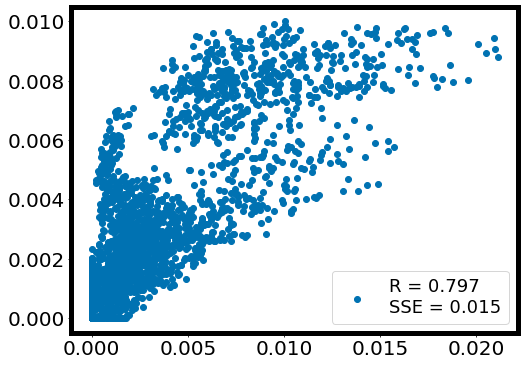

Running trial 25, cycle 5
Epoch: 0, Loss: 530.49181, Residuals: 0.14151, Convergence:   inf
Epoch: 10, Loss: 452.05313, Residuals: 0.12599, Convergence: 0.016262
Epoch: 20, Loss: 384.92630, Residuals: 0.11247, Convergence: 0.016139
Epoch: 30, Loss: 328.21448, Residuals: 0.10064, Convergence: 0.015999
Epoch: 40, Loss: 280.58163, Residuals: 0.09021, Convergence: 0.015614
Epoch: 50, Loss: 240.97525, Residuals: 0.08072, Convergence: 0.015036
Epoch: 60, Loss: 208.14906, Residuals: 0.07245, Convergence: 0.014450
Epoch: 70, Loss: 180.75964, Residuals: 0.06497, Convergence: 0.013976
Epoch: 80, Loss: 157.77521, Residuals: 0.05808, Convergence: 0.013514
Epoch: 90, Loss: 138.27037, Residuals: 0.05164, Convergence: 0.013092
Epoch: 100, Loss: 122.05126, Residuals: 0.04590, Convergence: 0.012400
Epoch: 110, Loss: 108.42493, Residuals: 0.04079, Convergence: 0.011726
Epoch: 120, Loss: 96.91051, Residuals: 0.03603, Convergence: 0.011315
Epoch: 130, Loss: 87.05899, Residuals: 0.03164, Convergence: 0.010


Epoch: 903, Evidence: 1612.68799, Convergence: -0.003411


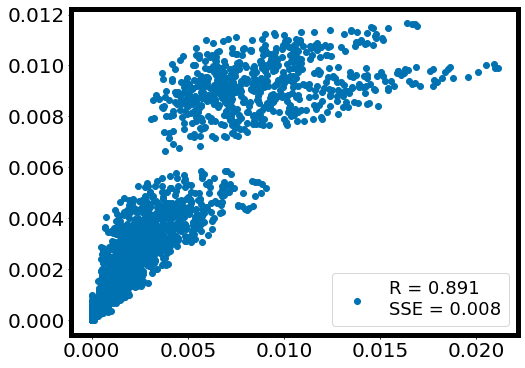

Epoch: 0, Loss: 645.28246, Residuals: 0.27230, Convergence:   inf
Epoch: 10, Loss: 548.53101, Residuals: 0.24500, Convergence: 0.016465
Epoch: 20, Loss: 466.28522, Residuals: 0.22091, Convergence: 0.016279
Epoch: 30, Loss: 397.02686, Residuals: 0.19918, Convergence: 0.016067
Epoch: 40, Loss: 339.27261, Residuals: 0.17935, Convergence: 0.015602
Epoch: 50, Loss: 291.13272, Residuals: 0.16104, Convergence: 0.015148
Epoch: 60, Loss: 250.87228, Residuals: 0.14459, Convergence: 0.014780
Epoch: 70, Loss: 216.94695, Residuals: 0.13003, Convergence: 0.014676
Epoch: 80, Loss: 187.92923, Residuals: 0.11614, Convergence: 0.014026
Epoch: 90, Loss: 163.28143, Residuals: 0.10343, Convergence: 0.014103
Epoch: 100, Loss: 142.38739, Residuals: 0.09218, Convergence: 0.013459
Epoch: 110, Loss: 124.85198, Residuals: 0.08208, Convergence: 0.013059
Epoch: 120, Loss: 110.30696, Residuals: 0.07330, Convergence: 0.011969
Epoch: 130, Loss: 98.05010, Residuals: 0.06543, Convergence: 0.011535
Epoch: 140, Loss: 87.

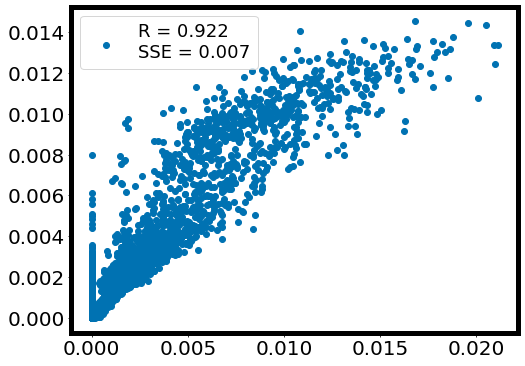

Running trial 26, cycle 1
Epoch: 0, Loss: 196.17615, Residuals: -0.21261, Convergence:   inf
Epoch: 10, Loss: 163.93300, Residuals: -0.21056, Convergence: 0.018136
Epoch: 20, Loss: 136.90886, Residuals: -0.20847, Convergence: 0.018214
Epoch: 30, Loss: 114.24220, Residuals: -0.20571, Convergence: 0.018305
Epoch: 40, Loss: 95.24844, Residuals: -0.20237, Convergence: 0.018381
Epoch: 50, Loss: 79.40854, Residuals: -0.19839, Convergence: 0.017970
Epoch: 60, Loss: 66.28945, Residuals: -0.19367, Convergence: 0.018186
Epoch: 70, Loss: 55.40223, Residuals: -0.18870, Convergence: 0.018012
Epoch: 80, Loss: 46.40841, Residuals: -0.18374, Convergence: 0.017745
Epoch: 90, Loss: 38.99189, Residuals: -0.17883, Convergence: 0.017412
Epoch: 100, Loss: 32.92522, Residuals: -0.17388, Convergence: 0.016702
Epoch: 110, Loss: 27.93339, Residuals: -0.16904, Convergence: 0.016271
Epoch: 120, Loss: 23.80736, Residuals: -0.16418, Convergence: 0.015985
Epoch: 130, Loss: 20.42374, Residuals: -0.15945, Convergence:

Epoch: 890, Loss: 46.78186, Residuals: 0.01136, Convergence: 0.001118

Epoch: 893, Evidence: 219.97237, Convergence: 0.010923
Epoch: 900, Loss: 47.67982, Residuals: 0.01112, Convergence: 0.001680
Epoch: 910, Loss: 47.05936, Residuals: 0.01100, Convergence: 0.000746

Epoch: 910, Evidence: 222.11044, Convergence: 0.009626
Epoch: 910, Loss: 48.63628, Residuals: 0.01100, Convergence:   inf

Epoch: 919, Evidence: 222.48666, Convergence: 0.001691
Epoch: 920, Loss: 49.42602, Residuals: 0.01072, Convergence: 0.001910
Epoch: 930, Loss: 48.66513, Residuals: 0.01046, Convergence: 0.001776
Epoch: 940, Loss: 47.99348, Residuals: 0.01019, Convergence: 0.001085
Epoch: 950, Loss: 47.39318, Residuals: 0.01007, Convergence: 0.000869

Epoch: 950, Evidence: 226.62781, Convergence: 0.018273
Epoch: 950, Loss: 48.76694, Residuals: 0.01007, Convergence:   inf
Epoch: 960, Loss: 48.05475, Residuals: 0.00985, Convergence: 0.000950

Epoch: 960, Evidence: 226.85797, Convergence: 0.001015
Epoch: 960, Loss: 49.57483

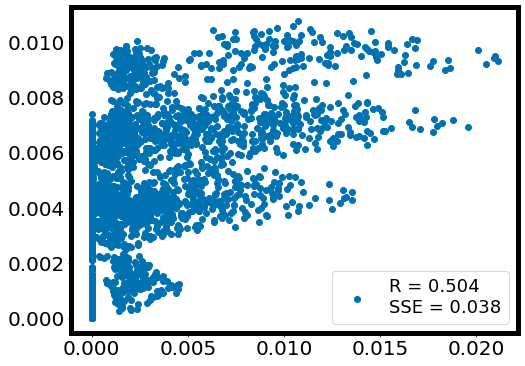

Running trial 26, cycle 2
Epoch: 0, Loss: 281.10198, Residuals: 0.07933, Convergence:   inf
Epoch: 10, Loss: 237.12897, Residuals: 0.06126, Convergence: 0.017247
Epoch: 20, Loss: 199.37671, Residuals: 0.04559, Convergence: 0.017696
Epoch: 30, Loss: 167.01947, Residuals: 0.03239, Convergence: 0.017961
Epoch: 40, Loss: 139.79079, Residuals: 0.02107, Convergence: 0.017900
Epoch: 50, Loss: 117.48657, Residuals: 0.01193, Convergence: 0.017130
Epoch: 60, Loss: 99.14855, Residuals: 0.00432, Convergence: 0.017048
Epoch: 70, Loss: 83.99589, Residuals: -0.00202, Convergence: 0.016593
Epoch: 80, Loss: 71.47136, Residuals: -0.00725, Convergence: 0.016226
Epoch: 90, Loss: 61.07030, Residuals: -0.01154, Convergence: 0.015856
Epoch: 100, Loss: 52.30923, Residuals: -0.01520, Convergence: 0.015601
Epoch: 110, Loss: 44.96989, Residuals: -0.01821, Convergence: 0.015053
Epoch: 120, Loss: 38.87270, Residuals: -0.02038, Convergence: 0.014602
Epoch: 130, Loss: 33.75352, Residuals: -0.02213, Convergence: 0.01

Epoch: 1000, Loss: 74.09151, Residuals: -0.00366, Convergence: 0.001818
Epoch: 1010, Loss: 72.94431, Residuals: -0.00368, Convergence: 0.001434
Epoch: 1020, Loss: 71.88557, Residuals: -0.00369, Convergence: 0.001582
Epoch: 1030, Loss: 70.96085, Residuals: -0.00362, Convergence: 0.001274

Epoch: 1031, Evidence: 491.66553, Convergence: 0.004221
Epoch: 1040, Loss: 76.00807, Residuals: -0.00381, Convergence: 0.001568
Epoch: 1050, Loss: 74.72411, Residuals: -0.00399, Convergence: 0.001873
Epoch: 1060, Loss: 73.62719, Residuals: -0.00401, Convergence: 0.001411

Epoch: 1063, Evidence: 498.26001, Convergence: 0.013235
Epoch: 1070, Loss: 78.42470, Residuals: -0.00415, Convergence: 0.001931
Epoch: 1080, Loss: 77.10085, Residuals: -0.00425, Convergence: 0.001481
Epoch: 1090, Loss: 75.94069, Residuals: -0.00425, Convergence: 0.001478

Epoch: 1099, Evidence: 500.27887, Convergence: 0.004035
Epoch: 1100, Loss: 80.50363, Residuals: -0.00419, Convergence: 0.002089
Epoch: 1110, Loss: 79.05763, Residual

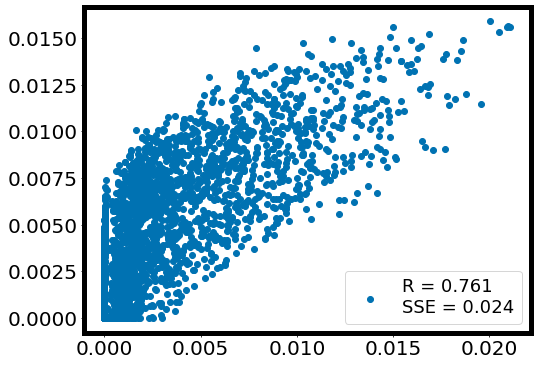

Running trial 26, cycle 3
Epoch: 0, Loss: 329.43028, Residuals: -0.00230, Convergence:   inf
Epoch: 10, Loss: 279.49319, Residuals: -0.00659, Convergence: 0.016743
Epoch: 20, Loss: 236.01151, Residuals: -0.01069, Convergence: 0.017265
Epoch: 30, Loss: 198.73091, Residuals: -0.01425, Convergence: 0.017341
Epoch: 40, Loss: 167.67206, Residuals: -0.01667, Convergence: 0.016845
Epoch: 50, Loss: 142.25821, Residuals: -0.01800, Convergence: 0.016229
Epoch: 60, Loss: 121.01415, Residuals: -0.01961, Convergence: 0.016066
Epoch: 70, Loss: 103.37739, Residuals: -0.02084, Convergence: 0.015575
Epoch: 80, Loss: 88.88537, Residuals: -0.02141, Convergence: 0.014832
Epoch: 90, Loss: 76.98051, Residuals: -0.02168, Convergence: 0.014342
Epoch: 100, Loss: 67.03694, Residuals: -0.02168, Convergence: 0.013786
Epoch: 110, Loss: 58.73104, Residuals: -0.02135, Convergence: 0.012658
Epoch: 120, Loss: 51.77508, Residuals: -0.02093, Convergence: 0.011911
Epoch: 130, Loss: 46.01100, Residuals: -0.02026, Converge


Epoch: 975, Evidence: 803.15546, Convergence: 0.004757
Epoch: 980, Loss: 162.14188, Residuals: -0.00649, Convergence: 0.002372
Epoch: 990, Loss: 159.02003, Residuals: -0.00655, Convergence: 0.002056

Epoch: 994, Evidence: 805.27075, Convergence: 0.002627
Epoch: 1000, Loss: 162.12091, Residuals: -0.00678, Convergence: 0.002056
Epoch: 1010, Loss: 158.84235, Residuals: -0.00693, Convergence: 0.002168

Epoch: 1017, Evidence: 797.42291, Convergence: -0.009842


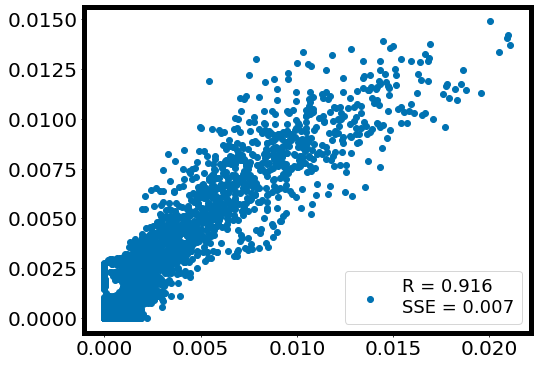

Running trial 26, cycle 4
Epoch: 0, Loss: 481.75887, Residuals: -0.00697, Convergence:   inf
Epoch: 10, Loss: 407.42560, Residuals: -0.00935, Convergence: 0.017039
Epoch: 20, Loss: 343.36313, Residuals: -0.01162, Convergence: 0.017408
Epoch: 30, Loss: 288.75595, Residuals: -0.01359, Convergence: 0.017476
Epoch: 40, Loss: 243.57066, Residuals: -0.01500, Convergence: 0.016992
Epoch: 50, Loss: 206.53438, Residuals: -0.01621, Convergence: 0.016581
Epoch: 60, Loss: 175.58737, Residuals: -0.01728, Convergence: 0.016290
Epoch: 70, Loss: 149.85678, Residuals: -0.01803, Convergence: 0.015800
Epoch: 80, Loss: 128.44931, Residuals: -0.01840, Convergence: 0.015166
Epoch: 90, Loss: 110.47265, Residuals: -0.01830, Convergence: 0.015177
Epoch: 100, Loss: 95.44346, Residuals: -0.01791, Convergence: 0.014407
Epoch: 110, Loss: 82.77671, Residuals: -0.01761, Convergence: 0.014167
Epoch: 120, Loss: 72.24639, Residuals: -0.01727, Convergence: 0.012976
Epoch: 130, Loss: 63.48248, Residuals: -0.01699, Conver

Epoch: 980, Loss: 231.86603, Residuals: -0.00870, Convergence: 0.001264

Epoch: 983, Evidence: 1130.32141, Convergence: -0.009933
Epoch: 990, Loss: 252.53305, Residuals: -0.00813, Convergence: 0.001620
Epoch: 1000, Loss: 248.04124, Residuals: -0.00816, Convergence: 0.001330
Epoch: 1010, Loss: 244.41859, Residuals: -0.00800, Convergence: 0.000951

Epoch: 1010, Evidence: 1149.35193, Convergence: 0.006789
Epoch: 1010, Loss: 250.38687, Residuals: -0.00800, Convergence:   inf
Epoch: 1020, Loss: 246.07091, Residuals: -0.00803, Convergence: 0.001413

Epoch: 1028, Evidence: 1146.64697, Convergence: -0.002359
Epoch: 1030, Loss: 252.12347, Residuals: -0.00797, Convergence: 0.001209

Epoch: 1031, Evidence: 1153.98694, Convergence: 0.004017

Epoch: 1034, Evidence: 1155.73999, Convergence: 0.001517

Epoch: 1036, Evidence: 1156.66370, Convergence: 0.000799
Epoch: 1040, Loss: 256.23962, Residuals: -0.00795, Convergence: 0.001633
Epoch: 1050, Loss: 251.56262, Residuals: -0.00788, Convergence: 0.001597

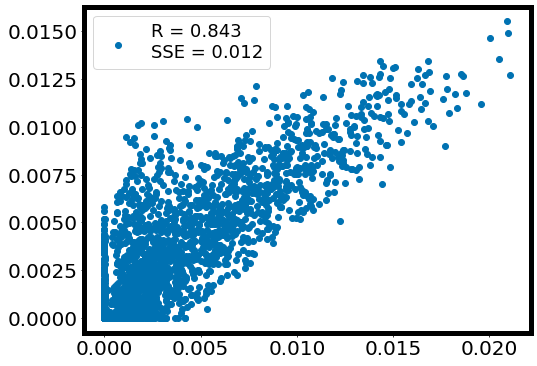

Running trial 26, cycle 5
Epoch: 0, Loss: 636.30412, Residuals: 0.07111, Convergence:   inf
Epoch: 10, Loss: 536.53943, Residuals: 0.06222, Convergence: 0.017381
Epoch: 20, Loss: 450.63763, Residuals: 0.05406, Convergence: 0.017743
Epoch: 30, Loss: 377.69269, Residuals: 0.04635, Convergence: 0.017823
Epoch: 40, Loss: 317.41141, Residuals: 0.03933, Convergence: 0.017175
Epoch: 50, Loss: 268.32339, Residuals: 0.03327, Convergence: 0.016750
Epoch: 60, Loss: 228.16917, Residuals: 0.02855, Convergence: 0.015924
Epoch: 70, Loss: 194.79005, Residuals: 0.02432, Convergence: 0.015819
Epoch: 80, Loss: 167.01569, Residuals: 0.02061, Convergence: 0.015183
Epoch: 90, Loss: 144.04099, Residuals: 0.01761, Convergence: 0.014650
Epoch: 100, Loss: 124.94367, Residuals: 0.01491, Convergence: 0.014192
Epoch: 110, Loss: 109.02274, Residuals: 0.01247, Convergence: 0.013174
Epoch: 120, Loss: 95.55004, Residuals: 0.01020, Convergence: 0.013078
Epoch: 130, Loss: 84.25233, Residuals: 0.00824, Convergence: 0.012

Epoch: 1000, Loss: 304.22827, Residuals: -0.01647, Convergence: 0.001026

Epoch: 1008, Evidence: 1467.02271, Convergence: 0.007945
Epoch: 1010, Loss: 312.32361, Residuals: -0.01634, Convergence: 0.001780
Epoch: 1020, Loss: 307.51318, Residuals: -0.01774, Convergence: 0.001555
Epoch: 1030, Loss: 303.52551, Residuals: -0.01813, Convergence: 0.001101

Epoch: 1034, Evidence: 1470.99597, Convergence: 0.002701
Epoch: 1040, Loss: 310.46265, Residuals: -0.01899, Convergence: 0.001433
Epoch: 1050, Loss: 306.49756, Residuals: -0.01963, Convergence: 0.001091

Epoch: 1057, Evidence: 1471.85291, Convergence: 0.000582
Epoch: 1060, Loss: 306.95386, Residuals: -0.02221, Convergence: 0.001455
Epoch: 1070, Loss: 302.09143, Residuals: -0.02634, Convergence: 0.001437
Epoch: 1080, Loss: 297.38113, Residuals: -0.02566, Convergence: 0.001558
Epoch: 1090, Loss: 293.09152, Residuals: -0.02287, Convergence: 0.001446

Epoch: 1097, Evidence: 1448.87549, Convergence: -0.015267
Epoch: 1100, Loss: 318.34659, Residua

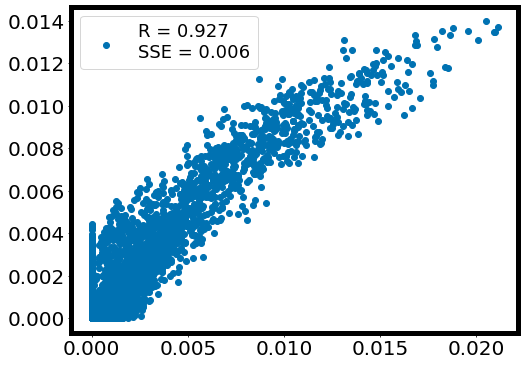

Epoch: 0, Loss: 696.54375, Residuals: 0.07231, Convergence:   inf
Epoch: 10, Loss: 588.46832, Residuals: 0.06338, Convergence: 0.017186
Epoch: 20, Loss: 495.32083, Residuals: 0.05518, Convergence: 0.017501
Epoch: 30, Loss: 416.85550, Residuals: 0.04748, Convergence: 0.017226
Epoch: 40, Loss: 352.10898, Residuals: 0.04070, Convergence: 0.016765
Epoch: 50, Loss: 299.08539, Residuals: 0.03494, Convergence: 0.016229
Epoch: 60, Loss: 255.33481, Residuals: 0.03009, Convergence: 0.015809
Epoch: 70, Loss: 219.07152, Residuals: 0.02590, Convergence: 0.015166
Epoch: 80, Loss: 188.92050, Residuals: 0.02236, Convergence: 0.014467
Epoch: 90, Loss: 163.98093, Residuals: 0.01960, Convergence: 0.013624
Epoch: 100, Loss: 143.07578, Residuals: 0.01701, Convergence: 0.013457
Epoch: 110, Loss: 125.72911, Residuals: 0.01472, Convergence: 0.012916
Epoch: 120, Loss: 111.17376, Residuals: 0.01250, Convergence: 0.012032
Epoch: 130, Loss: 98.73312, Residuals: 0.01068, Convergence: 0.011791
Epoch: 140, Loss: 88.


Epoch: 964, Evidence: 1891.30164, Convergence: 0.001828
Epoch: 970, Loss: 392.69891, Residuals: -0.00803, Convergence: 0.001152

Epoch: 974, Evidence: 1892.93604, Convergence: 0.000863
Epoch: 980, Loss: 389.13715, Residuals: -0.00926, Convergence: 0.001606
Epoch: 990, Loss: 383.13556, Residuals: -0.00956, Convergence: 0.001447

Epoch: 999, Evidence: 1881.55811, Convergence: -0.005178
Epoch: 1000, Loss: 398.25848, Residuals: -0.00783, Convergence: 0.001361
Epoch: 1010, Loss: 393.52484, Residuals: -0.00804, Convergence: 0.001107

Epoch: 1017, Evidence: 1892.78210, Convergence: 0.000782
Epoch: 1020, Loss: 390.02606, Residuals: -0.00862, Convergence: 0.002007
Epoch: 1030, Loss: 383.74329, Residuals: -0.00938, Convergence: 0.001317
Epoch: 1040, Loss: 378.85522, Residuals: -0.00847, Convergence: 0.001147

Epoch: 1043, Evidence: 1880.93420, Convergence: -0.005512
Epoch: 1050, Loss: 396.92807, Residuals: -0.00820, Convergence: 0.001200

Epoch: 1059, Evidence: 1895.40918, Convergence: 0.002167

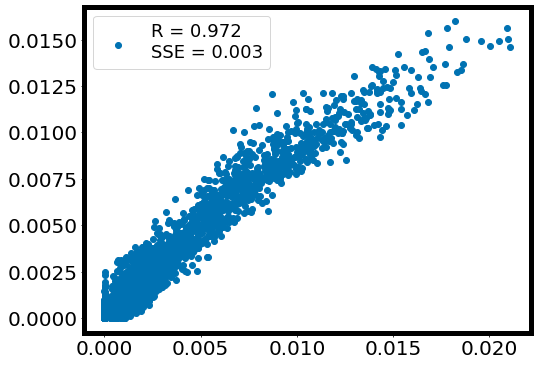

Running trial 27, cycle 1
Epoch: 0, Loss: 140.73433, Residuals: -1.22795, Convergence:   inf
Epoch: 10, Loss: 118.59081, Residuals: -1.13127, Convergence: 0.017329
Epoch: 20, Loss: 99.92898, Residuals: -1.04490, Convergence: 0.017229
Epoch: 30, Loss: 84.21078, Residuals: -0.96651, Convergence: 0.017316
Epoch: 40, Loss: 70.88361, Residuals: -0.89521, Convergence: 0.017406
Epoch: 50, Loss: 59.65940, Residuals: -0.83076, Convergence: 0.017355
Epoch: 60, Loss: 50.26894, Residuals: -0.77257, Convergence: 0.017194
Epoch: 70, Loss: 42.45649, Residuals: -0.71969, Convergence: 0.016807
Epoch: 80, Loss: 35.95581, Residuals: -0.67177, Convergence: 0.016611
Epoch: 90, Loss: 30.58186, Residuals: -0.62814, Convergence: 0.015641
Epoch: 100, Loss: 26.21296, Residuals: -0.58792, Convergence: 0.015076
Epoch: 110, Loss: 22.57888, Residuals: -0.55109, Convergence: 0.014860
Epoch: 120, Loss: 19.57340, Residuals: -0.51696, Convergence: 0.014428
Epoch: 130, Loss: 17.10307, Residuals: -0.48513, Convergence: 0


Epoch: 713, Evidence: 212.91609, Convergence: 0.002781

Epoch: 718, Evidence: 213.61499, Convergence: 0.003272
Epoch: 720, Loss: 58.93900, Residuals: 0.01008, Convergence: 0.001276

Epoch: 721, Evidence: 216.00333, Convergence: 0.011057

Epoch: 722, Evidence: 213.33754, Convergence: -0.012496


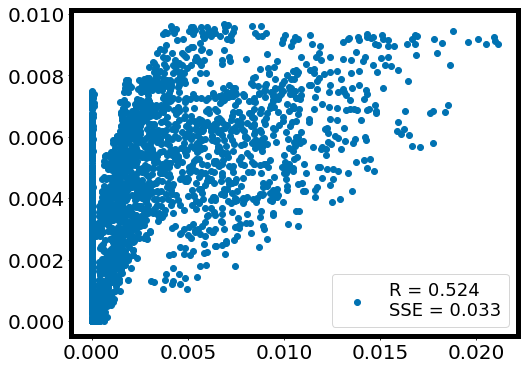

Running trial 27, cycle 2
Epoch: 0, Loss: 175.72913, Residuals: -0.45929, Convergence:   inf
Epoch: 10, Loss: 150.23593, Residuals: -0.42283, Convergence: 0.015814
Epoch: 20, Loss: 128.46864, Residuals: -0.38990, Convergence: 0.015753
Epoch: 30, Loss: 109.85916, Residuals: -0.35983, Convergence: 0.015811
Epoch: 40, Loss: 93.82665, Residuals: -0.33206, Convergence: 0.015964
Epoch: 50, Loss: 80.08020, Residuals: -0.30635, Convergence: 0.015932
Epoch: 60, Loss: 68.47271, Residuals: -0.28268, Convergence: 0.015639
Epoch: 70, Loss: 58.78265, Residuals: -0.26106, Convergence: 0.014961
Epoch: 80, Loss: 50.87689, Residuals: -0.24103, Convergence: 0.014311
Epoch: 90, Loss: 44.25402, Residuals: -0.22276, Convergence: 0.013833
Epoch: 100, Loss: 38.70116, Residuals: -0.20614, Convergence: 0.013038
Epoch: 110, Loss: 34.06541, Residuals: -0.19098, Convergence: 0.012709
Epoch: 120, Loss: 30.18448, Residuals: -0.17720, Convergence: 0.011791
Epoch: 130, Loss: 26.94596, Residuals: -0.16447, Convergence:

Epoch: 1020, Loss: 68.12698, Residuals: -0.01432, Convergence: 0.001135
Epoch: 1030, Loss: 67.27058, Residuals: -0.01392, Convergence: 0.001260

Epoch: 1032, Evidence: 448.39655, Convergence: -0.010234
Epoch: 1040, Loss: 80.07521, Residuals: -0.01493, Convergence: 0.001281
Epoch: 1050, Loss: 79.09460, Residuals: -0.01484, Convergence: 0.001156
Epoch: 1060, Loss: 78.16310, Residuals: -0.01474, Convergence: 0.001155
Epoch: 1070, Loss: 77.28559, Residuals: -0.01462, Convergence: 0.000948

Epoch: 1070, Evidence: 475.38116, Convergence: 0.047111
Epoch: 1070, Loss: 84.09555, Residuals: -0.01462, Convergence:   inf
Epoch: 1080, Loss: 83.01090, Residuals: -0.01457, Convergence: 0.001283
Epoch: 1090, Loss: 81.97314, Residuals: -0.01445, Convergence: 0.001263
Epoch: 1100, Loss: 80.97175, Residuals: -0.01427, Convergence: 0.001238
Epoch: 1110, Loss: 80.01317, Residuals: -0.01410, Convergence: 0.001217

Epoch: 1117, Evidence: 477.07599, Convergence: 0.003553
Epoch: 1120, Loss: 85.52962, Residuals:

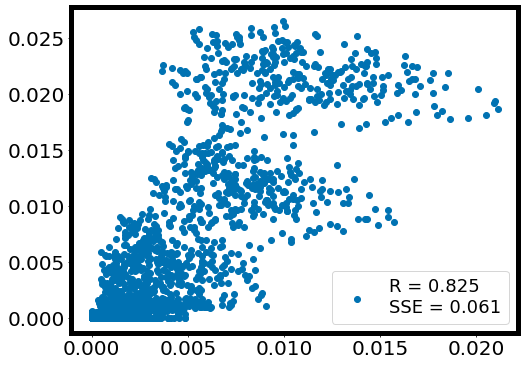

Running trial 27, cycle 3
Epoch: 0, Loss: 288.01497, Residuals: -0.26903, Convergence:   inf
Epoch: 10, Loss: 245.44762, Residuals: -0.24832, Convergence: 0.016074
Epoch: 20, Loss: 209.43022, Residuals: -0.22953, Convergence: 0.015954
Epoch: 30, Loss: 178.75180, Residuals: -0.21226, Convergence: 0.015976
Epoch: 40, Loss: 152.63734, Residuals: -0.19643, Convergence: 0.015832
Epoch: 50, Loss: 130.71277, Residuals: -0.18190, Convergence: 0.015427
Epoch: 60, Loss: 112.59552, Residuals: -0.16830, Convergence: 0.014715
Epoch: 70, Loss: 97.67169, Residuals: -0.15556, Convergence: 0.014134
Epoch: 80, Loss: 85.23376, Residuals: -0.14377, Convergence: 0.013741
Epoch: 90, Loss: 74.53742, Residuals: -0.13310, Convergence: 0.013283
Epoch: 100, Loss: 65.31404, Residuals: -0.12365, Convergence: 0.012610
Epoch: 110, Loss: 57.43536, Residuals: -0.11482, Convergence: 0.012276
Epoch: 120, Loss: 50.72304, Residuals: -0.10618, Convergence: 0.012664
Epoch: 130, Loss: 44.97238, Residuals: -0.09760, Convergen

Epoch: 770, Loss: 196.60373, Residuals: 0.00400, Convergence: 0.001743

Epoch: 775, Evidence: 813.04761, Convergence: 0.000471
Epoch: 780, Loss: 194.00862, Residuals: 0.00376, Convergence: -0.001569
Epoch: 780, Loss: 193.74759, Residuals: 0.00360, Convergence: -0.000224

Epoch: 780, Evidence: 813.38916, Convergence: 0.000891


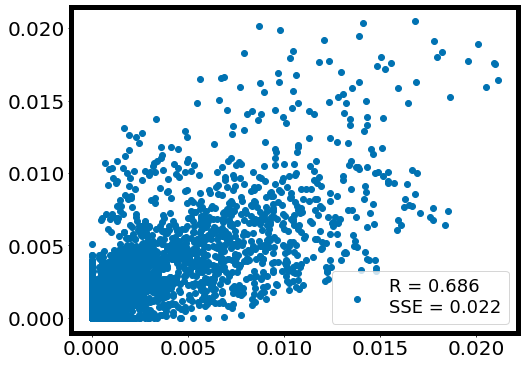

Running trial 27, cycle 4
Epoch: 0, Loss: 379.68517, Residuals: -0.05198, Convergence:   inf
Epoch: 10, Loss: 324.16165, Residuals: -0.05029, Convergence: 0.015963
Epoch: 20, Loss: 276.62402, Residuals: -0.04865, Convergence: 0.015995
Epoch: 30, Loss: 236.15427, Residuals: -0.04704, Convergence: 0.015866
Epoch: 40, Loss: 202.07591, Residuals: -0.04556, Convergence: 0.015540
Epoch: 50, Loss: 173.73550, Residuals: -0.04381, Convergence: 0.014906
Epoch: 60, Loss: 150.46719, Residuals: -0.04162, Convergence: 0.013931
Epoch: 70, Loss: 131.19331, Residuals: -0.03935, Convergence: 0.013108
Epoch: 80, Loss: 114.74053, Residuals: -0.03732, Convergence: 0.013642
Epoch: 90, Loss: 100.51588, Residuals: -0.03551, Convergence: 0.013210
Epoch: 100, Loss: 88.51350, Residuals: -0.03378, Convergence: 0.012833
Epoch: 110, Loss: 78.19836, Residuals: -0.03205, Convergence: 0.012421
Epoch: 120, Loss: 68.98405, Residuals: -0.03056, Convergence: 0.012512
Epoch: 130, Loss: 61.23231, Residuals: -0.02841, Conver


Epoch: 922, Evidence: 1132.97522, Convergence: -0.005933


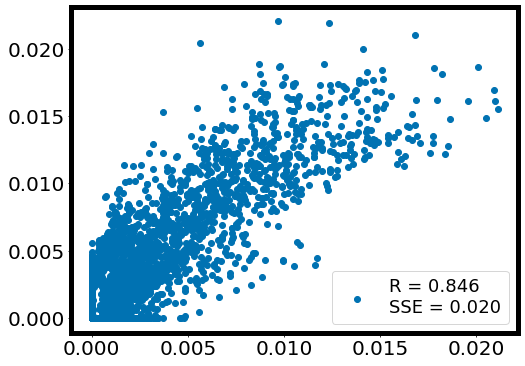

Running trial 27, cycle 5
Epoch: 0, Loss: 497.81859, Residuals: -0.11622, Convergence:   inf
Epoch: 10, Loss: 423.11884, Residuals: -0.10757, Convergence: 0.016456
Epoch: 20, Loss: 359.28979, Residuals: -0.09947, Convergence: 0.016501
Epoch: 30, Loss: 305.25076, Residuals: -0.09219, Convergence: 0.016338
Epoch: 40, Loss: 260.05072, Residuals: -0.08587, Convergence: 0.015855
Epoch: 50, Loss: 222.79944, Residuals: -0.07941, Convergence: 0.015368
Epoch: 60, Loss: 191.69301, Residuals: -0.07317, Convergence: 0.015049
Epoch: 70, Loss: 165.50673, Residuals: -0.06695, Convergence: 0.014855
Epoch: 80, Loss: 143.22754, Residuals: -0.06154, Convergence: 0.014429
Epoch: 90, Loss: 124.59164, Residuals: -0.05674, Convergence: 0.013364
Epoch: 100, Loss: 108.92398, Residuals: -0.05254, Convergence: 0.013329
Epoch: 110, Loss: 95.82969, Residuals: -0.04862, Convergence: 0.012738
Epoch: 120, Loss: 84.82893, Residuals: -0.04490, Convergence: 0.011684
Epoch: 130, Loss: 75.55466, Residuals: -0.04153, Conve

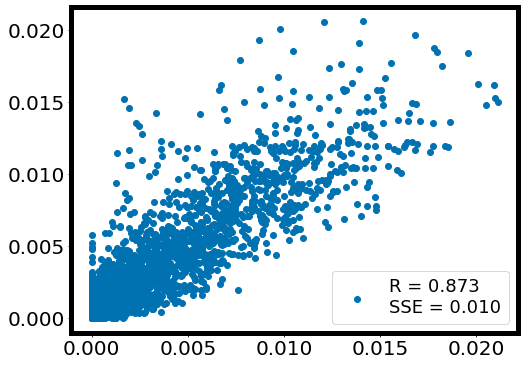

Epoch: 0, Loss: 656.64134, Residuals: -0.09105, Convergence:   inf
Epoch: 10, Loss: 555.95917, Residuals: -0.08444, Convergence: 0.016874
Epoch: 20, Loss: 470.14877, Residuals: -0.07807, Convergence: 0.016892
Epoch: 30, Loss: 398.10751, Residuals: -0.07268, Convergence: 0.016661
Epoch: 40, Loss: 338.18970, Residuals: -0.06813, Convergence: 0.016215
Epoch: 50, Loss: 288.97568, Residuals: -0.06335, Convergence: 0.015767
Epoch: 60, Loss: 247.87250, Residuals: -0.05855, Convergence: 0.015195
Epoch: 70, Loss: 213.14355, Residuals: -0.05396, Convergence: 0.015328
Epoch: 80, Loss: 183.59056, Residuals: -0.05021, Convergence: 0.014841
Epoch: 90, Loss: 158.77895, Residuals: -0.04680, Convergence: 0.014419
Epoch: 100, Loss: 138.18671, Residuals: -0.04318, Convergence: 0.013771
Epoch: 110, Loss: 120.86349, Residuals: -0.03979, Convergence: 0.013397
Epoch: 120, Loss: 106.22640, Residuals: -0.03663, Convergence: 0.012548
Epoch: 130, Loss: 93.93303, Residuals: -0.03362, Convergence: 0.012175
Epoch: 

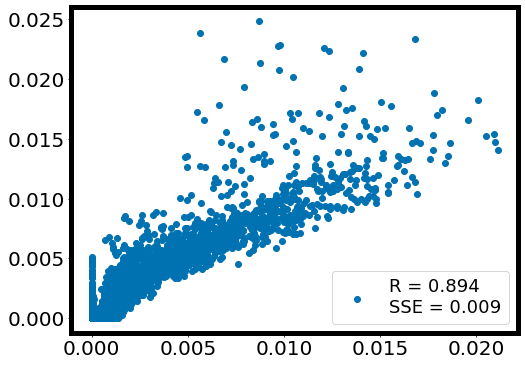

Running trial 28, cycle 1
Epoch: 0, Loss: 106.10336, Residuals: -0.40089, Convergence:   inf
Epoch: 10, Loss: 90.69294, Residuals: -0.37596, Convergence: 0.015935
Epoch: 20, Loss: 77.41205, Residuals: -0.35377, Convergence: 0.015946
Epoch: 30, Loss: 66.12127, Residuals: -0.33431, Convergence: 0.015833
Epoch: 40, Loss: 56.56314, Residuals: -0.31730, Convergence: 0.015647
Epoch: 50, Loss: 48.50743, Residuals: -0.30201, Convergence: 0.015407
Epoch: 60, Loss: 41.71322, Residuals: -0.28810, Convergence: 0.015105
Epoch: 70, Loss: 35.96774, Residuals: -0.27564, Convergence: 0.014782
Epoch: 80, Loss: 31.11622, Residuals: -0.26424, Convergence: 0.014434
Epoch: 90, Loss: 27.02199, Residuals: -0.25384, Convergence: 0.014012
Epoch: 100, Loss: 23.57267, Residuals: -0.24427, Convergence: 0.013526
Epoch: 110, Loss: 20.66959, Residuals: -0.23535, Convergence: 0.012993
Epoch: 120, Loss: 18.26212, Residuals: -0.22661, Convergence: 0.012118
Epoch: 130, Loss: 16.22531, Residuals: -0.21838, Convergence: 0.

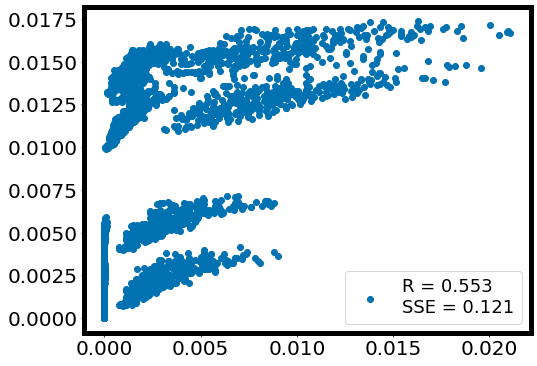

Running trial 28, cycle 2
Epoch: 0, Loss: 209.89328, Residuals: -0.17380, Convergence:   inf
Epoch: 10, Loss: 177.72537, Residuals: -0.16385, Convergence: 0.016994
Epoch: 20, Loss: 150.06386, Residuals: -0.15523, Convergence: 0.017118
Epoch: 30, Loss: 126.51860, Residuals: -0.14734, Convergence: 0.017293
Epoch: 40, Loss: 106.51031, Residuals: -0.14004, Convergence: 0.017403
Epoch: 50, Loss: 89.67375, Residuals: -0.13298, Convergence: 0.017335
Epoch: 60, Loss: 75.56890, Residuals: -0.12649, Convergence: 0.017135
Epoch: 70, Loss: 63.82174, Residuals: -0.12040, Convergence: 0.016964
Epoch: 80, Loss: 54.11489, Residuals: -0.11430, Convergence: 0.016518
Epoch: 90, Loss: 46.08952, Residuals: -0.10833, Convergence: 0.016248
Epoch: 100, Loss: 39.42159, Residuals: -0.10278, Convergence: 0.015381
Epoch: 110, Loss: 33.81685, Residuals: -0.09760, Convergence: 0.015417
Epoch: 120, Loss: 29.16681, Residuals: -0.09272, Convergence: 0.014581
Epoch: 130, Loss: 25.32445, Residuals: -0.08805, Convergence

Epoch: 950, Loss: 87.54597, Residuals: -0.00872, Convergence: 0.001518
Epoch: 960, Loss: 86.33530, Residuals: -0.00874, Convergence: 0.000932

Epoch: 960, Evidence: 582.26794, Convergence: 0.021126
Epoch: 960, Loss: 90.46674, Residuals: -0.00874, Convergence:   inf

Epoch: 966, Evidence: 586.12524, Convergence: 0.006581
Epoch: 970, Loss: 92.74254, Residuals: -0.00896, Convergence: 0.001584

Epoch: 972, Evidence: 589.53461, Convergence: 0.005783
Epoch: 980, Loss: 94.30845, Residuals: -0.00919, Convergence: 0.001650
Epoch: 990, Loss: 92.84160, Residuals: -0.00932, Convergence: 0.001661

Epoch: 997, Evidence: 592.06824, Convergence: 0.004279
Epoch: 1000, Loss: 94.25311, Residuals: -0.00938, Convergence: 0.001881
Epoch: 1010, Loss: 92.76854, Residuals: -0.00944, Convergence: 0.001178
Epoch: 1020, Loss: 91.38675, Residuals: -0.00937, Convergence: 0.001329

Epoch: 1022, Evidence: 586.27032, Convergence: -0.009889

Epoch: 1024, Evidence: 594.39197, Convergence: 0.003909

Epoch: 1029, Evidence

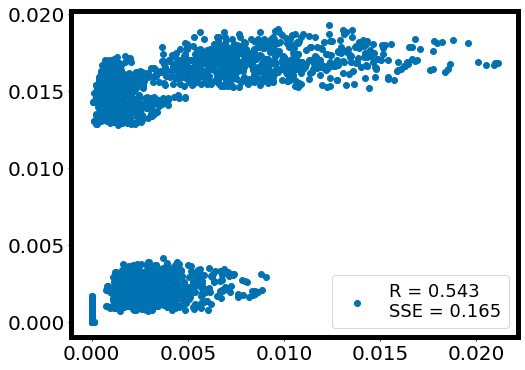

Running trial 28, cycle 3
Epoch: 0, Loss: 317.62642, Residuals: 0.08634, Convergence:   inf
Epoch: 10, Loss: 269.30441, Residuals: 0.07490, Convergence: 0.016695
Epoch: 20, Loss: 228.35971, Residuals: 0.06436, Convergence: 0.016585
Epoch: 30, Loss: 193.79695, Residuals: 0.05460, Convergence: 0.016513
Epoch: 40, Loss: 164.61935, Residuals: 0.04538, Convergence: 0.016343
Epoch: 50, Loss: 140.08177, Residuals: 0.03678, Convergence: 0.016141
Epoch: 60, Loss: 119.67991, Residuals: 0.03038, Convergence: 0.015774
Epoch: 70, Loss: 102.73022, Residuals: 0.02527, Convergence: 0.015046
Epoch: 80, Loss: 88.47182, Residuals: 0.02152, Convergence: 0.014986
Epoch: 90, Loss: 76.48845, Residuals: 0.01792, Convergence: 0.014633
Epoch: 100, Loss: 66.39447, Residuals: 0.01492, Convergence: 0.014236
Epoch: 110, Loss: 57.66635, Residuals: 0.01211, Convergence: 0.014260
Epoch: 120, Loss: 50.09979, Residuals: 0.00938, Convergence: 0.013614
Epoch: 130, Loss: 43.74357, Residuals: 0.00687, Convergence: 0.013123


Epoch: 850, Loss: 179.02365, Residuals: 0.00265, Convergence: 0.001807
Epoch: 860, Loss: 176.40967, Residuals: 0.00264, Convergence: 0.001045

Epoch: 864, Evidence: 892.55225, Convergence: 0.005511
Epoch: 870, Loss: 179.21129, Residuals: 0.00286, Convergence: 0.000334

Epoch: 870, Evidence: 894.14832, Convergence: 0.001785
Epoch: 870, Loss: 182.80112, Residuals: 0.00286, Convergence:   inf

Epoch: 874, Evidence: 896.37665, Convergence: 0.002486

Epoch: 876, Evidence: 896.73828, Convergence: 0.000403

Epoch: 879, Evidence: 897.31708, Convergence: 0.001048
Epoch: 880, Loss: 184.93851, Residuals: 0.00300, Convergence: 0.003369

Epoch: 885, Evidence: 898.10547, Convergence: 0.000878
Epoch: 890, Loss: 179.99800, Residuals: 0.00174, Convergence: 0.003975
Epoch: 900, Loss: 173.82242, Residuals: 0.00094, Convergence: 0.004080

Epoch: 901, Evidence: 894.51508, Convergence: -0.003132

Epoch: 907, Evidence: 898.08521, Convergence: 0.000855
Epoch: 910, Loss: 181.99066, Residuals: 0.00203, Converge

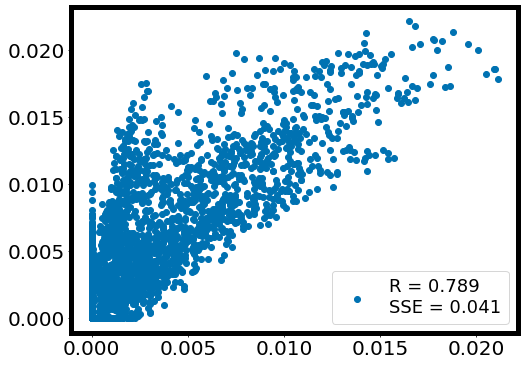

Running trial 28, cycle 4
Epoch: 0, Loss: 580.79753, Residuals: 0.31494, Convergence:   inf
Epoch: 10, Loss: 488.87558, Residuals: 0.28192, Convergence: 0.017463
Epoch: 20, Loss: 411.33044, Residuals: 0.25185, Convergence: 0.017388
Epoch: 30, Loss: 346.30270, Residuals: 0.22388, Convergence: 0.017344
Epoch: 40, Loss: 291.65042, Residuals: 0.19733, Convergence: 0.017257
Epoch: 50, Loss: 245.89310, Residuals: 0.17426, Convergence: 0.017320
Epoch: 60, Loss: 207.71909, Residuals: 0.15537, Convergence: 0.016843
Epoch: 70, Loss: 176.30989, Residuals: 0.13980, Convergence: 0.015589
Epoch: 80, Loss: 149.85107, Residuals: 0.12542, Convergence: 0.016565
Epoch: 90, Loss: 127.66650, Residuals: 0.11279, Convergence: 0.016076
Epoch: 100, Loss: 109.26673, Residuals: 0.10162, Convergence: 0.015930
Epoch: 110, Loss: 93.90299, Residuals: 0.09158, Convergence: 0.015509
Epoch: 120, Loss: 81.21825, Residuals: 0.08285, Convergence: 0.014206
Epoch: 130, Loss: 70.57455, Residuals: 0.07505, Convergence: 0.0123

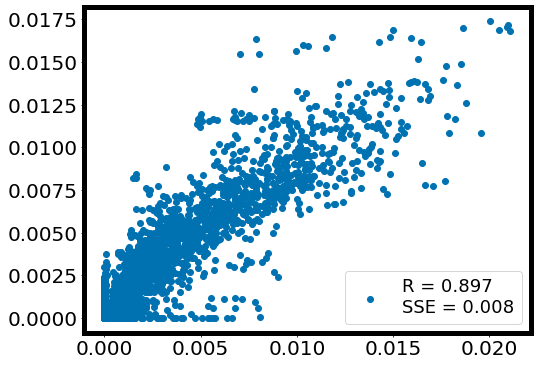

Running trial 28, cycle 5
Epoch: 0, Loss: 728.06401, Residuals: 0.27248, Convergence:   inf
Epoch: 10, Loss: 612.47443, Residuals: 0.24376, Convergence: 0.017528
Epoch: 20, Loss: 514.89429, Residuals: 0.21754, Convergence: 0.017472
Epoch: 30, Loss: 433.16431, Residuals: 0.19327, Convergence: 0.017410
Epoch: 40, Loss: 364.77039, Residuals: 0.17034, Convergence: 0.017237
Epoch: 50, Loss: 308.18542, Residuals: 0.15097, Convergence: 0.016721
Epoch: 60, Loss: 261.56595, Residuals: 0.13518, Convergence: 0.016335
Epoch: 70, Loss: 222.31352, Residuals: 0.12044, Convergence: 0.016227
Epoch: 80, Loss: 189.19121, Residuals: 0.10765, Convergence: 0.016308
Epoch: 90, Loss: 161.28152, Residuals: 0.09630, Convergence: 0.015936
Epoch: 100, Loss: 137.85255, Residuals: 0.08656, Convergence: 0.015891
Epoch: 110, Loss: 118.19248, Residuals: 0.07809, Convergence: 0.014901
Epoch: 120, Loss: 101.61350, Residuals: 0.07035, Convergence: 0.015102
Epoch: 130, Loss: 87.78590, Residuals: 0.06339, Convergence: 0.01

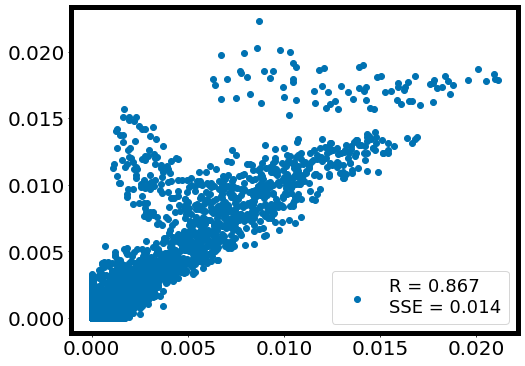

Epoch: 0, Loss: 822.60631, Residuals: 0.24585, Convergence:   inf
Epoch: 10, Loss: 691.81293, Residuals: 0.22024, Convergence: 0.017639
Epoch: 20, Loss: 580.68591, Residuals: 0.19672, Convergence: 0.017689
Epoch: 30, Loss: 487.03729, Residuals: 0.17439, Convergence: 0.017782
Epoch: 40, Loss: 408.38751, Residuals: 0.15316, Convergence: 0.017724
Epoch: 50, Loss: 343.55389, Residuals: 0.13543, Convergence: 0.016793
Epoch: 60, Loss: 290.68427, Residuals: 0.12112, Convergence: 0.016702
Epoch: 70, Loss: 246.77377, Residuals: 0.10881, Convergence: 0.016230
Epoch: 80, Loss: 209.70740, Residuals: 0.09752, Convergence: 0.016116
Epoch: 90, Loss: 178.72607, Residuals: 0.08730, Convergence: 0.015783
Epoch: 100, Loss: 152.63905, Residuals: 0.07812, Convergence: 0.015638
Epoch: 110, Loss: 130.90976, Residuals: 0.06996, Convergence: 0.015309
Epoch: 120, Loss: 112.96129, Residuals: 0.06304, Convergence: 0.014638
Epoch: 130, Loss: 98.16531, Residuals: 0.05709, Convergence: 0.013964
Epoch: 140, Loss: 85.

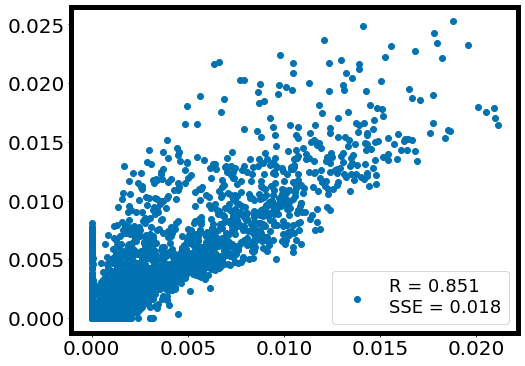

Running trial 29, cycle 1
Epoch: 0, Loss: 95.28506, Residuals: -0.79620, Convergence:   inf
Epoch: 10, Loss: 81.54129, Residuals: -0.73722, Convergence: 0.015495
Epoch: 20, Loss: 70.00694, Residuals: -0.68244, Convergence: 0.015441
Epoch: 30, Loss: 60.22814, Residuals: -0.63123, Convergence: 0.014986
Epoch: 40, Loss: 52.01928, Residuals: -0.58469, Convergence: 0.014574
Epoch: 50, Loss: 45.11929, Residuals: -0.54233, Convergence: 0.014130
Epoch: 60, Loss: 39.31298, Residuals: -0.50408, Convergence: 0.013652
Epoch: 70, Loss: 34.44732, Residuals: -0.46951, Convergence: 0.013012
Epoch: 80, Loss: 30.33565, Residuals: -0.43875, Convergence: 0.012668
Epoch: 90, Loss: 26.85894, Residuals: -0.41123, Convergence: 0.012014
Epoch: 100, Loss: 23.88231, Residuals: -0.38686, Convergence: 0.011660
Epoch: 110, Loss: 21.31760, Residuals: -0.36541, Convergence: 0.011268
Epoch: 120, Loss: 19.11460, Residuals: -0.34631, Convergence: 0.010686
Epoch: 130, Loss: 17.17519, Residuals: -0.32914, Convergence: 0.0

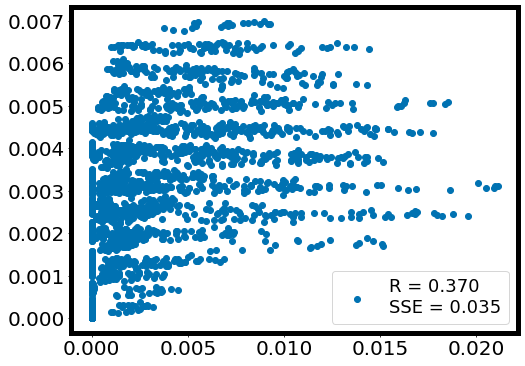

Running trial 29, cycle 2
Epoch: 0, Loss: 151.88931, Residuals: -0.40396, Convergence:   inf
Epoch: 10, Loss: 131.87599, Residuals: -0.37365, Convergence: 0.014191
Epoch: 20, Loss: 114.71721, Residuals: -0.34593, Convergence: 0.013910
Epoch: 30, Loss: 100.03590, Residuals: -0.32068, Convergence: 0.013711
Epoch: 40, Loss: 87.35809, Residuals: -0.29781, Convergence: 0.013591
Epoch: 50, Loss: 76.41283, Residuals: -0.27722, Convergence: 0.013372
Epoch: 60, Loss: 67.01369, Residuals: -0.25893, Convergence: 0.013025
Epoch: 70, Loss: 58.97677, Residuals: -0.24266, Convergence: 0.012658
Epoch: 80, Loss: 52.09090, Residuals: -0.22777, Convergence: 0.012367
Epoch: 90, Loss: 46.22586, Residuals: -0.21333, Convergence: 0.011872
Epoch: 100, Loss: 41.23212, Residuals: -0.19919, Convergence: 0.011131
Epoch: 110, Loss: 36.87782, Residuals: -0.18592, Convergence: 0.011547
Epoch: 120, Loss: 33.06807, Residuals: -0.17306, Convergence: 0.010521
Epoch: 130, Loss: 29.76202, Residuals: -0.16040, Convergence:

Epoch: 850, Loss: 113.14424, Residuals: -0.00464, Convergence: 0.001336

Epoch: 851, Evidence: 532.44830, Convergence: 0.004770

Epoch: 858, Evidence: 531.54224, Convergence: -0.001705


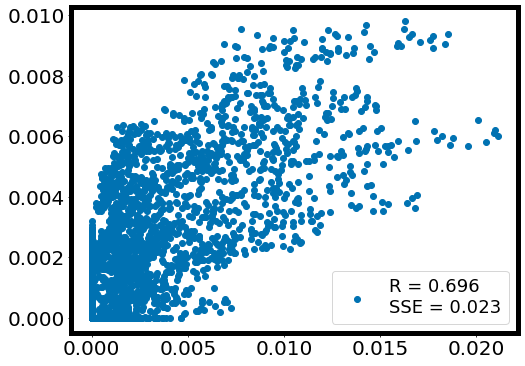

Running trial 29, cycle 3
Epoch: 0, Loss: 256.00173, Residuals: -0.25762, Convergence:   inf
Epoch: 10, Loss: 220.10887, Residuals: -0.23710, Convergence: 0.015202
Epoch: 20, Loss: 189.22763, Residuals: -0.21872, Convergence: 0.015274
Epoch: 30, Loss: 162.54379, Residuals: -0.20226, Convergence: 0.015321
Epoch: 40, Loss: 139.75137, Residuals: -0.18727, Convergence: 0.015105
Epoch: 50, Loss: 120.56927, Residuals: -0.17358, Convergence: 0.014689
Epoch: 60, Loss: 104.56580, Residuals: -0.16085, Convergence: 0.014026
Epoch: 70, Loss: 91.25326, Residuals: -0.14912, Convergence: 0.013466
Epoch: 80, Loss: 80.27769, Residuals: -0.13815, Convergence: 0.012452
Epoch: 90, Loss: 71.20119, Residuals: -0.12783, Convergence: 0.011891
Epoch: 100, Loss: 63.50710, Residuals: -0.11842, Convergence: 0.011319
Epoch: 110, Loss: 56.88620, Residuals: -0.10965, Convergence: 0.010832
Epoch: 120, Loss: 51.22097, Residuals: -0.10149, Convergence: 0.010533
Epoch: 130, Loss: 46.24466, Residuals: -0.09426, Convergen


Epoch: 938, Evidence: 875.44684, Convergence: -0.000709
Epoch: 940, Loss: 177.56668, Residuals: -0.00102, Convergence: 0.002940
Epoch: 950, Loss: 173.13702, Residuals: -0.00166, Convergence: 0.002144
Epoch: 960, Loss: 169.46628, Residuals: -0.00171, Convergence: 0.001334

Epoch: 969, Evidence: 872.64844, Convergence: -0.003918
Epoch: 970, Loss: 183.13541, Residuals: -0.00088, Convergence: 0.001806
Epoch: 980, Loss: 180.55222, Residuals: -0.00090, Convergence: 0.001293
Epoch: 990, Loss: 178.21521, Residuals: -0.00088, Convergence: 0.001002

Epoch: 995, Evidence: 876.72247, Convergence: 0.000747
Epoch: 1000, Loss: 175.88641, Residuals: -0.00133, Convergence: 0.002991
Epoch: 1010, Loss: 171.73741, Residuals: -0.00171, Convergence: 0.001907
Epoch: 1020, Loss: 168.23706, Residuals: -0.00179, Convergence: 0.002031

Epoch: 1023, Evidence: 871.95044, Convergence: -0.004722


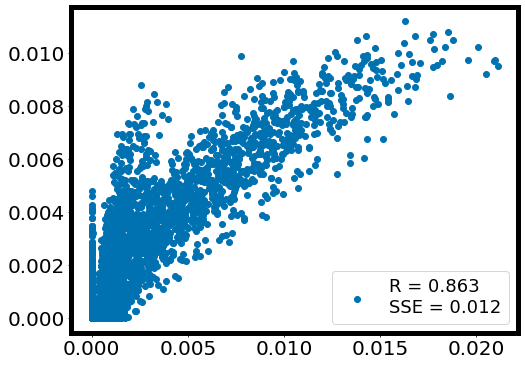

Running trial 29, cycle 4
Epoch: 0, Loss: 341.37367, Residuals: -0.29267, Convergence:   inf
Epoch: 10, Loss: 292.48215, Residuals: -0.26763, Convergence: 0.015607
Epoch: 20, Loss: 250.23566, Residuals: -0.24483, Convergence: 0.015818
Epoch: 30, Loss: 213.82796, Residuals: -0.22435, Convergence: 0.015822
Epoch: 40, Loss: 183.01585, Residuals: -0.20570, Convergence: 0.015554
Epoch: 50, Loss: 157.18277, Residuals: -0.18863, Convergence: 0.015116
Epoch: 60, Loss: 135.54823, Residuals: -0.17290, Convergence: 0.014752
Epoch: 70, Loss: 117.44231, Residuals: -0.15848, Convergence: 0.014249
Epoch: 80, Loss: 102.26801, Residuals: -0.14525, Convergence: 0.013595
Epoch: 90, Loss: 89.58188, Residuals: -0.13305, Convergence: 0.013093
Epoch: 100, Loss: 78.98983, Residuals: -0.12197, Convergence: 0.012374
Epoch: 110, Loss: 70.13112, Residuals: -0.11181, Convergence: 0.011623
Epoch: 120, Loss: 62.66405, Residuals: -0.10253, Convergence: 0.011072
Epoch: 130, Loss: 56.34344, Residuals: -0.09423, Converg


Epoch: 890, Evidence: 1154.61926, Convergence: -0.005958


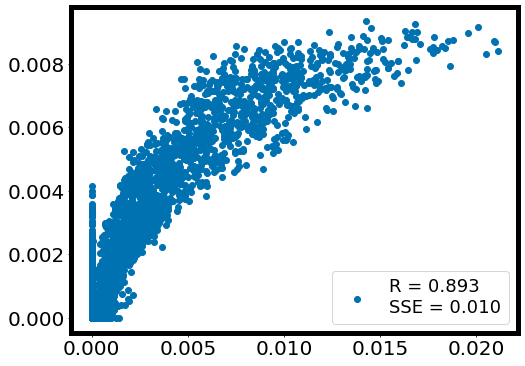

Running trial 29, cycle 5
Epoch: 0, Loss: 459.56093, Residuals: -0.21050, Convergence:   inf
Epoch: 10, Loss: 392.50522, Residuals: -0.19256, Convergence: 0.016033
Epoch: 20, Loss: 334.38095, Residuals: -0.17630, Convergence: 0.016217
Epoch: 30, Loss: 284.86636, Residuals: -0.16198, Convergence: 0.016068
Epoch: 40, Loss: 243.30983, Residuals: -0.14913, Convergence: 0.015729
Epoch: 50, Loss: 208.72014, Residuals: -0.13713, Convergence: 0.015211
Epoch: 60, Loss: 179.85118, Residuals: -0.12571, Convergence: 0.014834
Epoch: 70, Loss: 155.54303, Residuals: -0.11511, Convergence: 0.014303
Epoch: 80, Loss: 135.08955, Residuals: -0.10559, Convergence: 0.013960
Epoch: 90, Loss: 117.81683, Residuals: -0.09683, Convergence: 0.013546
Epoch: 100, Loss: 103.31520, Residuals: -0.08883, Convergence: 0.012753
Epoch: 110, Loss: 91.14896, Residuals: -0.08140, Convergence: 0.012362
Epoch: 120, Loss: 80.70222, Residuals: -0.07475, Convergence: 0.012154
Epoch: 130, Loss: 71.74723, Residuals: -0.06864, Conve

Epoch: 980, Loss: 302.64075, Residuals: -0.01450, Convergence: 0.001274

Epoch: 983, Evidence: 1562.64648, Convergence: -0.003860

Epoch: 986, Evidence: 1574.71533, Convergence: 0.003834

Epoch: 988, Evidence: 1577.67114, Convergence: 0.001874

Epoch: 989, Evidence: 1579.98511, Convergence: 0.001465
Epoch: 990, Loss: 319.68549, Residuals: -0.01380, Convergence: 0.000970

Epoch: 990, Evidence: 1580.08813, Convergence: 0.000065
Epoch: 990, Loss: 320.31427, Residuals: -0.01380, Convergence:   inf
Epoch: 1000, Loss: 315.07614, Residuals: -0.01456, Convergence: 0.001714
Epoch: 1010, Loss: 310.99695, Residuals: -0.01471, Convergence: 0.001087

Epoch: 1012, Evidence: 1572.98120, Convergence: -0.004453

Epoch: 1013, Evidence: 1580.89661, Convergence: 0.000577
Epoch: 1020, Loss: 317.03195, Residuals: -0.01441, Convergence: 0.001476
Epoch: 1030, Loss: 312.58713, Residuals: -0.01475, Convergence: 0.001223

Epoch: 1035, Evidence: 1571.14697, Convergence: -0.005625


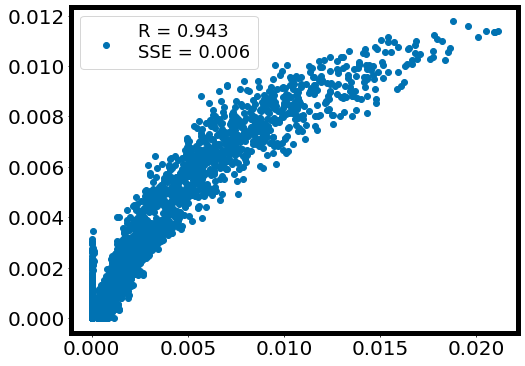

Epoch: 0, Loss: 537.67168, Residuals: -0.11482, Convergence:   inf
Epoch: 10, Loss: 459.44586, Residuals: -0.10565, Convergence: 0.016083
Epoch: 20, Loss: 391.24765, Residuals: -0.09765, Convergence: 0.016238
Epoch: 30, Loss: 333.47998, Residuals: -0.09096, Convergence: 0.015985
Epoch: 40, Loss: 285.36774, Residuals: -0.08456, Convergence: 0.015497
Epoch: 50, Loss: 245.51401, Residuals: -0.07824, Convergence: 0.014752
Epoch: 60, Loss: 212.48332, Residuals: -0.07175, Convergence: 0.014342
Epoch: 70, Loss: 184.79944, Residuals: -0.06589, Convergence: 0.013814
Epoch: 80, Loss: 161.65089, Residuals: -0.06058, Convergence: 0.013216
Epoch: 90, Loss: 142.24011, Residuals: -0.05562, Convergence: 0.012552
Epoch: 100, Loss: 125.88539, Residuals: -0.05117, Convergence: 0.012053
Epoch: 110, Loss: 112.20155, Residuals: -0.04704, Convergence: 0.011111
Epoch: 120, Loss: 100.77744, Residuals: -0.04314, Convergence: 0.010115
Epoch: 130, Loss: 91.13126, Residuals: -0.03972, Convergence: 0.010221
Epoch: 

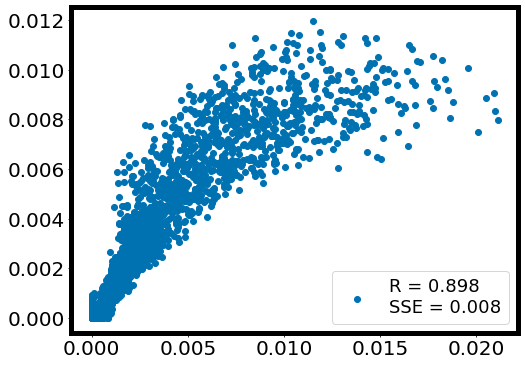

Running trial 30, cycle 1
Epoch: 0, Loss: 81.42852, Residuals: -0.74541, Convergence:   inf
Epoch: 10, Loss: 69.99537, Residuals: -0.68658, Convergence: 0.015366
Epoch: 20, Loss: 60.08993, Residuals: -0.63381, Convergence: 0.015332
Epoch: 30, Loss: 51.65695, Residuals: -0.58639, Convergence: 0.015156
Epoch: 40, Loss: 44.48468, Residuals: -0.54371, Convergence: 0.014983
Epoch: 50, Loss: 38.44576, Residuals: -0.50454, Convergence: 0.014694
Epoch: 60, Loss: 33.36003, Residuals: -0.46866, Convergence: 0.014466
Epoch: 70, Loss: 28.99975, Residuals: -0.43660, Convergence: 0.014196
Epoch: 80, Loss: 25.26113, Residuals: -0.40793, Convergence: 0.013802
Epoch: 90, Loss: 22.08366, Residuals: -0.38211, Convergence: 0.013456
Epoch: 100, Loss: 19.40605, Residuals: -0.35854, Convergence: 0.012953
Epoch: 110, Loss: 17.14948, Residuals: -0.33705, Convergence: 0.012324
Epoch: 120, Loss: 15.27191, Residuals: -0.31727, Convergence: 0.010035
Epoch: 130, Loss: 13.66225, Residuals: -0.29963, Convergence: 0.0

Epoch: 880, Loss: 42.92546, Residuals: -0.00353, Convergence: 0.002028

Epoch: 889, Evidence: 197.26422, Convergence: -0.017381
Epoch: 890, Loss: 44.54178, Residuals: -0.00342, Convergence: 0.001416

Epoch: 895, Evidence: 202.56570, Convergence: 0.009245

Epoch: 896, Evidence: 206.23515, Convergence: 0.017793
Epoch: 900, Loss: 46.68279, Residuals: -0.00336, Convergence: 0.001310

Epoch: 904, Evidence: 205.66315, Convergence: -0.002781


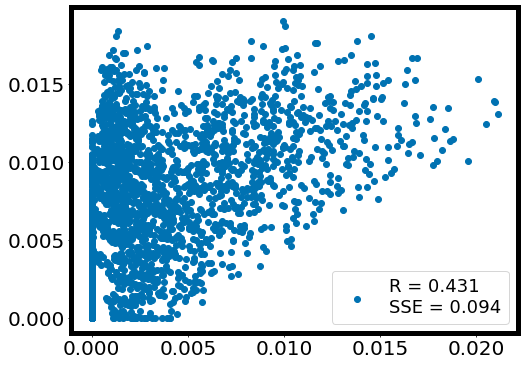

Running trial 30, cycle 2
Epoch: 0, Loss: 186.35614, Residuals: -0.50652, Convergence:   inf
Epoch: 10, Loss: 158.80261, Residuals: -0.46788, Convergence: 0.016244
Epoch: 20, Loss: 135.16873, Residuals: -0.43258, Convergence: 0.016234
Epoch: 30, Loss: 115.08555, Residuals: -0.40028, Convergence: 0.016199
Epoch: 40, Loss: 98.08762, Residuals: -0.37038, Convergence: 0.016087
Epoch: 50, Loss: 83.69552, Residuals: -0.34257, Convergence: 0.015948
Epoch: 60, Loss: 71.59644, Residuals: -0.31647, Convergence: 0.015728
Epoch: 70, Loss: 61.47194, Residuals: -0.29204, Convergence: 0.015392
Epoch: 80, Loss: 52.90377, Residuals: -0.26998, Convergence: 0.014561
Epoch: 90, Loss: 45.50464, Residuals: -0.25029, Convergence: 0.015143
Epoch: 100, Loss: 39.38436, Residuals: -0.23197, Convergence: 0.013967
Epoch: 110, Loss: 34.27605, Residuals: -0.21531, Convergence: 0.013486
Epoch: 120, Loss: 30.01201, Residuals: -0.20035, Convergence: 0.012593
Epoch: 130, Loss: 26.47041, Residuals: -0.18663, Convergence:

Epoch: 1000, Loss: 73.64771, Residuals: -0.00501, Convergence: 0.001398

Epoch: 1001, Evidence: 461.97137, Convergence: 0.030939
Epoch: 1010, Loss: 76.45618, Residuals: -0.00657, Convergence: 0.002496
Epoch: 1020, Loss: 74.55807, Residuals: -0.00759, Convergence: 0.002684
Epoch: 1030, Loss: 72.94522, Residuals: -0.00805, Convergence: 0.002406

Epoch: 1035, Evidence: 466.79004, Convergence: 0.010323
Epoch: 1040, Loss: 77.64999, Residuals: -0.00908, Convergence: 0.002901
Epoch: 1050, Loss: 75.50114, Residuals: -0.01046, Convergence: 0.002813
Epoch: 1060, Loss: 73.77644, Residuals: -0.01105, Convergence: 0.002567
Epoch: 1070, Loss: 72.37216, Residuals: -0.01101, Convergence: 0.001292
Epoch: 1080, Loss: 71.12500, Residuals: -0.01060, Convergence: 0.001634

Epoch: 1084, Evidence: 456.88721, Convergence: -0.021675


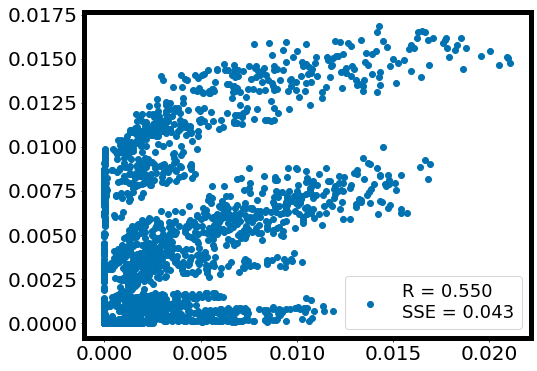

Running trial 30, cycle 3
Epoch: 0, Loss: 256.65892, Residuals: -0.15111, Convergence:   inf
Epoch: 10, Loss: 220.31348, Residuals: -0.14056, Convergence: 0.015437
Epoch: 20, Loss: 189.04439, Residuals: -0.13069, Convergence: 0.015418
Epoch: 30, Loss: 162.23192, Residuals: -0.12145, Convergence: 0.015404
Epoch: 40, Loss: 139.38271, Residuals: -0.11275, Convergence: 0.015233
Epoch: 50, Loss: 120.05471, Residuals: -0.10457, Convergence: 0.014920
Epoch: 60, Loss: 103.61324, Residuals: -0.09700, Convergence: 0.014734
Epoch: 70, Loss: 89.66337, Residuals: -0.09025, Convergence: 0.014002
Epoch: 80, Loss: 77.95103, Residuals: -0.08399, Convergence: 0.013968
Epoch: 90, Loss: 68.08978, Residuals: -0.07810, Convergence: 0.013385
Epoch: 100, Loss: 59.81747, Residuals: -0.07237, Convergence: 0.012729
Epoch: 110, Loss: 52.69965, Residuals: -0.06735, Convergence: 0.012603
Epoch: 120, Loss: 46.64605, Residuals: -0.06258, Convergence: 0.011950
Epoch: 130, Loss: 41.46813, Residuals: -0.05835, Convergen

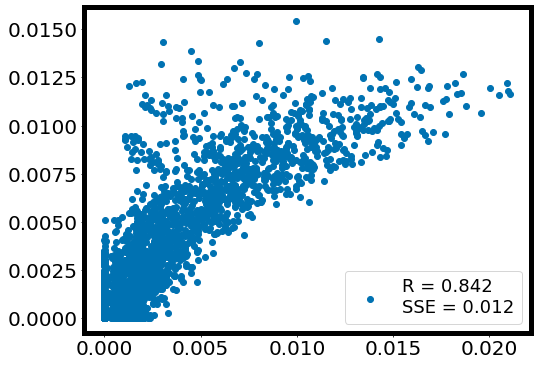

Running trial 30, cycle 4
Epoch: 0, Loss: 351.70653, Residuals: -0.09265, Convergence:   inf
Epoch: 10, Loss: 301.07977, Residuals: -0.08645, Convergence: 0.015723
Epoch: 20, Loss: 257.62964, Residuals: -0.08079, Convergence: 0.015690
Epoch: 30, Loss: 220.53053, Residuals: -0.07574, Convergence: 0.015659
Epoch: 40, Loss: 189.25360, Residuals: -0.07098, Convergence: 0.015413
Epoch: 50, Loss: 162.62398, Residuals: -0.06654, Convergence: 0.015227
Epoch: 60, Loss: 140.10675, Residuals: -0.06242, Convergence: 0.014758
Epoch: 70, Loss: 121.57120, Residuals: -0.05780, Convergence: 0.014032
Epoch: 80, Loss: 106.02083, Residuals: -0.05359, Convergence: 0.013456
Epoch: 90, Loss: 93.04246, Residuals: -0.04955, Convergence: 0.012738
Epoch: 100, Loss: 82.18238, Residuals: -0.04585, Convergence: 0.012685
Epoch: 110, Loss: 73.13901, Residuals: -0.04208, Convergence: 0.012053
Epoch: 120, Loss: 65.56823, Residuals: -0.03843, Convergence: 0.010843
Epoch: 130, Loss: 59.13464, Residuals: -0.03498, Converg


Epoch: 931, Evidence: 1171.22339, Convergence: 0.000047
Epoch: 940, Loss: 249.80603, Residuals: -0.01156, Convergence: 0.001354

Epoch: 945, Evidence: 1167.19104, Convergence: -0.003407


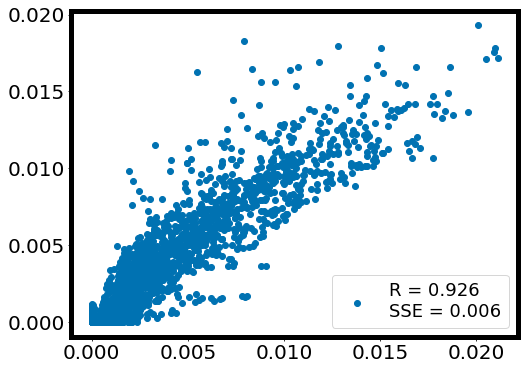

Running trial 30, cycle 5
Epoch: 0, Loss: 402.83125, Residuals: -0.02503, Convergence:   inf
Epoch: 10, Loss: 345.68781, Residuals: -0.02462, Convergence: 0.015514
Epoch: 20, Loss: 296.25977, Residuals: -0.02413, Convergence: 0.015567
Epoch: 30, Loss: 253.82855, Residuals: -0.02369, Convergence: 0.015504
Epoch: 40, Loss: 218.09207, Residuals: -0.02312, Convergence: 0.015165
Epoch: 50, Loss: 188.00386, Residuals: -0.02230, Convergence: 0.014739
Epoch: 60, Loss: 162.95984, Residuals: -0.02153, Convergence: 0.014121
Epoch: 70, Loss: 142.07616, Residuals: -0.02080, Convergence: 0.013552
Epoch: 80, Loss: 124.61294, Residuals: -0.02004, Convergence: 0.013012
Epoch: 90, Loss: 109.97814, Residuals: -0.01910, Convergence: 0.012521
Epoch: 100, Loss: 97.31539, Residuals: -0.01813, Convergence: 0.012221
Epoch: 110, Loss: 86.26456, Residuals: -0.01665, Convergence: 0.011851
Epoch: 120, Loss: 76.65549, Residuals: -0.01529, Convergence: 0.012111
Epoch: 130, Loss: 68.36660, Residuals: -0.01409, Conver


Epoch: 976, Evidence: 1551.92236, Convergence: 0.002407
Epoch: 980, Loss: 311.11719, Residuals: -0.00842, Convergence: 0.001362
Epoch: 990, Loss: 307.28003, Residuals: -0.00845, Convergence: 0.000875

Epoch: 990, Evidence: 1548.69873, Convergence: -0.002082
Epoch: 990, Loss: 314.81058, Residuals: -0.00823, Convergence:   inf

Epoch: 991, Evidence: 1556.65662, Convergence: 0.003041

Epoch: 992, Evidence: 1557.77917, Convergence: 0.000721
Epoch: 1000, Loss: 314.65021, Residuals: -0.00848, Convergence: 0.001439
Epoch: 1010, Loss: 310.80090, Residuals: -0.00844, Convergence: 0.001195

Epoch: 1012, Evidence: 1547.99146, Convergence: -0.005598


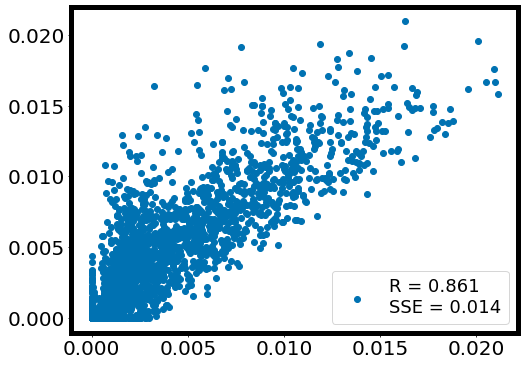

Epoch: 0, Loss: 501.57219, Residuals: 0.18814, Convergence:   inf
Epoch: 10, Loss: 429.35291, Residuals: 0.16855, Convergence: 0.015769
Epoch: 20, Loss: 367.10275, Residuals: 0.15106, Convergence: 0.015799
Epoch: 30, Loss: 313.94363, Residuals: 0.13527, Convergence: 0.015573
Epoch: 40, Loss: 269.20123, Residuals: 0.12099, Convergence: 0.015268
Epoch: 50, Loss: 231.69682, Residuals: 0.10826, Convergence: 0.014983
Epoch: 60, Loss: 200.34410, Residuals: 0.09641, Convergence: 0.014354
Epoch: 70, Loss: 173.97881, Residuals: 0.08555, Convergence: 0.013960
Epoch: 80, Loss: 151.81595, Residuals: 0.07609, Convergence: 0.013600
Epoch: 90, Loss: 133.06218, Residuals: 0.06769, Convergence: 0.012863
Epoch: 100, Loss: 116.94749, Residuals: 0.05993, Convergence: 0.012988
Epoch: 110, Loss: 103.32565, Residuals: 0.05306, Convergence: 0.012488
Epoch: 120, Loss: 91.91497, Residuals: 0.04708, Convergence: 0.011552
Epoch: 130, Loss: 82.28411, Residuals: 0.04194, Convergence: 0.011012
Epoch: 140, Loss: 74.1

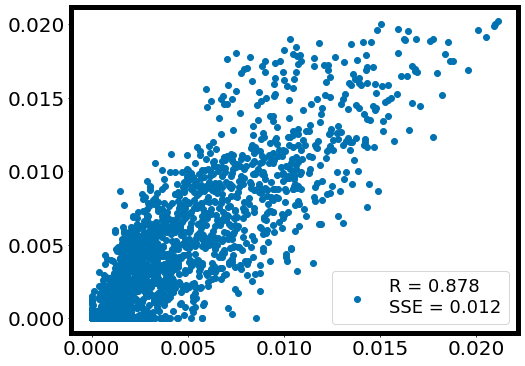

In [10]:
# init dataframe that stores DTL information
dtl_df = pd.DataFrame()
dtl_df_R = pd.DataFrame()
dtl_df_sse = pd.DataFrame()
elapsed_time = []

for trial in range(n_trials):

    # format data 
    main_data, main_obj_params, unique_exp_names, N_total = format_data(main_df, species, outputs, controls, obj_params=obj_params)

    # keep track of objective 
    objective_found = []

    # choose random set of training samples
    train_df = main_df.iloc[np.in1d(all_exp_names, initial_exps[trial])].copy()
    train_data, train_obj_params, new_experiments, N = format_data(train_df, species, outputs, controls, obj_params=obj_params)

    # remove training samples from main dataset so that they're not selected more than once
    train_inds = np.in1d(unique_exp_names, new_experiments)
    main_data = main_data[~train_inds]
    main_obj_params  = main_obj_params[~train_inds]
    unique_exp_names = unique_exp_names[~train_inds]

    # compute objectives
    target_found = []
    for sample, train_obj_param in zip(train_data, train_obj_params):
        target_found.append(objective(sample[:, :len(sys_var)], train_obj_param))
    target_found = np.array(target_found)
    objective_found.append(np.max(target_found))
    objective_rval = []
    objective_sse  = []

    # Search over full factorial and update model
    for dtl in range(n_dtl):
        print(f"Running trial {trial+1}, cycle {dtl+1}")

        # scale train and design space data
        scaler = ZeroMaxScaler().fit(train_data)
        train_data = scaler.transform(train_data)
        main_data_scaled = scaler.transform(main_data)

        # fit model 
        brnn = miRNN(n_species=n_s, n_metabolites=1, n_controls=len(controls), n_hidden=16, N=N)
        brnn.fit(train_data)
        
        # assess prediction performance of end-point product
        pred, stdv, cov = brnn.predict(main_data_scaled)
        pred = scaler.inverse_transform(pred)
        stdv = scaler.inverse_transform(stdv)
        rvalue = linregress(np.array(main_data[:, -1, 5]), pred[:, -1, -1]).rvalue
        sse_value = sse(np.array(main_data[:, -1, 5]), pred[:, -1, -1])
        plt.scatter(np.array(main_data[:, -1, 5]), pred[:, -1, -1], label="R = {:.3f}\nSSE = {:.3f}".format(rvalue, sse_value))
        plt.legend()
        plt.show()
        objective_rval.append(rvalue)
        objective_sse.append(sse_value)
        
        # randomly search over design space
        t0 = time.time()
        new_experiments = rng.choice(unique_exp_names, n_test, replace=False)
        elapsed_time.append(time.time()-t0)

        # collect new data 
        new_df   = main_df.iloc[np.in1d(all_exp_names, new_experiments)].copy()
        new_data, new_obj_params, new_experiments, N = format_data(new_df, species, outputs, controls, obj_params=obj_params)

        # remove training samples from main dataset
        train_inds = np.in1d(unique_exp_names, new_experiments)
        main_data = main_data[~train_inds]
        main_obj_params  = main_obj_params[~train_inds]
        unique_exp_names = unique_exp_names[~train_inds]

        # compute objectives
        target_found = []
        for sample, new_obj_param in zip(new_data, new_obj_params):
            target_found.append(objective(sample[:, :len(sys_var)], new_obj_param))
        target_found = np.array(target_found)

        # store the best objective found (so far)
        objective_found.append(np.max([np.max(objective_found), np.max(target_found)]))

        # Update dataset
        train_df = pd.concat((train_df, new_df))
        train_data, train_obj_params, train_experiments, N = format_data(train_df, species, outputs, controls, obj_params=obj_params)
        
    ### fit model one last time to assess final prediction performance ### 
    # scale train and design space data
    scaler = ZeroMaxScaler().fit(train_data)
    train_data = scaler.transform(train_data)
    main_data_scaled = scaler.transform(main_data)

    # fit model 
    brnn = miRNN(n_species=n_s, n_metabolites=1, n_controls=len(controls), n_hidden=16, N=N)
    brnn.fit(train_data)

    # assess prediction performance of end-point product
    pred, stdv, cov = brnn.predict(main_data_scaled)
    pred = scaler.inverse_transform(pred)
    stdv = scaler.inverse_transform(stdv)
    rvalue = linregress(np.array(main_data[:, -1, 5]), pred[:, -1, -1]).rvalue
    sse_value = sse(np.array(main_data[:, -1, 5]), pred[:, -1, -1])
    plt.scatter(np.array(main_data[:, -1, 5]), pred[:, -1, -1], label="R = {:.3f}\nSSE = {:.3f}".format(rvalue, sse_value))
    plt.legend()
    plt.show()
    objective_rval.append(rvalue)
    objective_sse.append(sse_value)
        
    # save data to dataframe
    dtl_df_i = pd.DataFrame()
    dtl_df_i['Trial'] = [trial]
    for j,obj_found in enumerate(objective_found):
        dtl_df_i[f'DTL {j}'] = [obj_found]
    dtl_df = pd.concat((dtl_df, dtl_df_i))
    
    # save data to dataframe
    dtl_df_r = pd.DataFrame()
    dtl_df_r['Trial'] = [trial]
    for j,r_val in enumerate(objective_rval):
        dtl_df_r[f'DTL {j}'] = [r_val]
    dtl_df_R = pd.concat((dtl_df_R, dtl_df_r))
    
    # save data to dataframe
    dtl_df_e = pd.DataFrame()
    dtl_df_e['Trial'] = [trial]
    for j,e in enumerate(objective_sse):
        dtl_df_e[f'DTL {j}'] = [e]
    dtl_df_sse = pd.concat((dtl_df_sse, dtl_df_e))

In [11]:
dtl_df.to_csv("Fig3/miRNN_random.csv", index=False)
dtl_df_R.to_csv("Fig3/miRNN_random_rvals.csv", index=False)
dtl_df_sse.to_csv("Fig3/miRNN_random_sse.csv", index=False)

In [12]:
dtl_df.describe()

Trial      DTL 0      DTL 1      DTL 2      DTL 3      DTL 4  \
count  30.000000  30.000000  30.000000  30.000000  30.000000  30.000000   
mean   14.500000   0.089362   0.118208   0.130339   0.139228   0.142328   
std     8.803408   0.046666   0.044291   0.040951   0.038585   0.036993   
min     0.000000   0.010389   0.029491   0.067199   0.067199   0.067199   
25%     7.250000   0.058960   0.090475   0.103137   0.111186   0.115226   
50%    14.500000   0.076329   0.108812   0.124050   0.135690   0.144628   
75%    21.750000   0.112222   0.147617   0.165013   0.169848   0.169848   
max    29.000000   0.193425   0.207209   0.207209   0.207209   0.207209   

           DTL 5  
count  30.000000  
mean    0.152131  
std     0.033067  
min     0.078227  
25%     0.135323  
50%     0.153817  
75%     0.180256  
max     0.207209

In [13]:
dtl_df_R.describe()

Trial      DTL 0      DTL 1      DTL 2      DTL 3      DTL 4  \
count  30.000000  30.000000  30.000000  30.000000  30.000000  30.000000   
mean   14.500000   0.552301   0.655488   0.788108   0.836919   0.878638   
std     8.803408   0.178057   0.156998   0.119449   0.079990   0.067003   
min     0.000000   0.140503   0.205321   0.388375   0.652282   0.622156   
25%     7.250000   0.431933   0.617916   0.743425   0.802673   0.867780   
50%    14.500000   0.561969   0.687543   0.826621   0.849024   0.895495   
75%    21.750000   0.706380   0.748834   0.861736   0.898519   0.909337   
max    29.000000   0.832350   0.902784   0.921211   0.928479   0.942986   

           DTL 5  
count  30.000000  
mean    0.885185  
std     0.051179  
min     0.784286  
25%     0.841281  
50%     0.901095  
75%     0.923029  
max     0.971846

In [14]:
dtl_df_sse.describe()

Trial      DTL 0      DTL 1      DTL 2      DTL 3      DTL 4  \
count  30.000000  30.000000  30.000000  30.000000  30.000000  30.000000   
mean   14.500000   0.046265   0.058547   0.023608   0.015405   0.011190   
std     8.803408   0.037044   0.086614   0.021873   0.007652   0.007778   
min     0.000000   0.015469   0.011076   0.006790   0.005831   0.004663   
25%     7.250000   0.023782   0.022813   0.011567   0.010074   0.006990   
50%    14.500000   0.036497   0.026663   0.016512   0.012843   0.008947   
75%    21.750000   0.045604   0.049516   0.026678   0.019777   0.012496   
max    29.000000   0.186569   0.456390   0.117541   0.034061   0.044034   

           DTL 5  
count  30.000000  
mean    0.009833  
std     0.004608  
min     0.002619  
25%     0.006306  
50%     0.008197  
75%     0.013390  
max     0.018125

In [15]:
print("Average   search time {:.3f}".format(np.mean(elapsed_time)))
print("Std. dev. search time {:.3f}".format(np.std(elapsed_time)))

Average   search time 0.000
Std. dev. search time 0.000


In [ ]:
new_experiment_inds = brnn.fast_search(main_data_scaled, objective, scaler, n_test, P=main_obj_params)
new_experiments = unique_exp_names[new_experiment_inds]

dtl_df.to_csv("Fig3/miRNN_explore_exploit_FAST.csv", index=False)
dtl_df_R.to_csv("Fig3/miRNN_explore_exploit_FAST_rvals.csv", index=False)
dtl_df_sse.to_csv("Fig3/miRNN_explore_exploit_FAST_sse.csv", index=False)